In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.font_manager import FontProperties
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [2]:
font_path = os.path.join("..", "kaiu.ttf")
myfont = FontProperties(fname= font_path, size=14)
sns.set(font = myfont.get_name())

plt.rcParams['figure.figsize'] = (10,5)
plt.rc('axes', unicode_minus=False)

In [3]:
csv_path = os.path.join("..", "data","LINKED_DATA", "TSR_EHR", "TSR_12.csv")
tsr_12 = pd.read_csv(csv_path)
tsr_12.head()

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,14,16,20,27,29,31,38,62,86,87,101,103,112,113,114,134,135,137,138,139,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,167,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,193,194,195,196,197,198,199,200,201,202,203,204,224,225,266,270,313,314,315,316,321,325,326,330,336,347,348,349,350,357,358,359,374,375,376,377,378,379,380,381,382,383,437,466,472,479,480,481,482) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


icase_id       idcase_id  fstatus_id_1   rfur_dt_1  location_id_1  \
0       104  022-00000104-1             1  2006/11/14              1   
1       104  024-00000104-2             1    2008/5/2              1   
2       104  024-00000104-3             1   2010/12/8              1   
3       104  024-00000104-1             1   2011/2/14              1   
4       205  028-00000205-1             1   2010/7/20              4   

  torg_id_1  flu_id_1 fluorg_id_1 fluorg_tx_1 fluresult_tx_1  ... nihs_9_out  \
0         O       1.0           O         中�?            NaN  ...        0.0   
1         O       1.0           O         ?�新            NaN  ...        0.0   
2         O       1.0           O         ?�新            NaN  ...        0.0   
3       NaN       1.0          24       1,6,9            NaN  ...        0.0   
4         O       NaN           O         NaN            NaN  ...        NaN   

   nihs_10_out  nihs_11_out  total_out index.2     PatientNo icase_id.7  \
0          1.0          0.0        4.0       4  1.000000e+11        104   
1          0.0          0.0        1.0       4  1.000000e+11        104   
2          0.0          0.0        2.0       4  1.000000e+11        104   
3          0.0          0.0        0.0       4  1.000000e+11        104   
4          NaN          2.0        NaN      39  1.000000e+11        205   

          Birthday SexName Age  
0   1939/2/1 00:00       0  67  
1   1939/2/1 00:00       0  69  
2   1939/2/1 00:00       0  71  
3   1939/2/1 00:00       0  71  
4  1950/8/19 00:00       1  59  

[5 rows x 524 columns]

In [4]:
tsr_12.describe()

icase_id  fstatus_id_1  location_id_1     flu_id_1  death_id_1  \
count    2797.000000   2797.000000    2797.000000  2301.000000      2434.0   
mean    31898.913836      0.996782       1.696460     1.041286         3.0   
std     16696.254476      0.056644       1.292281     0.319699         0.0   
min       104.000000      0.000000       1.000000     1.000000         3.0   
25%     29961.000000      1.000000       1.000000     1.000000         3.0   
50%     30935.000000      1.000000       1.000000     1.000000         3.0   
75%     31852.000000      1.000000       1.000000     1.000000         3.0   
max    133323.000000      1.000000       5.000000     5.000000         3.0   

       deathsk_id_1  deatho_tx_1     mrs_tx_1  death_id_3  deathsk_id_3  ...  \
count           0.0          3.0  2794.000000      2427.0           3.0  ...   
mean            NaN          0.0     2.268074         3.0           0.0  ...   
std             NaN          0.0     1.574071         0.0           0.0  ...   
min             NaN          0.0     0.000000         3.0           0.0  ...   
25%             NaN          0.0     1.000000         3.0           0.0  ...   
50%             NaN          0.0     2.000000         3.0           0.0  ...   
75%             NaN          0.0     4.000000         3.0           0.0  ...   
max             NaN          0.0     5.000000         3.0           0.0  ...   

        nihs_8_out   nihs_9_out  nihs_10_out  nihs_11_out    total_out  \
count  2788.000000  2785.000000  2775.000000  2566.000000  2351.000000   
mean      0.756815     0.906284     3.299459     1.436867     7.521480   
std       6.030157     7.393753    15.556003    10.160376    18.554287   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       0.000000     0.000000     0.000000     0.000000     3.000000   
75%       1.000000     0.000000     1.000000     0.000000     6.000000   
max      96.000000   113.000000   213.000000   196.000000   198.000000   

            index.2     PatientNo     icase_id.7      SexName          Age  
count   2797.000000  2.797000e+03    2797.000000  2797.000000  2797.000000  
mean    4214.559171  1.000000e+11   31898.913836     0.607079    63.921702  
std     2011.425775  0.000000e+00   16696.254476     0.488487    13.322374  
min        4.000000  1.000000e+11     104.000000     0.000000    12.000000  
25%     3111.000000  1.000000e+11   29961.000000     0.000000    55.000000  
50%     4060.000000  1.000000e+11   30935.000000     1.000000    65.000000  
75%     4962.000000  1.000000e+11   31852.000000     1.000000    74.000000  
max    16084.000000  1.000000e+11  133323.000000     1.000000    96.000000  

[8 rows x 122 columns]

# 追蹤日期_1

<ipython-input-5-b655a5138f12>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(rfur_dt_1.describe())


count                    2797
unique                    877
top       2007-03-07 00:00:00
freq                       37
first     2006-08-26 00:00:00
last      2019-07-02 00:00:00
Name: rfur_dt_1, dtype: object


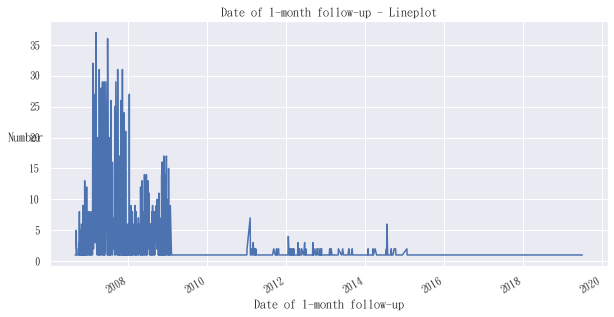

In [5]:
rfur_dt_1 = tsr_12.loc[:, "rfur_dt_1"]
rfur_dt_1 = pd.to_datetime(rfur_dt_1)
#print(rfur_dt_1)
#print(rfur_dt_1.value_counts() / len(rfur_dt_1))
print(rfur_dt_1.describe())

rfur_dt_1.value_counts().plot()
plt.title("Date of 1-month follow-up - Lineplot")
plt.xlabel('Date of 1-month follow-up')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 目前所在地_1

1    0.761173
4    0.169467
5    0.033965
2    0.018591
3    0.016804
Name: location_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


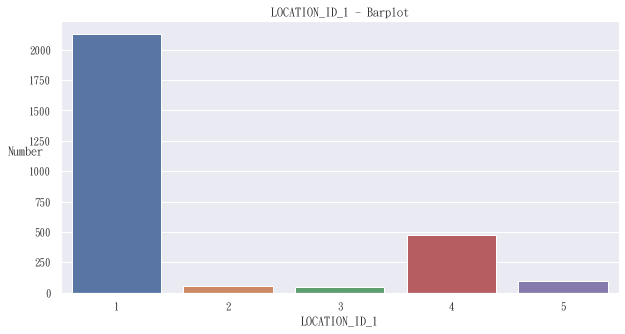

In [6]:
location_id_1 = tsr_12.loc[:,"location_id_1"]
#print(location_id_1)
print(location_id_1.value_counts() / len(location_id_1))
#print(location_id_1.describe())

#location_id_1_labels = ["住家","護理之家","呼吸病房","本院住院中","轉至其他院","失聯"]
sns.countplot(location_id_1)#.set_xticklabels(location_id_1_labels)
plt.title("LOCATION_ID_1 - Barplot")
plt.xlabel('LOCATION_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 轉至醫院_1

O     0.973543
22    0.003575
21    0.001430
24    0.001073
26    0.001073
30    0.000715
41    0.000358
29    0.000358
Name: torg_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


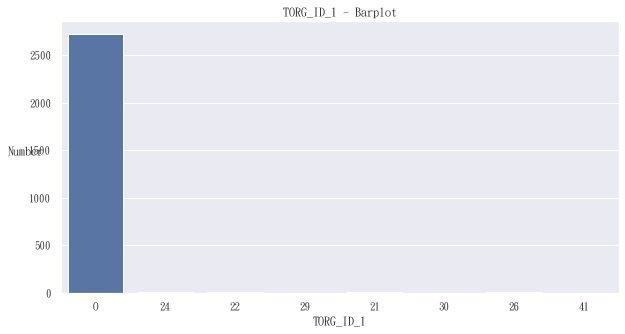

In [7]:
torg_id_1 = tsr_12.loc[:,"torg_id_1"]
#print(torg_id_1)
print(torg_id_1.value_counts() / len(torg_id_1))
#print(torg_id_1.describe())

sns.countplot(torg_id_1)
plt.title("TORG_ID_1 - Barplot")
plt.xlabel('TORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄_1

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.805148
2.0    0.009653
4.0    0.007151
5.0    0.000715
Name: flu_id_1, dtype: float64


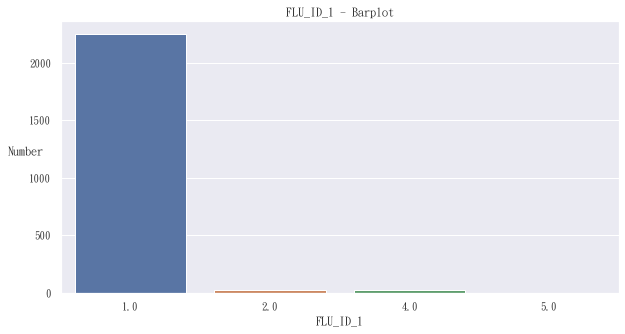

In [8]:
flu_id_1 = tsr_12.loc[:,"flu_id_1"]
#print(flu_id_1)
print(flu_id_1.value_counts() / len(flu_id_1))
#print(flu_id_1.describe())

#flu_id_1_labels = ["本院或他院門診繼續服藥","拒回診","死亡"]
sns.countplot(flu_id_1)#.set_xticklabels(flu_id_1_labels)
plt.title("FLU_ID_1 - Barplot")
plt.xlabel('FLU_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 門診醫院_1

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


O     0.884877
22    0.079013
25    0.011083
21    0.007866
24    0.006435
29    0.001788
26    0.001430
28    0.001073
23    0.001073
27    0.000715
33    0.000715
7     0.000715
30    0.000715
32    0.000715
41    0.000358
12    0.000358
45    0.000358
53    0.000358
15    0.000358
Name: fluorg_id_1, dtype: float64


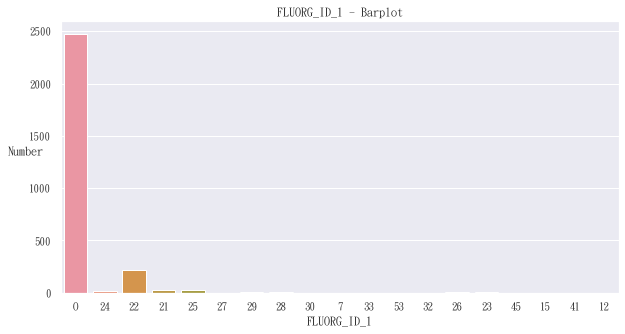

In [9]:
fluorg_id_1 = tsr_12.loc[:,"fluorg_id_1"]
#print(fluorg_id_1)
print(fluorg_id_1.value_counts() / len(fluorg_id_1))
#print(fluorg_id_1.describe())

sns.countplot(fluorg_id_1)
plt.title("FLUORG_ID_1 - Barplot")
plt.xlabel('FLUORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄2_1

N    0.233107
Name: ve_id_1, dtype: float64


<ipython-input-10-8bc3ecdb4977>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve_id_1[(ve_id_1 == str(0)) | (ve_id_1 == 0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


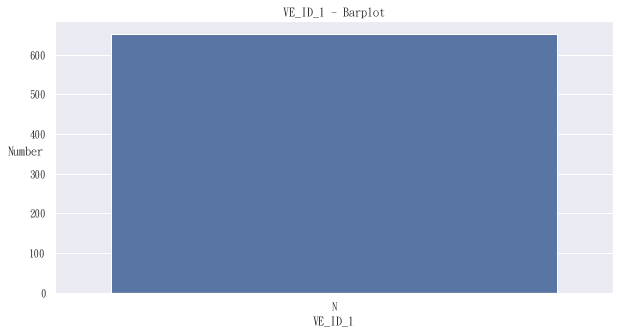

In [10]:
ve_id_1 = tsr_12.loc[:,'ve_id_1']
ve_id_1[(ve_id_1 == str(0)) | (ve_id_1 == 0)] = "N"

#print(ve_id_1)
print(ve_id_1.value_counts() / len(ve_id_1))
#print(ve_id_1.describe())

sns.countplot(ve_id_1)
plt.title("VE_ID_1 - Barplot")
plt.xlabel('VE_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風_1

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.993565
Y    0.003575
Name: vers_fl_1, dtype: float64


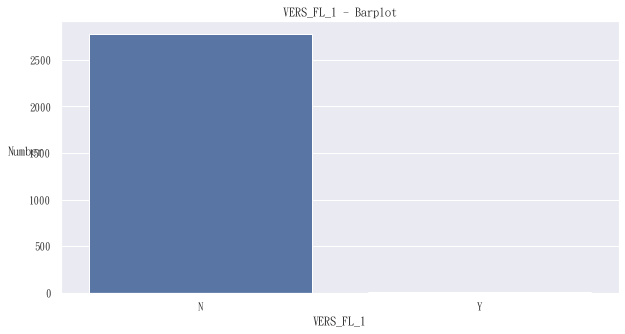

In [11]:
vers_fl_1 = tsr_12.loc[:,'vers_fl_1']
#print(vers_fl_1)
print(vers_fl_1.value_counts() / len(vers_fl_1))
#print(vers_fl_1.describe())

sns.countplot(vers_fl_1)
plt.title("VERS_FL_1 - Barplot")
plt.xlabel('VERS_FL_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風 (CI / CH)_1

1.0    0.002145
Name: verscich_id_1, dtype: float64


<ipython-input-12-182b1cfbf659>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_1[verscich_id_1 == str(1)] = 1
<ipython-input-12-182b1cfbf659>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_1[verscich_id_1 == str(2)] = 2
<ipython-input-12-182b1cfbf659>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_1[(verscich_id_1 != 1) & (verscich_id_1 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib

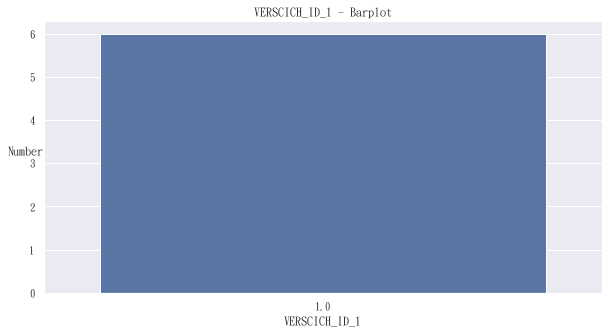

In [12]:
verscich_id_1 = tsr_12.loc[:,'verscich_id_1']
verscich_id_1[verscich_id_1 == str(1)] = 1
verscich_id_1[verscich_id_1 == str(2)] = 2
verscich_id_1[(verscich_id_1 != 1) & (verscich_id_1 != 2)] = np.nan
#print(verscich_id_1)
print(verscich_id_1.value_counts() / len(verscich_id_1))
#print(verscich_id_1.describe())

#verscich_id_1_labels = ["CI","CH"]
sns.countplot(verscich_id_1)#.set_xticklabels(verscich_id_1_labels)
plt.title("VERSCICH_ID_1 - Barplot")
plt.xlabel('VERSCICH_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()
verscich_id_1 = verscich_id_1.fillna(999)

# 再中風日期_1

<ipython-input-13-494a5d2a1409>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(vers_dt_1.describe())


count                      33
unique                     32
top       2007-06-21 00:00:00
freq                        2
first     2006-10-27 00:00:00
last      2014-01-22 00:00:00
Name: vers_dt_1, dtype: object


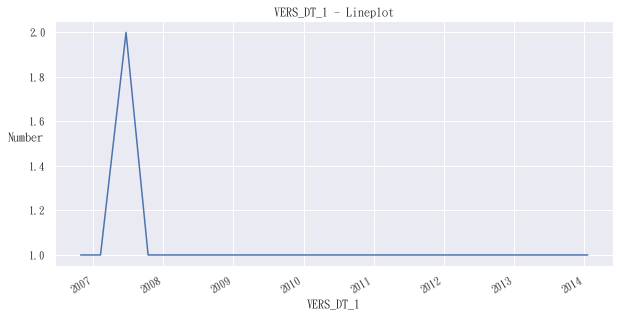

In [13]:
vers_dt_1 = tsr_12.loc[:,'vers_dt_1']
vers_dt_1 = pd.to_datetime(vers_dt_1, errors='coerce')
vers_dt_1[(vers_dt_1.dt.year < 2006) | (vers_dt_1.dt.year > 2021)] = np.nan
#print(vers_dt_1)
#print(vers_dt_1.value_counts() / len(vers_dt_1))
print(vers_dt_1.describe())

vers_dt_1.value_counts().plot()
plt.title("VERS_DT_1 - Lineplot")
plt.xlabel('VERS_DT_1')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 再中風醫院_1

O     0.976761
22    0.002503
N     0.001073
25    0.000358
Name: versorg_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


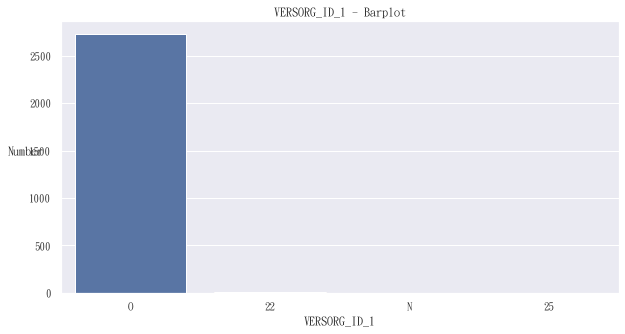

In [14]:
versorg_id_1 = tsr_12.loc[:,'versorg_id_1']
#print(versorg_id_1)
print(versorg_id_1.value_counts() / len(versorg_id_1))
#print(versorg_id_1.describe())

sns.countplot(versorg_id_1)
plt.title("VERSORG_ID_1 - Barplot")
plt.xlabel('VERSORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# Ischemic Heart Disease_1

N    0.996782
Name: veihd_fl_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


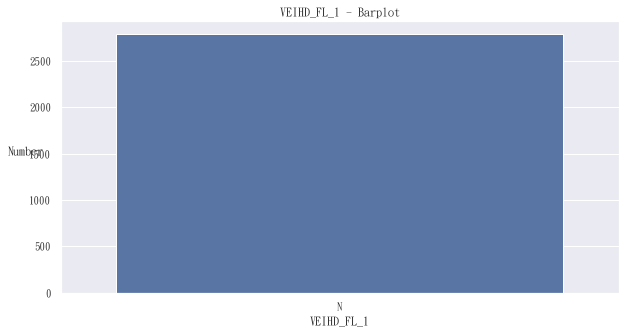

In [15]:
veihd_fl_1 = tsr_12.loc[:,'veihd_fl_1']
#print(veihd_fl_1)
print(veihd_fl_1.value_counts() / len(veihd_fl_1))
#print(veihd_fl_1.describe())

sns.countplot(veihd_fl_1)
plt.title("VEIHD_FL_1 - Barplot")
plt.xlabel('VEIHD_FL_1')
plt.ylabel('Number', rotation=0)
plt.show()

# Types of Ischemic Heart Disease_1

# Ischemic Heart Disease日期_1

<ipython-input-16-e26bec8b266d>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(veihd_dt_1.describe())


count                       2
unique                      2
top       2008-04-03 00:00:00
freq                        1
first     2007-05-16 00:00:00
last      2008-04-03 00:00:00
Name: veihd_dt_1, dtype: object


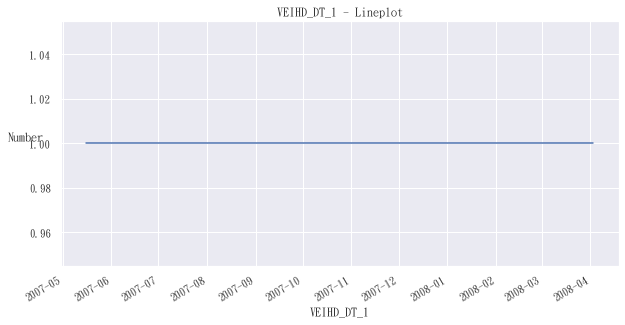

In [16]:
veihd_dt_1 = tsr_12.loc[:,'veihd_dt_1']
veihd_dt_1 = pd.to_datetime(veihd_dt_1, errors='coerce')
veihd_dt_1[(veihd_dt_1.dt.year < 2006) | (veihd_dt_1.dt.year > 2021)] = np.nan
#print(veihd_dt_1)
#print(veihd_dt_1.value_counts() / len(veihd_dt_1))
print(veihd_dt_1.describe())

veihd_dt_1.value_counts().plot()
plt.title("VEIHD_DT_1 - Lineplot")
plt.xlabel('VEIHD_DT_1')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# Ischemic Heart Disease醫院_1

0    0.870933
O    0.109045
4    0.000358
Name: veihdorg_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


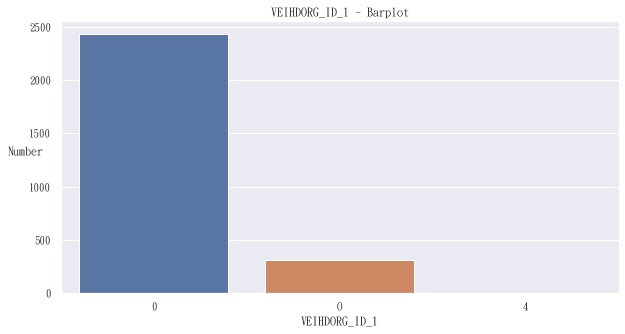

In [17]:
veihdorg_id_1 = tsr_12.loc[:,'veihdorg_id_1']
#print(veihdorg_id_1)
print(veihdorg_id_1.value_counts() / len(veihdorg_id_1))
#print(veihdorg_id_1.describe())

sns.countplot(veihdorg_id_1)
plt.title("VEIHDORG_ID_1 - Barplot")
plt.xlabel('VEIHDORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_1

1.0    0.297104
4.0    0.182338
2.0    0.159457
3.0    0.140865
0.0    0.120486
5.0    0.099750
Name: mrs_tx_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


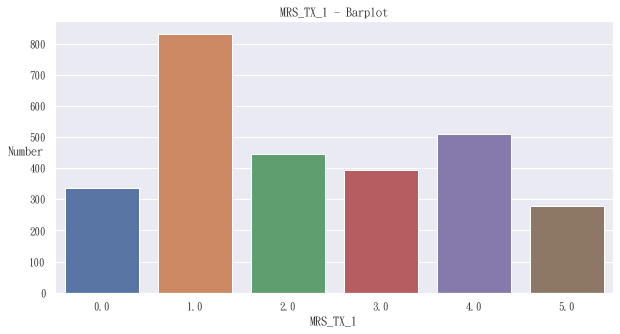

In [18]:
mrs_tx_1 = tsr_12.loc[:,'mrs_tx_1']
mrs_tx_1 = mrs_tx_1.fillna(mrs_tx_1.mode()[0])
#print(mrs_tx_1)
print(mrs_tx_1.value_counts() / len(mrs_tx_1))
#print(mrs_tx_1.describe())

sns.countplot(mrs_tx_1)
plt.title("MRS_TX_1 - Barplot")
plt.xlabel('MRS_TX_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 追蹤日期_3

<ipython-input-19-881d48c45d1c>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(rfur_dt_3.describe())


count                    2794
unique                    838
top       2007-08-23 00:00:00
freq                       39
first     2006-10-22 00:00:00
last      2019-08-27 00:00:00
Name: rfur_dt_3, dtype: object


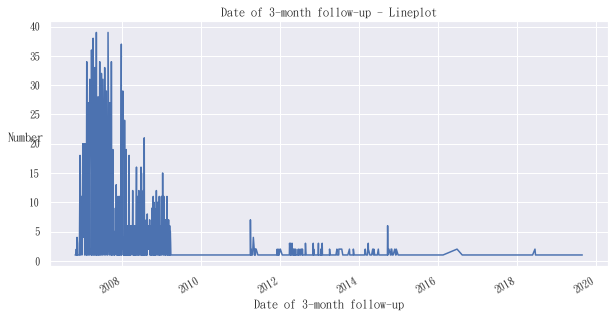

In [19]:
rfur_dt_3 = tsr_12.loc[:, "rfur_dt_3"]
rfur_dt_3 = pd.to_datetime(rfur_dt_3, errors = "coerce")
#print(rfur_dt_3)
#print(rfur_dt_3.value_counts() / len(rfur_dt_3))
print(rfur_dt_3.describe())

rfur_dt_3.value_counts().plot()
plt.title("Date of 3-month follow-up - Lineplot")
plt.xlabel('Date of 3-month follow-up')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 目前所在地_3

1    0.637469
1    0.231677
5    0.049339
2    0.020737
4    0.019664
5    0.014301
2    0.010726
4    0.007151
3    0.005005
3    0.002145
O    0.001073
Name: location_id_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


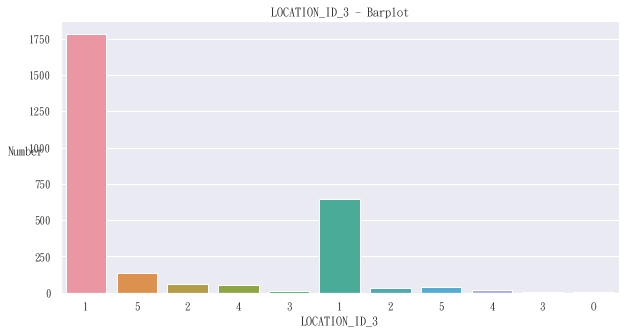

In [20]:
location_id_3 = tsr_12.loc[:,"location_id_3"]
#print(location_id_3)
print(location_id_3.value_counts() / len(location_id_3))
#print(location_id_3.describe())

#location_id_3_labels = ["住家","護理之家","呼吸病房","本院住院中","轉至其他院","失聯"]
sns.countplot(location_id_3)#.set_xticklabels(location_id_3_labels)
plt.title("LOCATION_ID_3 - Barplot")
plt.xlabel('LOCATION_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 轉至醫院_3

O     0.976403
21    0.005005
22    0.003218
2     0.000715
24    0.000358
44    0.000358
1     0.000358
Name: torg_id_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


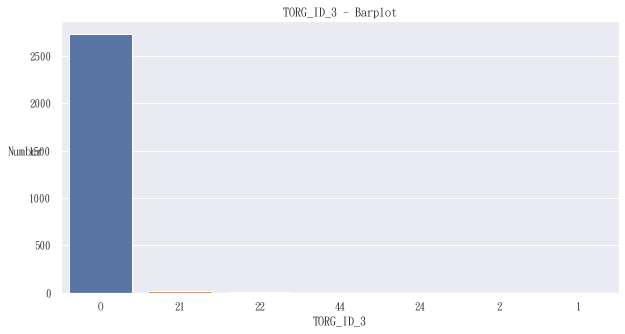

In [21]:
torg_id_3 = tsr_12.loc[:,"torg_id_3"]
#print(torg_id_3)
print(torg_id_3.value_counts() / len(torg_id_3))
#print(torg_id_3.describe())

sns.countplot(torg_id_3)
plt.title("TORG_ID_3 - Barplot")
plt.xlabel('TORG_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄_3

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.637469
1      0.246693
2.0    0.017519
2      0.011441
4.0    0.008938
5.0    0.001430
4      0.001430
O      0.001073
Name: flu_id_3, dtype: float64


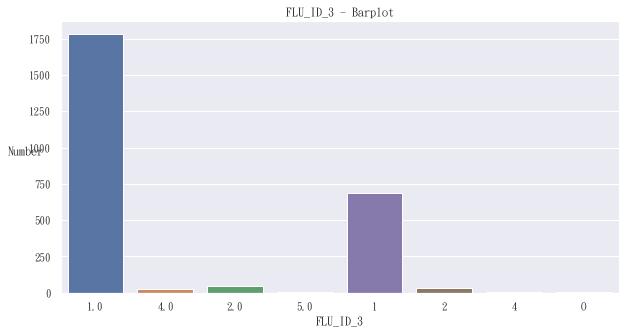

In [22]:
flu_id_3 = tsr_12.loc[:,"flu_id_3"]
#print(flu_id_3)
print(flu_id_3.value_counts() / len(flu_id_3))
#print(flu_id_3.describe())

#flu_id_3_labels = ["本院或他院門診繼續服藥","拒回診","死亡"]
sns.countplot(flu_id_3)#.set_xticklabels(flu_id_3_labels)
plt.title("FLU_ID_3 - Barplot")
plt.xlabel('FLU_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 門診醫院_3

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


O          0.894530
22         0.069360
21         0.010726
25         0.009296
24         0.006078
28         0.002145
23         0.001073
29         0.001073
33         0.000715
32         0.000715
27         0.000715
7          0.000715
?��??�?    0.000358
44         0.000358
41         0.000358
26         0.000358
12         0.000358
45         0.000358
Name: fluorg_id_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


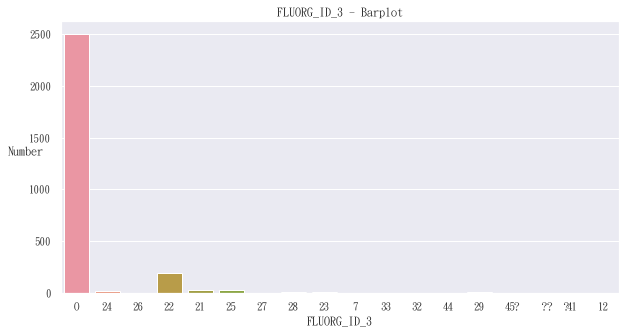

In [23]:
fluorg_id_3 = tsr_12.loc[:,"fluorg_id_3"]
#print(fluorg_id_3)
print(fluorg_id_3.value_counts() / len(fluorg_id_3))
#print(fluorg_id_3.describe())

sns.countplot(fluorg_id_3)
plt.title("FLUORG_ID_3 - Barplot")
plt.xlabel('FLUORG_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄2_3

<ipython-input-24-00a9459c181f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve_id_3[(ve_id_3 == str(0)) | (ve_id_3 == 0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.231677
Name: ve_id_3, dtype: float64


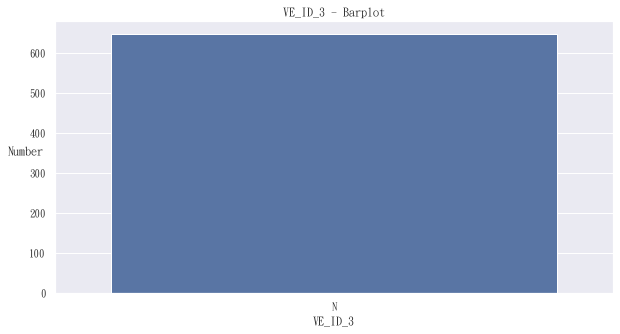

In [24]:
ve_id_3 = tsr_12.loc[:,'ve_id_3']
ve_id_3[(ve_id_3 == str(0)) | (ve_id_3 == 0)] = "N"

#print(ve_id_3)
print(ve_id_3.value_counts() / len(ve_id_3))
#print(ve_id_3.describe())

sns.countplot(ve_id_3)
plt.title("VE_ID_3 - Barplot")
plt.xlabel('VE_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風_3

<ipython-input-25-c602b2f72178>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vers_fl_3[(vers_fl_3 != "N") & (vers_fl_3 != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.987487
Y    0.006793
Name: vers_fl_3, dtype: float64


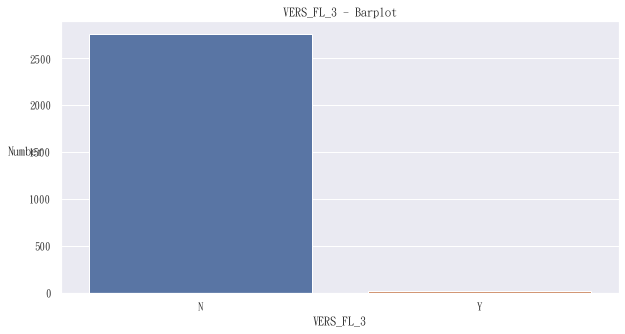

In [25]:
vers_fl_3 = tsr_12.loc[:,'vers_fl_3']
vers_fl_3[(vers_fl_3 != "N") & (vers_fl_3 != "Y")] = np.nan
#print(vers_fl_3)
print(vers_fl_3.value_counts() / len(vers_fl_3))
#print(vers_fl_3.describe())

sns.countplot(vers_fl_3)
plt.title("VERS_FL_3 - Barplot")
plt.xlabel('VERS_FL_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風 (CI / CH)_3

1    0.003575
Name: verscich_id_3, dtype: float64


<ipython-input-26-11b3863e926e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_3[verscich_id_3 == str(1)] = 1
<ipython-input-26-11b3863e926e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_3[verscich_id_3 == str(2)] = 2
<ipython-input-26-11b3863e926e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_3[(verscich_id_3 != 1) & (verscich_id_3 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib

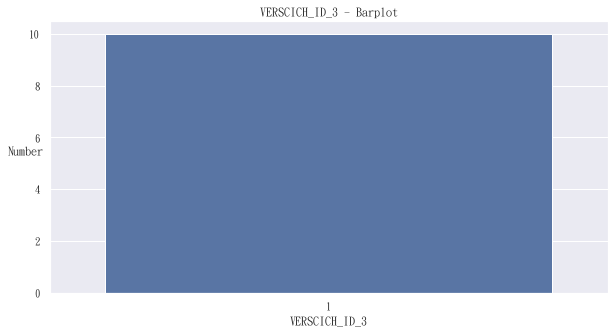

In [26]:
verscich_id_3 = tsr_12.loc[:,'verscich_id_3']
verscich_id_3[verscich_id_3 == str(1)] = 1
verscich_id_3[verscich_id_3 == str(2)] = 2
verscich_id_3[(verscich_id_3 != 1) & (verscich_id_3 != 2)] = np.nan
#print(verscich_id_3)
print(verscich_id_3.value_counts() / len(verscich_id_3))
#print(verscich_id_3.describe())

#verscich_id_3_labels = ["CI","CH"]
sns.countplot(verscich_id_3)#.set_xticklabels(verscich_id_3_labels)
plt.title("VERSCICH_ID_3 - Barplot")
plt.xlabel('VERSCICH_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()
verscich_id_3 = verscich_id_3.fillna(999)

# 再中風日期_3

<ipython-input-27-2669397a02c3>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(vers_dt_3.describe())


count                      52
unique                     51
top       2008-05-17 00:00:00
freq                        2
first     2006-10-28 00:00:00
last      2014-06-13 00:00:00
Name: vers_dt_3, dtype: object


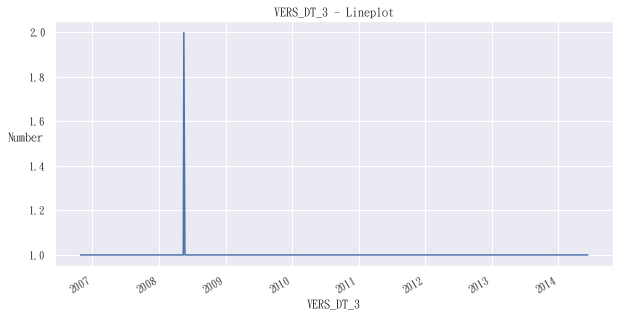

In [27]:
vers_dt_3 = tsr_12.loc[:,'vers_dt_3']
vers_dt_3 = pd.to_datetime(vers_dt_3, errors='coerce')
vers_dt_3[(vers_dt_3.dt.year < 2006) | (vers_dt_3.dt.year > 2023)] = np.nan
#print(vers_dt_3)
#print(vers_dt_3.value_counts() / len(vers_dt_3))
print(vers_dt_3.describe())

vers_dt_3.value_counts().plot()
plt.title("VERS_DT_3 - Lineplot")
plt.xlabel('VERS_DT_3')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 再中風醫院_3

O     0.979979
N     0.003575
22    0.003218
25    0.000358
Name: versorg_id_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


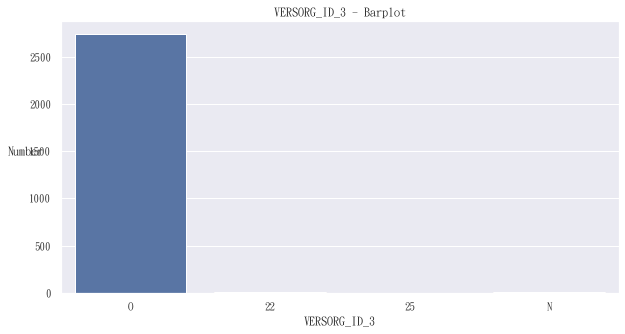

In [28]:
versorg_id_3 = tsr_12.loc[:,'versorg_id_3']
#print(versorg_id_3)
print(versorg_id_3.value_counts() / len(versorg_id_3))
#print(versorg_id_3.describe())

sns.countplot(versorg_id_3)
plt.title("VERSORG_ID_3 - Barplot")
plt.xlabel('VERSORG_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# Ischemic Heart Disease_3

N           0.992134
1900/1/1    0.001073
Name: veihd_fl_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


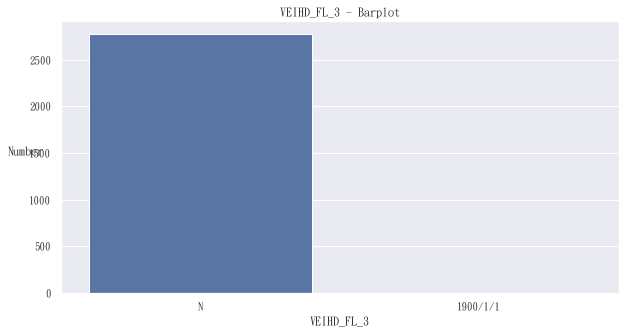

In [29]:
veihd_fl_3 = tsr_12.loc[:,'veihd_fl_3']
#print(veihd_fl_3)
print(veihd_fl_3.value_counts() / len(veihd_fl_3))
#print(veihd_fl_3.describe())

sns.countplot(veihd_fl_3)
plt.title("VEIHD_FL_3 - Barplot")
plt.xlabel('VEIHD_FL_3')
plt.ylabel('Number', rotation=0)
plt.show()

# Types of Ischemic Heart Disease_3

# Ischemic Heart Disease日期_3

<ipython-input-30-11789be30de1>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(veihd_dt_3.describe())


count                       3
unique                      3
top       2008-06-04 00:00:00
freq                        1
first     2007-09-13 00:00:00
last      2008-06-04 00:00:00
Name: veihd_dt_3, dtype: object


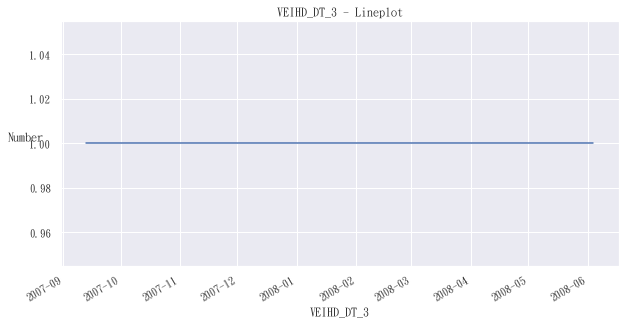

In [30]:
veihd_dt_3 = tsr_12.loc[:,'veihd_dt_3']
veihd_dt_3 = pd.to_datetime(veihd_dt_3, errors='coerce')
veihd_dt_3[(veihd_dt_3.dt.year < 2006) | (veihd_dt_3.dt.year > 2023)] = np.nan
#print(veihd_dt_3)
#print(veihd_dt_3.value_counts() / len(veihd_dt_3))
print(veihd_dt_3.describe())

veihd_dt_3.value_counts().plot()
plt.title("VEIHD_DT_3 - Lineplot")
plt.xlabel('VEIHD_DT_3')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# Ischemic Heart Disease醫院_3

0    0.869146
O    0.113693
1    0.001430
3    0.000358
4    0.000358
Name: veihdorg_id_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


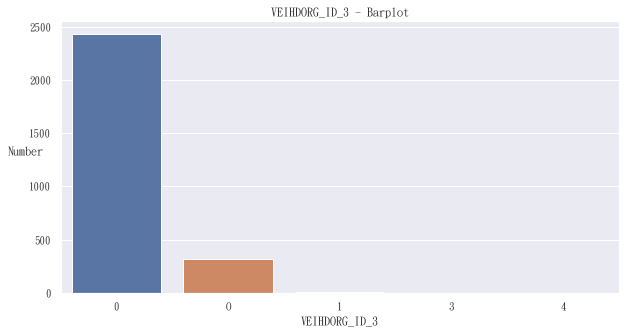

In [31]:
veihdorg_id_3 = tsr_12.loc[:,'veihdorg_id_3']
#print(veihdorg_id_3)
print(veihdorg_id_3.value_counts() / len(veihdorg_id_3))
#print(veihdorg_id_3.describe())

sns.countplot(veihdorg_id_3)
plt.title("VEIHDORG_ID_3 - Barplot")
plt.xlabel('VEIHDORG_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_3

1.0    0.322846
0.0    0.157669
4.0    0.143010
2.0    0.142653
3.0    0.141938
5.0    0.091884
Name: mrs_tx_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


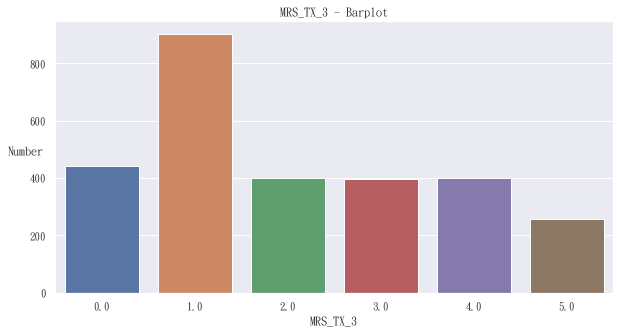

In [32]:
mrs_tx_3 = tsr_12.loc[:,'mrs_tx_3']
mrs_tx_3 = mrs_tx_3.fillna(mrs_tx_3.mode()[0])
#print(mrs_tx_3)
print(mrs_tx_3.value_counts() / len(mrs_tx_3))
#print(mrs_tx_3.describe())

sns.countplot(mrs_tx_3)
plt.title("MRS_TX_3 - Barplot")
plt.xlabel('MRS_TX_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 追蹤日期_6

<ipython-input-33-d460dab6c978>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(rfur_dt_6.describe())


count                    2784
unique                    857
top       2007-08-07 00:00:00
freq                       40
first     2007-01-26 00:00:00
last      2019-11-28 00:00:00
Name: rfur_dt_6, dtype: object


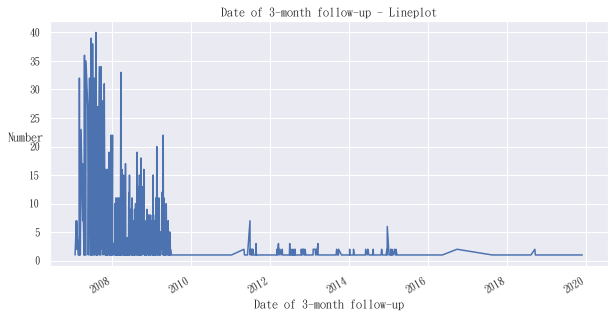

In [33]:
rfur_dt_6 = tsr_12.loc[:, "rfur_dt_6"]
rfur_dt_6 = pd.to_datetime(rfur_dt_6, errors = "coerce")
#print(rfur_dt_6)
#print(rfur_dt_6.value_counts() / len(rfur_dt_6))
print(rfur_dt_6.describe())

rfur_dt_6.value_counts().plot()
plt.title("Date of 3-month follow-up - Lineplot")
plt.xlabel('Date of 3-month follow-up')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 目前所在地_6

1    0.904541
2    0.038613
5    0.033607
4    0.013586
3    0.006078
O    0.003575
Name: location_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


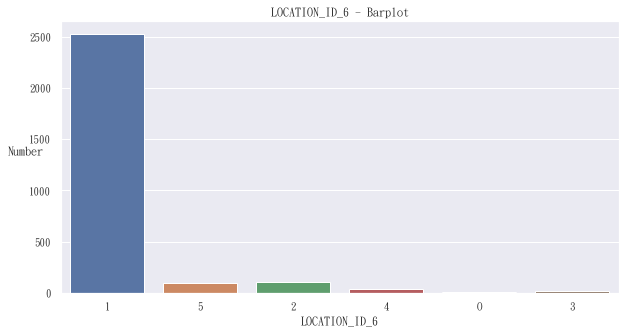

In [34]:
location_id_6 = tsr_12.loc[:,"location_id_6"]
#print(location_id_6)
print(location_id_6.value_counts() / len(location_id_6))
#print(location_id_6.describe())

#location_id_6_labels = ["住家","護理之家","呼吸病房","本院住院中","轉至其他院","失聯"]
sns.countplot(location_id_6)#.set_xticklabels(location_id_6_labels)
plt.title("LOCATION_ID_6 - Barplot")
plt.xlabel('LOCATION_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 轉至醫院_6

O     0.983196
21    0.002503
1     0.002503
22    0.001073
2     0.001073
44    0.000358
Name: torg_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


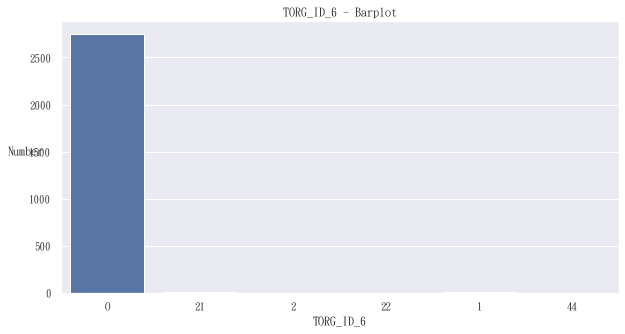

In [35]:
torg_id_6 = tsr_12.loc[:,"torg_id_6"]
#print(torg_id_6)
print(torg_id_6.value_counts() / len(torg_id_6))
#print(torg_id_6.describe())

sns.countplot(torg_id_6)
plt.title("TORG_ID_6 - Barplot")
plt.xlabel('TORG_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄_6

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1          0.893457
2          0.045406
4          0.010368
O          0.003575
?��??�?    0.000358
Name: flu_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


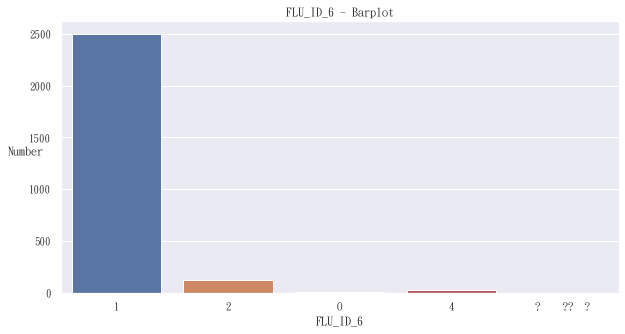

In [36]:
flu_id_6 = tsr_12.loc[:,"flu_id_6"]
#print(flu_id_6)
print(flu_id_6.value_counts() / len(flu_id_6))
#print(flu_id_6.describe())

#flu_id_6_labels = ["本院或他院門診繼續服藥","拒回診","死亡"]
sns.countplot(flu_id_6)#.set_xticklabels(flu_id_6_labels)
plt.title("FLU_ID_6 - Barplot")
plt.xlabel('FLU_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 門診醫院_6

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)


O                    0.893815
22                   0.069003
21                   0.008938
25                   0.008581
24                   0.004648
28                   0.001788
衛�??�?               0.001430
23                   0.001073
29                   0.001073
26                   0.001073
?��??�?"1900/1/1"    0.000715
27                   0.000715
33                   0.000715
7                    0.000715
41                   0.000715
32                   0.000715
?��??�診?�?           0.000358
44                   0.000358
1                    0.000358
?�家庭診?�?             0.000358
1900/1/1             0.000358
?�屯衛�??�?            0.000358
12                   0.000358
45                   0.000358
61                   0.000358
Name: fluorg_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


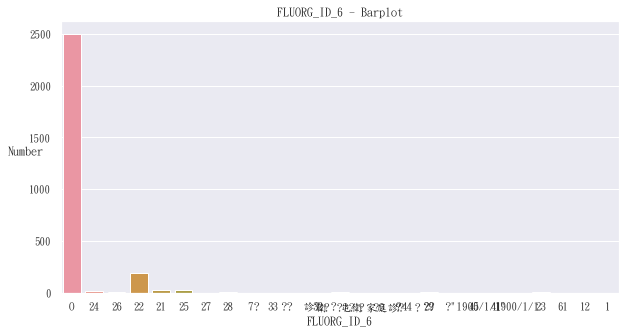

In [37]:
fluorg_id_6 = tsr_12.loc[:,"fluorg_id_6"]
#print(fluorg_id_6)
print(fluorg_id_6.value_counts() / len(fluorg_id_6))
#print(fluorg_id_6.describe())

sns.countplot(fluorg_id_6)
plt.title("FLUORG_ID_6 - Barplot")
plt.xlabel('FLUORG_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄2_6

N           0.231319
1900/1/1    0.001073
Name: ve_id_6, dtype: float64


<ipython-input-38-9c0bb964c33d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve_id_6[(ve_id_6 == str(0)) | (ve_id_6 == 0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


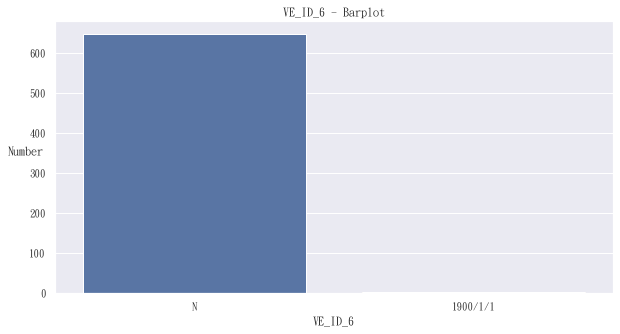

In [38]:
ve_id_6 = tsr_12.loc[:,'ve_id_6']
ve_id_6[(ve_id_6 == str(0)) | (ve_id_6 == 0)] = "N"

#print(ve_id_6)
print(ve_id_6.value_counts() / len(ve_id_6))
#print(ve_id_6.describe())

sns.countplot(ve_id_6)
plt.title("VE_ID_6 - Barplot")
plt.xlabel('VE_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風_6

<ipython-input-39-15100cc3f6f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vers_fl_6[(vers_fl_6 != "N") & (vers_fl_6 != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.986414
Y    0.007151
Name: vers_fl_6, dtype: float64


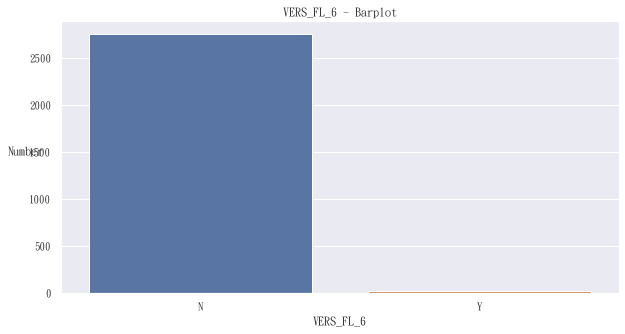

In [39]:
vers_fl_6 = tsr_12.loc[:,'vers_fl_6']
vers_fl_6[(vers_fl_6 != "N") & (vers_fl_6 != "Y")] = np.nan
#print(vers_fl_6)
print(vers_fl_6.value_counts() / len(vers_fl_6))
#print(vers_fl_6.describe())

sns.countplot(vers_fl_6)
plt.title("VERS_FL_6 - Barplot")
plt.xlabel('VERS_FL_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風 (CI / CH)_6

1    0.00429
Name: verscich_id_6, dtype: float64


<ipython-input-40-d0a314719277>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_6[verscich_id_6 == str(1)] = 1
<ipython-input-40-d0a314719277>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_6[verscich_id_6 == str(2)] = 2
<ipython-input-40-d0a314719277>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_6[(verscich_id_6 != 1) & (verscich_id_6 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib

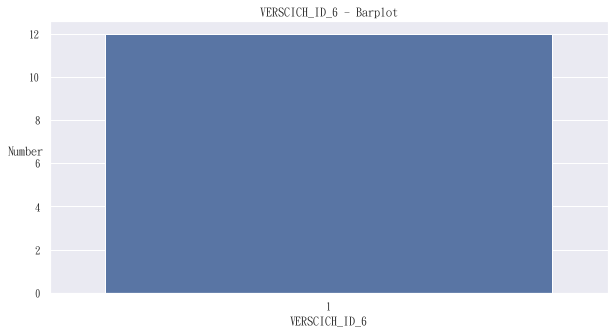

In [40]:
verscich_id_6 = tsr_12.loc[:,'verscich_id_6']
verscich_id_6[verscich_id_6 == str(1)] = 1
verscich_id_6[verscich_id_6 == str(2)] = 2
verscich_id_6[(verscich_id_6 != 1) & (verscich_id_6 != 2)] = np.nan
#print(verscich_id_6)
print(verscich_id_6.value_counts() / len(verscich_id_6))
#print(verscich_id_6.describe())

#verscich_id_6_labels = ["CI","CH"]
sns.countplot(verscich_id_6)#.set_xticklabels(verscich_id_6_labels)
plt.title("VERSCICH_ID_6 - Barplot")
plt.xlabel('VERSCICH_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()
verscich_id_6 = verscich_id_6.fillna(999)

# 再中風日期_6

count                      58
unique                     54
top       2009-02-08 00:00:00
freq                        2
first     2007-02-02 00:00:00
last      2015-12-05 00:00:00
Name: vers_dt_6, dtype: object


<ipython-input-41-ff29dc4e27b1>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(vers_dt_6.describe())


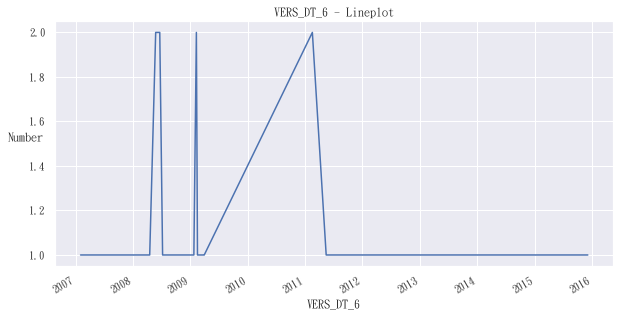

In [41]:
vers_dt_6 = tsr_12.loc[:,'vers_dt_6']
vers_dt_6 = pd.to_datetime(vers_dt_6, errors='coerce')
vers_dt_6[(vers_dt_6.dt.year < 2006) | (vers_dt_6.dt.year > 2023)] = np.nan
#print(vers_dt_6)
#print(vers_dt_6.value_counts() / len(vers_dt_6))
print(vers_dt_6.describe())

vers_dt_6.value_counts().plot()
plt.title("VERS_DT_6 - Lineplot")
plt.xlabel('VERS_DT_6')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 再中風醫院_6

O           0.981051
22          0.003218
N           0.001788
1900/1/1    0.001073
21          0.000715
28          0.000358
12          0.000358
45          0.000358
Name: versorg_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


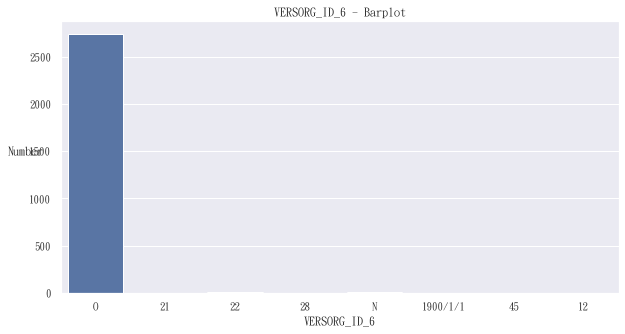

In [42]:
versorg_id_6 = tsr_12.loc[:,'versorg_id_6']
#print(versorg_id_6)
print(versorg_id_6.value_counts() / len(versorg_id_6))
#print(versorg_id_6.describe())

sns.countplot(versorg_id_6)
plt.title("VERSORG_ID_6 - Barplot")
plt.xlabel('VERSORG_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# Ischemic Heart Disease_6

N           0.991777
1900/1/1    0.003575
O           0.001073
Name: veihd_fl_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


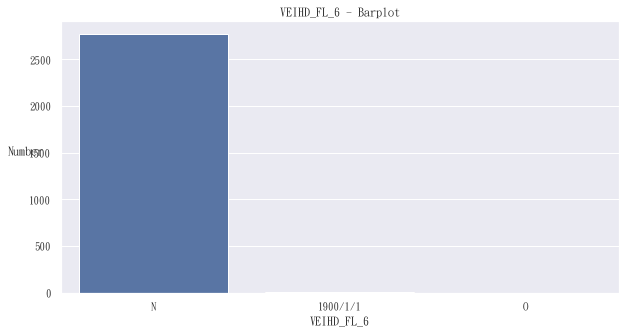

In [43]:
veihd_fl_6 = tsr_12.loc[:,'veihd_fl_6']
#print(veihd_fl_6)
print(veihd_fl_6.value_counts() / len(veihd_fl_6))
#print(veihd_fl_6.describe())

sns.countplot(veihd_fl_6)
plt.title("VEIHD_FL_6 - Barplot")
plt.xlabel('VEIHD_FL_6')
plt.ylabel('Number', rotation=0)
plt.show()

# Types of Ischemic Heart Disease_6

# Ischemic Heart Disease日期_6

count       0
unique      0
top       NaN
freq      NaN
Name: veihd_dt_6, dtype: object


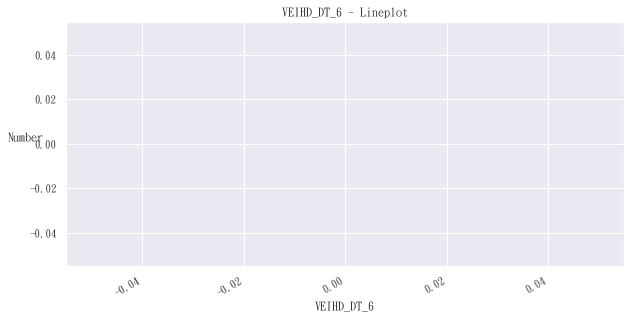

In [44]:
veihd_dt_6 = tsr_12.loc[:,'veihd_dt_6']
veihd_dt_6 = pd.to_datetime(veihd_dt_6, errors='coerce')
veihd_dt_6[(veihd_dt_6.dt.year < 2006) | (veihd_dt_6.dt.year > 2023)] = np.nan
#print(veihd_dt_6)
#print(veihd_dt_6.value_counts() / len(veihd_dt_6))
print(veihd_dt_6.describe())

veihd_dt_6.value_counts().plot()
plt.title("VEIHD_DT_6 - Lineplot")
plt.xlabel('VEIHD_DT_6')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# Ischemic Heart Disease醫院_6

0    0.867715
O    0.117984
4    0.000358
Name: veihdorg_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


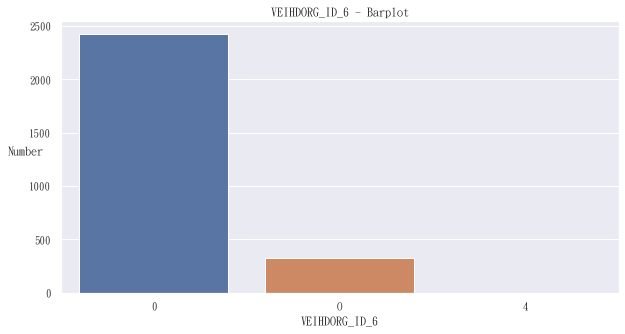

In [45]:
veihdorg_id_6 = tsr_12.loc[:,'veihdorg_id_6']
#print(veihdorg_id_6)
print(veihdorg_id_6.value_counts() / len(veihdorg_id_6))
#print(veihdorg_id_6.describe())

sns.countplot(veihdorg_id_6)
plt.title("VEIHDORG_ID_6 - Barplot")
plt.xlabel('VEIHDORG_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_6

1.0    0.337504
0.0    0.183053
3.0    0.135502
2.0    0.127994
4.0    0.123704
5.0    0.092242
Name: mrs_tx_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


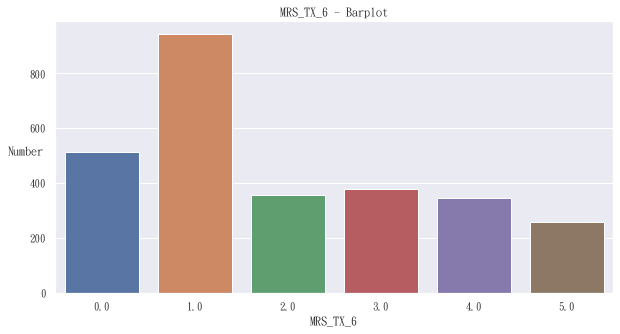

In [46]:
mrs_tx_6 = tsr_12.loc[:,'mrs_tx_6']
mrs_tx_6 = mrs_tx_6.fillna(mrs_tx_6.mode()[0])
#print(mrs_tx_6)
print(mrs_tx_6.value_counts() / len(mrs_tx_6))
#print(mrs_tx_6.describe())

sns.countplot(mrs_tx_6)
plt.title("MRS_TX_6 - Barplot")
plt.xlabel('MRS_TX_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 追蹤日期_12

<ipython-input-47-5e1a37c206b7>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(rfur_dt_12.describe())


count                    2779
unique                    554
top       2009-08-14 00:00:00
freq                       80
first     2008-03-13 00:00:00
last      2020-05-27 00:00:00
Name: rfur_dt_12, dtype: object


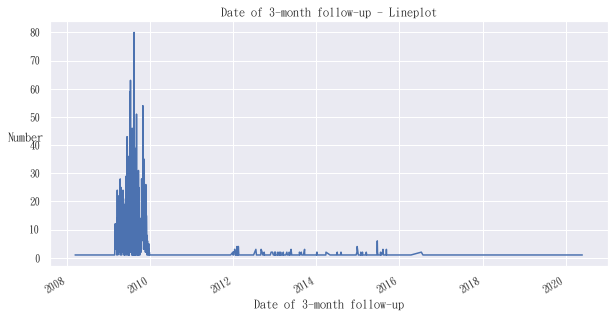

In [47]:
rfur_dt_12 = tsr_12.loc[:, "rfur_dt_12"]
rfur_dt_12 = pd.to_datetime(rfur_dt_12, errors = "coerce")
#print(rfur_dt_12)
#print(rfur_dt_12.value_counts() / len(rfur_dt_12))
print(rfur_dt_12.describe())

rfur_dt_12.value_counts().plot()
plt.title("Date of 3-month follow-up - Lineplot")
plt.xlabel('Date of 3-month follow-up')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 目前所在地_12

1    0.929567
2    0.042546
4    0.009653
5    0.007866
3    0.007151
O    0.002860
Name: location_id_12, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


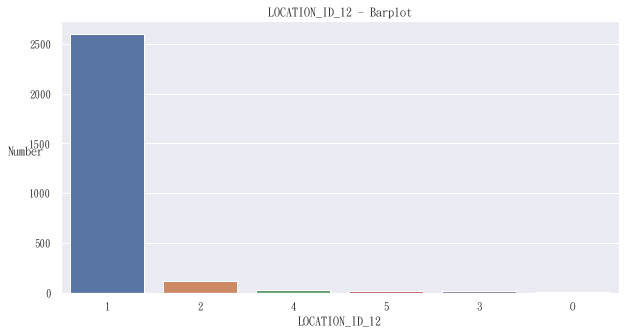

In [48]:
location_id_12 = tsr_12.loc[:,"location_id_12"]
#print(location_id_12)
print(location_id_12.value_counts() / len(location_id_12))
#print(location_id_12.describe())

#location_id_12_labels = ["住家","護理之家","呼吸病房","本院住院中","轉至其他院","失聯"]
sns.countplot(location_id_12)#.set_xticklabels(location_id_12_labels)
plt.title("LOCATION_ID_12 - Barplot")
plt.xlabel('LOCATION_ID_12')
plt.ylabel('Number', rotation=0)
plt.show()

# 轉至醫院_12

O          0.984269
1          0.001073
2          0.000715
22         0.000358
?��??�?    0.000358
21         0.000358
Name: torg_id_12, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


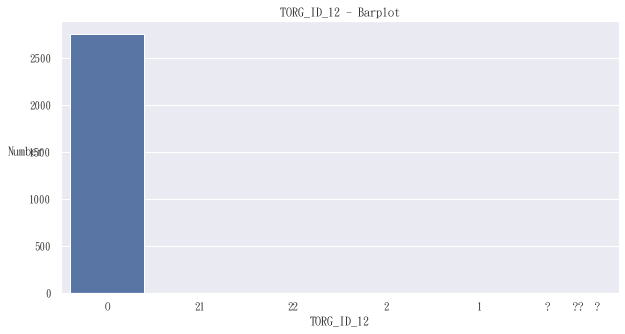

In [49]:
torg_id_12 = tsr_12.loc[:,"torg_id_12"]
#print(torg_id_12)
print(torg_id_12.value_counts() / len(torg_id_12))
#print(torg_id_12.describe())

sns.countplot(torg_id_12)
plt.title("TORG_ID_12 - Barplot")
plt.xlabel('TORG_ID_12')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄_12

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)


1                    0.895245
2                    0.079728
4                    0.007508
O                    0.001788
衛�??�?               0.000715
CMUH                 0.000715
?��??�?"1900/1/1"    0.000715
澄�?                  0.000358
LMD                  0.000358
1900/1/1             0.000358
?�家庭診?�?             0.000358
Name: flu_id_12, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


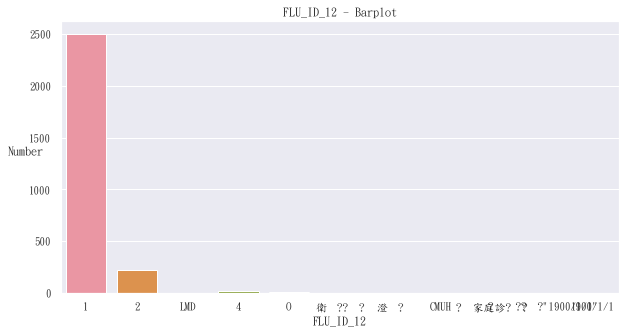

In [50]:
flu_id_12 = tsr_12.loc[:,"flu_id_12"]
#print(flu_id_12)
print(flu_id_12.value_counts() / len(flu_id_12))
#print(flu_id_12.describe())

#flu_id_12_labels = ["本院或他院門診繼續服藥","拒回診","死亡"]
sns.countplot(flu_id_12)#.set_xticklabels(flu_id_12_labels)
plt.title("FLU_ID_12 - Barplot")
plt.xlabel('FLU_ID_12')
plt.ylabel('Number', rotation=0)
plt.show()

# 門診醫院_12

O                    0.892027
22                   0.070075
25                   0.008581
21                   0.008223
24                   0.004290
29                   0.001430
28                   0.001073
23                   0.001073
1900/1/1             0.001073
?��??�?"1900/1/1"    0.000715
27                   0.000715
33                   0.000715
61                   0.000715
衛�??�?               0.000715
41                   0.000715
26                   0.000715
32                   0.000715
7                    0.000715
30                   0.000358
1                    0.000358
CMUH                 0.000358
12                   0.000358
45                   0.000358
Name: fluorg_id_12, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


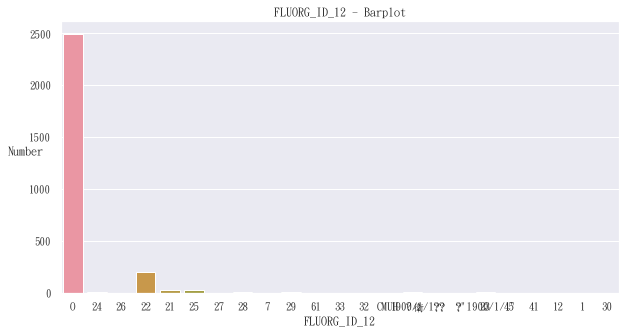

In [51]:
fluorg_id_12 = tsr_12.loc[:,"fluorg_id_12"]
#print(fluorg_id_12)
print(fluorg_id_12.value_counts() / len(fluorg_id_12))
#print(fluorg_id_12.describe())

sns.countplot(fluorg_id_12)
plt.title("FLUORG_ID_12 - Barplot")
plt.xlabel('FLUORG_ID_12')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄2_12

N           0.230962
1900/1/1    0.001788
O           0.001073
Name: ve_id_12, dtype: float64


<ipython-input-52-b3acbb3806bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve_id_12[(ve_id_12 == str(0)) | (ve_id_12 == 0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


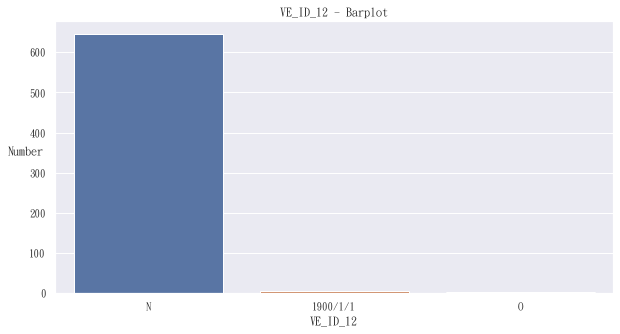

In [52]:
ve_id_12 = tsr_12.loc[:,'ve_id_12']
ve_id_12[(ve_id_12 == str(0)) | (ve_id_12 == 0)] = "N"

#print(ve_id_12)
print(ve_id_12.value_counts() / len(ve_id_12))
#print(ve_id_12.describe())

sns.countplot(ve_id_12)
plt.title("VE_ID_12 - Barplot")
plt.xlabel('VE_ID_12')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風_12

<ipython-input-53-745cedb23e7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vers_fl_12[(vers_fl_12 != "N") & (vers_fl_12 != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.984626
Y    0.007508
Name: vers_fl_12, dtype: float64


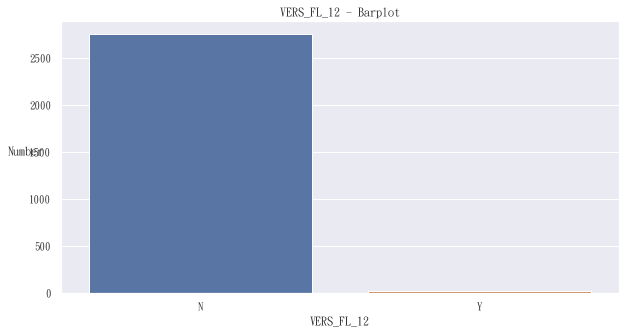

In [53]:
vers_fl_12 = tsr_12.loc[:,'vers_fl_12']
vers_fl_12[(vers_fl_12 != "N") & (vers_fl_12 != "Y")] = np.nan
#print(vers_fl_12)
print(vers_fl_12.value_counts() / len(vers_fl_12))
#print(vers_fl_12.describe())

sns.countplot(vers_fl_12)
plt.title("VERS_FL_12 - Barplot")
plt.xlabel('VERS_FL_12')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風 (CI / CH)_12

1    0.003933
Name: verscich_id_12, dtype: float64


<ipython-input-54-3275a9b753f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_12[verscich_id_12 == str(1)] = 1
<ipython-input-54-3275a9b753f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_12[verscich_id_12 == str(2)] = 2
<ipython-input-54-3275a9b753f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_12[(verscich_id_12 != 1) & (verscich_id_12 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr

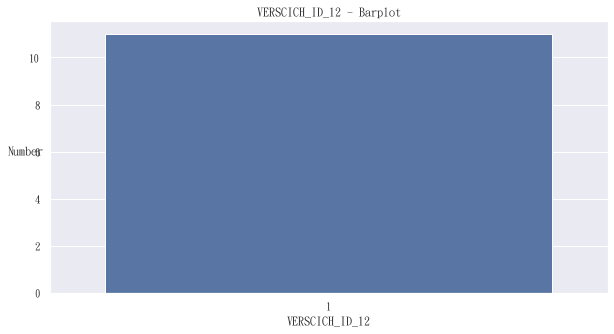

In [54]:
verscich_id_12 = tsr_12.loc[:,'verscich_id_12']
verscich_id_12[verscich_id_12 == str(1)] = 1
verscich_id_12[verscich_id_12 == str(2)] = 2
verscich_id_12[(verscich_id_12 != 1) & (verscich_id_12 != 2)] = np.nan
#print(verscich_id_12)
print(verscich_id_12.value_counts() / len(verscich_id_12))
#print(verscich_id_12.describe())

#verscich_id_12_labels = ["CI","CH"]
sns.countplot(verscich_id_12)#.set_xticklabels(verscich_id_12_labels)
plt.title("VERSCICH_ID_12 - Barplot")
plt.xlabel('VERSCICH_ID_12')
plt.ylabel('Number', rotation=0)
plt.show()
verscich_id_12 = verscich_id_12.fillna(999)

# 再中風日期_12

<ipython-input-55-81c3944adebf>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(vers_dt_12.describe())


count                      99
unique                     95
top       2009-03-11 00:00:00
freq                        2
first     2007-06-09 00:00:00
last      2016-01-31 00:00:00
Name: vers_dt_12, dtype: object


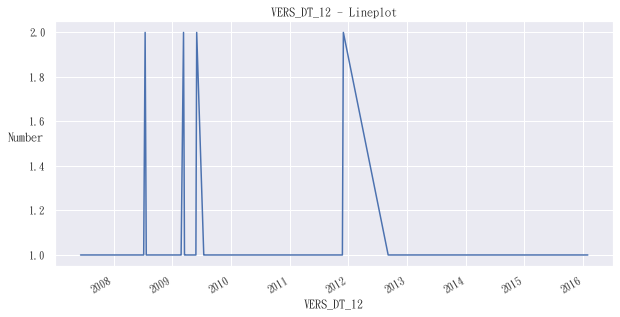

In [55]:
vers_dt_12 = tsr_12.loc[:,'vers_dt_12']
vers_dt_12 = pd.to_datetime(vers_dt_12, errors='coerce')
vers_dt_12[(vers_dt_12.dt.year < 2006) | (vers_dt_12.dt.year > 2023)] = np.nan
#print(vers_dt_12)
#print(vers_dt_12.value_counts() / len(vers_dt_12))
print(vers_dt_12.describe())

vers_dt_12.value_counts().plot()
plt.title("VERS_DT_12 - Lineplot")
plt.xlabel('VERS_DT_12')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 再中風醫院_12

O           0.977833
22          0.003575
N           0.003218
1900/1/1    0.001788
Name: versorg_id_12, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


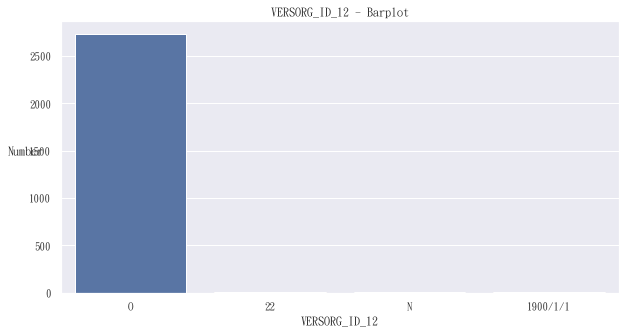

In [56]:
versorg_id_12 = tsr_12.loc[:,'versorg_id_12']
#print(versorg_id_12)
print(versorg_id_12.value_counts() / len(versorg_id_12))
#print(versorg_id_12.describe())

sns.countplot(versorg_id_12)
plt.title("VERSORG_ID_12 - Barplot")
plt.xlabel('VERSORG_ID_12')
plt.ylabel('Number', rotation=0)
plt.show()

# Ischemic Heart Disease_12

N           0.989989
1900/1/1    0.002860
0           0.001788
O           0.000715
Y           0.000358
4           0.000358
Name: veihd_fl_12, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


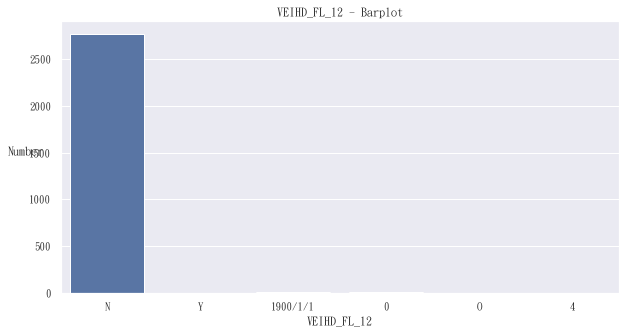

In [57]:
veihd_fl_12 = tsr_12.loc[:,'veihd_fl_12']
#print(veihd_fl_12)
print(veihd_fl_12.value_counts() / len(veihd_fl_12))
#print(veihd_fl_12.describe())

sns.countplot(veihd_fl_12)
plt.title("VEIHD_FL_12 - Barplot")
plt.xlabel('VEIHD_FL_12')
plt.ylabel('Number', rotation=0)
plt.show()

# Types of Ischemic Heart Disease_12

# Ischemic Heart Disease日期_12

<ipython-input-58-98fd80a50250>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(veihd_dt_12.describe())


count                       1
unique                      1
top       2011-11-11 00:00:00
freq                        1
first     2011-11-11 00:00:00
last      2011-11-11 00:00:00
Name: veihd_dt_12, dtype: object


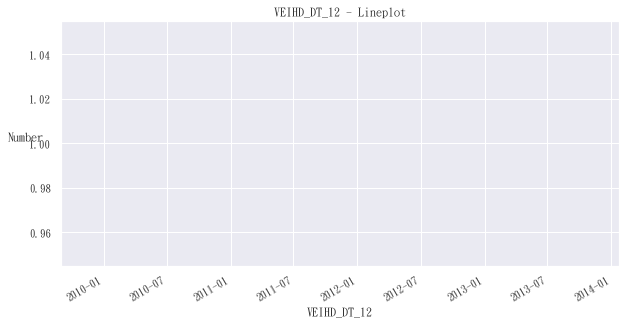

In [58]:
veihd_dt_12 = tsr_12.loc[:,'veihd_dt_12']
veihd_dt_12 = pd.to_datetime(veihd_dt_12, errors='coerce')
veihd_dt_12[(veihd_dt_12.dt.year < 2006) | (veihd_dt_12.dt.year > 2023)] = np.nan
#print(veihd_dt_12)
#print(veihd_dt_12.value_counts() / len(veihd_dt_12))
print(veihd_dt_12.describe())

veihd_dt_12.value_counts().plot()
plt.title("VEIHD_DT_12 - Lineplot")
plt.xlabel('VEIHD_DT_12')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# Ischemic Heart Disease醫院_12

0     0.865928
O     0.115123
3     0.000358
22    0.000358
4     0.000358
1     0.000358
Name: veihdorg_id_12, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


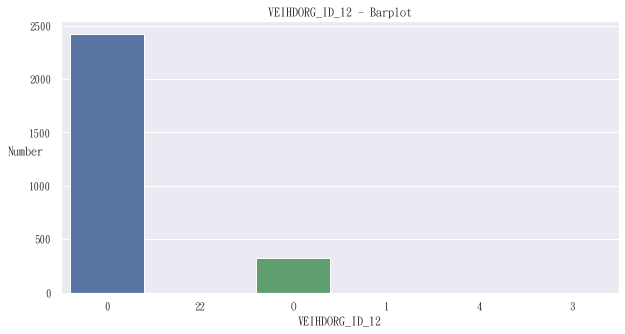

In [59]:
veihdorg_id_12 = tsr_12.loc[:,'veihdorg_id_12']
#print(veihdorg_id_12)
print(veihdorg_id_12.value_counts() / len(veihdorg_id_12))
#print(veihdorg_id_12.describe())

sns.countplot(veihdorg_id_12)
plt.title("VEIHDORG_ID_12 - Barplot")
plt.xlabel('VEIHDORG_ID_12')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_12 (Outcome)

1.0    0.328566
0.0    0.220236
2.0    0.129067
4.0    0.117984
5.0    0.105470
3.0    0.098677
Name: mrs_tx_12, dtype: float64


<ipython-input-60-284c53258fc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mrs_tx_12[(mrs_tx_12 != 0) & (mrs_tx_12 != 1) & (mrs_tx_12 != 2) & (mrs_tx_12 != 3) & (mrs_tx_12 != 4) & (mrs_tx_12 != 5)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


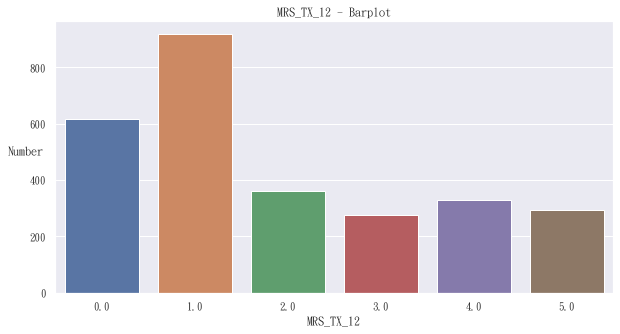

In [60]:
mrs_tx_12 = tsr_12.loc[:,'mrs_tx_12']
mrs_tx_12[(mrs_tx_12 != 0) & (mrs_tx_12 != 1) & (mrs_tx_12 != 2) & (mrs_tx_12 != 3) & (mrs_tx_12 != 4) & (mrs_tx_12 != 5)] = np.nan
mrs_tx_12 = mrs_tx_12.fillna(mrs_tx_12.mode()[0])
#print(mrs_tx_12)
print(mrs_tx_12.value_counts() / len(mrs_tx_12))
#print(mrs_tx_12.describe())

sns.countplot(mrs_tx_12)
plt.title("MRS_TX_12 - Barplot")
plt.xlabel('MRS_TX_12')
plt.ylabel('Number', rotation=0)
plt.show()


# 身高

<ipython-input-61-4d221cf719a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_nm[(height_nm < inner_fence_low) | (height_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean      162.076418
std         7.835313
min       138.000000
25%       156.000000
50%       162.076000
75%       168.000000
max       185.000000
Name: height_nm, dtype: float64


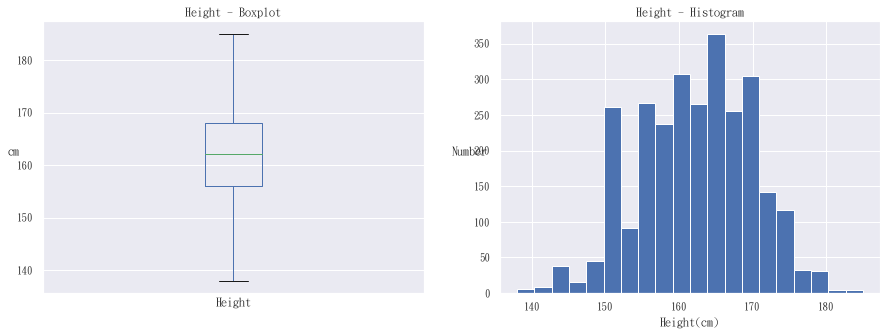

In [61]:
height_nm = tsr_12.loc[:, "height_nm"]

q1 = height_nm.quantile(0.25)
q3 = height_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
height_nm[(height_nm < inner_fence_low) | (height_nm > inner_fence_upp)] = np.nan

height_nm = height_nm.fillna(round(height_nm.mean(),3))

#print(height_nm)
#print(height_nm.value_counts() / len(height_nm))
print(height_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

height_nm.plot.box(ax = ax1)
ax1.set_title("Height - Boxplot")
ax1.set_xlabel('Height')
ax1.set_ylabel('cm', rotation=0)
ax1.set_xticks([])

height_nm.plot.hist(ax = ax2, bins = 20)
ax2.set_title("Height - Histogram")
ax2.set_xlabel('Height(cm)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 體重

count    2797.000000
mean       64.282370
std        10.714383
min        34.700000
25%        57.000000
50%        64.282000
75%        71.000000
max        95.000000
Name: weight_nm, dtype: float64


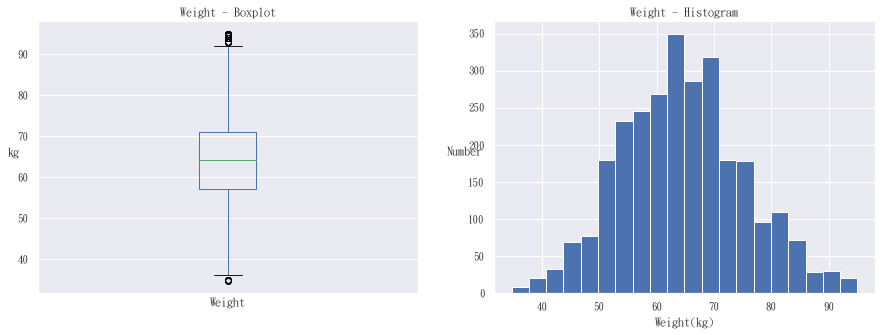

In [62]:
weight_nm = tsr_12.loc[:,"weight_nm"]
weight_nm = pd.to_numeric(weight_nm, errors = "coerce")

q1 = weight_nm.quantile(0.25)
q3 = weight_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
weight_nm[(weight_nm < inner_fence_low) | (weight_nm > inner_fence_upp)] = np.nan

weight_nm = weight_nm.fillna(round(weight_nm.mean(),3))

#print(weight_nm)
#print(weight_nm.value_counts()len(weight_nm))
print(weight_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

weight_nm.plot.box(ax = ax1)
ax1.set_title("Weight - Boxplot")
ax1.set_xlabel('Weight')
ax1.set_ylabel('kg', rotation=0)
ax1.set_xticks([])

weight_nm.plot.hist(ax = ax2, bins = 20)
ax2.set_title("Weight - Histogram")
ax2.set_xlabel('Weight(kg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 教育程度

2.0    0.559528
1.0    0.131212
4.0    0.115123
3.0    0.104040
5.0    0.083304
6.0    0.005363
7.0    0.001430
Name: edu_id, dtype: float64


<ipython-input-63-a55df3161fb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_id[(edu_id != 1) & (edu_id != 2) & (edu_id != 3) & (edu_id != 4) & (edu_id != 5) & (edu_id != 6) & (edu_id != 7)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


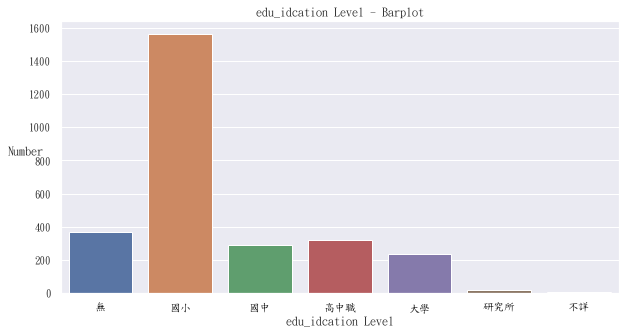

In [63]:
edu_id = tsr_12.loc[:,"edu_id"]
edu_id[(edu_id != 1) & (edu_id != 2) & (edu_id != 3) & (edu_id != 4) & (edu_id != 5) & (edu_id != 6) & (edu_id != 7)] = np.nan
edu_id =edu_id.fillna((edu_id.mode()[0]))
#print(edu_id)
print(edu_id.value_counts() / len(edu_id))
#print(edu_id.describe())

edu_id_labels = ["無","國小","國中","高中職","大學","研究所","不詳"]
sns.countplot(edu_id).set_xticklabels(edu_id_labels)
plt.title("edu_idcation Level - Barplot")
plt.xlabel('edu_idcation Level')
plt.ylabel('Number', rotation=0)
plt.show()
#edu_id =edu_id.fillna(999)

# 職業

<ipython-input-64-6b36a2398bbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_id[(pro_id != 1) & (pro_id != 2) & (pro_id != 3) & (pro_id != 4) & (pro_id != 5) & (pro_id != 6) & (pro_id != 7) & (pro_id != 8) & (pro_id != 9) & (pro_id != 10) & (pro_id != 11) & (pro_id != 12)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0     0.833750
10.0    0.051484
7.0     0.029675
5.0     0.029317
8.0     0.026457
6.0     0.018234
3.0     0.005363
4.0     0.002860
12.0    0.001430
9.0     0.000715
2.0     0.000358
11.0    0.000358
Name: pro_id, dtype: float64


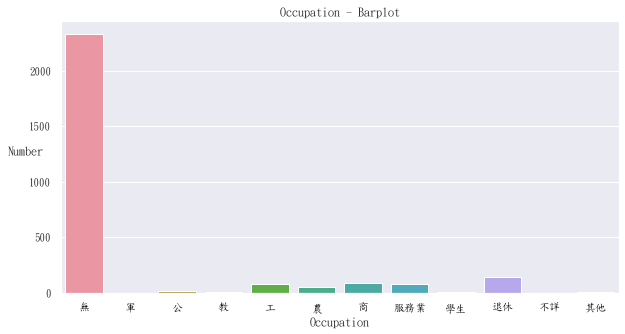

In [64]:
pro_id = tsr_12.loc[:,"pro_id"]
pro_id[(pro_id != 1) & (pro_id != 2) & (pro_id != 3) & (pro_id != 4) & (pro_id != 5) & (pro_id != 6) & (pro_id != 7) & (pro_id != 8) & (pro_id != 9) & (pro_id != 10) & (pro_id != 11) & (pro_id != 12)] = np.nan
pro_id =pro_id.fillna((pro_id.mode()[0]))
#print(pro_id)
print(pro_id.value_counts() / len(pro_id))
#print(pro_id.describe())

pro_id_labels = ["無","軍","公","教","工","農","商","服務業","學生","退休","不詳","其他"]

sns.countplot(pro_id).set_xticklabels(pro_id_labels)
plt.title("Occupation - Barplot")
plt.xlabel('Occupation')
plt.ylabel('Number', rotation=0)
plt.show()
#pro_id =pro_id.fillna(999)

# 入院方式

3.0    0.918484
2.0    0.069718
1.0    0.011798
Name: opc_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


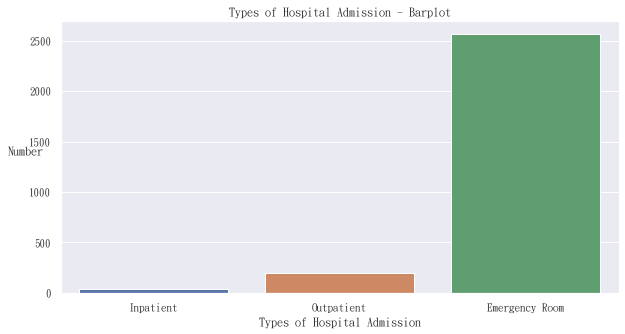

In [65]:
opc_id = tsr_12.loc[:,"opc_id"]
opc_id = pd.to_numeric(opc_id, errors = "coerce")
opc_id[(opc_id != 1) & (opc_id != 2) & (opc_id != 3)] = np.nan
opc_id =opc_id.fillna((opc_id.mode()[0]))
#print(opc_id)
print(opc_id.value_counts() / len(opc_id))
#print(opc_id.describe())

opc_id_labels = ["Inpatient","Outpatient","Emergency Room"]
sns.countplot(opc_id).set_xticklabels(opc_id_labels)
plt.title("Types of Hospital Admission - Barplot")
plt.xlabel('Types of Hospital Admission')
plt.ylabel('Number', rotation=0)
plt.show()

# 不住院

0    0.998212
1    0.001788
Name: ih_fl, dtype: float64


<ipython-input-66-a10d0ebbd41b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ih_fl[(ih_fl != "1") & (ih_fl != np.nan)] = 0
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


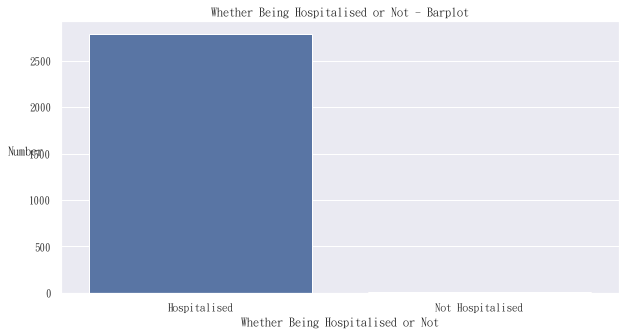

In [66]:
ih_fl = tsr_12.loc[:,"ih_fl"]
ih_fl[(ih_fl != "1") & (ih_fl != np.nan)] = 0
ih_fl =ih_fl.fillna((ih_fl.mode()[0]))
#print(ih_fl)
print(ih_fl.value_counts() / len(ih_fl))
#print(ih_fl.describe())

ih_fl_labels = ["Hospitalised","Not Hospitalised"]
sns.countplot(ih_fl).set_xticklabels(ih_fl_labels)
plt.title("Whether Being Hospitalised or Not - Barplot")
plt.xlabel('Whether Being Hospitalised or Not')
plt.ylabel('Number', rotation=0)
plt.show()

# 住院日期

count                    2797
unique                   1117
top       2008-04-27 00:00:00
freq                       23
first     2006-08-02 00:00:00
last      2019-05-28 00:00:00
Name: ih_dt, dtype: object


<ipython-input-67-04b5051bd974>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(ih_dt.describe())


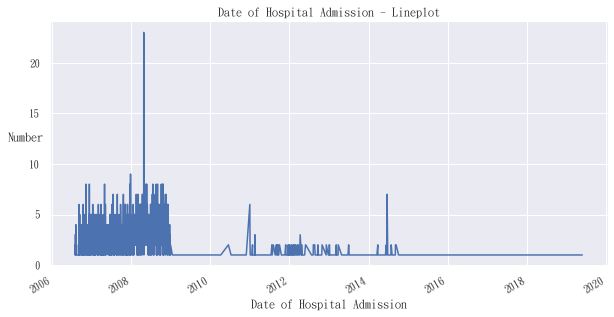

In [67]:
ih_dt = tsr_12.loc[:,"ih_dt"]
ih_dt = pd.to_datetime(ih_dt, errors='coerce')
ih_dt =ih_dt.fillna((ih_dt.mode()[0]))
#print(ih_dt)
#print(ih_dt.value_counts() / len(ih_dt))
print(ih_dt.describe())

ih_dt.value_counts().plot()
plt.title("Date of Hospital Admission - Lineplot")
plt.xlabel('Date of Hospital Admission')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 離院日期

<ipython-input-68-6a7e728370b3>:19: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  hospitalised_time[(hospitalised_time < inner_fence_low) | (hospitalised_time > inner_fence_upp)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._where(~key, value, inplace=True)


count    2797.000000
mean        8.491169
std         6.505481
min         0.000000
25%         4.000000
50%         7.000000
75%         9.000000
max        34.000000
dtype: float64


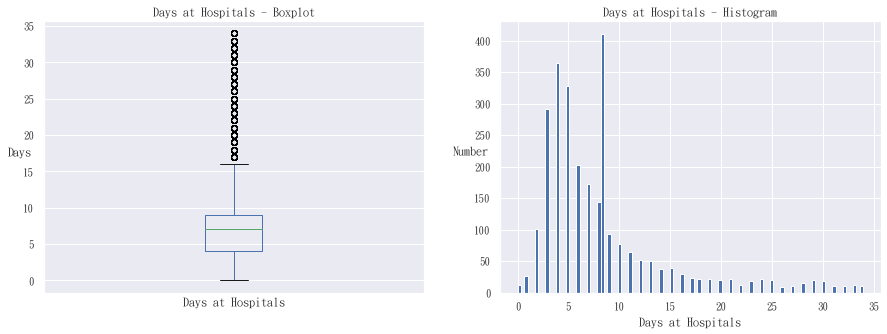

In [68]:
oh_dt = tsr_12.loc[:,"oh_dt"]
oh_dt = pd.to_datetime(oh_dt, errors='coerce')
oh_dt =oh_dt.fillna((oh_dt.mode()[0]))
oh_dt[(oh_dt.dt.year < 2006) | (oh_dt.dt.year > 2021) | (oh_dt < ih_dt)] = np.nan
#print(oh_dt)
#print(oh_dt.value_counts() / len(oh_dt))
#print(oh_dt.describe())

hospitalised_time = oh_dt - ih_dt
hospitalised_time = hospitalised_time.dt.days

q1 = hospitalised_time.quantile(0.25)
q3 = hospitalised_time.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hospitalised_time[(hospitalised_time < inner_fence_low) | (hospitalised_time > inner_fence_upp)] = np.nan

hospitalised_time = hospitalised_time.fillna(round(hospitalised_time.mean(),3))

#print(hospitalised_time.value_counts().sort_values(ascending= True))
print(hospitalised_time.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hospitalised_time.plot.box(ax = ax1)
ax1.set_title("Days at Hospitals - Boxplot")
ax1.set_xlabel('Days at Hospitals')
ax1.set_ylabel('Days', rotation=0)
ax1.set_xticks([])

#hospitalised_time.plot.hist(ax = ax2, bins=100)
#plt.show()
hospitalised_time.plot.hist(ax = ax2, bins=100)
ax2.set_title("Days at Hospitals - Histogram")
ax2.set_xlabel('Days at Hospitals')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 發病日期

count                    2797
unique                   2577
top       2007-10-21 12:08:00
freq                       18
first     2006-07-26 12:08:00
last      2019-05-27 12:08:00
dtype: object


<ipython-input-69-548507861fb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onset_time.onset_dt[(onset_time.onset_dt.dt.year < 2006) | (onset_time.onset_dt.dt.year > 2021)] = np.nan
<ipython-input-69-548507861fb1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onset_time['onseth_nm'][(onset_time['onseth_nm'] < 0) | (onset_time['onseth_nm'] > 24)] = np.nan
<ipython-input-69-548507861fb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

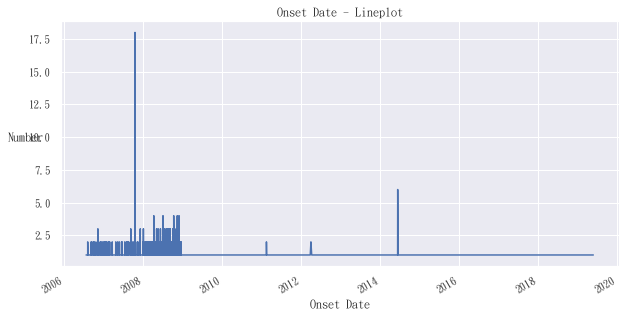

In [69]:
onset_time = tsr_12.loc[:,["onset_dt", "onseth_nm", "onsetm_nm"]]
onset_time.onset_dt = pd.to_datetime(onset_time.onset_dt, errors = "coerce", format = "%Y-%m-%d")
onset_time.onset_dt[(onset_time.onset_dt.dt.year < 2006) | (onset_time.onset_dt.dt.year > 2021)] = np.nan

onset_time['onseth_nm'] = pd.to_numeric(onset_time['onseth_nm'], errors='coerce')
onset_time['onseth_nm'][(onset_time['onseth_nm'] < 0) | (onset_time['onseth_nm'] > 24)] = np.nan
onset_time['onseth_nm'][onset_time['onseth_nm'] == 24] = 0
onset_time['onsetm_nm'] = pd.to_numeric(onset_time['onsetm_nm'], errors='coerce')
onset_time['onsetm_nm'][(onset_time['onsetm_nm'] < 0) | (onset_time['onsetm_nm'] > 60)] = np.nan
onset_time['onsetm_nm'][onset_time['onsetm_nm'] == 60] = 0

onset_time['onset_dt'] = onset_time['onset_dt'].fillna(onset_time['onset_dt'].mode()[0])
onset_time['onseth_nm'] = onset_time['onseth_nm'].fillna(onset_time['onseth_nm'].mean())
onset_time['onsetm_nm'] = onset_time['onsetm_nm'].fillna(onset_time['onsetm_nm'].mean())

onset = onset_time['onset_dt'].astype(str)+' '+onset_time['onseth_nm'].astype(int).map(str)+':'+onset_time['onsetm_nm'].astype(int).map(str)
onset_day = pd.to_datetime(onset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(onset_day.value_counts() / len(onset_day))
print(onset_day.describe())

onset_day.value_counts().plot()
plt.title("Onset Date - Lineplot")
plt.xlabel('Onset Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 發病時間-時

In [70]:
onseth_nm = tsr_12.loc[:,"onseth_nm"]
onseth_nm = pd.to_numeric(onseth_nm, errors='coerce')
onseth_nm[(onseth_nm < 0) | (onseth_nm > 24)] = np.nan
onseth_nm[onseth_nm == 24] = 0
onseth_nm = onseth_nm.fillna(onseth_nm.mean())
#print(onseth_nm)
#print(onseth_nm.value_counts() / len(onseth_nm))
print(onseth_nm.describe())

count    2797.000000
mean       12.155827
std         5.487121
min         0.000000
25%         8.000000
50%        12.155827
75%        16.000000
max        23.000000
Name: onseth_nm, dtype: float64


# 發病時間-分

In [71]:
onsetm_nm = tsr_12.loc[:,"onsetm_nm"]
onsetm_nm = pd.to_numeric(onsetm_nm, errors='coerce')
onsetm_nm[(onsetm_nm < 0) | (onsetm_nm > 60)] = np.nan
onsetm_nm[onsetm_nm == 60] = 0
onsetm_nm = onsetm_nm.fillna(onsetm_nm.mean())
#print(onsetm_nm)
#print(onsetm_nm.value_counts()/len(onsetm_nm))
print(onsetm_nm.describe())

count    2797.000000
mean        8.235062
std        12.903283
min         0.000000
25%         0.000000
50%         0.000000
75%         8.235062
max        57.000000
Name: onsetm_nm, dtype: float64


# 不確定發病時間

N    0.802288
Y    0.197712
Name: onset_fl, dtype: float64


<ipython-input-72-d13ea06fb7e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onset_fl[(onset_fl != "N") & (onset_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


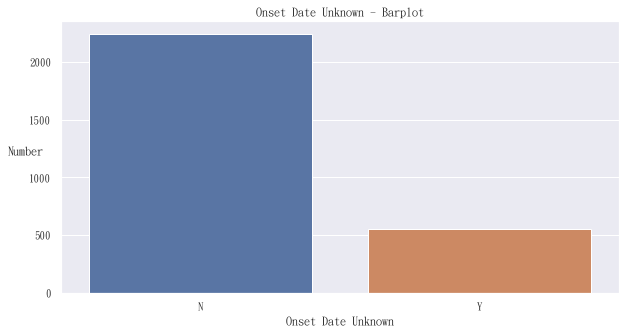

In [72]:
onset_fl = tsr_12.loc[:,"onset_fl"]
onset_fl[(onset_fl != "N") & (onset_fl != "Y")] = np.nan
onset_fl =onset_fl.fillna((onset_fl.mode()[0]))
#print(onset_fl)
print(onset_fl.value_counts() / len(onset_fl))
#print(onset_fl.describe())

sns.countplot(onset_fl)
plt.title("Onset Date Unknown - Barplot")
plt.xlabel('Onset Date Unknown')
plt.ylabel('Number', rotation=0)
plt.show()

# 門診/急診日期

count                    2797
unique                   2548
top       2008-04-26 13:29:00
freq                      243
first     2006-08-01 23:29:00
last      2020-09-01 10:56:00
dtype: object


<ipython-input-73-70a92cdba004>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_time.ot_dt[(ot_time.ot_dt.dt.year < 2006) | (ot_time.ot_dt.dt.year > 2021)] = np.nan
<ipython-input-73-70a92cdba004>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_time['ottih_nm'][(ot_time['ottih_nm'] < 0) | (ot_time['ottih_nm'] > 24)] = np.nan
<ipython-input-73-70a92cdba004>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_time['ottih_nm'][ot_

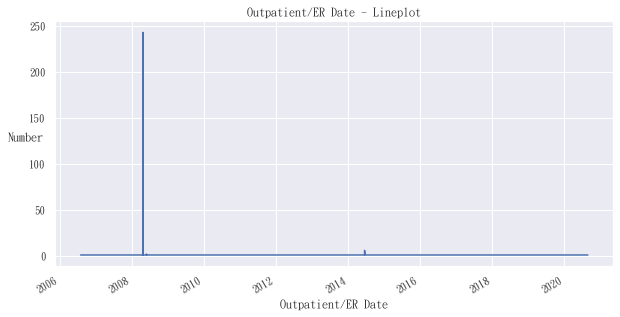

In [73]:
ot_time = tsr_12.loc[:,["ot_dt", "ottih_nm", "ottim_nm"]]
ot_time.ot_dt = pd.to_datetime(ot_time.ot_dt, errors = "coerce", format = "%Y-%m-%d")
ot_time.ot_dt[(ot_time.ot_dt.dt.year < 2006) | (ot_time.ot_dt.dt.year > 2021)] = np.nan

ot_time['ottih_nm'] = pd.to_numeric(ot_time['ottih_nm'], errors='coerce')
ot_time['ottih_nm'][(ot_time['ottih_nm'] < 0) | (ot_time['ottih_nm'] > 24)] = np.nan
ot_time['ottih_nm'][ot_time['ottih_nm'] == 24] = 0
ot_time['ottim_nm'] = pd.to_numeric(ot_time['ottim_nm'], errors='coerce')
ot_time['ottim_nm'][(ot_time['ottim_nm'] < 0) | (ot_time['ottim_nm'] > 60)] = np.nan
ot_time['ottim_nm'][ot_time['ottim_nm'] == 60] = 0

ot_time['ot_dt'] = ot_time['ot_dt'].fillna(ot_time['ot_dt'].mode()[0])
ot_time['ottih_nm'] = ot_time['ottih_nm'].fillna(ot_time['ottih_nm'].mean())
ot_time['ottim_nm'] = ot_time['ottim_nm'].fillna(ot_time['ottim_nm'].mean())

otset = ot_time['ot_dt'].astype(str)+' '+ot_time['ottih_nm'].astype(int).map(str)+':'+ot_time['ottim_nm'].astype(int).map(str)

otset_day = pd.to_datetime(otset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(otset_day.value_counts() / len(otset_day))
print(otset_day.describe())

otset_day.value_counts().plot()
plt.title("Outpatient/ER Date - Lineplot")
plt.xlabel('Outpatient/ER Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 門診/急診時間-時

In [74]:
ottih_nm = tsr_12.loc[:,"ottih_nm"]
ottih_nm = pd.to_numeric(ottih_nm, errors='coerce')
ottih_nm[(ottih_nm < 0) | (ottih_nm > 24)] = np.nan
ottih_nm[ottih_nm == 24] = 0
ottih_nm = ottih_nm.fillna(ottih_nm.mean())
#print(ottih_nm)
#print(ottih_nm.value_counts() / len(ottih_nm))
print(ottih_nm.describe())

count    2797.000000
mean       13.574627
std         5.426921
min         0.000000
25%        10.000000
50%        13.574627
75%        18.000000
max        23.000000
Name: ottih_nm, dtype: float64


# 門診/急診時間-秒

In [75]:
ottim_nm = tsr_12.loc[:,"ottim_nm"]
ottim_nm = pd.to_numeric(ottim_nm, errors='coerce')
ottim_nm[(ottim_nm < 0) | (ottim_nm > 60)] = np.nan
ottim_nm[ottim_nm == 60] = 0
ottim_nm = ottim_nm.fillna(ottim_nm.mean())
#print(ottim_nm)
#print(ottim_nm.value_counts() / len(ottim_nm))
print(ottim_nm.describe())

count    2797.000000
mean       29.472856
std        16.284089
min         0.000000
25%        17.000000
50%        29.472856
75%        43.000000
max        59.000000
Name: ottim_nm, dtype: float64


# 不確定門/急診時間

N    0.998212
Y    0.001788
Name: ot_fl, dtype: float64


<ipython-input-76-6d2998e61c90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_fl[(ot_fl != "N") & (ot_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


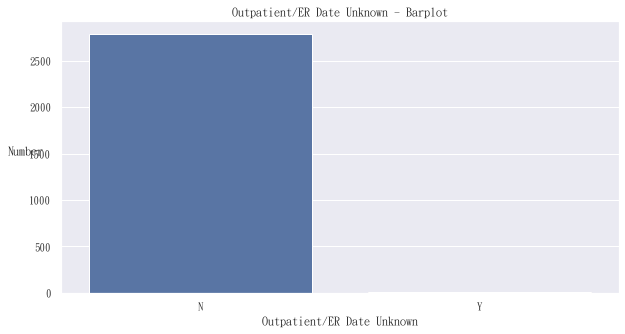

In [76]:
ot_fl = tsr_12.loc[:,"ot_fl"]
ot_fl[(ot_fl != "N") & (ot_fl != "Y")] = np.nan
ot_fl = ot_fl.fillna(ot_fl.mode()[0])
#print(ot_fl)
print(ot_fl.value_counts() / len(ot_fl))
#print(ot_fl.describe())

sns.countplot(ot_fl)
plt.title("Outpatient/ER Date Unknown - Barplot")
plt.xlabel('Outpatient/ER Date Unknown')
plt.ylabel('Number', rotation=0)
plt.show()

# 第一次醫師檢視日期

count                    2797
unique                   2560
top       2008-04-26 13:29:00
freq                      231
first     2006-08-01 23:31:00
last      2019-05-27 13:12:00
dtype: object


<ipython-input-77-8f2859ef2017>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flook_time.flook_dt[(flook_time.flook_dt.dt.year < 2006) | (flook_time.flook_dt.dt.year > 2021)] = np.nan
<ipython-input-77-8f2859ef2017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flook_time['flookh_nm'][(flook_time['flookh_nm'] < 0) | (flook_time['flookh_nm'] > 24)] = np.nan
<ipython-input-77-8f2859ef2017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

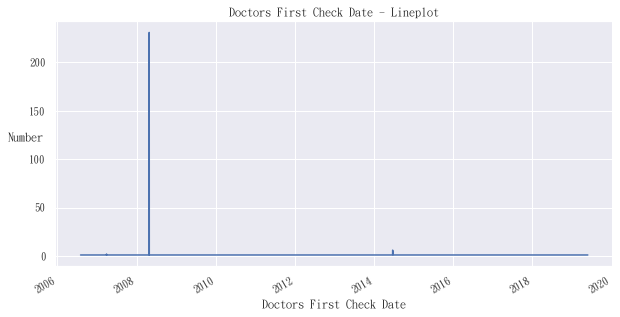

In [77]:
flook_time = tsr_12.loc[:,["flook_dt", "flookh_nm", "flookm_nm"]]
flook_time.flook_dt = pd.to_datetime(flook_time.flook_dt, errors = "coerce", format = "%Y-%m-%d")
flook_time.flook_dt[(flook_time.flook_dt.dt.year < 2006) | (flook_time.flook_dt.dt.year > 2021)] = np.nan

flook_time['flookh_nm'] = pd.to_numeric(flook_time['flookh_nm'], errors='coerce')
flook_time['flookh_nm'][(flook_time['flookh_nm'] < 0) | (flook_time['flookh_nm'] > 24)] = np.nan
flook_time['flookh_nm'][flook_time['flookh_nm'] == 24] = 0
flook_time['flookm_nm'] = pd.to_numeric(flook_time['flookm_nm'], errors='coerce')
flook_time['flookm_nm'][(flook_time['flookm_nm'] < 0) | (flook_time['flookm_nm'] > 60)] = np.nan
flook_time['flookm_nm'][flook_time['flookm_nm'] == 60] = 0

flook_time['flook_dt'] = flook_time['flook_dt'].fillna(flook_time['flook_dt'].mode()[0])
flook_time['flookh_nm'] = flook_time['flookh_nm'].fillna(flook_time['flookh_nm'].mean())
flook_time['flookm_nm'] = flook_time['flookm_nm'].fillna(flook_time['flookm_nm'].mean())

flookset = flook_time['flook_dt'].astype(str)+' '+flook_time['flookh_nm'].astype(int).map(str)+':'+flook_time['flookm_nm'].astype(int).map(str)

flookset_day = pd.to_datetime(flookset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(flookset_day.value_counts() / len(flookset_day))
print(flookset_day.describe())

flookset_day.value_counts().plot()
plt.title("Doctors First Check Date - Lineplot")
plt.xlabel('Doctors First Check Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 第一次醫師檢視時間-時

In [78]:
flookh_nm = tsr_12.loc[:,"flookh_nm"]
flookh_nm = pd.to_numeric(flookh_nm, errors='coerce')
flookh_nm[(flookh_nm < 0) | (flookh_nm > 24)] = np.nan
flookh_nm[flookh_nm == 24] = 0
flookh_nm = flookh_nm.fillna(flookh_nm.mean())
#print(flookh_nm)
#print(flookh_nm.value_counts() / len(flookh_nm))
print(flookh_nm.describe())

count    2797.000000
mean       13.646599
std         5.477373
min         0.000000
25%        10.000000
50%        13.646599
75%        18.000000
max        23.000000
Name: flookh_nm, dtype: float64


# 第一次醫師檢視時間-分

In [79]:
flookm_nm = tsr_12.loc[:,"flookm_nm"]
flookm_nm = pd.to_numeric(flookm_nm, errors='coerce')
flookm_nm[(flookm_nm < 0) | (flookm_nm > 60)] = np.nan
flookm_nm[flookm_nm == 60] = 0
flookm_nm = flookm_nm.fillna(flookm_nm.mean())
#print(flookm_nm)
#print(flookm_nm.value_counts() / len(flookm_nm))
print(flookm_nm.describe())

count    2797.000000
mean       29.576742
std        16.438417
min         0.000000
25%        16.000000
50%        29.576742
75%        43.000000
max        59.000000
Name: flookm_nm, dtype: float64


# 不確定第一次醫師檢視時間

N    0.999285
Y    0.000715
Name: flook_fl, dtype: float64


<ipython-input-80-3afde2e49798>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flook_fl[(flook_fl != "N") & (flook_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


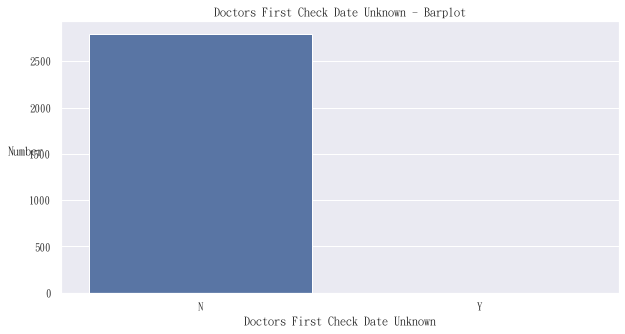

In [80]:
flook_fl = tsr_12.loc[:,"flook_fl"]
flook_fl[(flook_fl != "N") & (flook_fl != "Y")] = np.nan
flook_fl = flook_fl.fillna(flook_fl.mode()[0])
#print(flook_fl)
print(flook_fl.value_counts() / len(flook_fl))
#print(flook_fl.describe())

sns.countplot(flook_fl)
plt.title("Doctors First Check Date Unknown - Barplot")
plt.xlabel('Doctors First Check Date Unknown')
plt.ylabel('Number', rotation=0)
plt.show()

# 1st CT 日期

count                    2797
unique                   2627
top       2008-04-26 13:30:00
freq                      134
first     2006-08-02 00:37:00
last      2019-05-27 14:56:00
dtype: object


<ipython-input-81-cfacf69d6a39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fct_time.fct_dt[(fct_time.fct_dt.dt.year < 2006) | (fct_time.fct_dt.dt.year > 2021)] = np.nan
<ipython-input-81-cfacf69d6a39>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fct_time['fcth_nm'][(fct_time['fcth_nm'] < 0) | (fct_time['fcth_nm'] > 24)] = np.nan
<ipython-input-81-cfacf69d6a39>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fct_time['fcth_nm

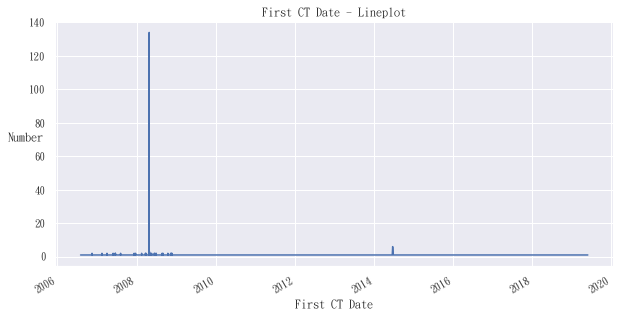

In [81]:
fct_time = tsr_12.loc[:,["fct_dt", "fcth_nm", "fctm_nm"]]
fct_time.fct_dt = pd.to_datetime(fct_time.fct_dt, errors = "coerce", format = "%Y-%m-%d")
fct_time.fct_dt[(fct_time.fct_dt.dt.year < 2006) | (fct_time.fct_dt.dt.year > 2021)] = np.nan

fct_time['fcth_nm'] = pd.to_numeric(fct_time['fcth_nm'], errors='coerce')
fct_time['fcth_nm'][(fct_time['fcth_nm'] < 0) | (fct_time['fcth_nm'] > 24)] = np.nan
fct_time['fcth_nm'][fct_time['fcth_nm'] == 24] = 0
fct_time['fctm_nm'] = pd.to_numeric(fct_time['fctm_nm'], errors='coerce')
fct_time['fctm_nm'][(fct_time['fctm_nm'] < 0) | (fct_time['fctm_nm'] > 60)] = np.nan
fct_time['fctm_nm'][fct_time['fctm_nm'] == 60] = 0

fct_time['fct_dt'] = fct_time['fct_dt'].fillna(fct_time['fct_dt'].mode()[0])
fct_time['fcth_nm'] = fct_time['fcth_nm'].fillna(fct_time['fcth_nm'].mean())
fct_time['fctm_nm'] = fct_time['fctm_nm'].fillna(fct_time['fctm_nm'].mean())

fctset = fct_time['fct_dt'].astype(str)+' '+fct_time['fcth_nm'].astype(int).map(str)+':'+fct_time['fctm_nm'].astype(int).map(str)

fctset_day = pd.to_datetime(fctset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(fctset_day.value_counts() / len(fctset_day))
print(fctset_day.describe())

fctset_day.value_counts().plot()
plt.title("First CT Date - Lineplot")
plt.xlabel('First CT Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 1st CT 時間-時

In [82]:
fcth_nm = tsr_12.loc[:,"fcth_nm"]
fcth_nm = pd.to_numeric(fcth_nm, errors='coerce')
fcth_nm[(fcth_nm < 0) | (fcth_nm > 24)] = np.nan
fcth_nm[fcth_nm == 24] = 0
fcth_nm = fcth_nm.fillna(fcth_nm.mean())
#print(fcth_nm)
#print(fcth_nm.value_counts() / len(fcth_nm))
print(fcth_nm.describe())

count    2797.000000
mean       13.838749
std         5.423443
min         0.000000
25%        11.000000
50%        13.838749
75%        18.000000
max        23.000000
Name: fcth_nm, dtype: float64


# 1st CT 時間-分

In [83]:
fctm_nm = tsr_12.loc[:,"fctm_nm"]
fctm_nm = pd.to_numeric(fctm_nm, errors='coerce')
fctm_nm[(fctm_nm < 0) | (fctm_nm > 60)] = np.nan
fctm_nm[fctm_nm == 60] = 0
fctm_nm = fctm_nm.fillna(fctm_nm.mean())
#print(fctm_nm)
#print(fctm_nm.value_counts() / len(fctm_nm))
print(fctm_nm.describe())

count    2797.000000
mean       30.247521
std        16.103993
min         0.000000
25%        18.000000
50%        30.247521
75%        43.000000
max        59.000000
Name: fctm_nm, dtype: float64


# 1st CT 外片

N    0.983911
Y    0.016089
Name: fctoh_fl, dtype: float64


<ipython-input-84-9253e88c510c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fctoh_fl[(fctoh_fl != "N") & (fctoh_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


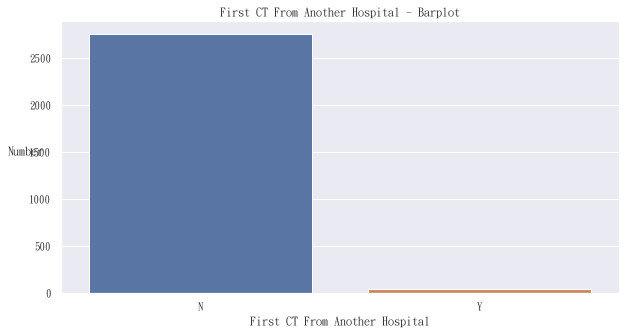

In [84]:
fctoh_fl = tsr_12.loc[:,"fctoh_fl"]
fctoh_fl[(fctoh_fl != "N") & (fctoh_fl != "Y")] = np.nan
fctoh_fl = fctoh_fl.fillna(fctoh_fl.mode()[0])
#print(fctoh_fl)
print(fctoh_fl.value_counts() / len(fctoh_fl))
#print(fctoh_fl.describe())

sns.countplot(fctoh_fl)
plt.title("First CT From Another Hospital - Barplot")
plt.xlabel('First CT From Another Hospital')
plt.ylabel('Number', rotation=0)
plt.show()

# IV-tPA

1.0    0.998927
2.0    0.001073
Name: ivtpath_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


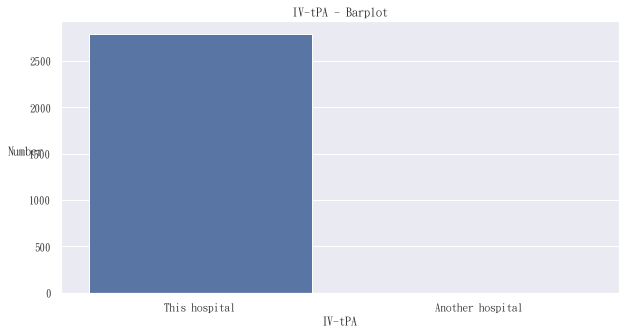

In [85]:
ivtpath_id = tsr_12.loc[:,"ivtpath_id"]
ivtpath_id = pd.to_numeric(ivtpath_id, errors = 'coerce')
ivtpath_id[(ivtpath_id != 1) & (ivtpath_id != 2)] = np.nan
ivtpath_id = ivtpath_id.fillna(ivtpath_id.mode()[0])
#print(ivtpath_id)
print(ivtpath_id.value_counts() / len(ivtpath_id))
#print(ivtpath_id.describe())

ivtpath_id_labels = ["This hospital","Another hospital"]
sns.countplot(ivtpath_id).set_xticklabels(ivtpath_id_labels)
plt.title("IV-tPA - Barplot")
plt.xlabel('IV-tPA')
plt.ylabel('Number', rotation=0)
plt.show()

# IV-tPA 日期

<ipython-input-86-6b22dadc645f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivtpa_time.ivtpa_dt[(ivtpa_time.ivtpa_dt.dt.year < 2006) | (ivtpa_time.ivtpa_dt.dt.year > 2021)] = np.nan
<ipython-input-86-6b22dadc645f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivtpa_time['ivtpah_nm'][(ivtpa_time['ivtpah_nm'] < 0) | (ivtpa_time['ivtpah_nm'] > 24)] = np.nan
<ipython-input-86-6b22dadc645f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

count                    2797
unique                    201
top       2011-07-24 13:09:00
freq                     2594
first     2006-10-09 01:10:00
last      2015-11-22 21:10:00
dtype: object


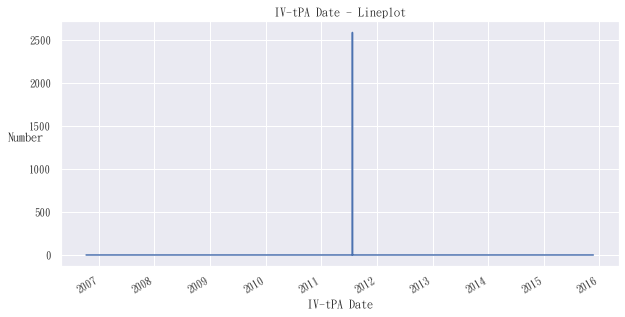

In [86]:
ivtpa_time = tsr_12.loc[:,["ivtpa_dt", "ivtpah_nm", "ivtpam_nm"]]
ivtpa_time.ivtpa_dt = pd.to_datetime(ivtpa_time.ivtpa_dt, errors = "coerce", format = "%Y-%m-%d")
ivtpa_time.ivtpa_dt[(ivtpa_time.ivtpa_dt.dt.year < 2006) | (ivtpa_time.ivtpa_dt.dt.year > 2021)] = np.nan

ivtpa_time['ivtpah_nm'] = pd.to_numeric(ivtpa_time['ivtpah_nm'], errors='coerce')
ivtpa_time['ivtpah_nm'][(ivtpa_time['ivtpah_nm'] < 0) | (ivtpa_time['ivtpah_nm'] > 24)] = np.nan
ivtpa_time['ivtpah_nm'][ivtpa_time['ivtpah_nm'] == 24] = 0
ivtpa_time['ivtpam_nm'] = pd.to_numeric(ivtpa_time['ivtpam_nm'], errors='coerce')
ivtpa_time['ivtpam_nm'][(ivtpa_time['ivtpam_nm'] < 0) | (ivtpa_time['ivtpam_nm'] > 24)] = np.nan
ivtpa_time['ivtpam_nm'][ivtpa_time['ivtpam_nm'] == 24] = 0

ivtpa_time['ivtpa_dt'] = ivtpa_time['ivtpa_dt'].fillna(ivtpa_time['ivtpa_dt'].mode()[0])
ivtpa_time['ivtpah_nm'] = ivtpa_time['ivtpah_nm'].fillna(ivtpa_time['ivtpah_nm'].mean())
ivtpa_time['ivtpam_nm'] = ivtpa_time['ivtpam_nm'].fillna(ivtpa_time['ivtpam_nm'].mean())

ivtpaset = ivtpa_time['ivtpa_dt'].astype(str)+' '+ivtpa_time['ivtpah_nm'].astype(int).map(str)+':'+ivtpa_time['ivtpam_nm'].astype(int).map(str)

ivtpaset_day = pd.to_datetime(ivtpaset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(ivtpaset_day.value_counts() / len(ivtpaset_day))
print(ivtpaset_day.describe())

ivtpaset_day.value_counts().plot()
plt.title("IV-tPA Date - Lineplot")
plt.xlabel('IV-tPA Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# IV-tPA 時間-時

In [87]:
ivtpah_nm = tsr_12.loc[:,"ivtpah_nm"]
ivtpah_nm = pd.to_numeric(ivtpah_nm, errors='coerce')
ivtpah_nm[(ivtpah_nm < 0) | (ivtpah_nm > 24)] = np.nan
ivtpah_nm[ivtpah_nm == 24] = 0
ivtpah_nm = ivtpah_nm.fillna(ivtpah_nm.mean())
#print(ivtpah_nm)
#print(ivtpah_nm.value_counts() / len(ivtpah_nm))
print(ivtpah_nm.describe())

count    2797.000000
mean       13.582915
std         1.806678
min         0.000000
25%        13.582915
50%        13.582915
75%        13.582915
max        23.000000
Name: ivtpah_nm, dtype: float64


# IV-tPA 時間-分

In [88]:
ivtpam_nm = tsr_12.loc[:,"ivtpam_nm"]
ivtpam_nm = pd.to_numeric(ivtpam_nm, errors='coerce')
ivtpam_nm[(ivtpam_nm < 0) | (ivtpam_nm > 60)] = np.nan
ivtpam_nm[ivtpam_nm == 60] = 0
ivtpam_nm = ivtpam_nm.fillna(ivtpam_nm.mean())
#print(ivtpam_nm)
#print(ivtpam_nm.value_counts() / len(ivtpam_nm))
print(ivtpam_nm.describe())

count    2797.000000
mean       25.806931
std         4.849873
min         0.000000
25%        25.806931
50%        25.806931
75%        25.806931
max        59.000000
Name: ivtpam_nm, dtype: float64


# Start IV-tPA mg

count    2797.000000
mean        2.419771
std        10.543292
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        70.000000
Name: ivtpamg_nm, dtype: float64


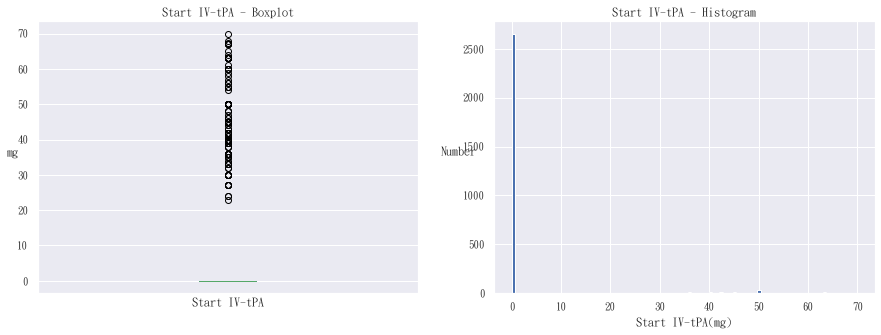

In [89]:
ivtpamg_nm = tsr_12.loc[:,"ivtpamg_nm"]
ivtpamg_nm = pd.to_numeric(ivtpamg_nm, errors='coerce')

q1 = ivtpamg_nm.quantile(0.25)
q3 = ivtpamg_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ivtpamg_nm[(ivtpamg_nm < inner_fence_low) | (ivtpamg_nm > inner_fence_upp)] = np.nan

#ivtpamg_nm =ivtpamg_nm.fillna(ivtpamg_nm.mean())
ivtpamg_nm =ivtpamg_nm.fillna(0)

#print(ivtpamg_nm)
#print(ivtpamg_nm.value_counts() / len(ivtpamg_nm))
print(ivtpamg_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ivtpamg_nm.plot.box(ax = ax1)
ax1.set_title("Start IV-tPA - Boxplot")
ax1.set_xlabel('Start IV-tPA')
ax1.set_ylabel('mg', rotation=0)
ax1.set_xticks([])

#ivtpamg_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ivtpamg_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Start IV-tPA - Histogram")
ax2.set_xlabel('Start IV-tPA(mg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 未打IV-tPA 原因

0.0    0.953879
1.0    0.038613
2.0    0.003933
3.0    0.003575
Name: nivtpa_id, dtype: float64
count    2797.000000
mean        0.057204
std         0.288581
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: nivtpa_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


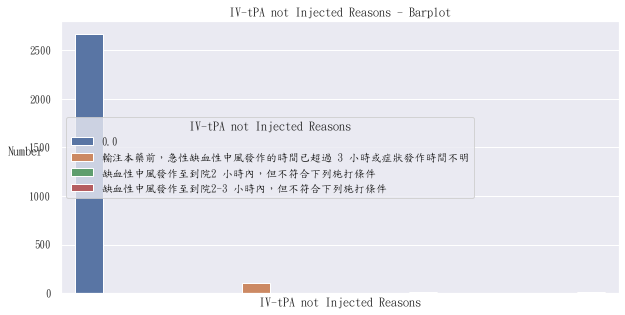

In [90]:
nivtpa_id = tsr_12.loc[:,"nivtpa_id"]
nivtpa_id = pd.to_numeric(nivtpa_id, errors = "coerce")
nivtpa_id[(nivtpa_id != 1) & (nivtpa_id != 2) & (nivtpa_id != 3)] = np.nan
nivtpa_id = nivtpa_id.fillna(0)
#print(nivtpa_id)
print(nivtpa_id.value_counts() / len(nivtpa_id))
print(nivtpa_id.describe())

nivtpa_id[nivtpa_id == 1] = "輸注本藥前，急性缺血性中風發作的時間已超過 3 小時或症狀發作時間不明"
nivtpa_id[nivtpa_id == 2] = "缺血性中風發作至到院2 小時內，但不符合下列施打條件"
nivtpa_id[nivtpa_id == 3] = "缺血性中風發作至到院2-3 小時內，但不符合下列施打條件"

sns.countplot(nivtpa_id, hue = nivtpa_id)
plt.title("IV-tPA not Injected Reasons - Barplot")
plt.xlabel('IV-tPA not Injected Reasons')
plt.ylabel('Number', rotation=0)
plt.xticks([])
plt.legend(loc = 6, title="IV-tPA not Injected Reasons")
plt.show()

nivtpa_id[nivtpa_id == "輸注本藥前，急性缺血性中風發作的時間已超過 3 小時或症狀發作時間不明"] = 1
nivtpa_id[nivtpa_id == "缺血性中風發作至到院2 小時內，但不符合下列施打條件"] = 2
nivtpa_id[nivtpa_id == "缺血性中風發作至到院2-3 小時內，但不符合下列施打條件"] = 3
nivtpa_id= nivtpa_id.fillna(999)

# 輸注本藥前，急性缺血性腦中風的症狀已迅速改善或症狀輕微。（如NIHSS<6分）

N    0.126564
Y    0.004290
Name: nivtpa1_fl, dtype: float64


<ipython-input-91-769cd3a5dadb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa1_fl[nivtpa1_fl == str(0)] = int(0)
<ipython-input-91-769cd3a5dadb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa1_fl[nivtpa1_fl == str(1)] = int(1)
<ipython-input-91-769cd3a5dadb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa1_fl[nivtpa1_fl == int(0)] = "N"
<ipython-input-91-769cd3a5dadb>:5: SettingWithCopyWarning: 
A value is tr

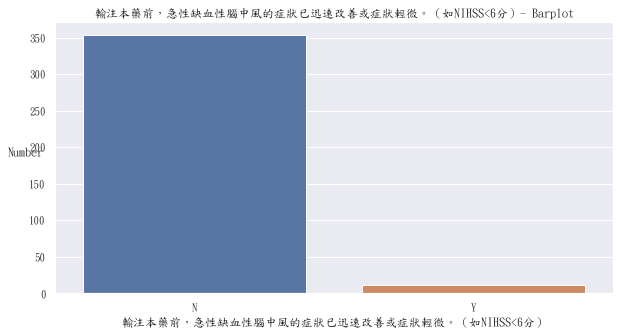

In [91]:
nivtpa1_fl = tsr_12.loc[:,"nivtpa1_fl"]
nivtpa1_fl[nivtpa1_fl == str(0)] = int(0)
nivtpa1_fl[nivtpa1_fl == str(1)] = int(1)
nivtpa1_fl[nivtpa1_fl == int(0)] = "N"
nivtpa1_fl[nivtpa1_fl == int(1)] = "Y"
nivtpa1_fl[(nivtpa1_fl != "N") & (nivtpa1_fl != "Y")] = np.nan
#print(nivtpa1_fl)
print(nivtpa1_fl.value_counts() / len(nivtpa1_fl))
#print(nivtpa1_fl.describe())

sns.countplot(nivtpa1_fl)
plt.title("輸注本藥前，急性缺血性腦中風的症狀已迅速改善或症狀輕微。（如NIHSS<6分）- Barplot")
plt.xlabel('輸注本藥前，急性缺血性腦中風的症狀已迅速改善或症狀輕微。（如NIHSS<6分）')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa1_fl = nivtpa1_fl.fillna(999)

# 臨床或影像判定為嚴重之中風（如NIHSS>25）

<ipython-input-92-c089e4b3d3a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa2_fl[nivtpa2_fl == str(0)] = int(0)
<ipython-input-92-c089e4b3d3a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa2_fl[nivtpa2_fl == str(1)] = int(1)
<ipython-input-92-c089e4b3d3a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa2_fl[nivtpa2_fl == int(0)] = "N"
<ipython-input-92-c089e4b3d3a3>:5: SettingWithCopyWarning: 
A value is tr

N    0.129782
Y    0.001073
Name: nivtpa2_fl, dtype: float64


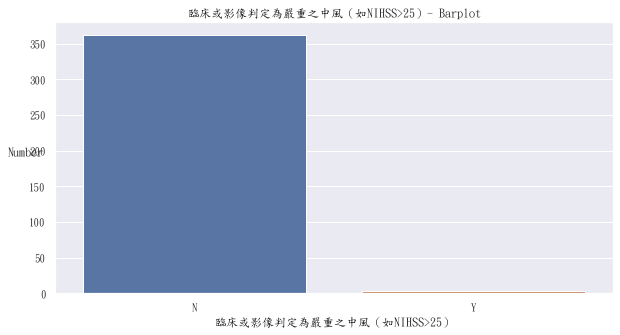

In [92]:
nivtpa2_fl = tsr_12.loc[:,"nivtpa2_fl"]
nivtpa2_fl[nivtpa2_fl == str(0)] = int(0)
nivtpa2_fl[nivtpa2_fl == str(1)] = int(1)
nivtpa2_fl[nivtpa2_fl == int(0)] = "N"
nivtpa2_fl[nivtpa2_fl == int(1)] = "Y"
#print(nivtpa2_fl)
print(nivtpa2_fl.value_counts() / len(nivtpa2_fl))
#print(nivtpa2_fl.describe())

sns.countplot(nivtpa2_fl)
plt.title("臨床或影像判定為嚴重之中風（如NIHSS>25）- Barplot")
plt.xlabel('臨床或影像判定為嚴重之中風（如NIHSS>25）')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa2_fl = nivtpa2_fl.fillna(999)

# 年齡在18歲以下，或80歲以上

N    0.130497
Y    0.000358
Name: nivtpa3_fl, dtype: float64


<ipython-input-93-00af25999bbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa3_fl[nivtpa3_fl == str(0)] = int(0)
<ipython-input-93-00af25999bbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa3_fl[nivtpa3_fl == str(1)] = int(1)
<ipython-input-93-00af25999bbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa3_fl[nivtpa3_fl == int(0)] = "N"
<ipython-input-93-00af25999bbc>:5: SettingWithCopyWarning: 
A value is tr

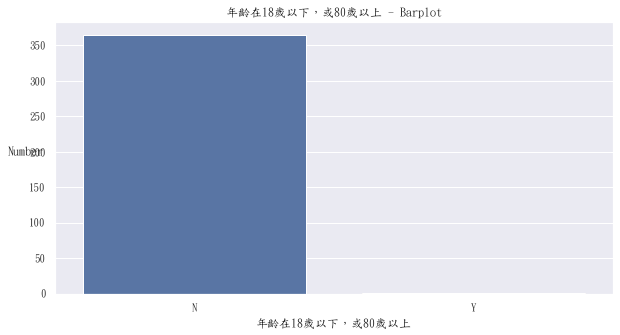

In [93]:
nivtpa3_fl = tsr_12.loc[:,"nivtpa3_fl"]
nivtpa3_fl[nivtpa3_fl == str(0)] = int(0)
nivtpa3_fl[nivtpa3_fl == str(1)] = int(1)
nivtpa3_fl[nivtpa3_fl == int(0)] = "N"
nivtpa3_fl[nivtpa3_fl == int(1)] = "Y"
#print(nivtpa3_fl)
print(nivtpa3_fl.value_counts() / len(nivtpa3_fl))
#print(nivtpa3_fl.describe())

sns.countplot(nivtpa3_fl)
plt.title("年齡在18歲以下，或80歲以上 - Barplot")
plt.xlabel('年齡在18歲以下，或80歲以上')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa3_fl = nivtpa3_fl.fillna(999)

# 過去曾中風且合併糖尿病

<ipython-input-94-5513e4ca2372>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa4_fl[nivtpa4_fl == str(0)] = int(0)
<ipython-input-94-5513e4ca2372>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa4_fl[nivtpa4_fl == str(1)] = int(1)
<ipython-input-94-5513e4ca2372>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa4_fl[nivtpa4_fl == int(0)] = "N"
<ipython-input-94-5513e4ca2372>:5: SettingWithCopyWarning: 
A value is tr

N    0.129782
Y    0.001073
Name: nivtpa4_fl, dtype: float64


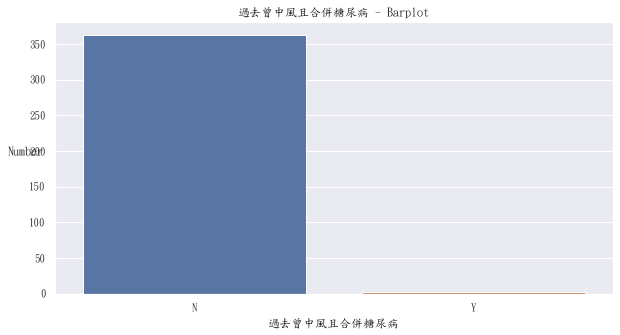

In [94]:
nivtpa4_fl = tsr_12.loc[:,"nivtpa4_fl"]
nivtpa4_fl[nivtpa4_fl == str(0)] = int(0)
nivtpa4_fl[nivtpa4_fl == str(1)] = int(1)
nivtpa4_fl[nivtpa4_fl == int(0)] = "N"
nivtpa4_fl[nivtpa4_fl == int(1)] = "Y"
#print(nivtpa4_fl)
print(nivtpa4_fl.value_counts() / len(nivtpa4_fl))
#print(nivtpa4_fl.describe())

sns.countplot(nivtpa4_fl)
plt.title("過去曾中風且合併糖尿病 - Barplot")
plt.xlabel('過去曾中風且合併糖尿病')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa4_fl = nivtpa4_fl.fillna(999)

# 最近3個月內有中風病史或有嚴重性頭部創傷

N    0.130497
Y    0.000358
Name: nivtpa5_fl, dtype: float64


<ipython-input-95-dc53377fecad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa5_fl[nivtpa5_fl == str(0)] = int(0)
<ipython-input-95-dc53377fecad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa5_fl[nivtpa5_fl == str(1)] = int(1)
<ipython-input-95-dc53377fecad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa5_fl[nivtpa5_fl == int(0)] = "N"
<ipython-input-95-dc53377fecad>:5: SettingWithCopyWarning: 
A value is tr

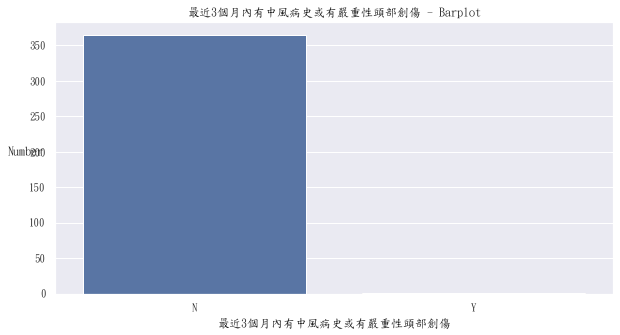

In [95]:
nivtpa5_fl = tsr_12.loc[:,"nivtpa5_fl"]
nivtpa5_fl[nivtpa5_fl == str(0)] = int(0)
nivtpa5_fl[nivtpa5_fl == str(1)] = int(1)
nivtpa5_fl[nivtpa5_fl == int(0)] = "N"
nivtpa5_fl[nivtpa5_fl == int(1)] = "Y"
#print(nivtpa5_fl)
print(nivtpa5_fl.value_counts() / len(nivtpa5_fl))
#print(nivtpa5_fl.describe())

sns.countplot(nivtpa5_fl)
plt.title("最近3個月內有中風病史或有嚴重性頭部創傷 - Barplot")
plt.xlabel('最近3個月內有中風病史或有嚴重性頭部創傷')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa5_fl = nivtpa5_fl.fillna(999)

# 中風發作時併發癲癇

<ipython-input-96-c6242c4974d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa6_fl[nivtpa6_fl == str(0)] = int(0)
<ipython-input-96-c6242c4974d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa6_fl[nivtpa6_fl == str(1)] = int(1)
<ipython-input-96-c6242c4974d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa6_fl[nivtpa6_fl == int(0)] = "N"
<ipython-input-96-c6242c4974d4>:5: SettingWithCopyWarning: 
A value is tr

N    0.129782
Y    0.001073
Name: nivtpa6_fl, dtype: float64


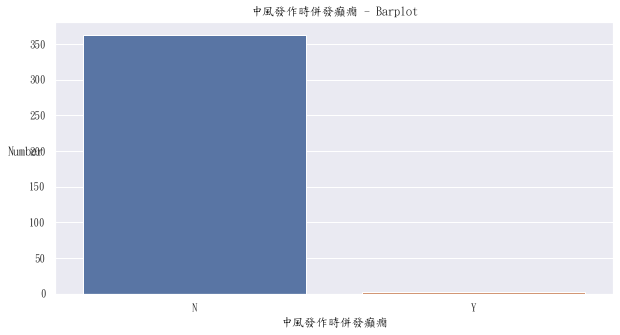

In [96]:
nivtpa6_fl = tsr_12.loc[:,"nivtpa6_fl"]
nivtpa6_fl[nivtpa6_fl == str(0)] = int(0)
nivtpa6_fl[nivtpa6_fl == str(1)] = int(1)
nivtpa6_fl[nivtpa6_fl == int(0)] = "N"
nivtpa6_fl[nivtpa6_fl == int(1)] = "Y"
#print(nivtpa6_fl)
print(nivtpa6_fl.value_counts() / len(nivtpa6_fl))
#print(nivtpa6_fl.describe())

sns.countplot(nivtpa6_fl)
plt.title("中風發作時併發癲癇 - Barplot")
plt.xlabel('中風發作時併發癲癇')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa6_fl = nivtpa6_fl.fillna(999)

# 病人正接受口服抗凝血劑，如warfarin sodium（INR>1.3）

N    0.130854
Name: nivtpa7_fl, dtype: float64


<ipython-input-97-9d30d58641b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa7_fl[nivtpa7_fl == str(0)] = int(0)
<ipython-input-97-9d30d58641b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa7_fl[nivtpa7_fl == str(1)] = int(1)
<ipython-input-97-9d30d58641b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa7_fl[nivtpa7_fl == int(0)] = "N"
<ipython-input-97-9d30d58641b1>:5: SettingWithCopyWarning: 
A value is tr

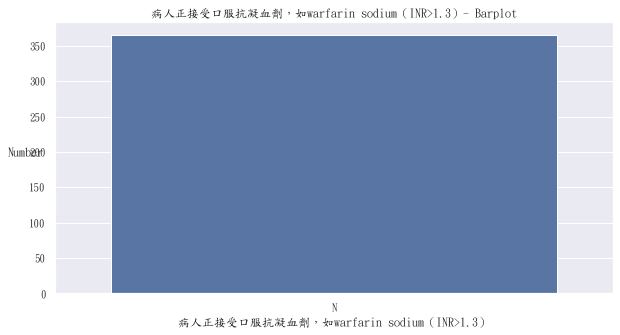

In [97]:
nivtpa7_fl = tsr_12.loc[:,"nivtpa7_fl"]
nivtpa7_fl[nivtpa7_fl == str(0)] = int(0)
nivtpa7_fl[nivtpa7_fl == str(1)] = int(1)
nivtpa7_fl[nivtpa7_fl == int(0)] = "N"
nivtpa7_fl[nivtpa7_fl == int(1)] = "Y"
#print(nivtpa7_fl)
print(nivtpa7_fl.value_counts() / len(nivtpa7_fl))
#print(nivtpa7_fl.describe())

sns.countplot(nivtpa7_fl)
plt.title("病人正接受口服抗凝血劑，如warfarin sodium（INR>1.3）- Barplot")
plt.xlabel('病人正接受口服抗凝血劑，如warfarin sodium（INR>1.3）')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa7_fl = nivtpa7_fl.fillna(999)

# 最近3個月內曾患胃腸道潰瘍

N    0.130139
Y    0.000715
Name: nivtpa8_fl, dtype: float64


<ipython-input-98-26839bf133cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa8_fl[nivtpa8_fl == str(0)] = int(0)
<ipython-input-98-26839bf133cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa8_fl[nivtpa8_fl == str(1)] = int(1)
<ipython-input-98-26839bf133cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa8_fl[nivtpa8_fl == int(0)] = "N"
<ipython-input-98-26839bf133cc>:5: SettingWithCopyWarning: 
A value is tr

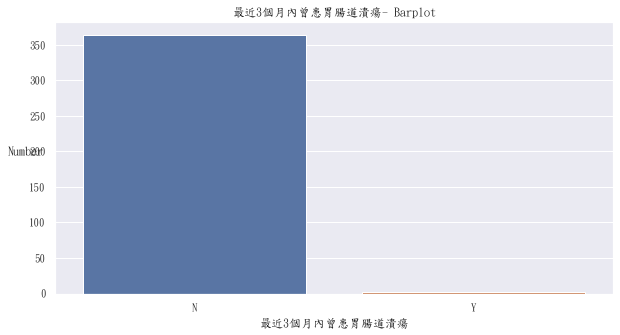

In [98]:
nivtpa8_fl = tsr_12.loc[:,"nivtpa8_fl"]
nivtpa8_fl[nivtpa8_fl == str(0)] = int(0)
nivtpa8_fl[nivtpa8_fl == str(1)] = int(1)
nivtpa8_fl[nivtpa8_fl == int(0)] = "N"
nivtpa8_fl[nivtpa8_fl == int(1)] = "Y"
#print(nivtpa8_fl)
print(nivtpa8_fl.value_counts() / len(nivtpa8_fl))
#print(nivtpa8_fl.describe())

sns.countplot(nivtpa8_fl)
plt.title("最近3個月內曾患胃腸道潰瘍- Barplot")
plt.xlabel('最近3個月內曾患胃腸道潰瘍')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa8_fl = nivtpa8_fl.fillna(999)

# 家屬拒絕

N    0.129782
Name: nivtpa9_fl, dtype: float64


<ipython-input-99-f9404f99df85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa9_fl[nivtpa9_fl == str(0)] = int(0)
<ipython-input-99-f9404f99df85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa9_fl[nivtpa9_fl == str(1)] = int(1)
<ipython-input-99-f9404f99df85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa9_fl[nivtpa9_fl == int(0)] = "N"
<ipython-input-99-f9404f99df85>:5: SettingWithCopyWarning: 
A value is tr

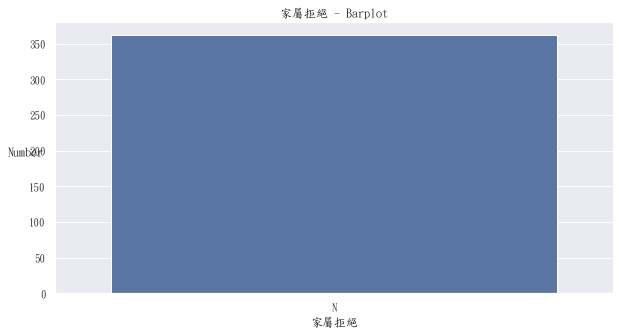

In [99]:
nivtpa9_fl = tsr_12.loc[:,"nivtpa9_fl"]
nivtpa9_fl[nivtpa9_fl == str(0)] = int(0)
nivtpa9_fl[nivtpa9_fl == str(1)] = int(1)
nivtpa9_fl[nivtpa9_fl == int(0)] = "N"
nivtpa9_fl[nivtpa9_fl == int(1)] = "Y"
#print(nivtpa9_fl)
print(nivtpa9_fl.value_counts() / len(nivtpa9_fl))
#print(nivtpa9_fl.describe())

sns.countplot(nivtpa9_fl)
plt.title("家屬拒絕 - Barplot")
plt.xlabel('家屬拒絕')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa9_fl = nivtpa9_fl.fillna(999)

# 輸注本藥前，缺血性腦中風發作的時間已超過3小時

N      0.125849
Y      0.003218
4.0    0.001430
3.0    0.000358
Name: nivtpa10_fl, dtype: float64


<ipython-input-100-9636e92537f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa10_fl[nivtpa10_fl == str(0)] = int(0)
<ipython-input-100-9636e92537f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa10_fl[nivtpa10_fl == str(1)] = int(1)
<ipython-input-100-9636e92537f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa10_fl[nivtpa10_fl == int(0)] = "N"
<ipython-input-100-9636e92537f3>:5: SettingWithCopyWarning: 
A v

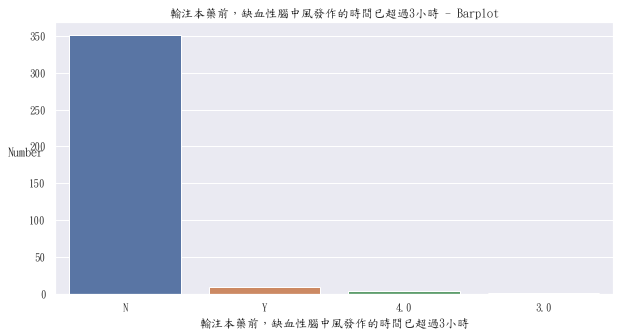

In [100]:
nivtpa10_fl = tsr_12.loc[:,"nivtpa10_fl"]
nivtpa10_fl[nivtpa10_fl == str(0)] = int(0)
nivtpa10_fl[nivtpa10_fl == str(1)] = int(1)
nivtpa10_fl[nivtpa10_fl == int(0)] = "N"
nivtpa10_fl[nivtpa10_fl == int(1)] = "Y"
#print(nivtpa10_fl)
print(nivtpa10_fl.value_counts() / len(nivtpa10_fl))
#print(nivtpa10_fl.describe())

sns.countplot(nivtpa10_fl)
plt.title("輸注本藥前，缺血性腦中風發作的時間已超過3小時 - Barplot")
plt.xlabel('輸注本藥前，缺血性腦中風發作的時間已超過3小時')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa10_fl = nivtpa10_fl.fillna(999)

# 收縮壓 > 185mmhg或舒張壓 > 110mmhg

N    0.128352
Name: nivtpa11_fl, dtype: float64


<ipython-input-101-f9195ab47859>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa11_fl[nivtpa11_fl == str(0)] = int(0)
<ipython-input-101-f9195ab47859>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa11_fl[nivtpa11_fl == str(1)] = int(1)
<ipython-input-101-f9195ab47859>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa11_fl[nivtpa11_fl == int(0)] = "N"
<ipython-input-101-f9195ab47859>:5: SettingWithCopyWarning: 
A v

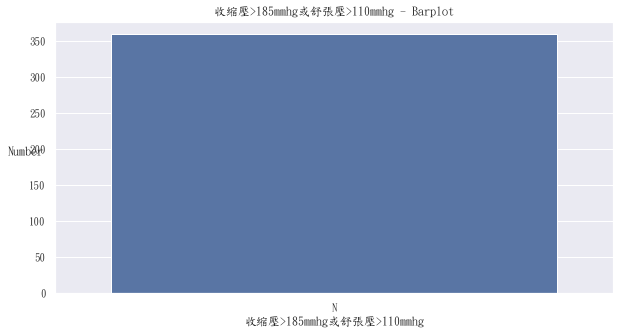

In [101]:
nivtpa11_fl = tsr_12.loc[:,"nivtpa11_fl"]
nivtpa11_fl[nivtpa11_fl == str(0)] = int(0)
nivtpa11_fl[nivtpa11_fl == str(1)] = int(1)
nivtpa11_fl[nivtpa11_fl == int(0)] = "N"
nivtpa11_fl[nivtpa11_fl == int(1)] = "Y"
nivtpa11_fl[(nivtpa11_fl != "N") & (nivtpa11_fl != "Y")] = np.nan
#print(nivtpa11_fl)
print(nivtpa11_fl.value_counts() / len(nivtpa11_fl))
#print(nivtpa11_fl.describe())

sns.countplot(nivtpa11_fl)
plt.title("收縮壓>185mmhg或舒張壓>110mmhg - Barplot")
plt.xlabel('收縮壓>185mmhg或舒張壓>110mmhg')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa11_fl = nivtpa11_fl.fillna(999)

# 不符合施打條件其他(未打IV-tPA 原因)

N    0.126564
Y    0.000358
Name: nivtpa99_fl, dtype: float64


<ipython-input-102-cba38d63915a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa99_fl[nivtpa99_fl == str(0)] = int(0)
<ipython-input-102-cba38d63915a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa99_fl[nivtpa99_fl == str(1)] = int(1)
<ipython-input-102-cba38d63915a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa99_fl[nivtpa99_fl == int(0)] = "N"
<ipython-input-102-cba38d63915a>:5: SettingWithCopyWarning: 
A v

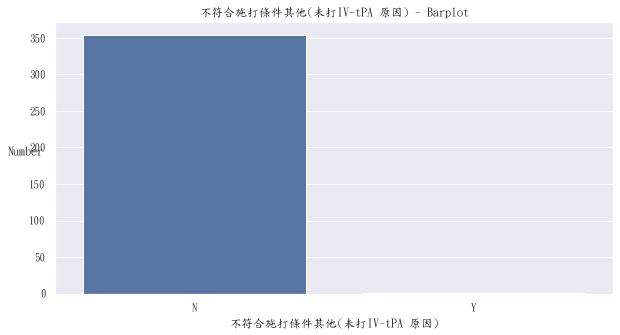

In [102]:
nivtpa99_fl = tsr_12.loc[:,"nivtpa99_fl"]
nivtpa99_fl[nivtpa99_fl == str(0)] = int(0)
nivtpa99_fl[nivtpa99_fl == str(1)] = int(1)
nivtpa99_fl[nivtpa99_fl == int(0)] = "N"
nivtpa99_fl[nivtpa99_fl == int(1)] = "Y"
nivtpa99_fl[(nivtpa99_fl != "N") & (nivtpa99_fl != "Y")] = np.nan
#print(nivtpa99_fl)
print(nivtpa99_fl.value_counts() / len(nivtpa99_fl))
#print(nivtpa99_fl.describe())

sns.countplot(nivtpa99_fl)
plt.title("不符合施打條件其他(未打IV-tPA 原因) - Barplot")
plt.xlabel('不符合施打條件其他(未打IV-tPA 原因)')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa99_fl = nivtpa99_fl.fillna(999)

# GCS-E (eye opening)

4.0    0.895602
3.0    0.046836
1.0    0.032535
2.0    0.025027
Name: gcse_nm, dtype: float64
count    2797.000000
mean        3.805506
std         0.634092
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: gcse_nm, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


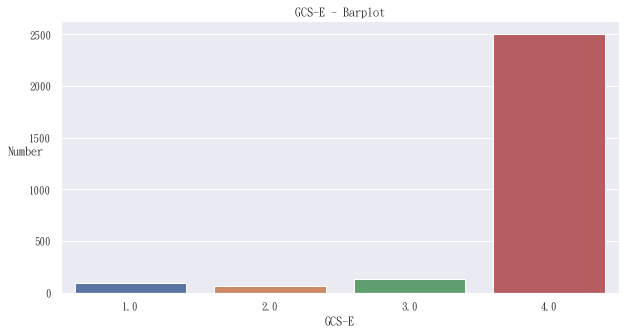

In [103]:
gcse_nm = tsr_12.loc[:,"gcse_nm"]
gcse_nm = pd.to_numeric(gcse_nm, errors = "coerce")
gcse_nm[(gcse_nm != 1) & (gcse_nm != 2) & (gcse_nm != 3) & (gcse_nm != 4)]  = np.nan
gcse_nm = gcse_nm.fillna(gcse_nm.mode()[0])
#print(gcse_nm)
print(gcse_nm.value_counts() / len(gcse_nm))
print(gcse_nm.describe())

sns.countplot(gcse_nm)
plt.title("GCS-E - Barplot")
plt.xlabel('GCS-E')
plt.ylabel('Number', rotation=0)
plt.show()

# GCS-V (verbal response)

5.0    0.838398
1.0    0.060779
2.0    0.040043
4.0    0.038613
3.0    0.022167
Name: gcsv_nm, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


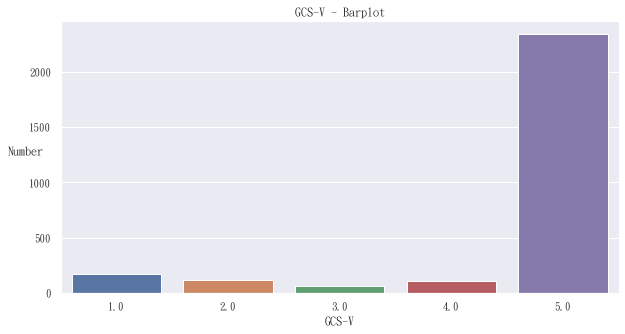

In [104]:
gcsv_nm = tsr_12.loc[:,"gcsv_nm"]
gcsv_nm = pd.to_numeric(gcsv_nm, errors = "coerce")
gcsv_nm[(gcsv_nm != 1) & (gcsv_nm != 2) & (gcsv_nm != 3) & (gcsv_nm != 4) & (gcsv_nm != 5)]  = np.nan
gcsv_nm = gcsv_nm.fillna(gcsv_nm.mode()[0])
#print(gcsv_nm)
print(gcsv_nm.value_counts() / len(gcsv_nm))
#print(gcsv_nm.describe())

sns.countplot(gcsv_nm)
plt.title("GCS-V - Barplot")
plt.xlabel('GCS-V')
plt.ylabel('Number', rotation=0)
plt.show()

# GCS-M (motor response)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


6.0    0.838041
5.0    0.090097
4.0    0.036110
1.0    0.015374
3.0    0.014301
2.0    0.006078
Name: gcsm_nm, dtype: float64


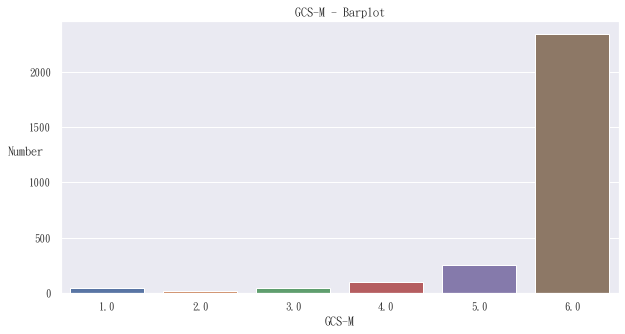

In [105]:
gcsm_nm = tsr_12.loc[:,"gcsm_nm"]
gcsm_nm = pd.to_numeric(gcsm_nm, errors = "coerce")
gcsm_nm[(gcsm_nm != 1) & (gcsm_nm != 2) & (gcsm_nm != 3) & (gcsm_nm != 4) & (gcsm_nm != 5)& (gcsm_nm != 6)]  = np.nan
gcsm_nm = gcsm_nm.fillna(gcsm_nm.mode()[0])
#print(gscmnm)
print(gcsm_nm.value_counts() / len(gcsm_nm))
#print(gscmnm.describe())

sns.countplot(gcsm_nm)
plt.title("GCS-M - Barplot")
plt.xlabel('GCS-M')
plt.ylabel('Number', rotation=0)
plt.show()

# SBP

<ipython-input-106-a988b2d95b9b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbp_nm[(sbp_nm < inner_fence_low) | (sbp_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean      162.978561
std        31.634626
min        79.000000
25%       142.000000
50%       161.000000
75%       184.000000
max       251.000000
Name: sbp_nm, dtype: float64


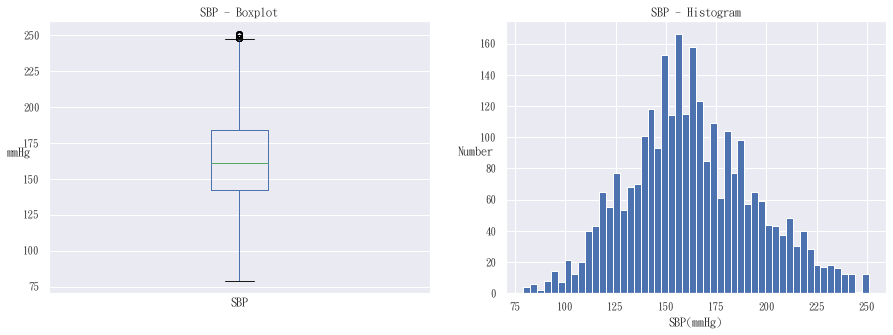

In [106]:
sbp_nm = tsr_12.loc[:,"sbp_nm"]

q1 = sbp_nm.quantile(0.25)
q3 = sbp_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
sbp_nm[(sbp_nm < inner_fence_low) | (sbp_nm > inner_fence_upp)] = np.nan

sbp_nm =sbp_nm.fillna(round(sbp_nm.mean(),3))

#print(sbp_nm)
#print(sbp_nm.value_counts() / len(sbp_nm))
print(sbp_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sbp_nm.plot.box(ax = ax1)
ax1.set_title("SBP - Boxplot")
ax1.set_xlabel('SBP')
ax1.set_ylabel('mmHg', rotation=0)
ax1.set_xticks([])

sbp_nm.plot.hist(ax = ax2, bins=50)
ax2.set_title("SBP - Histogram")
ax2.set_xlabel('SBP(mmHg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# DBP

<ipython-input-107-3865cc1db916>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbp_nm[(dbp_nm < inner_fence_low) | (dbp_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean       89.810408
std        17.484387
min        40.000000
25%        78.000000
50%        89.000000
75%       101.000000
max       139.000000
Name: dbp_nm, dtype: float64


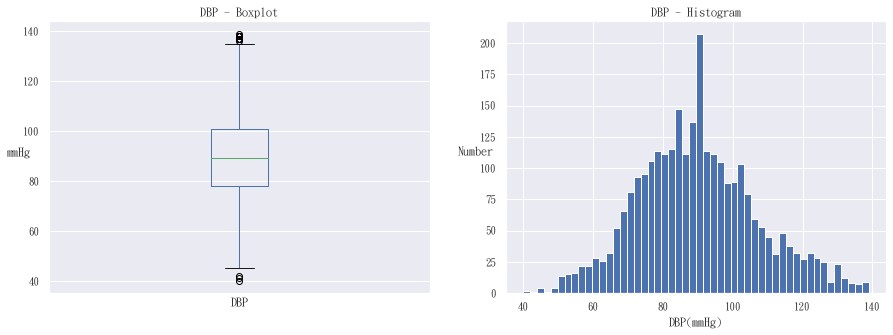

In [107]:
dbp_nm = tsr_12.loc[:,"dbp_nm"]

q1 = dbp_nm.quantile(0.25)
q3 = dbp_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
dbp_nm[(dbp_nm < inner_fence_low) | (dbp_nm > inner_fence_upp)] = np.nan

dbp_nm =dbp_nm.fillna(round(dbp_nm.mean(),3))

#print(dbp_nm)
#print(dbp_nm.value_counts() / len(dbp_nm))
print(dbp_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

dbp_nm.plot.box(ax = ax1)
ax1.set_title("DBP - Boxplot")
ax1.set_xlabel('DBP')
ax1.set_ylabel('mmHg', rotation=0)
ax1.set_xticks([])

dbp_nm.plot.hist(ax = ax2, bins=50)
ax2.set_title("DBP - Histogram")
ax2.set_xlabel('DBP(mmHg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# BT (bleeding time)

<ipython-input-108-79fbe4d93d7f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_nm[(bt_nm < inner_fence_low) | (bt_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean       36.380932
std         0.576340
min        34.900000
25%        36.000000
50%        36.400000
75%        36.800000
max        37.900000
Name: bt_nm, dtype: float64


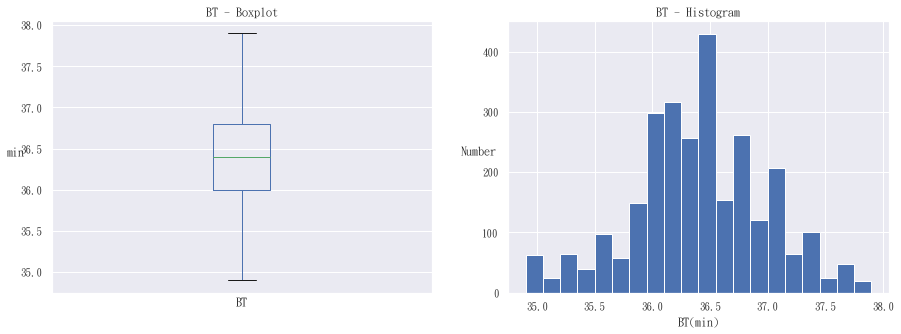

In [108]:
bt_nm = tsr_12.loc[:,"bt_nm"]

q1 = bt_nm.quantile(0.25)
q3 = bt_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
bt_nm[(bt_nm < inner_fence_low) | (bt_nm > inner_fence_upp)] = np.nan

bt_nm =bt_nm.fillna(round(bt_nm.mean(),3))

#print(bt_nm)
#print(bt_nm.value_counts() / len(bt_nm))
print(bt_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bt_nm.plot.box(ax = ax1)
ax1.set_title("BT - Boxplot")
ax1.set_xlabel('BT')
ax1.set_ylabel('min', rotation=0)
ax1.set_xticks([])

bt_nm.plot.hist(ax = ax2, bins=20)
ax2.set_title("BT - Histogram")
ax2.set_xlabel('BT(min)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Heart Rate

<ipython-input-109-cf03cb7de813>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_nm[(hr_nm < inner_fence_low) | (hr_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean       81.212537
std        15.170730
min        40.000000
25%        70.000000
50%        81.000000
75%        91.000000
max       125.000000
Name: hr_nm, dtype: float64


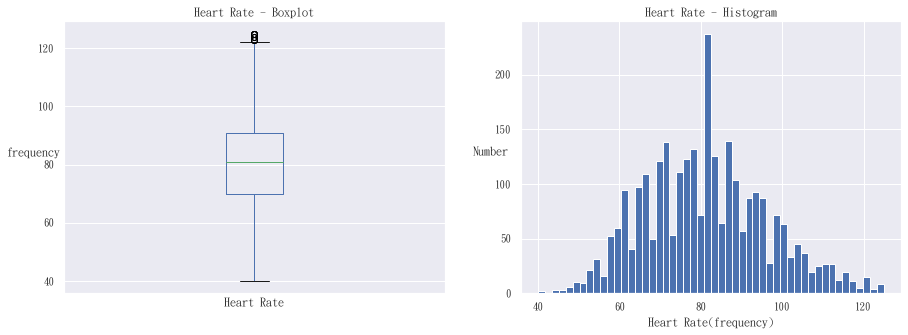

In [109]:
hr_nm = tsr_12.loc[:,"hr_nm"]

q1 = hr_nm.quantile(0.25)
q3 = hr_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hr_nm[(hr_nm < inner_fence_low) | (hr_nm > inner_fence_upp)] = np.nan

hr_nm = hr_nm.fillna(round(hr_nm.mean(),3))

#print(hr_nm)
#print(hr_nm.value_counts() / len(hr_nm))
print(hr_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hr_nm.plot.box(ax = ax1)
ax1.set_title("Heart Rate - Boxplot")
ax1.set_xlabel('Heart Rate')
ax1.set_ylabel('frequency', rotation=0)
ax1.set_xticks([])

hr_nm.plot.hist(ax = ax2, bins=50)
ax2.set_title("Heart Rate - Histogram")
ax2.set_xlabel('Heart Rate(frequency)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Respiratory Rate

<ipython-input-110-1535559a54e2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr_nm[(rr_nm < inner_fence_low) | (rr_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean       19.574535
std         1.321732
min        15.000000
25%        19.000000
50%        20.000000
75%        20.000000
max        23.000000
Name: rr_nm, dtype: float64


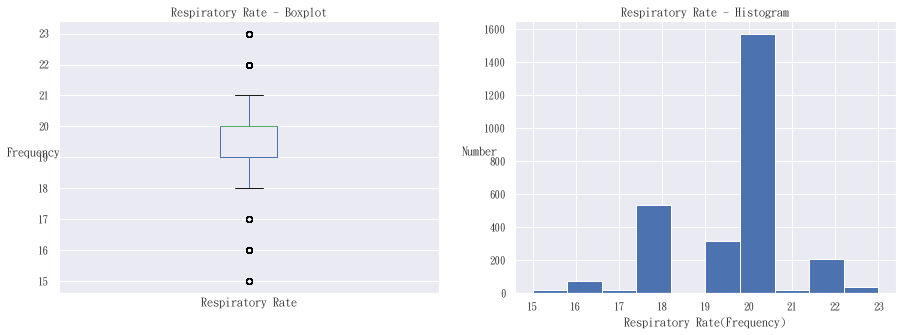

In [110]:
rr_nm = tsr_12.loc[:,"rr_nm"]

q1 = rr_nm.quantile(0.25)
q3 = rr_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
rr_nm[(rr_nm < inner_fence_low) | (rr_nm > inner_fence_upp)] = np.nan

rr_nm = rr_nm.fillna(round(rr_nm.mean(),3))

#print(rr_nm)
#print(rr_nm.value_counts() / len(rr_nm))
print(rr_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

rr_nm.plot.box(ax = ax1)
ax1.set_title("Respiratory Rate - Boxplot")
ax1.set_xlabel('Respiratory Rate')
ax1.set_ylabel('Frequency', rotation=0)
ax1.set_xticks([])

rr_nm.plot.hist(ax = ax2)
ax2.set_title("Respiratory Rate - Histogram")
ax2.set_xlabel('Respiratory Rate(Frequency)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Final Stroke Diagnosis

1.0     0.698248
3.0     0.160172
2.0     0.104755
4.0     0.033965
99.0    0.002860
Name: icd_id, dtype: float64


<ipython-input-111-fa2fcc799110>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icd_id[(icd_id != 1) & (icd_id != 2) & (icd_id != 3) & (icd_id != 4) & (icd_id != 99)]  = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


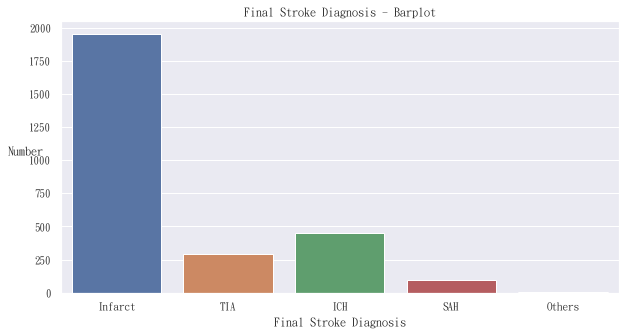

In [111]:
icd_id = tsr_12.loc[:,"icd_id"]
icd_id[(icd_id != 1) & (icd_id != 2) & (icd_id != 3) & (icd_id != 4) & (icd_id != 99)]  = np.nan
icd_id = icd_id.fillna(icd_id.mode()[0])
#print(icd_id)
print(icd_id.value_counts() / len(icd_id))
#print(icd_id.describe())

icd_id_labels = ["Infarct","TIA", "ICH", "SAH", "Others"]
sns.countplot(icd_id).set_xticklabels(icd_id_labels)
plt.title("Final Stroke Diagnosis - Barplot")
plt.xlabel('Final Stroke Diagnosis')
plt.ylabel('Number', rotation=0)
plt.show()

# Final Stroke Diagnosis (TIA Subtypes)

1.0    0.950661
2.0    0.049339
Name: icdtia_id, dtype: float64


<ipython-input-112-bac59785beb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icdtia_id[(icdtia_id != 1) & (icdtia_id != 2)]  = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


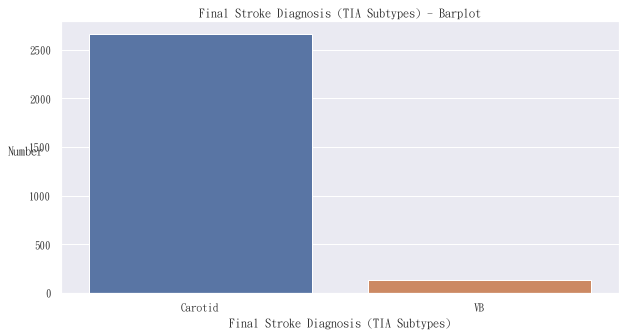

In [112]:
icdtia_id = tsr_12.loc[:,"icdtia_id"]
icdtia_id[(icdtia_id != 1) & (icdtia_id != 2)]  = np.nan
icdtia_id = icdtia_id.fillna(icdtia_id.mode()[0])
#print(icdtia_id)
print(icdtia_id.value_counts() / len(icdtia_id))
#print(icdtia_id.describe())

icdtia_id_labels = ["Carotid","VB"]
sns.countplot(icdtia_id).set_xticklabels(icdtia_id_labels)
plt.title("Final Stroke Diagnosis (TIA Subtypes) - Barplot")
plt.xlabel('Final Stroke Diagnosis (TIA Subtypes)')
plt.ylabel('Number', rotation=0)
plt.show()

In [113]:
#ICDO_TX

# Ischemic Subtype(TOAST 分類)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.0    0.273865
1.0    0.236682
5.0    0.102967
4.0    0.058634
3.0    0.005005
Name: toast_id, dtype: float64


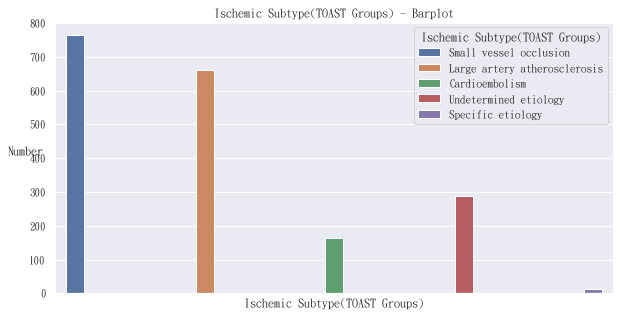

In [114]:
toast_id = tsr_12.loc[:,"toast_id"]
toast_id = pd.to_numeric(toast_id, errors = "coerce")
toast_id[(toast_id != 1) & (toast_id != 2) & (toast_id != 3) & (toast_id != 4) & (toast_id != 5)]  = np.nan
#print(toast_id)
print(toast_id.value_counts() / len(toast_id))
#print(toast_id.describe())

toast_id[toast_id == 1] = "Large artery atherosclerosis"
toast_id[toast_id == 2] = "Small vessel occlusion"
toast_id[toast_id == 3] = "Specific etiology"
toast_id[toast_id == 4] = "Cardioembolism"
toast_id[toast_id == 5] = "Undetermined etiology"

sns.countplot(toast_id, hue = toast_id)
plt.title("Ischemic Subtype(TOAST Groups) - Barplot")
plt.xlabel('Ischemic Subtype(TOAST Groups)')
plt.ylabel('Number', rotation=0)
plt.xticks([])
plt.legend(loc = 1, title="Ischemic Subtype(TOAST Groups)")
plt.show()

toast_id[toast_id == "Large artery atherosclerosis"] = 1
toast_id[toast_id == "Small vessel occlusion"] = 2
toast_id[toast_id == "Specific etiology"] = 3
toast_id[toast_id == "Cardioembolism"] = 4
toast_id[toast_id == "Undetermined etiology"] = 5
toast_id = toast_id.fillna(999)

# Large Artery Atherosclerosis (Extra)

N    0.929567
Y    0.070433
Name: toastle_fl, dtype: float64


<ipython-input-115-ec05e604b380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastle_fl[toastle_fl == str(0)] = int(0)
<ipython-input-115-ec05e604b380>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastle_fl[toastle_fl == str(1)] = int(1)
<ipython-input-115-ec05e604b380>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastle_fl[toastle_fl == int(0)] = "N"
<ipython-input-115-ec05e604b380>:5: SettingWithCopyWarning: 
A value i

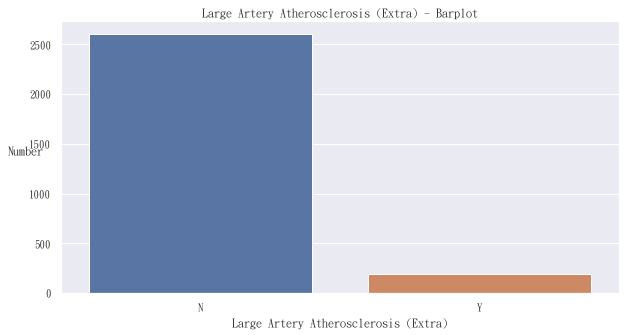

In [115]:
toastle_fl = tsr_12.loc[:,"toastle_fl"]
toastle_fl[toastle_fl == str(0)] = int(0)
toastle_fl[toastle_fl == str(1)] = int(1)
toastle_fl[toastle_fl == int(0)] = "N"
toastle_fl[toastle_fl == int(1)] = "Y"
toastle_fl = toastle_fl.fillna(toastle_fl.mode()[0])
#print(toastle_fl)
print(toastle_fl.value_counts() / len(toastle_fl))
#print(toastle_fl.describe())

sns.countplot(toastle_fl)
plt.title("Large Artery Atherosclerosis (Extra) - Barplot")
plt.xlabel('Large Artery Atherosclerosis (Extra)')
plt.ylabel('Number', rotation=0)
plt.show()

# Large Artery Atherosclerosis (Intra)

N    0.831605
Y    0.168395
Name: toastli_fl, dtype: float64


<ipython-input-116-94d7dba0ad78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastli_fl[toastli_fl == str(0)] = int(0)
<ipython-input-116-94d7dba0ad78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastli_fl[toastli_fl == str(1)] = int(1)
<ipython-input-116-94d7dba0ad78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastli_fl[toastli_fl == int(0)] = "N"
<ipython-input-116-94d7dba0ad78>:5: SettingWithCopyWarning: 
A value i

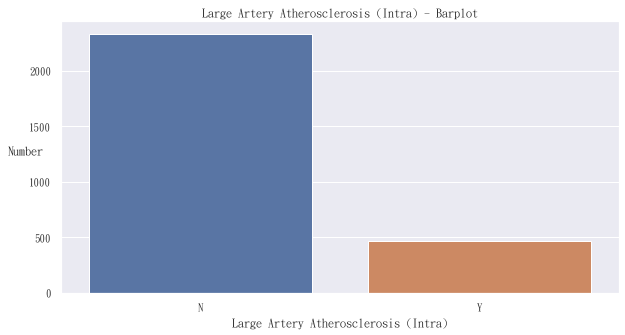

In [116]:
toastli_fl = tsr_12.loc[:,"toastli_fl"]
toastli_fl[toastli_fl == str(0)] = int(0)
toastli_fl[toastli_fl == str(1)] = int(1)
toastli_fl[toastli_fl == int(0)] = "N"
toastli_fl[toastli_fl == int(1)] = "Y"
toastli_fl = toastli_fl.fillna(toastli_fl.mode()[0])
#print(toastli_fl)
print(toastli_fl.value_counts() / len(toastli_fl))
#print(toastli_fl.describe())

sns.countplot(toastli_fl)
plt.title("Large Artery Atherosclerosis (Intra) - Barplot")
plt.xlabel('Large Artery Atherosclerosis (Intra)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Cerebral Venous Thrombosis)

<ipython-input-117-3d9e9572ae13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsce_fl[toastsce_fl == str(0)] = int(0)
<ipython-input-117-3d9e9572ae13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsce_fl[toastsce_fl == str(1)] = int(1)
<ipython-input-117-3d9e9572ae13>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsce_fl[toastsce_fl == int(0)] = "N"
<ipython-input-117-3d9e9572ae13>:5: SettingWithCopyWarning: 
A v

N    0.996782
Y    0.003218
Name: toastsce_fl, dtype: float64


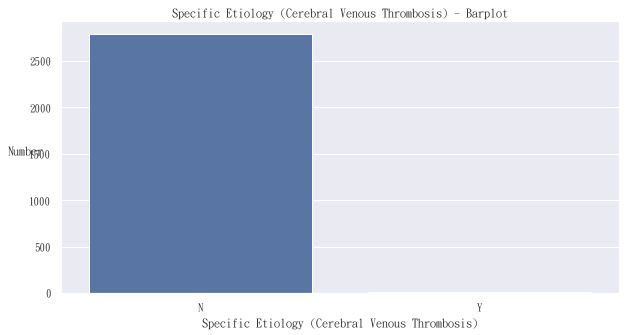

In [117]:
toastsce_fl = tsr_12.loc[:,"toastsce_fl"]
toastsce_fl[toastsce_fl == str(0)] = int(0)
toastsce_fl[toastsce_fl == str(1)] = int(1)
toastsce_fl[toastsce_fl == int(0)] = "N"
toastsce_fl[toastsce_fl == int(1)] = "Y"
toastsce_fl = toastsce_fl.fillna(toastsce_fl.mode()[0])
#print(toastsce_fl)
print(toastsce_fl.value_counts() / len(toastsce_fl))
#print(toastsce_fl.describe())

sns.countplot(toastsce_fl)
plt.title("Specific Etiology (Cerebral Venous Thrombosis) - Barplot")
plt.xlabel('Specific Etiology (Cerebral Venous Thrombosis)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Moyamoya Syndrome)

N    0.93779
Y    0.06221
Name: toastsmo_fl, dtype: float64


<ipython-input-118-27d963239405>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmo_fl[toastsmo_fl == str(0)] = int(0)
<ipython-input-118-27d963239405>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmo_fl[toastsmo_fl == str(1)] = int(1)
<ipython-input-118-27d963239405>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmo_fl[toastsmo_fl == int(0)] = "N"
<ipython-input-118-27d963239405>:5: SettingWithCopyWarning: 
A v

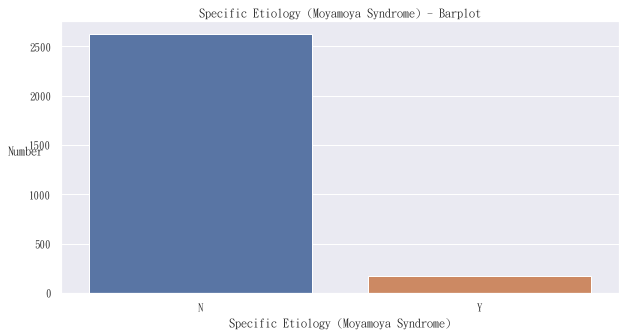

In [118]:
toastsmo_fl = tsr_12.loc[:,"toastsmo_fl"]
toastsmo_fl[toastsmo_fl == str(0)] = int(0)
toastsmo_fl[toastsmo_fl == str(1)] = int(1)
toastsmo_fl[toastsmo_fl == int(0)] = "N"
toastsmo_fl[toastsmo_fl == int(1)] = "Y"
toastsmo_fl = toastsmo_fl.fillna(toastsmo_fl.mode()[0])
#print(toastsmo_fl)
print(toastsmo_fl.value_counts() / len(toastsmo_fl))
#print(toastsmo_fl.describe())

sns.countplot(toastsmo_fl)
plt.title("Specific Etiology (Moyamoya Syndrome) - Barplot")
plt.xlabel('Specific Etiology (Moyamoya Syndrome)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Radiation)

<ipython-input-119-635e3ddb48ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsra_fl[toastsra_fl == str(0)] = int(0)
<ipython-input-119-635e3ddb48ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsra_fl[toastsra_fl == str(1)] = int(1)
<ipython-input-119-635e3ddb48ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsra_fl[toastsra_fl == int(0)] = "N"
<ipython-input-119-635e3ddb48ec>:5: SettingWithCopyWarning: 
A v

N    0.857347
Y    0.142653
Name: toastsra_fl, dtype: float64


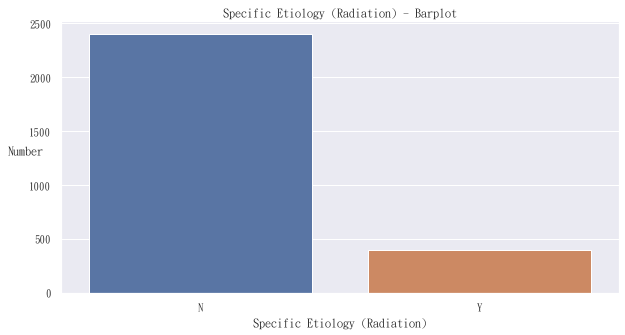

In [119]:
toastsra_fl = tsr_12.loc[:,"toastsra_fl"]
toastsra_fl[toastsra_fl == str(0)] = int(0)
toastsra_fl[toastsra_fl == str(1)] = int(1)
toastsra_fl[toastsra_fl == int(0)] = "N"
toastsra_fl[toastsra_fl == int(1)] = "Y"
toastsra_fl = toastsra_fl.fillna(toastsra_fl.mode()[0])
#print(toastsra_fl)
print(toastsra_fl.value_counts() / len(toastsra_fl))
#print(toastsra_fl.describe())

sns.countplot(toastsra_fl)
plt.title("Specific Etiology (Radiation) - Barplot")
plt.xlabel('Specific Etiology (Radiation)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Dissection)

N    0.99857
Y    0.00143
Name: toastsdi_fl, dtype: float64


<ipython-input-120-bee103480db3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsdi_fl[toastsdi_fl == str(0)] = int(0)
<ipython-input-120-bee103480db3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsdi_fl[toastsdi_fl == str(1)] = int(1)
<ipython-input-120-bee103480db3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsdi_fl[toastsdi_fl == int(0)] = "N"
<ipython-input-120-bee103480db3>:5: SettingWithCopyWarning: 
A v

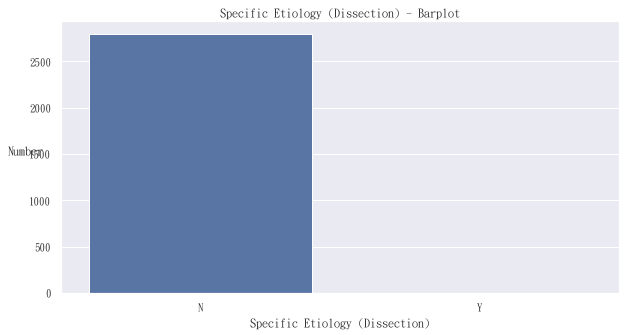

In [120]:
toastsdi_fl = tsr_12.loc[:,"toastsdi_fl"]
toastsdi_fl[toastsdi_fl == str(0)] = int(0)
toastsdi_fl[toastsdi_fl == str(1)] = int(1)
toastsdi_fl[toastsdi_fl == int(0)] = "N"
toastsdi_fl[toastsdi_fl == int(1)] = "Y"
toastsdi_fl = toastsdi_fl.fillna(toastsdi_fl.mode()[0])
#print(toastsdi_fl)
print(toastsdi_fl.value_counts() / len(toastsdi_fl))
#print(toastsdi_fl.describe())

sns.countplot(toastsdi_fl)
plt.title("Specific Etiology (Dissection) - Barplot")
plt.xlabel('Specific Etiology (Dissection)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Migraine)

N    0.999285
Y    0.000715
Name: toastsmi_fl, dtype: float64


<ipython-input-121-6393446f329b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmi_fl[toastsmi_fl == str(0)] = int(0)
<ipython-input-121-6393446f329b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmi_fl[toastsmi_fl == int(0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


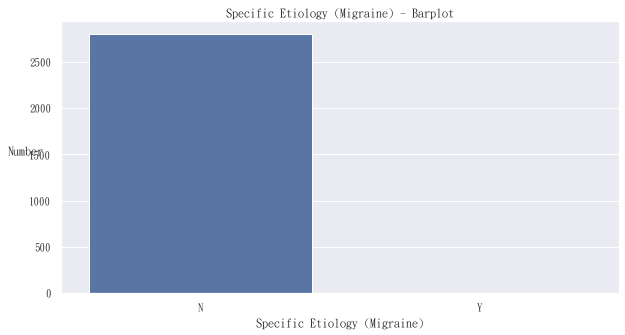

In [121]:
toastsmi_fl = tsr_12.loc[:,"toastsmi_fl"]
toastsmi_fl[toastsmi_fl == str(0)] = int(0)
toastsmi_fl[toastsmi_fl == int(0)] = "N"
toastsmi_fl = toastsmi_fl.fillna("Y")
#print(toastsmi_fl)
print(toastsmi_fl.value_counts() / len(toastsmi_fl))
#print(toastsmi_fl.describe())

sns.countplot(toastsmi_fl)
plt.title("Specific Etiology (Migraine) - Barplot")
plt.xlabel('Specific Etiology (Migraine)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Antiphospholipid Ab Synd)

N    1.0
Name: toastsantip_fl, dtype: float64


<ipython-input-122-1f8ebf7554e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantip_fl[toastsantip_fl == str(0)] = int(0)
<ipython-input-122-1f8ebf7554e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantip_fl[toastsantip_fl == str(1)] = int(1)
<ipython-input-122-1f8ebf7554e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantip_fl[toastsantip_fl == int(0)] = "N"
<ipython-input-122-1f8ebf7554e7>:5: SettingWit

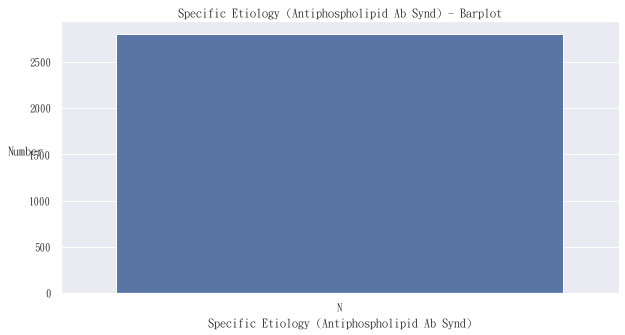

In [122]:
toastsantip_fl = tsr_12.loc[:,"toastsantip_fl"]
toastsantip_fl[toastsantip_fl == str(0)] = int(0)
toastsantip_fl[toastsantip_fl == str(1)] = int(1)
toastsantip_fl[toastsantip_fl == int(0)] = "N"
toastsantip_fl[toastsantip_fl == int(1)] = "Y"
toastsantip_fl = toastsantip_fl.fillna(toastsantip_fl.mode()[0])
#print(toastsantip_fl)
print(toastsantip_fl.value_counts() / len(toastsantip_fl))
#print(toastsantip_fl.describe())

sns.countplot(toastsantip_fl)
plt.title("Specific Etiology (Antiphospholipid Ab Synd) - Barplot")
plt.xlabel('Specific Etiology (Antiphospholipid Ab Synd)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Autoimmune Disease)

N    1.0
Name: toastsau_fl, dtype: float64


<ipython-input-123-eda5071838a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsau_fl[toastsau_fl == str(0)] = int(0)
<ipython-input-123-eda5071838a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsau_fl[toastsau_fl == str(1)] = int(1)
<ipython-input-123-eda5071838a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsau_fl[toastsau_fl == int(0)] = "N"
<ipython-input-123-eda5071838a4>:5: SettingWithCopyWarning: 
A v

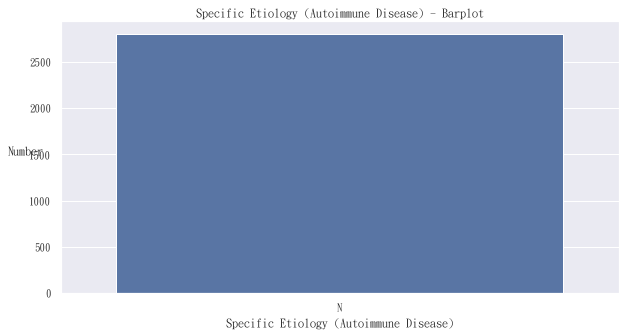

In [123]:
toastsau_fl = tsr_12.loc[:,"toastsau_fl"]
toastsau_fl[toastsau_fl == str(0)] = int(0)
toastsau_fl[toastsau_fl == str(1)] = int(1)
toastsau_fl[toastsau_fl == int(0)] = "N"
toastsau_fl[toastsau_fl == int(1)] = "Y"
toastsau_fl = toastsau_fl.fillna(toastsau_fl.mode()[0])
#print(toastsau_fl)
print(toastsau_fl.value_counts() / len(toastsau_fl))
#print(toastsau_fl.describe())

sns.countplot(toastsau_fl)
plt.title("Specific Etiology (Autoimmune Disease) - Barplot")
plt.xlabel('Specific Etiology (Autoimmune Disease)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Hyperfibrinogenemia)

N    0.999285
Y    0.000715
Name: toastshy_fl, dtype: float64


<ipython-input-124-02502207a8cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshy_fl[toastshy_fl == str(0)] = int(0)
<ipython-input-124-02502207a8cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshy_fl[toastshy_fl == int(0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


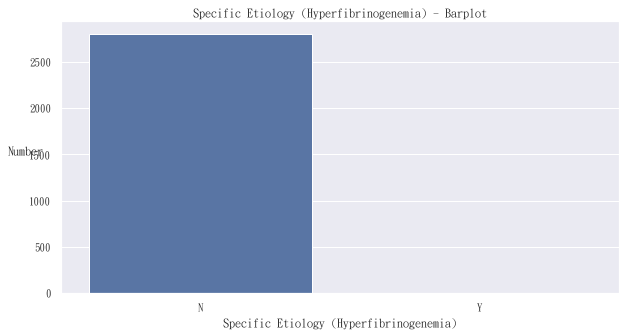

In [124]:
toastshy_fl = tsr_12.loc[:,"toastshy_fl"]
toastshy_fl[toastshy_fl == str(0)] = int(0)
toastshy_fl[toastshy_fl == int(0)] = "N"
toastshy_fl = toastshy_fl.fillna("Y")
#print(toastshy_fl)
print(toastshy_fl.value_counts() / len(toastshy_fl))
#print(toastshy_fl.describe())

sns.countplot(toastshy_fl)
plt.title("Specific Etiology (Hyperfibrinogenemia) - Barplot")
plt.xlabel('Specific Etiology (Hyperfibrinogenemia)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Prot C/Prot S Deficiency)

N    0.999642
Y    0.000358
Name: toastspr_fl, dtype: float64


<ipython-input-125-1f0750c8bb94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastspr_fl[toastspr_fl == str(0)] = int(0)
<ipython-input-125-1f0750c8bb94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastspr_fl[toastspr_fl == str(1)] = int(1)
<ipython-input-125-1f0750c8bb94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastspr_fl[toastspr_fl == int(0)] = "N"
<ipython-input-125-1f0750c8bb94>:5: SettingWithCopyWarning: 
A v

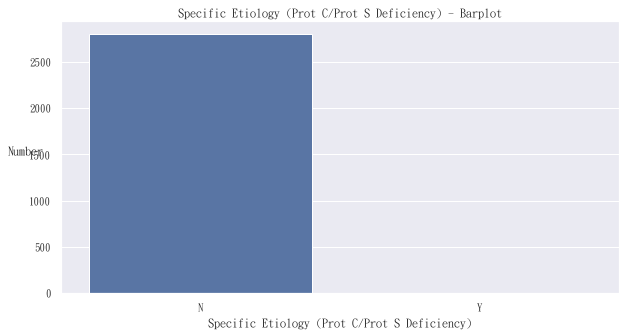

In [125]:
toastspr_fl = tsr_12.loc[:,"toastspr_fl"]
toastspr_fl[toastspr_fl == str(0)] = int(0)
toastspr_fl[toastspr_fl == str(1)] = int(1)
toastspr_fl[toastspr_fl == int(0)] = "N"
toastspr_fl[toastspr_fl == int(1)] = "Y"
toastspr_fl = toastspr_fl.fillna(toastspr_fl.mode()[0])
#print(toastspr_fl)
print(toastspr_fl.value_counts() / len(toastspr_fl))
#print(toastspr_fl.describe())

sns.countplot(toastspr_fl)
plt.title("Specific Etiology (Prot C/Prot S Deficiency) - Barplot")
plt.xlabel('Specific Etiology (Prot C/Prot S Deficiency)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Antithrombin III Deficiency)

N    1.0
Name: toastsantit_fl, dtype: float64


<ipython-input-126-a97fb5d88d41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantit_fl[toastsantit_fl == str(0)] = int(0)
<ipython-input-126-a97fb5d88d41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantit_fl[toastsantit_fl == str(1)] = int(1)
<ipython-input-126-a97fb5d88d41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantit_fl[toastsantit_fl == int(0)] = "N"
<ipython-input-126-a97fb5d88d41>:5: SettingWit

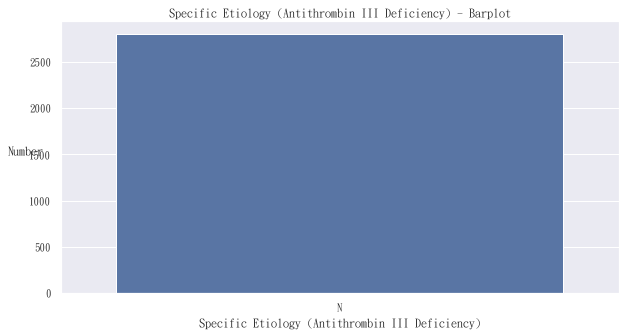

In [126]:
toastsantit_fl = tsr_12.loc[:,"toastsantit_fl"]
toastsantit_fl[toastsantit_fl == str(0)] = int(0)
toastsantit_fl[toastsantit_fl == str(1)] = int(1)
toastsantit_fl[toastsantit_fl == int(0)] = "N"
toastsantit_fl[toastsantit_fl == int(1)] = "Y"
toastsantit_fl = toastsantit_fl.fillna(toastsantit_fl.mode()[0])
#print(toastsantit_fl)
print(toastsantit_fl.value_counts() / len(toastsantit_fl))
#print(toastsantit_fl.describe())

sns.countplot(toastsantit_fl)
plt.title("Specific Etiology (Antithrombin III Deficiency) - Barplot")
plt.xlabel('Specific Etiology (Antithrombin III Deficiency)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Homocystinuria)

N    1.0
Name: toastsho_fl, dtype: float64


<ipython-input-127-84ff5cffec3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsho_fl[toastsho_fl == str(0)] = int(0)
<ipython-input-127-84ff5cffec3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsho_fl[toastsho_fl == str(1)] = int(1)
<ipython-input-127-84ff5cffec3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsho_fl[toastsho_fl == int(0)] = "N"
<ipython-input-127-84ff5cffec3a>:5: SettingWithCopyWarning: 
A v

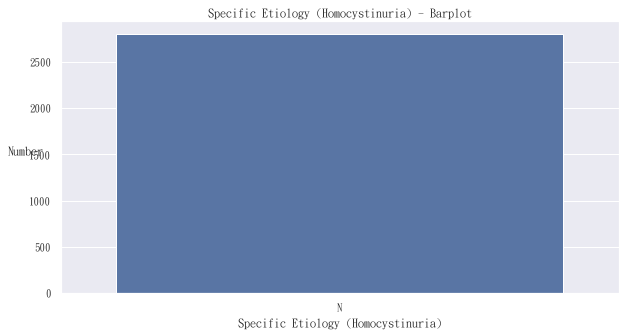

In [127]:
toastsho_fl = tsr_12.loc[:,"toastsho_fl"]
toastsho_fl[toastsho_fl == str(0)] = int(0)
toastsho_fl[toastsho_fl == str(1)] = int(1)
toastsho_fl[toastsho_fl == int(0)] = "N"
toastsho_fl[toastsho_fl == int(1)] = "Y"
toastsho_fl = toastsho_fl.fillna(toastsho_fl.mode()[0])
#print(toastsho_fl)
print(toastsho_fl.value_counts() / len(toastsho_fl))
#print(toastsho_fl.describe())

sns.countplot(toastsho_fl)
plt.title("Specific Etiology (Homocystinuria) - Barplot")
plt.xlabel('Specific Etiology (Homocystinuria)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Hypercoagulable State)

N    1.0
Name: toastshys_fl, dtype: float64


<ipython-input-128-d5311828bb15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshys_fl[toastshys_fl == str(0)] = int(0)
<ipython-input-128-d5311828bb15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshys_fl[toastshys_fl == str(1)] = int(1)
<ipython-input-128-d5311828bb15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshys_fl[toastshys_fl == int(0)] = "N"
<ipython-input-128-d5311828bb15>:5: SettingWithCopyWarning

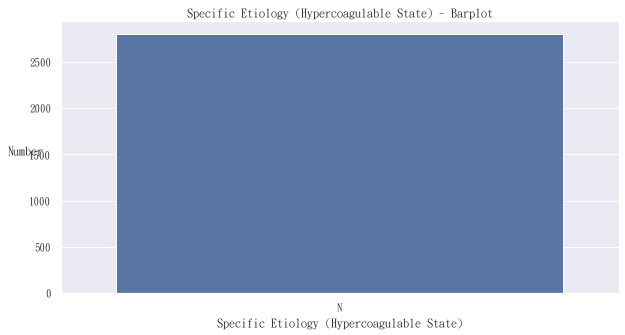

In [128]:
toastshys_fl = tsr_12.loc[:,"toastshys_fl"]
toastshys_fl[toastshys_fl == str(0)] = int(0)
toastshys_fl[toastshys_fl == str(1)] = int(1)
toastshys_fl[toastshys_fl == int(0)] = "N"
toastshys_fl[toastshys_fl == int(1)] = "Y"
toastshys_fl = toastshys_fl.fillna(toastshys_fl.mode()[0])
#print(toastshys_fl)
print(toastshys_fl.value_counts() / len(toastshys_fl))
#print(toastshys_fl.describe())

sns.countplot(toastshys_fl)
plt.title("Specific Etiology (Hypercoagulable State) - Barplot")
plt.xlabel('Specific Etiology (Hypercoagulable State)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Cancer)

N    0.999642
Y    0.000358
Name: toastsca_fl, dtype: float64


<ipython-input-129-b00ec711b316>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsca_fl[toastsca_fl == str(0)] = int(0)
<ipython-input-129-b00ec711b316>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsca_fl[toastsca_fl == str(1)] = int(1)
<ipython-input-129-b00ec711b316>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsca_fl[toastsca_fl == int(0)] = "N"
<ipython-input-129-b00ec711b316>:5: SettingWithCopyWarning: 
A v

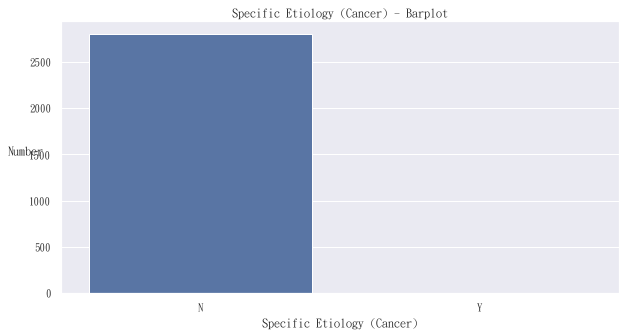

In [129]:
toastsca_fl = tsr_12.loc[:,"toastsca_fl"]
toastsca_fl[toastsca_fl == str(0)] = int(0)
toastsca_fl[toastsca_fl == str(1)] = int(1)
toastsca_fl[toastsca_fl == int(0)] = "N"
toastsca_fl[toastsca_fl == int(1)] = "Y"
toastsca_fl = toastsca_fl.fillna(toastsca_fl.mode()[0])
#print(toastsca_fl)
print(toastsca_fl.value_counts() / len(toastsca_fl))
#print(toastsca_fl.describe())

sns.countplot(toastsca_fl)
plt.title("Specific Etiology (Cancer) - Barplot")
plt.xlabel('Specific Etiology (Cancer)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Others)

N    0.99857
Y    0.00143
Name: toastso_fl, dtype: float64


<ipython-input-130-948bf85e3da9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastso_fl[toastso_fl == str(0)] = int(0)
<ipython-input-130-948bf85e3da9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastso_fl[toastso_fl == str(1)] = int(1)
<ipython-input-130-948bf85e3da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastso_fl[toastso_fl == int(0)] = "N"
<ipython-input-130-948bf85e3da9>:5: SettingWithCopyWarning: 
A value i

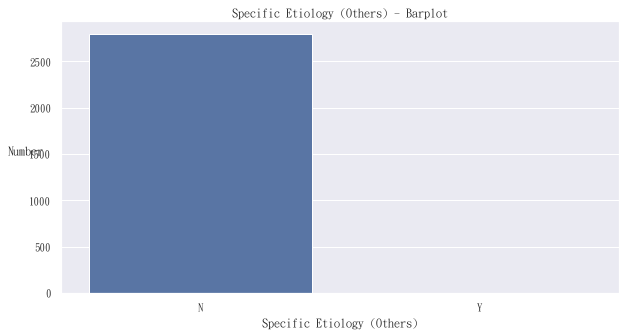

In [130]:
toastso_fl = tsr_12.loc[:,"toastso_fl"]
toastso_fl[toastso_fl == str(0)] = int(0)
toastso_fl[toastso_fl == str(1)] = int(1)
toastso_fl[toastso_fl == int(0)] = "N"
toastso_fl[toastso_fl == int(1)] = "Y"
toastso_fl[(toastso_fl != "N") & (toastso_fl != "Y")] = np.nan
toastso_fl = toastso_fl.fillna(toastso_fl.mode()[0])
#print(toastso_fl)
print(toastso_fl.value_counts() / len(toastso_fl))
#print(toastso_fl.describe())

sns.countplot(toastso_fl)
plt.title("Specific Etiology (Others) - Barplot")
plt.xlabel('Specific Etiology (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Undetermined Etiology

2.0    0.952092
1.0    0.037183
3.0    0.010726
Name: toastu_id, dtype: float64


<ipython-input-131-ba2c5fd09ce6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastu_id[(toastu_id != 1) & (toastu_id != 2) & (toastu_id != 3)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


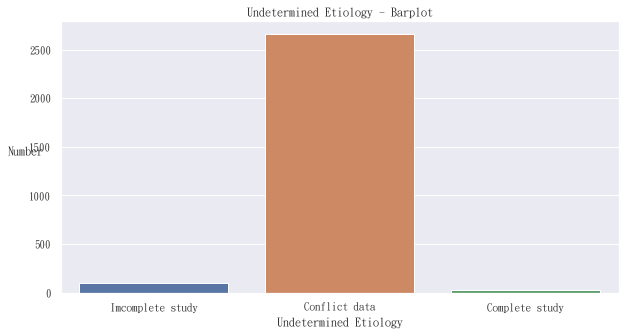

In [131]:
toastu_id = tsr_12.loc[:,"toastu_id"]
toastu_id[(toastu_id != 1) & (toastu_id != 2) & (toastu_id != 3)] = np.nan
toastu_id = toastu_id.fillna(toastu_id.mode()[0])
#print(toastu_id)
print(toastu_id.value_counts() / len(toastu_id))
#print(toastu_id.describe())

toastu_id_labels = ["Imcomplete study","Conflict data","Complete study"]
sns.countplot(toastu_id).set_xticklabels(toastu_id_labels)
plt.title("Undetermined Etiology - Barplot")
plt.xlabel('Undetermined Etiology')
plt.ylabel('Number', rotation=0)
plt.show()

# Cause of ICH ???

0.0    0.797998
1.0    0.146586
2.0    0.014301
Name: cich_id, dtype: float64


<ipython-input-132-7fc94248f1c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cich_id[(cich_id != 0) & (cich_id != 1) & (cich_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


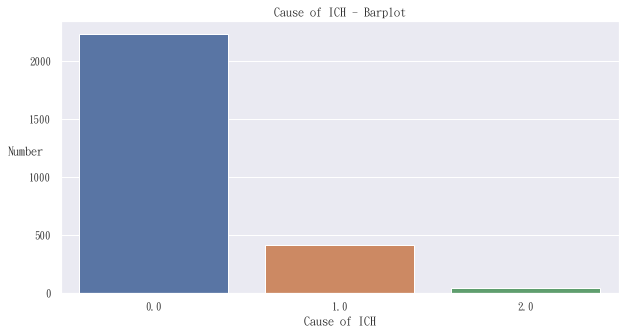

In [132]:
cich_id = tsr_12.loc[:,"cich_id"]
cich_id[(cich_id != 0) & (cich_id != 1) & (cich_id != 2)] = np.nan
#print(cich_id)
print(cich_id.value_counts() / len(cich_id))
#print(cich_id.describe())

#cich_id_labels = ["Hypertension","Non-Hypertension","2"], but documement says that the labels are 1 and 2
#sns.countplot(cich_id).set_xticklabels(cich_id_labels)
sns.countplot(cich_id)
plt.title("Cause of ICH - Barplot")
plt.xlabel('Cause of ICH')
plt.ylabel('Number', rotation=0)
plt.show()
cich_id = cich_id.fillna(999)

# Cause of SAH (蜘蛛膜下腔出血(Subarachnoid hemorrhage, SAH))

<ipython-input-133-fd258e335a7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csah_id[(csah_id != 1) & (csah_id != 2) & (csah_id != 3) & (csah_id != 4) & (csah_id != 99)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0     0.024669
2.0     0.008223
3.0     0.001073
4.0     0.000715
99.0    0.000358
Name: csah_id, dtype: float64


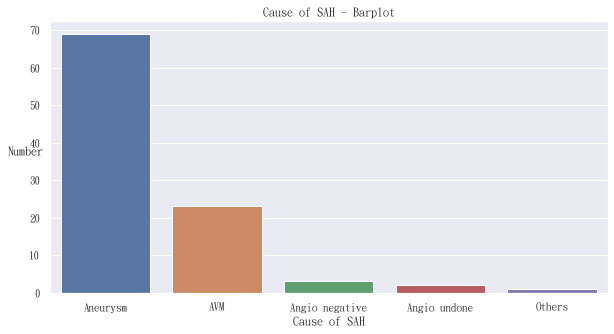

In [133]:
csah_id = tsr_12.loc[:,"csah_id"]
csah_id[(csah_id != 1) & (csah_id != 2) & (csah_id != 3) & (csah_id != 4) & (csah_id != 99)] = np.nan
#csah_id = csah_id.fillna(csah_id.mode()[0])
#print(csah_id)
print(csah_id.value_counts() / len(csah_id))
#print(csah_id.describe())

csah_id_labels = ["Aneurysm","AVM","Angio negative","Angio undone","Others"]
sns.countplot(csah_id).set_xticklabels(csah_id_labels)
plt.title("Cause of SAH - Barplot")
plt.xlabel('Cause of SAH')
plt.ylabel('Number', rotation=0)
plt.show()
csah_id = csah_id.fillna(999)

# Type of Heart Disease (NONE)

N    0.999285
Y    0.000715
Name: thd_id, dtype: float64


<ipython-input-134-246cca9d4fb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_id[thd_id == str(0)] = int(0)
<ipython-input-134-246cca9d4fb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_id[thd_id == str(1)] = int(1)
<ipython-input-134-246cca9d4fb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_id[thd_id == int(0)] = "N"
<ipython-input-134-246cca9d4fb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a 

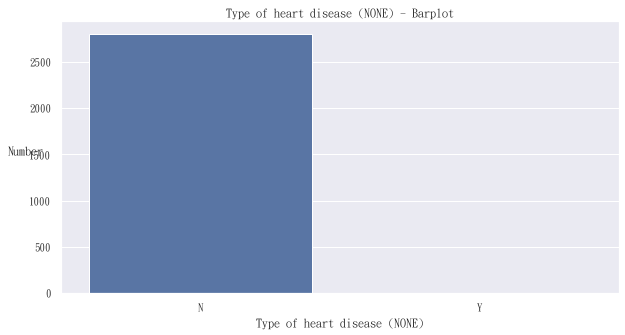

In [134]:
thd_id = tsr_12.loc[:,"thd_id"]
thd_id[thd_id == str(0)] = int(0)
thd_id[thd_id == str(1)] = int(1)
thd_id[thd_id == int(0)] = "N"
thd_id[thd_id == int(1)] = "Y"
thd_id = thd_id.fillna(thd_id.mode()[0])
#print(thd_id)
print(thd_id.value_counts() / len(thd_id))
#print(thd_id.describe())

sns.countplot(thd_id)
plt.title("Type of heart disease (NONE) - Barplot")
plt.xlabel('Type of heart disease (NONE)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Atrial Fibrillation)

N    0.96961
Y    0.03039
Name: thda_fl, dtype: float64


<ipython-input-135-77ce6082da4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thda_fl[thda_fl == str(0)] = int(0)
<ipython-input-135-77ce6082da4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thda_fl[thda_fl == str(1)] = int(1)
<ipython-input-135-77ce6082da4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thda_fl[thda_fl == int(0)] = "N"
<ipython-input-135-77ce6082da4b>:5: SettingWithCopyWarning: 
A value is trying to be set

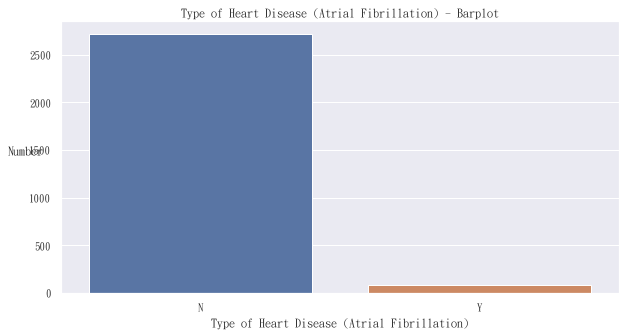

In [135]:
thda_fl = tsr_12.loc[:,"thda_fl"]
thda_fl[thda_fl == str(0)] = int(0)
thda_fl[thda_fl == str(1)] = int(1)
thda_fl[thda_fl == int(0)] = "N"
thda_fl[thda_fl == int(1)] = "Y"
thda_fl[thd_id == "Y"] = "N"
thda_fl = thda_fl.fillna(thda_fl.mode()[0])
#print(thda_fl)
print(thda_fl.value_counts() / len(thda_fl))
#print(thda_fl.describe())

sns.countplot(thda_fl)
plt.title("Type of Heart Disease (Atrial Fibrillation) - Barplot")
plt.xlabel('Type of Heart Disease (Atrial Fibrillation)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Heart Failure)

N    0.992849
Y    0.007151
Name: thdh_fl, dtype: float64


<ipython-input-136-610ff7ee6d05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdh_fl[thdh_fl == str(0)] = int(0)
<ipython-input-136-610ff7ee6d05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdh_fl[thdh_fl == str(1)] = int(1)
<ipython-input-136-610ff7ee6d05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdh_fl[thdh_fl == int(0)] = "N"
<ipython-input-136-610ff7ee6d05>:5: SettingWithCopyWarning: 
A value is trying to be set

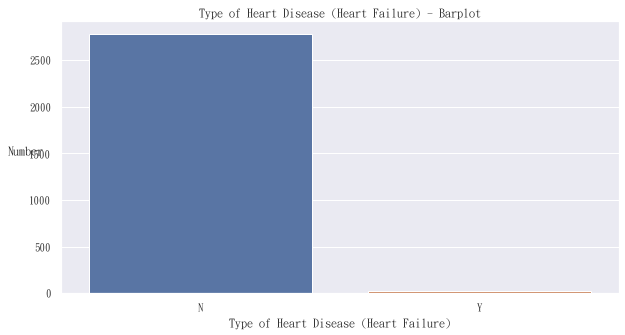

In [136]:
thdh_fl = tsr_12.loc[:,"thdh_fl"]
thdh_fl[thdh_fl == str(0)] = int(0)
thdh_fl[thdh_fl == str(1)] = int(1)
thdh_fl[thdh_fl == int(0)] = "N"
thdh_fl[thdh_fl == int(1)] = "Y"
thdh_fl[thd_id == "Y"] = "N"
thdh_fl = thdh_fl.fillna(thdh_fl.mode()[0])
#print(thdh_fl)
print(thdh_fl.value_counts() / len(thdh_fl))
#print(thdh_fl.describe())

sns.countplot(thdh_fl)
plt.title("Type of Heart Disease (Heart Failure) - Barplot")
plt.xlabel('Type of Heart Disease (Heart Failure)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Ischemic Heart - CAD, old MI)

N    0.873078
Y    0.126922
Name: thdi_fl, dtype: float64


<ipython-input-137-10e4d794eb23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdi_fl[thdi_fl == str(0)] = int(0)
<ipython-input-137-10e4d794eb23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdi_fl[thdi_fl == str(1)] = int(1)
<ipython-input-137-10e4d794eb23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdi_fl[thdi_fl == int(0)] = "N"
<ipython-input-137-10e4d794eb23>:5: SettingWithCopyWarning: 
A value is trying to be set

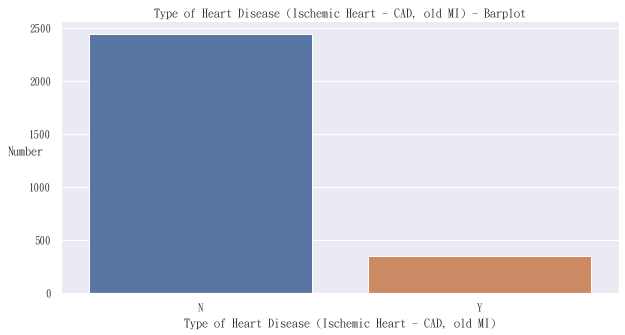

In [137]:
thdi_fl = tsr_12.loc[:,"thdi_fl"]
thdi_fl[thdi_fl == str(0)] = int(0)
thdi_fl[thdi_fl == str(1)] = int(1)
thdi_fl[thdi_fl == int(0)] = "N"
thdi_fl[thdi_fl == int(1)] = "Y"
thdi_fl[thd_id == "Y"] = "N"
thdi_fl = thdi_fl.fillna(thdi_fl.mode()[0])
#print(thdi_fl)
print(thdi_fl.value_counts() / len(thdi_fl))
#print(thdi_fl.describe())

sns.countplot(thdi_fl)
plt.title("Type of Heart Disease (Ischemic Heart - CAD, old MI) - Barplot")
plt.xlabel('Type of Heart Disease (Ischemic Heart - CAD, old MI)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Heart Disease - AMI<4W)

N    0.997855
Y    0.002145
Name: thdam_fl, dtype: float64


<ipython-input-138-f832aee395ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdam_fl[thdam_fl == str(0)] = int(0)
<ipython-input-138-f832aee395ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdam_fl[thdam_fl == str(1)] = int(1)
<ipython-input-138-f832aee395ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdam_fl[thdam_fl == int(0)] = "N"
<ipython-input-138-f832aee395ca>:5: SettingWithCopyWarning: 
A value is trying to 

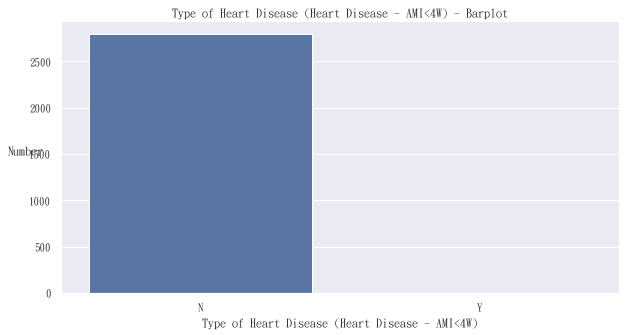

In [138]:
thdam_fl = tsr_12.loc[:,"thdam_fl"]
thdam_fl[thdam_fl == str(0)] = int(0)
thdam_fl[thdam_fl == str(1)] = int(1)
thdam_fl[thdam_fl == int(0)] = "N"
thdam_fl[thdam_fl == int(1)] = "Y"
thdam_fl[thd_id == "Y"] = "N"
thdam_fl = thdam_fl.fillna(thdam_fl.mode()[0])
#print(thdam_fl)
print(thdam_fl.value_counts() / len(thdam_fl))
#print(thdam_fl.describe())

sns.countplot(thdam_fl)
plt.title("Type of Heart Disease (Heart Disease - AMI<4W) - Barplot")
plt.xlabel('Type of Heart Disease (Heart Disease - AMI<4W)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Valvular Replacement)

N    0.99857
Y    0.00143
Name: thdv_fl, dtype: float64


<ipython-input-139-ee53b21c1416>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdv_fl[thdv_fl == str(0)] = int(0)
<ipython-input-139-ee53b21c1416>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdv_fl[thdv_fl == str(1)] = int(1)
<ipython-input-139-ee53b21c1416>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdv_fl[thdv_fl == int(0)] = "N"
<ipython-input-139-ee53b21c1416>:5: SettingWithCopyWarning: 
A value is trying to be set

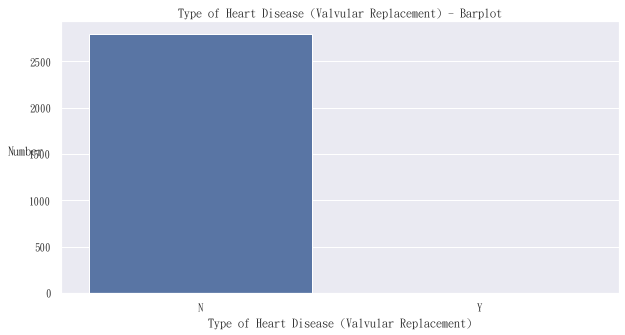

In [139]:
thdv_fl = tsr_12.loc[:,"thdv_fl"]
thdv_fl[thdv_fl == str(0)] = int(0)
thdv_fl[thdv_fl == str(1)] = int(1)
thdv_fl[thdv_fl == int(0)] = "N"
thdv_fl[thdv_fl == int(1)] = "Y"
thdv_fl[thd_id == "Y"] = "N"
thdv_fl = thdv_fl.fillna(thdv_fl.mode()[0])
#print(thdv_fl)
print(thdv_fl.value_counts() / len(thdv_fl))
#print(thdv_fl.describe())

sns.countplot(thdv_fl)
plt.title("Type of Heart Disease (Valvular Replacement) - Barplot")
plt.xlabel('Type of Heart Disease (Valvular Replacement)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Endocarditis)

N    0.999642
Y    0.000358
Name: thde_fl, dtype: float64


<ipython-input-140-ca89a050aeeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thde_fl[thde_fl == str(0)] = int(0)
<ipython-input-140-ca89a050aeeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thde_fl[thde_fl == str(1)] = int(1)
<ipython-input-140-ca89a050aeeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thde_fl[thde_fl == int(0)] = "N"
<ipython-input-140-ca89a050aeeb>:5: SettingWithCopyWarning: 
A value is trying to be set

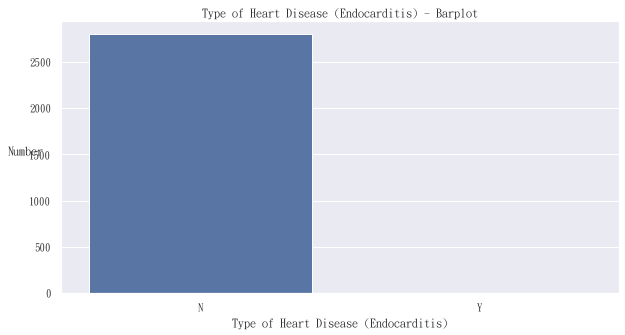

In [140]:
thde_fl = tsr_12.loc[:,"thde_fl"]
thde_fl[thde_fl == str(0)] = int(0)
thde_fl[thde_fl == str(1)] = int(1)
thde_fl[thde_fl == int(0)] = "N"
thde_fl[thde_fl == int(1)] = "Y"
thde_fl[thd_id == "Y"] = "N"
thde_fl = thde_fl.fillna(thde_fl.mode()[0])
#print(thde_fl)
print(thde_fl.value_counts() / len(thde_fl))
#print(thde_fl.describe())

sns.countplot(thde_fl)
plt.title("Type of Heart Disease (Endocarditis) - Barplot")
plt.xlabel('Type of Heart Disease (Endocarditis)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Myxoma)

<ipython-input-141-1688d4104fa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdm_fl[thdm_fl == str(0)] = int(0)
<ipython-input-141-1688d4104fa2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdm_fl[thdm_fl == str(1)] = int(1)
<ipython-input-141-1688d4104fa2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdm_fl[thdm_fl == int(0)] = "N"
<ipython-input-141-1688d4104fa2>:5: SettingWithCopyWarning: 
A value is trying to be set

N    1.0
Name: thdm_fl, dtype: float64


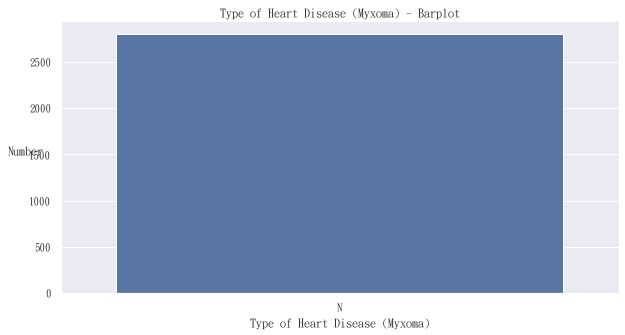

In [141]:
thdm_fl = tsr_12.loc[:,"thdm_fl"]
thdm_fl[thdm_fl == str(0)] = int(0)
thdm_fl[thdm_fl == str(1)] = int(1)
thdm_fl[thdm_fl == int(0)] = "N"
thdm_fl[thdm_fl == int(1)] = "Y"
thdm_fl[thd_id == "Y"] = "N"
thdm_fl = thdm_fl.fillna(thdm_fl.mode()[0])
#print(thdm_fl)
print(thdm_fl.value_counts() / len(thdm_fl))
#print(thdm_fl.describe())

sns.countplot(thdm_fl)
plt.title("Type of Heart Disease (Myxoma) - Barplot")
plt.xlabel('Type of Heart Disease (Myxoma)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (RHD)

N       0.997855
15.4    0.000715
13.6    0.000358
14.0    0.000358
Y       0.000358
14.3    0.000358
Name: thdr_fl, dtype: float64


<ipython-input-142-30496d4d5470>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdr_fl[thdr_fl == str(0)] = int(0)
<ipython-input-142-30496d4d5470>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdr_fl[thdr_fl == str(1)] = int(1)
<ipython-input-142-30496d4d5470>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdr_fl[thdr_fl == int(0)] = "N"
<ipython-input-142-30496d4d5470>:5: SettingWithCopyWarning: 
A value is trying to be set

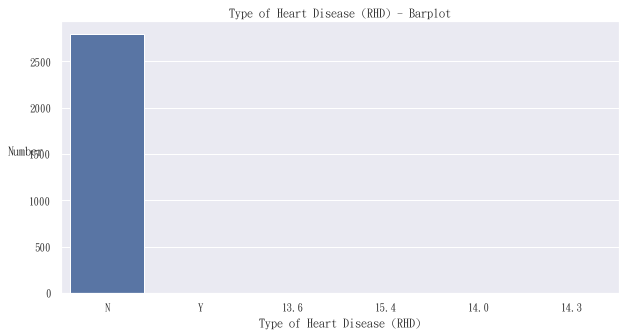

In [142]:
thdr_fl = tsr_12.loc[:,"thdr_fl"]
thdr_fl[thdr_fl == str(0)] = int(0)
thdr_fl[thdr_fl == str(1)] = int(1)
thdr_fl[thdr_fl == int(0)] = "N"
thdr_fl[thdr_fl == int(1)] = "Y"
thdr_fl[thd_id == "Y"] = "N"
thdr_fl = thdr_fl.fillna(thdr_fl.mode()[0])
#print(thdr_fl)
print(thdr_fl.value_counts() / len(thdr_fl))
#print(thdr_fl.describe())

sns.countplot(thdr_fl)
plt.title("Type of Heart Disease (RHD) - Barplot")
plt.xlabel('Type of Heart Disease (RHD)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Patent Foramen Ovale)

<ipython-input-143-c772a7d917d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdp_fl[thdp_fl == str(0)] = int(0)
<ipython-input-143-c772a7d917d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdp_fl[thdp_fl == str(1)] = int(1)
<ipython-input-143-c772a7d917d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdp_fl[thdp_fl == int(0)] = "N"
<ipython-input-143-c772a7d917d8>:5: SettingWithCopyWarning: 
A value is trying to be set

N    1.0
Name: thdp_fl, dtype: float64


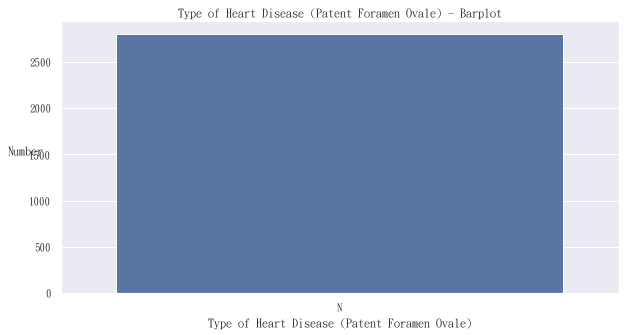

In [143]:
thdp_fl = tsr_12.loc[:,"thdp_fl"]
thdp_fl[thdp_fl == str(0)] = int(0)
thdp_fl[thdp_fl == str(1)] = int(1)
thdp_fl[thdp_fl == int(0)] = "N"
thdp_fl[thdp_fl == int(1)] = "Y"
thdp_fl[(thdp_fl != "N") & (thdp_fl != "Y")] = np.nan
thdp_fl[thd_id == "Y"] = "N"
thdp_fl = thdp_fl.fillna(thdp_fl.mode()[0])
#print(thdp_fl)
print(thdp_fl.value_counts() / len(thdp_fl))
#print(thdp_fl.describe())

sns.countplot(thdp_fl)
plt.title("Type of Heart Disease (Patent Foramen Ovale) - Barplot")
plt.xlabel('Type of Heart Disease (Patent Foramen Ovale)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Others)

<ipython-input-144-347500c0cdfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdoo_fl[thdoo_fl == str(0)] = int(0)
<ipython-input-144-347500c0cdfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdoo_fl[thdoo_fl == str(1)] = int(1)
<ipython-input-144-347500c0cdfa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdoo_fl[thdoo_fl == int(0)] = "N"
<ipython-input-144-347500c0cdfa>:5: SettingWithCopyWarning: 
A value is trying to 

N    0.988917
Y    0.011083
Name: thdoo_fl, dtype: float64


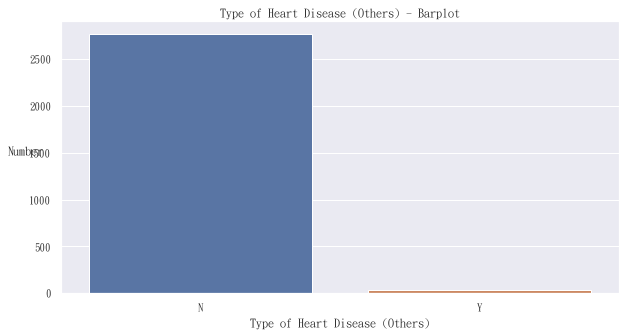

In [144]:
thdoo_fl = tsr_12.loc[:,"thdoo_fl"]
thdoo_fl[thdoo_fl == str(0)] = int(0)
thdoo_fl[thdoo_fl == str(1)] = int(1)
thdoo_fl[thdoo_fl == int(0)] = "N"
thdoo_fl[thdoo_fl == int(1)] = "Y"
thdoo_fl[(thdoo_fl != "N") & (thdoo_fl != "Y")] = np.nan
thdoo_fl[thd_id == "Y"] = "N"
thdoo_fl = thdoo_fl.fillna(thdoo_fl.mode()[0])
#print(thdoo_fl)
print(thdoo_fl.value_counts() / len(thdoo_fl))
#print(thdoo_fl.describe())

sns.countplot(thdoo_fl)
plt.title("Type of Heart Disease (Others) - Barplot")
plt.xlabel('Type of Heart Disease (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (None)

N    0.998212
Y    0.001788
Name: trm_id, dtype: float64


<ipython-input-145-ad242f364b62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_id[trm_id == str(0)] = int(0)
<ipython-input-145-ad242f364b62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_id[trm_id == str(1)] = int(1)
<ipython-input-145-ad242f364b62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_id[trm_id == int(0)] = "N"
<ipython-input-145-ad242f364b62>:5: SettingWithCopyWarning: 
A value is trying to be set on a 

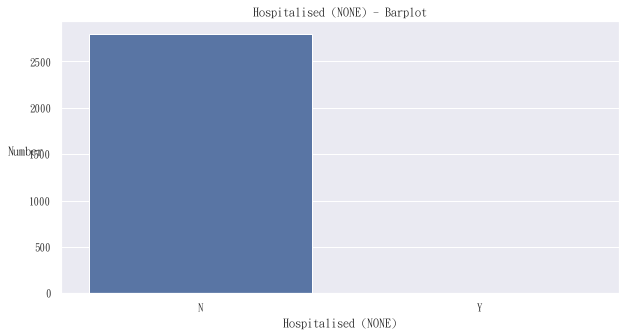

In [145]:
trm_id = tsr_12.loc[:,"trm_id"]
trm_id[trm_id == str(0)] = int(0)
trm_id[trm_id == str(1)] = int(1)
trm_id[trm_id == int(0)] = "N"
trm_id[trm_id == int(1)] = "Y"
trm_id[(trm_id != "N") & (trm_id != "Y")] = np.nan
trm_id = trm_id.fillna(trm_id.mode()[0])
#print(trm_id)
print(trm_id.value_counts() / len(trm_id))
#print(trm_id.describe())

sns.countplot(trm_id)
plt.title("Hospitalised (NONE) - Barplot")
plt.xlabel('Hospitalised (NONE)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Antithrombotic Drugs Dtart Within 48h)

N    0.90025
Y    0.09975
Name: trman_fl, dtype: float64


<ipython-input-146-c639b2276841>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trman_fl[(trman_fl != "N") & (trman_fl != "Y")] = np.nan
<ipython-input-146-c639b2276841>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trman_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


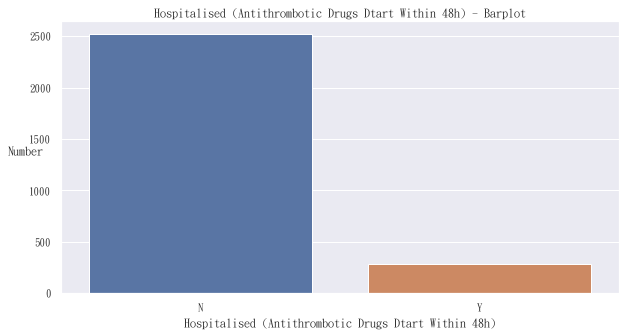

In [146]:
trman_fl = tsr_12.loc[:,"trman_fl"]
trman_fl[(trman_fl != "N") & (trman_fl != "Y")] = np.nan
trman_fl[trm_id == "Y"] = "N"
trman_fl = trman_fl.fillna(trman_fl.mode()[0])
#print(trman_fl)
print(trman_fl.value_counts() / len(trman_fl))
#print(trman_fl.describe())

sns.countplot(trman_fl)
plt.title("Hospitalised (Antithrombotic Drugs Dtart Within 48h) - Barplot")
plt.xlabel('Hospitalised (Antithrombotic Drugs Dtart Within 48h)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Aspirin)

N    0.917769
Y    0.082231
Name: trmas_fl, dtype: float64


<ipython-input-147-bf2153f1df52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmas_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


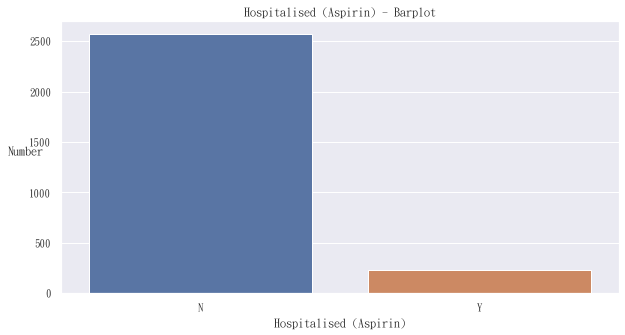

In [147]:
trmas_fl = tsr_12.loc[:,"trmas_fl"]
trmas_fl[trm_id == "Y"] = "N"
trmas_fl = trmas_fl.fillna(trmas_fl.mode()[0])
#print(trmas_fl)
print(trmas_fl.value_counts() / len(trmas_fl))
#print(trmas_fl.describe())

sns.countplot(trmas_fl)
plt.title("Hospitalised (Aspirin) - Barplot")
plt.xlabel('Hospitalised (Aspirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Ticlopidine)

N    0.890597
Y    0.109403
Name: trmti_fl, dtype: float64


<ipython-input-148-9cc66416073e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmti_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


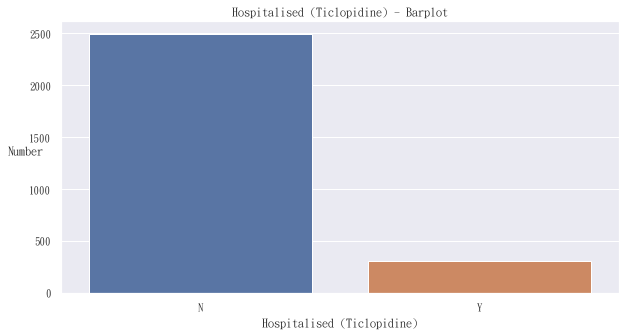

In [148]:
trmti_fl = tsr_12.loc[:,"trmti_fl"]
trmti_fl[trm_id == "Y"] = "N"
trmti_fl = trmti_fl.fillna(trmti_fl.mode()[0])
#print(trmti_fl)
print(trmti_fl.value_counts() / len(trmti_fl))
#print(trmti_fl.describe())

sns.countplot(trmti_fl)
plt.title("Hospitalised (Ticlopidine) - Barplot")
plt.xlabel('Hospitalised (Ticlopidine)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Heparin)

N    0.983911
Y    0.016089
Name: trmhe_fl, dtype: float64


<ipython-input-149-8386626c9cf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmhe_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


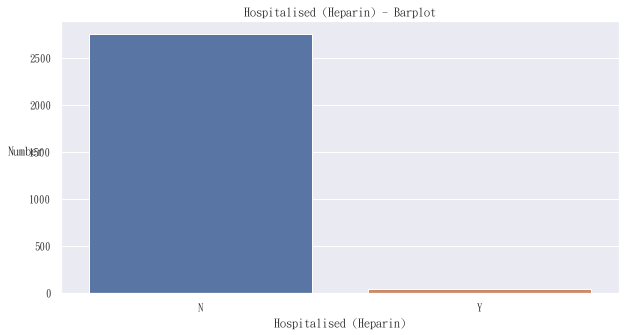

In [149]:
trmhe_fl = tsr_12.loc[:,"trmhe_fl"]
trmhe_fl[trm_id == "Y"] = "N"
trmhe_fl = trmhe_fl.fillna(trmhe_fl.mode()[0])
#print(trmhe_fl)
print(trmhe_fl.value_counts() / len(trmhe_fl))
#print(trmhe_fl.describe())

sns.countplot(trmhe_fl)
plt.title("Hospitalised (Heparin) - Barplot")
plt.xlabel('Hospitalised (Heparin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Warfarin)

N    0.922417
Y    0.077583
Name: trmwa_fl, dtype: float64


<ipython-input-150-3514ea996fcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmwa_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


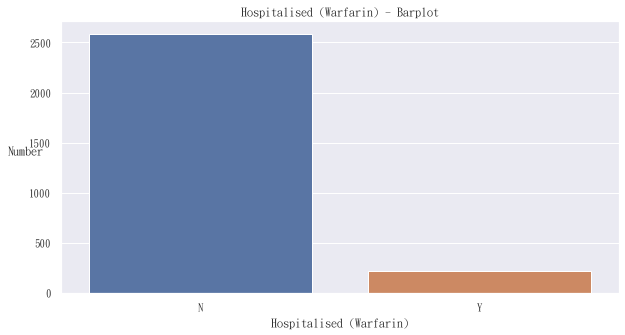

In [150]:
trmwa_fl = tsr_12.loc[:,"trmwa_fl"]
trmwa_fl[trm_id == "Y"] = "N"
trmwa_fl = trmwa_fl.fillna(trmwa_fl.mode()[0])
#print(trmwa_fl)
print(trmwa_fl.value_counts() / len(trmwa_fl))
#print(trmwa_fl.describe())

sns.countplot(trmwa_fl)
plt.title("Hospitalised (Warfarin) - Barplot")
plt.xlabel('Hospitalised (Warfarin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (IA Thrombolysis)

N    0.859135
Y    0.140865
Name: trmia_fl, dtype: float64


<ipython-input-151-681cffa23184>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmia_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


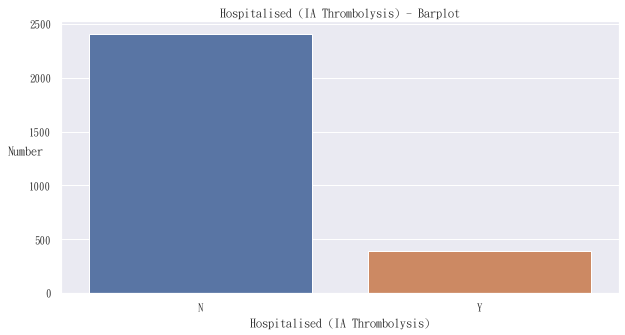

In [151]:
trmia_fl = tsr_12.loc[:,"trmia_fl"]
trmia_fl[trm_id == "Y"] = "N"
trmia_fl = trmia_fl.fillna(trmia_fl.mode()[0])
#print(trmia_fl)
print(trmia_fl.value_counts() / len(trmia_fl))
#print(trmia_fl.describe())

sns.countplot(trmia_fl)
plt.title("Hospitalised (IA Thrombolysis) - Barplot")
plt.xlabel('Hospitalised (IA Thrombolysis)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Foley)

N    0.766893
Y    0.233107
Name: trmfo_fl, dtype: float64


<ipython-input-152-acfb96fbf4a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmfo_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


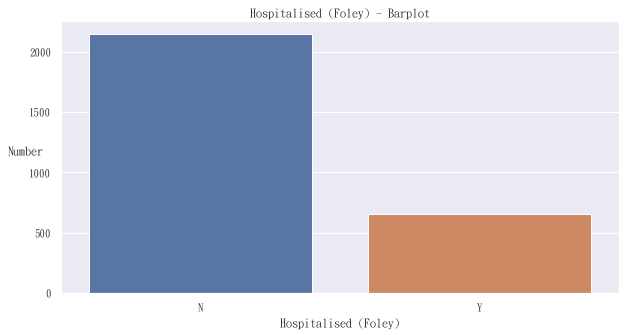

In [152]:
trmfo_fl = tsr_12.loc[:,"trmfo_fl"]
trmfo_fl[trm_id == "Y"] = "N"
trmfo_fl = trmfo_fl.fillna(trmfo_fl.mode()[0])
#print(trmfo_fl)
print(trmfo_fl.value_counts() / len(trmfo_fl))
#print(trmfo_fl.describe())

sns.countplot(trmfo_fl)
plt.title("Hospitalised (Foley) - Barplot")
plt.xlabel('Hospitalised (Foley)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Transarterial - Embolization)

N    0.997855
Y    0.002145
Name: trmta_fl, dtype: float64


<ipython-input-153-4af5daed7370>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmta_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


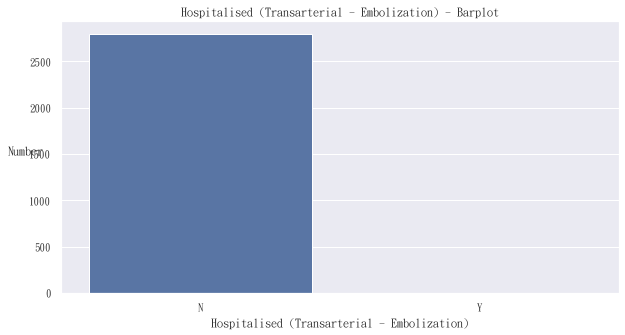

In [153]:
trmta_fl = tsr_12.loc[:,"trmta_fl"]
trmta_fl[trm_id == "Y"] = "N"
trmta_fl = trmta_fl.fillna(trmta_fl.mode()[0])
#print(trmta_fl)
print(trmta_fl.value_counts() / len(trmta_fl))
#print(trmta_fl.describe())

sns.countplot(trmta_fl)
plt.title("Hospitalised (Transarterial - Embolization) - Barplot")
plt.xlabel('Hospitalised (Transarterial - Embolization)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Sign DNR)

N    0.985341
Y    0.014659
Name: trmsd_fl, dtype: float64


<ipython-input-154-0e53e7b7233c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmsd_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


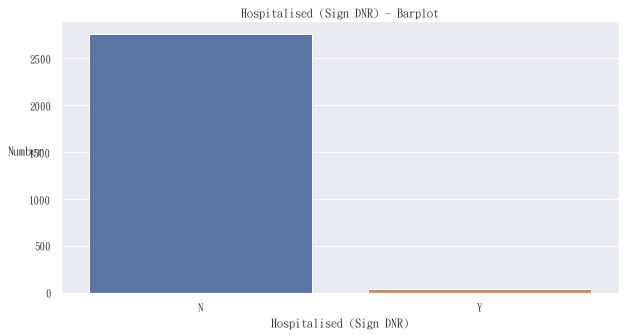

In [154]:
trmsd_fl = tsr_12.loc[:,"trmsd_fl"]
trmsd_fl[trm_id == "Y"] = "N"
trmsd_fl = trmsd_fl.fillna(trmsd_fl.mode()[0])
#print(trmsd_fl)
print(trmsd_fl.value_counts() / len(trmsd_fl))
#print(trmsd_fl.describe())

sns.countplot(trmsd_fl)
plt.title("Hospitalised (Sign DNR) - Barplot")
plt.xlabel('Hospitalised (Sign DNR)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Rehab)

Y    0.557025
N    0.442975
Name: trmre_fl, dtype: float64


<ipython-input-155-893e2e5ad2ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmre_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


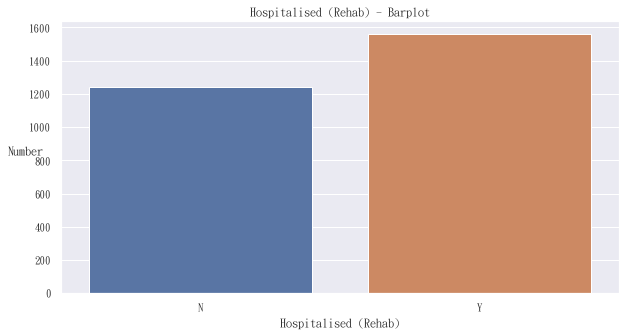

In [155]:
trmre_fl = tsr_12.loc[:,"trmre_fl"]
trmre_fl[trm_id == "Y"] = "N"
trmre_fl = trmre_fl.fillna(trmre_fl.mode()[0])
#print(trmre_fl)
print(trmre_fl.value_counts() / len(trmre_fl))
#print(trmre_fl.describe())

sns.countplot(trmre_fl)
plt.title("Hospitalised (Rehab) - Barplot")
plt.xlabel('Hospitalised (Rehab)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Endovascular Treatment)

N    0.999642
Y    0.000358
Name: trmen_fl, dtype: float64


<ipython-input-156-297decd47ea1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_fl[(trmen_fl != "N") & (trmen_fl != "Y")] = np.nan
<ipython-input-156-297decd47ea1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


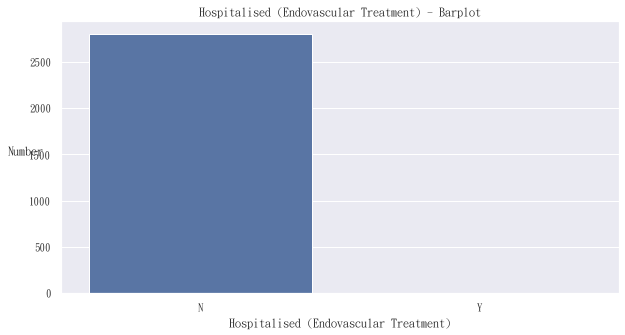

In [156]:
trmen_fl = tsr_12.loc[:,"trmen_fl"]
trmen_fl[(trmen_fl != "N") & (trmen_fl != "Y")] = np.nan
trmen_fl[trm_id == "Y"] = "N"
trmen_fl = trmen_fl.fillna(trmen_fl.mode()[0])
#print(trmen_fl)
print(trmen_fl.value_counts() / len(trmen_fl))
#print(trmen_fl.describe())

sns.countplot(trmen_fl)
plt.title("Hospitalised (Endovascular Treatment) - Barplot")
plt.xlabel('Hospitalised (Endovascular Treatment)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Endovascular Treatment Options)

3.0    0.000358
Name: trmen_id, dtype: float64


<ipython-input-157-ee63c6b0135b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_id[trmen_id == str(1)] = int(1)
<ipython-input-157-ee63c6b0135b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_id[trmen_id == str(2)] = int(2)
<ipython-input-157-ee63c6b0135b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_id[trmen_id == str(3)] = int(3)
<ipython-input-157-ee63c6b0135b>:5: SettingWithCopyWarning: 
A value is trying 

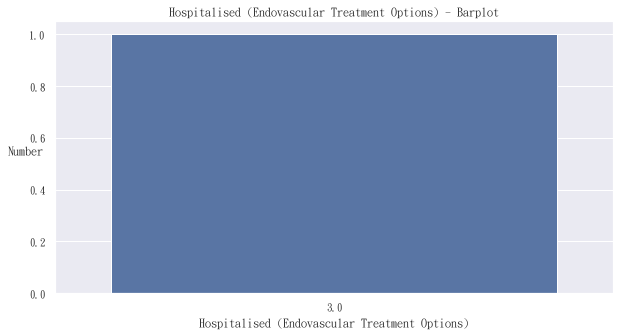

In [157]:
trmen_id = tsr_12.loc[:,"trmen_id"]
trmen_id[trmen_id == str(1)] = int(1)
trmen_id[trmen_id == str(2)] = int(2)
trmen_id[trmen_id == str(3)] = int(3)
trmen_id[(trmen_id != 1) & (trmen_id != 2) & (trmen_id != 3)] = np.nan
trmen_id = trmen_id.fillna(trmen_id.mode()[0])
trmen_id[trmen_fl == "N"] = np.nan
#print(trmen_id)
print(trmen_id.value_counts() / len(trmen_id))
#print(trmen_id.describe())

#trmen_id_labels = ["Aneurysm","AVM","Stenting"]
sns.countplot(trmen_id)#.set_xticklabels(trmen_id_labels)
plt.title("Hospitalised (Endovascular Treatment Options) - Barplot")
plt.xlabel('Hospitalised (Endovascular Treatment Options)')
plt.ylabel('Number', rotation=0)
plt.show()
trmen_id = trmen_id.fillna(999)

# Hospitalised (Aggrenox)

N    0.996067
Y    0.003933
Name: trmag_fl, dtype: float64


<ipython-input-158-b7c6752c2abf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmag_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


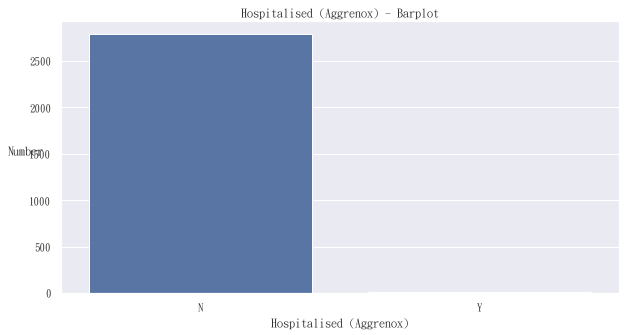

In [158]:
trmag_fl = tsr_12.loc[:,"trmag_fl"]
trmag_fl[trm_id == "Y"] = "N"
trmag_fl = trmag_fl.fillna(trmag_fl.mode()[0])
#print(trmag_fl)
print(trmag_fl.value_counts() / len(trmag_fl))
#print(trmag_fl.describe())

sns.countplot(trmag_fl)
plt.title("Hospitalised (Aggrenox) - Barplot")
plt.xlabel('Hospitalised (Aggrenox)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Clopidogrel)

N    0.811226
Y    0.188774
Name: trmcl_fl, dtype: float64


<ipython-input-159-4a10fa6ce71c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmcl_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


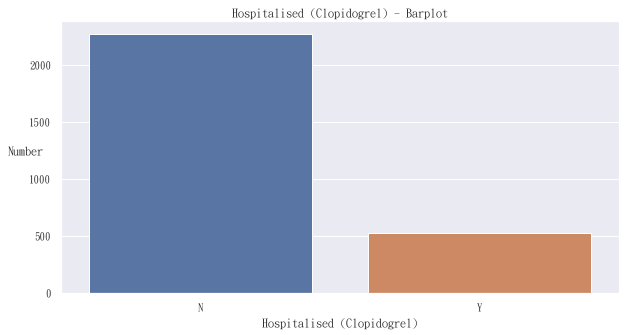

In [159]:
trmcl_fl = tsr_12.loc[:,"trmcl_fl"]
trmcl_fl[trm_id == "Y"] = "N"
trmcl_fl = trmcl_fl.fillna(trmcl_fl.mode()[0])
#print(trmcl_fl)
print(trmcl_fl.value_counts() / len(trmcl_fl))
#print(trmcl_fl.describe())

sns.countplot(trmcl_fl)
plt.title("Hospitalised (Clopidogrel) - Barplot")
plt.xlabel('Hospitalised (Clopidogrel)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Pletaal)

N    0.996067
Y    0.003933
Name: trmpl_fl, dtype: float64


<ipython-input-160-558b048981a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmpl_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


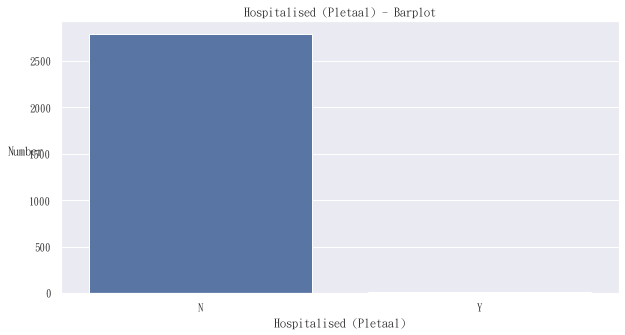

In [160]:
trmpl_fl = tsr_12.loc[:,"trmpl_fl"]
trmpl_fl[trm_id == "Y"] = "N"
trmpl_fl = trmpl_fl.fillna(trmpl_fl.mode()[0])
#print(trmpl_fl)
print(trmpl_fl.value_counts() / len(trmpl_fl))
#print(trmpl_fl.describe())

sns.countplot(trmpl_fl)
plt.title("Hospitalised (Pletaal) - Barplot")
plt.xlabel('Hospitalised (Pletaal)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (LMW Heparin)

N    0.975688
Y    0.024312
Name: trmlm_fl, dtype: float64


<ipython-input-161-14e60de39ef3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmlm_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


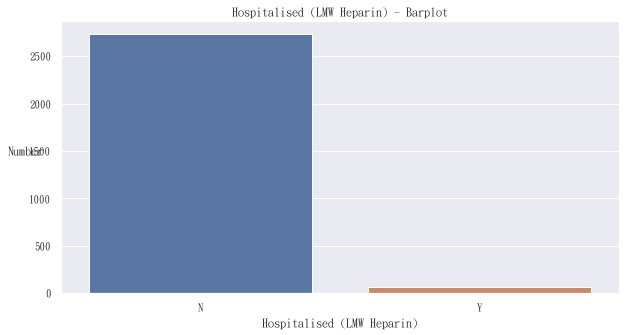

In [161]:
trmlm_fl = tsr_12.loc[:,"trmlm_fl"]
trmlm_fl[trm_id == "Y"] = "N"
trmlm_fl = trmlm_fl.fillna(trmlm_fl.mode()[0])
#print(trmlm_fl)
print(trmlm_fl.value_counts() / len(trmlm_fl))
#print(trmlm_fl.describe())

sns.countplot(trmlm_fl)
plt.title("Hospitalised (LMW Heparin) - Barplot")
plt.xlabel('Hospitalised (LMW Heparin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (IV t-PA)

N    0.942081
Y    0.057919
Name: trmiv_fl, dtype: float64


<ipython-input-162-b65c92827eaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmiv_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


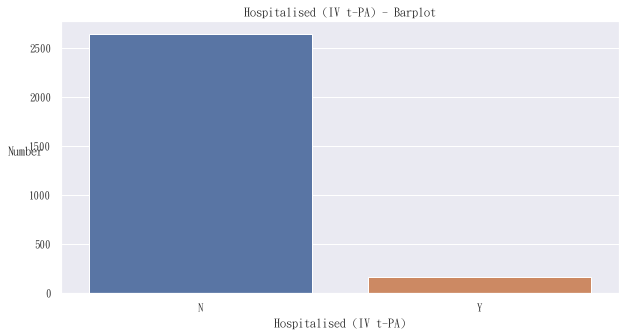

In [162]:
trmiv_fl = tsr_12.loc[:,"trmiv_fl"]
trmiv_fl[trm_id == "Y"] = "N"
trmiv_fl = trmiv_fl.fillna(trmiv_fl.mode()[0])
#print(trmiv_fl)
print(trmiv_fl.value_counts() / len(trmiv_fl))
#print(trmiv_fl.describe())

sns.countplot(trmiv_fl)
plt.title("Hospitalised (IV t-PA) - Barplot")
plt.xlabel('Hospitalised (IV t-PA)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Ventilator)

N    0.859135
Y    0.140865
Name: trmve_fl, dtype: float64


<ipython-input-163-cd2d940df034>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmve_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


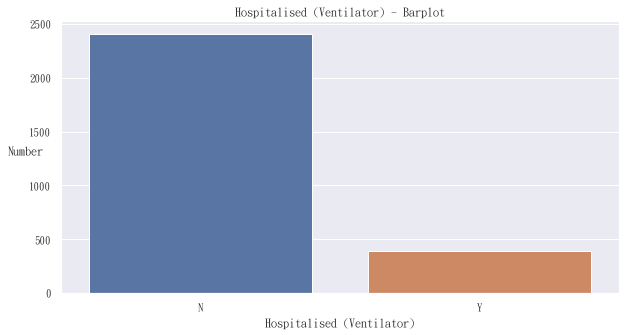

In [163]:
trmve_fl = tsr_12.loc[:,"trmve_fl"]
trmve_fl[trm_id == "Y"] = "N"
trmve_fl = trmve_fl.fillna(trmve_fl.mode()[0])
#print(trmve_fl)
print(trmve_fl.value_counts() / len(trmve_fl))
#print(trmve_fl.describe())

sns.countplot(trmve_fl)
plt.title("Hospitalised (Ventilator) - Barplot")
plt.xlabel('Hospitalised (Ventilator)')
plt.ylabel('Number', rotation=0)
plt.show()


# Hospitalised (Nasogastric Tube)

N    0.750804
Y    0.249196
Name: trmng_fl, dtype: float64


<ipython-input-164-59e66a9c754e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmng_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


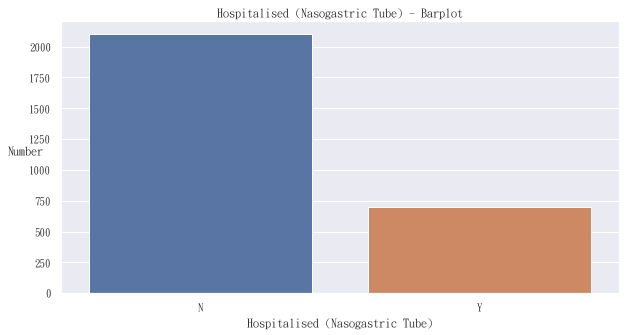

In [164]:
trmng_fl = tsr_12.loc[:,"trmng_fl"]
trmng_fl[trm_id == "Y"] = "N"
trmng_fl = trmng_fl.fillna(trmng_fl.mode()[0])
#print(trmng_fl)
print(trmng_fl.value_counts() / len(trmng_fl))
#print(trmng_fl.describe())

sns.countplot(trmng_fl)
plt.title("Hospitalised (Nasogastric Tube) - Barplot")
plt.xlabel('Hospitalised (Nasogastric Tube)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Dysphagia Screen)

N    0.883447
Y    0.116553
Name: trmdy_fl, dtype: float64


<ipython-input-165-ac9c91de651a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmdy_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


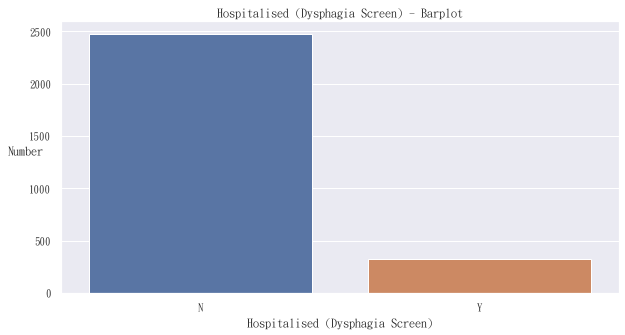

In [165]:
trmdy_fl = tsr_12.loc[:,"trmdy_fl"]
trmdy_fl[trm_id == "Y"] = "N"
trmdy_fl = trmdy_fl.fillna(trmdy_fl.mode()[0])
#print(trmdy_fl)
print(trmdy_fl.value_counts() / len(trmdy_fl))
#print(trmdy_fl.describe())

sns.countplot(trmdy_fl)
plt.title("Hospitalised (Dysphagia Screen) - Barplot")
plt.xlabel('Hospitalised (Dysphagia Screen)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Admission to ICU)

N    0.922774
Y    0.077226
Name: trmicu_fl, dtype: float64


<ipython-input-166-af5201873428>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmicu_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


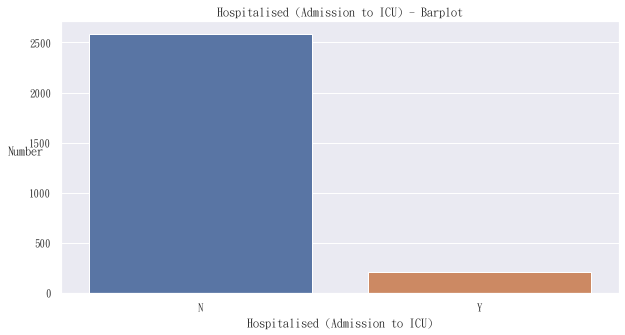

In [166]:
trmicu_fl = tsr_12.loc[:,"trmicu_fl"]
trmicu_fl[trm_id == "Y"] = "N"
trmicu_fl = trmicu_fl.fillna(trmicu_fl.mode()[0])
#print(trmicu_fl)
print(trmicu_fl.value_counts() / len(trmicu_fl))
#print(trmicu_fl.describe())

sns.countplot(trmicu_fl)
plt.title("Hospitalised (Admission to ICU) - Barplot")
plt.xlabel('Hospitalised (Admission to ICU)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Smoking Cessation Counseling)

N    0.880944
Y    0.119056
Name: trmsm_fl, dtype: float64


<ipython-input-167-cf0f422aa8f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmsm_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


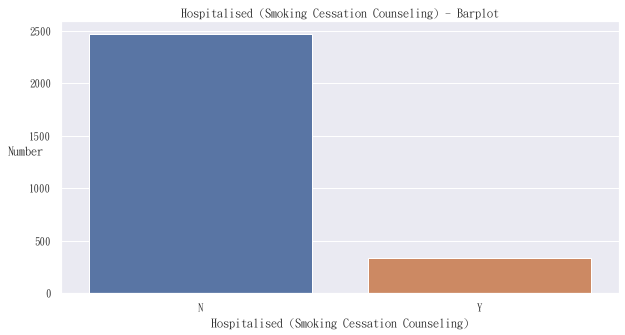

In [167]:
trmsm_fl = tsr_12.loc[:,"trmsm_fl"]
trmsm_fl[trm_id == "Y"] = "N"
trmsm_fl = trmsm_fl.fillna(trmsm_fl.mode()[0])
#print(trmsm_fl)
print(trmsm_fl.value_counts() / len(trmsm_fl))
#print(trmsm_fl.describe())

sns.countplot(trmsm_fl)
plt.title("Hospitalised (Smoking Cessation Counseling) - Barplot")
plt.xlabel('Hospitalised (Smoking Cessation Counseling)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Education About Stroke)

N    0.880586
Y    0.119414
Name: trmed_fl, dtype: float64


<ipython-input-168-64625535794e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmed_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


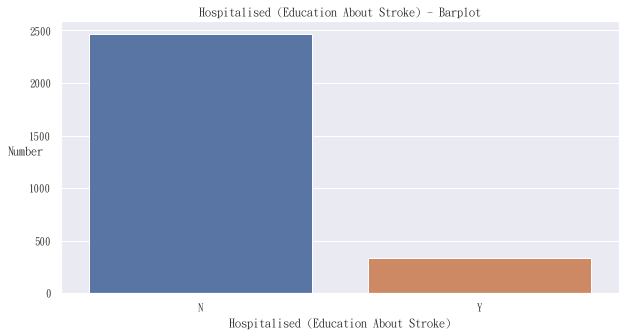

In [168]:
trmed_fl = tsr_12.loc[:,"trmed_fl"]
trmed_fl[trm_id == "Y"] = "N"
trmed_fl = trmed_fl.fillna(trmed_fl.mode()[0])
#print(trmed_fl)
print(trmed_fl.value_counts() / len(trmed_fl))
#print(trmed_fl.describe())

sns.countplot(trmed_fl)
plt.title("Hospitalised (Education About Stroke) - Barplot")
plt.xlabel('Hospitalised (Education About Stroke)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Operation for)

N    0.986414
Y    0.013586
Name: trmop_fl, dtype: float64


<ipython-input-169-294d9319b02c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmop_fl[(trmop_fl != "N") & (trmop_fl != "Y")] = np.nan
<ipython-input-169-294d9319b02c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmop_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


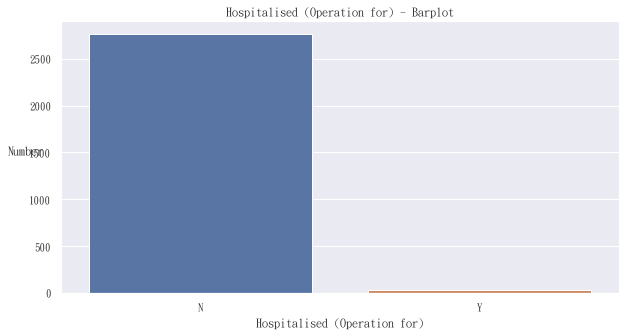

In [169]:
trmop_fl = tsr_12.loc[:,"trmop_fl"]
trmop_fl[(trmop_fl != "N") & (trmop_fl != "Y")] = np.nan
trmop_fl[trm_id == "Y"] = "N"
trmop_fl = trmop_fl.fillna(trmop_fl.mode()[0])
#print(trmop_fl)
print(trmop_fl.value_counts() / len(trmop_fl))
#print(trmop_fl.describe())

sns.countplot(trmop_fl)
plt.title("Hospitalised (Operation for) - Barplot")
plt.xlabel('Hospitalised (Operation for)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Operation for Options)

2.0    0.008938
1.0    0.003933
4.0    0.000715
Name: trmop_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


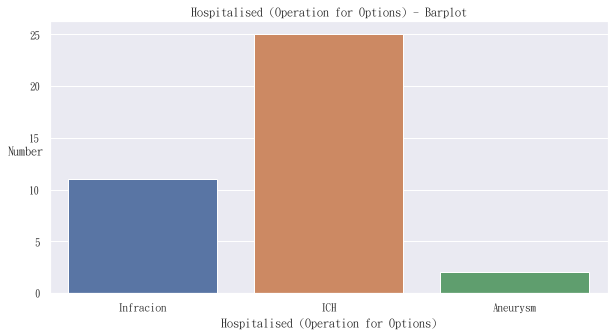

In [170]:
trmop_id = tsr_12.loc[:,"trmop_id"]
trmop_id = pd.to_numeric(trmop_id, errors = "coerce")
trmop_id = trmop_id.fillna(trmop_id.mode()[0])
trmop_id[trmop_fl == "N"] = np.nan
#print(trmop_id)
print(trmop_id.value_counts() / len(trmop_id))
#print(trmop_id.describe())

#trmop_id_labels = ["Infracion","ICH","Carotid Stenosis \n (eg:Endarterectomy)","Aneurysm","AVM"]
trmop_id_labels = ["Infracion","ICH","Aneurysm"]
sns.countplot(trmop_id).set_xticklabels(trmop_id_labels)
plt.title("Hospitalised (Operation for Options) - Barplot")
plt.xlabel('Hospitalised (Operation for Options)')
plt.ylabel('Number', rotation=0)
plt.show()
trmop_id = trmop_id.fillna(999)

# Hospitalised (Others)

N    0.6936
Y    0.3064
Name: trmot_fl, dtype: float64


<ipython-input-171-f4b9b1c402f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmot_fl[(trmot_fl != "N") & (trmot_fl != "Y")] = np.nan
<ipython-input-171-f4b9b1c402f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmot_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


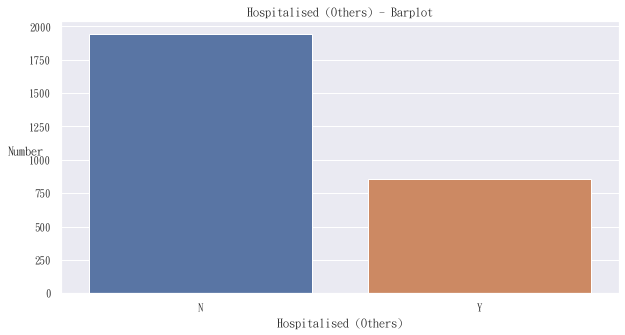

In [171]:
trmot_fl = tsr_12.loc[:,"trmot_fl"]
trmot_fl[(trmot_fl != "N") & (trmot_fl != "Y")] = np.nan 
trmot_fl[trm_id == "Y"] = "N"
trmot_fl = trmot_fl.fillna(trmot_fl.mode()[0])
#print(trmot_fl)
print(trmot_fl.value_counts() / len(trmot_fl))
#print(trmot_fl.describe())

sns.countplot(trmot_fl)
plt.title("Hospitalised (Others) - Barplot")
plt.xlabel('Hospitalised (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (None)

N    0.937433
Y    0.062567
Name: om_fl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


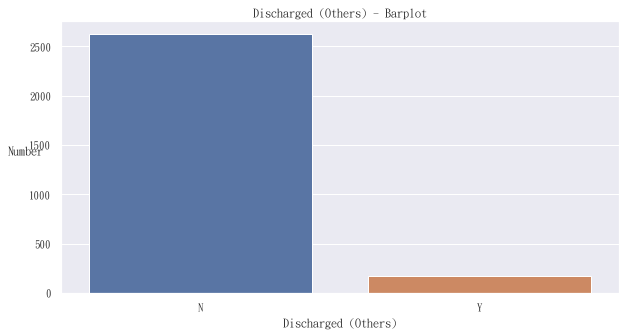

In [172]:
om_fl = tsr_12.loc[:,"om_fl"]
om_fl = om_fl.fillna(om_fl.mode()[0])
#print(om_fl)
print(om_fl.value_counts() / len(om_fl))
#print(om_fl.describe())

sns.countplot(om_fl)
plt.title("Discharged (Others) - Barplot")
plt.xlabel('Discharged (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Aspirin)

<ipython-input-173-c806ff7c2162>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omas_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Y    0.516982
N    0.483018
Name: omas_fl, dtype: float64


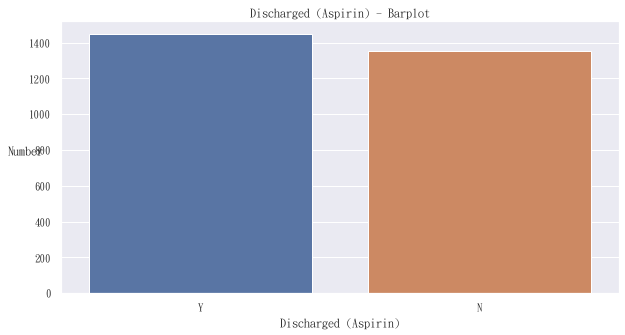

In [173]:
omas_fl = tsr_12.loc[:,"omas_fl"]
omas_fl[om_fl == "Y"] = "N"
omas_fl = omas_fl.fillna(omas_fl.mode()[0])
#print(omas_fl)
print(omas_fl.value_counts() / len(omas_fl))
#print(omas_fl.describe())

sns.countplot(omas_fl)
plt.title("Discharged (Aspirin) - Barplot")
plt.xlabel('Discharged (Aspirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Aggrenox)

N    0.992134
Y    0.007866
Name: omag_fl, dtype: float64


<ipython-input-174-d6d1f5a6f0c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omag_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


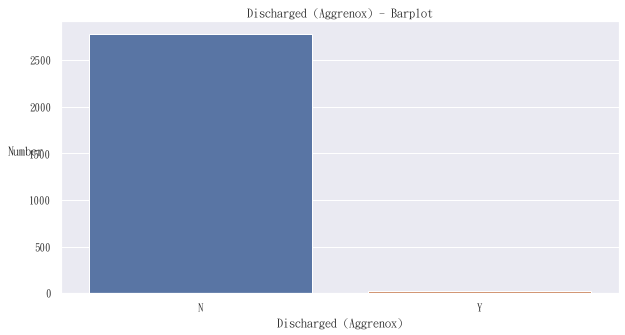

In [174]:
omag_fl = tsr_12.loc[:,"omag_fl"]
omag_fl[om_fl == "Y"] = "N"
omag_fl = omag_fl.fillna(omag_fl.mode()[0])
#print(omag_fl)
print(omag_fl.value_counts() / len(omag_fl))
#print(omag_fl.describe())

sns.countplot(omag_fl)
plt.title("Discharged (Aggrenox) - Barplot")
plt.xlabel('Discharged (Aggrenox)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Ticlopidine)

N    0.998212
Y    0.001788
Name: omti_fl, dtype: float64


<ipython-input-175-2af9809f76bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omti_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


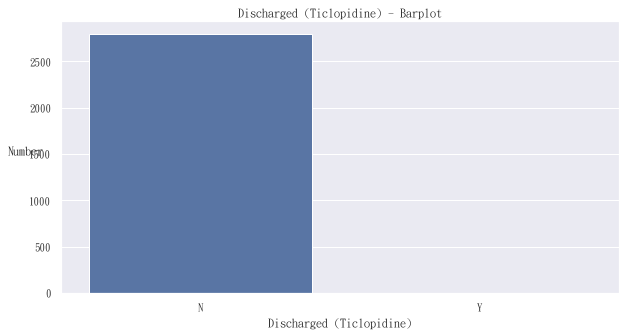

In [175]:
omti_fl = tsr_12.loc[:,"omti_fl"]
omti_fl[om_fl == "Y"] = "N"
omti_fl = omti_fl.fillna(omti_fl.mode()[0])
#print(omti_fl)
print(omti_fl.value_counts() / len(omti_fl))
#print(omti_fl.describe())

sns.countplot(omti_fl)
plt.title("Discharged (Ticlopidine) - Barplot")
plt.xlabel('Discharged (Ticlopidine)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Clopidogrel)

N    0.848767
Y    0.151233
Name: omcl_fl, dtype: float64


<ipython-input-176-223b1538c8db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omcl_fl[(omcl_fl != "N") & (omcl_fl != "Y")] = np.nan
<ipython-input-176-223b1538c8db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omcl_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


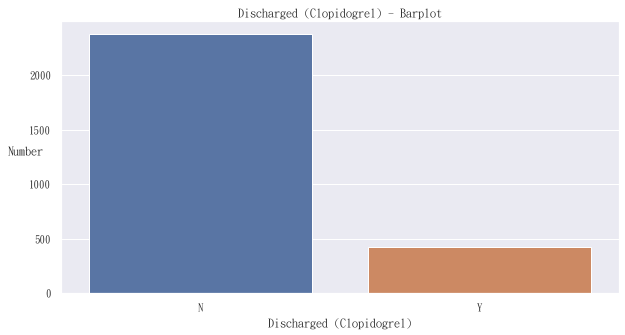

In [176]:
omcl_fl = tsr_12.loc[:,"omcl_fl"]
omcl_fl[(omcl_fl != "N") & (omcl_fl != "Y")] = np.nan
omcl_fl[trm_id == "Y"] = "N"
omcl_fl = omcl_fl.fillna(omcl_fl.mode()[0])
#print(omcl_fl)
print(omcl_fl.value_counts() / len(omcl_fl))
#print(omcl_fl.describe())

sns.countplot(omcl_fl)
plt.title("Discharged (Clopidogrel) - Barplot")
plt.xlabel('Discharged (Clopidogrel)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Pletaal)

N    0.989989
Y    0.010011
Name: ompl_fl, dtype: float64


<ipython-input-177-38ab1155bd2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ompl_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


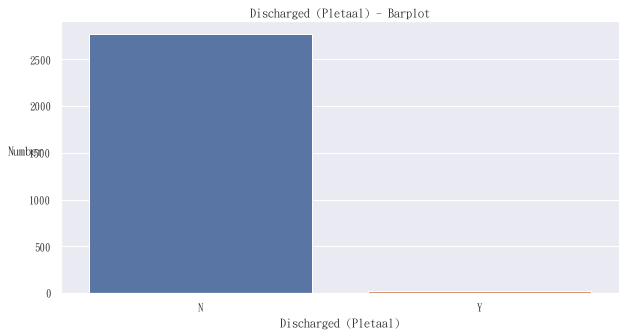

In [177]:
ompl_fl = tsr_12.loc[:,"ompl_fl"]
ompl_fl[om_fl == "Y"] = "N"
ompl_fl = ompl_fl.fillna(ompl_fl.mode()[0])
#print(ompl_fl)
print(ompl_fl.value_counts() / len(ompl_fl))
#print(ompl_fl.describe())

sns.countplot(ompl_fl)
plt.title("Discharged (Pletaal) - Barplot")
plt.xlabel('Discharged (Pletaal)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti H/T Drug)

Y    0.523418
N    0.476582
Name: omanh_fl, dtype: float64


<ipython-input-178-d831c357bff3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omanh_fl[(omanh_fl != "Y") & (omanh_fl != "N")] = np.nan
<ipython-input-178-d831c357bff3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omanh_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


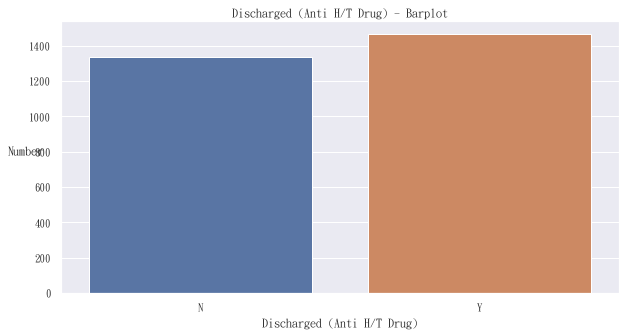

In [178]:
omanh_fl = tsr_12.loc[:,"omanh_fl"]
omanh_fl[(omanh_fl != "Y") & (omanh_fl != "N")] = np.nan
omanh_fl[om_fl == "Y"] = "N"
omanh_fl = omanh_fl.fillna(omanh_fl.mode()[0])
#print(omanh_fl)
print(omanh_fl.value_counts() / len(omanh_fl))
#print(omanh_fl.describe())

sns.countplot(omanh_fl)
plt.title("Discharged (Anti H/T Drug) - Barplot")
plt.xlabel('Discharged (Anti H/T Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Warfarin)

N    0.927422
Y    0.072578
Name: omwa_fl, dtype: float64


<ipython-input-179-6cb6954ae2d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omwa_fl[(omwa_fl != "N") & (omwa_fl != "Y")] = np.nan
<ipython-input-179-6cb6954ae2d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omwa_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


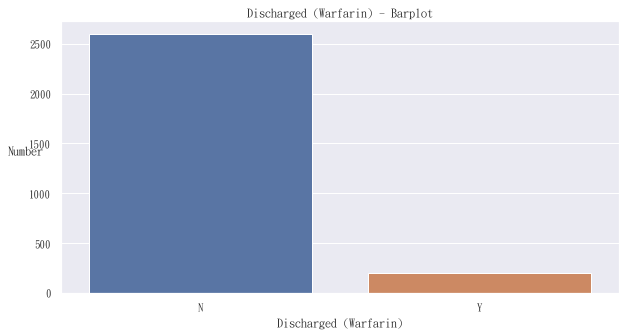

In [179]:
omwa_fl = tsr_12.loc[:,"omwa_fl"]
omwa_fl[(omwa_fl != "N") & (omwa_fl != "Y")] = np.nan
omwa_fl[om_fl == "Y"] = "N"
omwa_fl = omwa_fl.fillna(omwa_fl.mode()[0])
#print(omwa_fl)
print(omwa_fl.value_counts() / len(omwa_fl))
#print(omwa_fl.describe())

sns.countplot(omwa_fl)
plt.title("Discharged (Warfarin) - Barplot")
plt.xlabel('Discharged (Warfarin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti DM Drug)

N    0.720772
Y    0.279228
Name: omand_fl, dtype: float64


<ipython-input-180-db4b1a2bad29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omand_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


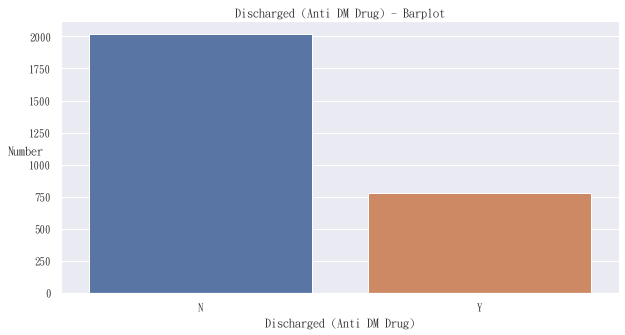

In [180]:
omand_fl = tsr_12.loc[:,"omand_fl"]
omand_fl[om_fl == "Y"] = "N"
omand_fl = omand_fl.fillna(omand_fl.mode()[0])
#print(omand_fl)
print(omand_fl.value_counts() / len(omand_fl))
#print(omand_fl.describe())

sns.countplot(omand_fl)
plt.title("Discharged (Anti DM Drug) - Barplot")
plt.xlabel('Discharged (Anti DM Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti DM Drug - Oral)

N    0.96961
Y    0.03039
Name: omora_fl, dtype: float64


<ipython-input-181-288a1cd8e4bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omora_fl[(omora_fl != "Y") & (omora_fl != "N")] = np.nan
<ipython-input-181-288a1cd8e4bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omora_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


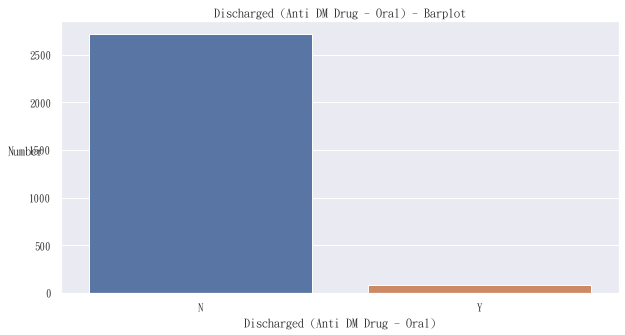

In [181]:
omora_fl = tsr_12.loc[:,"omora_fl"]
omora_fl[(omora_fl != "Y") & (omora_fl != "N")] = np.nan
omora_fl[om_fl == "Y"] = "N"
omora_fl = omora_fl.fillna(omora_fl.mode()[0])
#print(omora_fl)
print(omora_fl.value_counts() / len(omora_fl))
#print(omora_fl.describe())

sns.countplot(omora_fl)
plt.title("Discharged (Anti DM Drug - Oral) - Barplot")
plt.xlabel('Discharged (Anti DM Drug - Oral)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti DM Drug - Insulin)

N    0.986414
Y    0.013586
Name: omins_fl, dtype: float64


<ipython-input-182-94fdefde9753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omins_fl[(omins_fl != "Y") & (omins_fl != "N")] = np.nan
<ipython-input-182-94fdefde9753>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omins_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


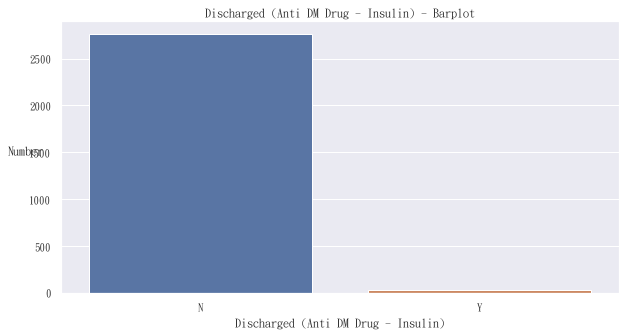

In [182]:
omins_fl = tsr_12.loc[:,"omins_fl"]
omins_fl[(omins_fl != "Y") & (omins_fl != "N")] = np.nan
omins_fl[om_fl == "Y"] = "N"
omins_fl = omins_fl.fillna(omins_fl.mode()[0])
#print(omins_fl)
print(omins_fl.value_counts() / len(omins_fl))
#print(omins_fl.describe())

sns.countplot(omins_fl)
plt.title("Discharged (Anti DM Drug - Insulin) - Barplot")
plt.xlabel('Discharged (Anti DM Drug - Insulin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Lipid Lower Drug)

N    0.772256
Y    0.227744
Name: omli_fl, dtype: float64


<ipython-input-183-dee039b5447a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omli_fl[(omli_fl != "Y") & (omli_fl != "N")] = np.nan
<ipython-input-183-dee039b5447a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omli_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


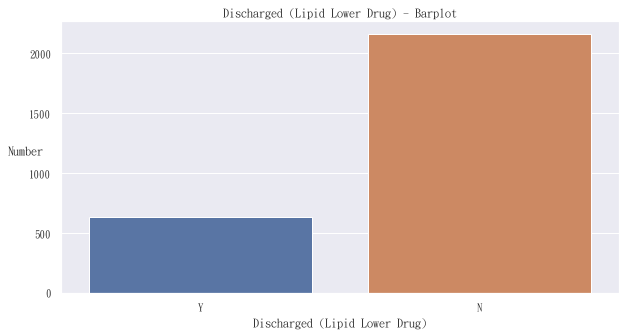

In [183]:
omli_fl = tsr_12.loc[:,"omli_fl"]
omli_fl[(omli_fl != "Y") & (omli_fl != "N")] = np.nan
omli_fl[om_fl == "Y"] = "N"
omli_fl = omli_fl.fillna(omli_fl.mode()[0])
#print(omli_fl)
print(omli_fl.value_counts() / len(omli_fl))
#print(omli_fl.describe())

sns.countplot(omli_fl)
plt.title("Discharged (Lipid Lower Drug) - Barplot")
plt.xlabel('Discharged (Lipid Lower Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Lipid Lower Drug - Statin)

N    0.956024
Y    0.043976
Name: omst_fl, dtype: float64


<ipython-input-184-c92b344eb1c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omst_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


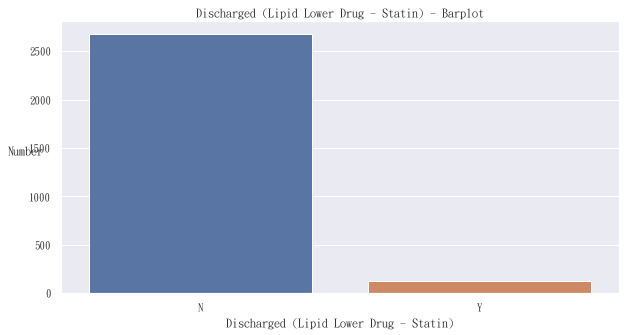

In [184]:
omst_fl = tsr_12.loc[:,"omst_fl"]
omst_fl[om_fl == "Y"] = "N"
omst_fl = omst_fl.fillna(omst_fl.mode()[0])
#print(omst_fl)
print(omst_fl.value_counts() / len(omst_fl))
#print(omst_fl.describe())

sns.countplot(omst_fl)
plt.title("Discharged (Lipid Lower Drug - Statin) - Barplot")
plt.xlabel('Discharged (Lipid Lower Drug - Statin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Lipid Lower Drug - Non-Statin)

N    0.996425
Y    0.003575
Name: omns_fl, dtype: float64


<ipython-input-185-78ddecea298b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omns_fl[(omns_fl != "N") & (omns_fl != "Y")] = np.nan
<ipython-input-185-78ddecea298b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omns_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


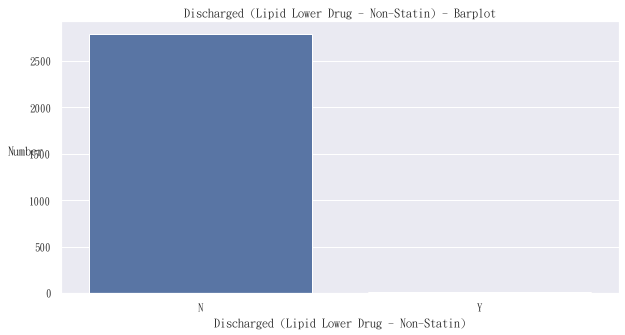

In [185]:
omns_fl = tsr_12.loc[:,"omns_fl"]
omns_fl[(omns_fl != "N") & (omns_fl != "Y")] = np.nan
omns_fl[om_fl == "Y"] = "N"
omns_fl = omns_fl.fillna(omns_fl.mode()[0])
#print(omns_fl)
print(omns_fl.value_counts() / len(omns_fl))
#print(omns_fl.describe())

sns.countplot(omns_fl)
plt.title("Discharged (Lipid Lower Drug - Non-Statin) - Barplot")
plt.xlabel('Discharged (Lipid Lower Drug - Non-Statin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Others)

N    0.979979
Y    0.020021
Name: omliot_fl, dtype: float64


<ipython-input-186-8b7ce0fc26c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot_fl[(omliot_fl != "N") & (omliot_fl != "Y")] = np.nan
<ipython-input-186-8b7ce0fc26c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


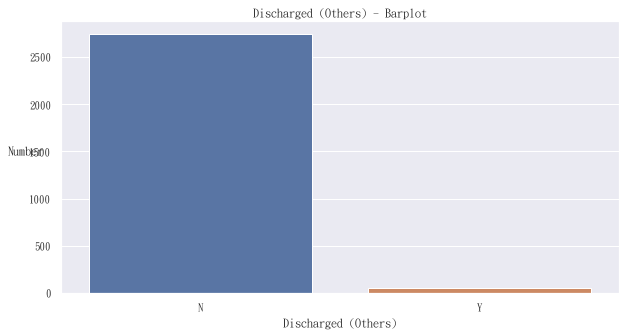

In [186]:
omliot_fl = tsr_12.loc[:,"omliot_fl"]
omliot_fl[(omliot_fl != "N") & (omliot_fl != "Y")] = np.nan
omliot_fl[om_fl == "Y"] = "N"
omliot_fl = omliot_fl.fillna(omliot_fl.mode()[0])
#print(omliot_fl)
print(omliot_fl.value_counts() / len(omliot_fl))
#print(omliot_fl.describe())

sns.countplot(omliot_fl)
plt.title("Discharged (Others) - Barplot")
plt.xlabel('Discharged (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Others2)

N    0.996782
Y    0.003218
Name: omliot2_fl, dtype: float64


<ipython-input-187-47b64a5a816c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot2_fl[(omliot2_fl != "N") & (omliot2_fl != "Y")] = np.nan
<ipython-input-187-47b64a5a816c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot2_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


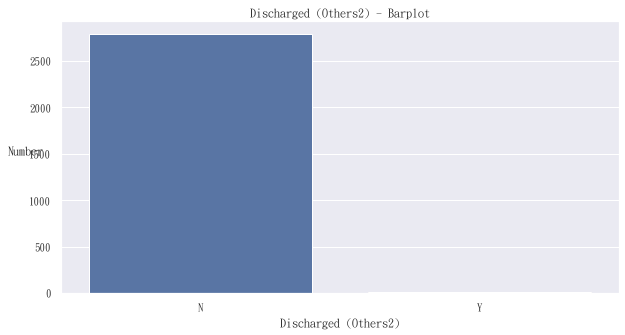

In [187]:
omliot2_fl = tsr_12.loc[:,"omliot2_fl"]
omliot2_fl[(omliot2_fl != "N") & (omliot2_fl != "Y")] = np.nan
omliot2_fl[om_fl == "Y"] = "N"
omliot2_fl = omliot2_fl.fillna(omliot2_fl.mode()[0])
#print(omliot2_fl)
print(omliot2_fl.value_counts() / len(omliot2_fl))
#print(omliot2_fl.describe())

sns.countplot(omliot2_fl)
plt.title("Discharged (Others2) - Barplot")
plt.xlabel('Discharged (Others2)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (有相關原因未使用抗血栓藥物)

N    0.997497
Y    0.002503
Name: omad_fl, dtype: float64


<ipython-input-188-c5baad7a997e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omad_fl[(omad_fl != "N") & (omad_fl != "Y")] = np.nan
<ipython-input-188-c5baad7a997e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omad_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


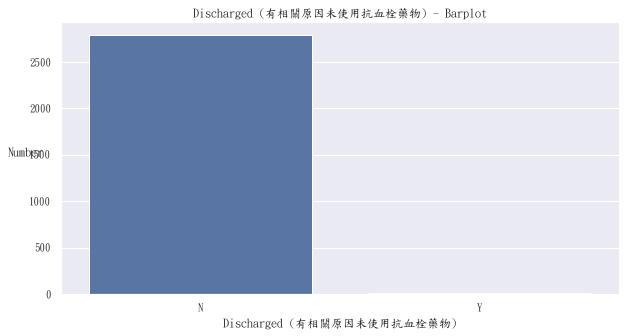

In [188]:
omad_fl = tsr_12.loc[:,"omad_fl"]
omad_fl[(omad_fl != "N") & (omad_fl != "Y")] = np.nan
omad_fl[om_fl == "Y"] = "N"
omad_fl = omad_fl.fillna(omad_fl.mode()[0])
#print(omad_fl)
print(omad_fl.value_counts() / len(omad_fl))
#print(omad_fl.describe())

sns.countplot(omad_fl)
plt.title("Discharged (有相關原因未使用抗血栓藥物) - Barplot")
plt.xlabel('Discharged (有相關原因未使用抗血栓藥物)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (有相關原因未使用抗血栓藥物 Options)

5.0    0.000715
1.0    0.000715
2.0    0.000358
3.0    0.000358
4.0    0.000358
Name: omad_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


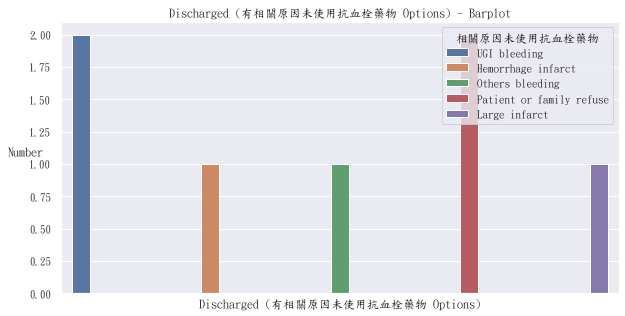

In [189]:
omad_id = tsr_12.loc[:,"omad_id"]
omad_id = pd.to_numeric(omad_id, errors = "coerce")
omad_id[(omad_id != 1) & (omad_id != 2) & (omad_id != 3) & (omad_id != 4) & (omad_id != 5) & (omad_id != 6)] = np.nan
omad_id = omad_id.fillna(omad_id.mode()[0])
omad_id[omad_fl == "N"] = np.nan
#print(omad_id)
print(omad_id.value_counts() / len(omad_id))
#print(omad_id.describe())

omad_id[omad_id == 1] = "UGI bleeding"
omad_id[omad_id == 2] = "Hemorrhage infarct"
omad_id[omad_id == 3] = "Others bleeding"
omad_id[omad_id == 4] = "Large infarct"
omad_id[omad_id == 5] = "Patient or family refuse"
omad_id[omad_id == 6] = "Critical AAD or Expired"

sns.countplot(omad_id, hue = omad_id)
plt.title("Discharged (有相關原因未使用抗血栓藥物 Options) - Barplot")
plt.xlabel('Discharged (有相關原因未使用抗血栓藥物 Options)')
plt.ylabel('Number', rotation=0)
plt.xticks([])
plt.legend(loc = 1, title="相關原因未使用抗血栓藥物")
plt.show()

omad_id[omad_id == "UGI bleeding"] = 1
omad_id[omad_id == "Hemorrhage infarct"] = 2
omad_id[omad_id == "Others bleeding"] = 3
omad_id[omad_id == "Large infarct"] = 4
omad_id[omad_id == "Patient or family refuse"] = 5
omad_id[omad_id == "Critical AAD or Expired"] = 6
omad_id = omad_id.fillna(999)

# Before Admitted (None)

N    0.627458
Y    0.372542
Name: am_fl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


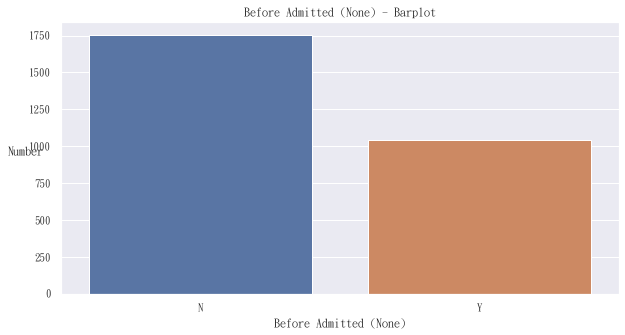

In [190]:
am_fl = tsr_12.loc[:,"am_fl"]
am_fl = am_fl.fillna(am_fl.mode()[0])
#print(am_fl)
print(am_fl.value_counts() / len(am_fl))
#print(am_fl.describe())

sns.countplot(am_fl)
plt.title("Before Admitted (None) - Barplot")
plt.xlabel('Before Admitted (None)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Aspirin)

N    0.823025
Y    0.176975
Name: amas_fl, dtype: float64


<ipython-input-191-112d16de51af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amas_fl[(amas_fl != "Y") & (amas_fl != "N")] = np.nan
<ipython-input-191-112d16de51af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amas_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


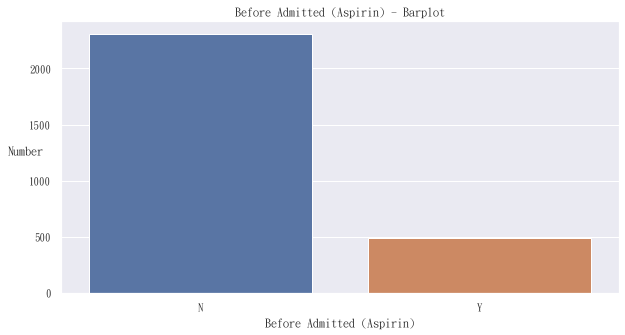

In [191]:
amas_fl = tsr_12.loc[:,"amas_fl"]
amas_fl[(amas_fl != "Y") & (amas_fl != "N")] = np.nan
amas_fl[am_fl == "Y"] = "N"
amas_fl = amas_fl.fillna(amas_fl.mode()[0])
#print(amas_fl)
print(amas_fl.value_counts() / len(amas_fl))
#print(amas_fl.describe())

sns.countplot(amas_fl)
plt.title("Before Admitted (Aspirin) - Barplot")
plt.xlabel('Before Admitted (Aspirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Aggrenox)

<ipython-input-192-6b5446829539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amag_fl[amag_fl == '0'] = "N"
<ipython-input-192-6b5446829539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amag_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.996782
Y    0.003218
Name: amag_fl, dtype: float64


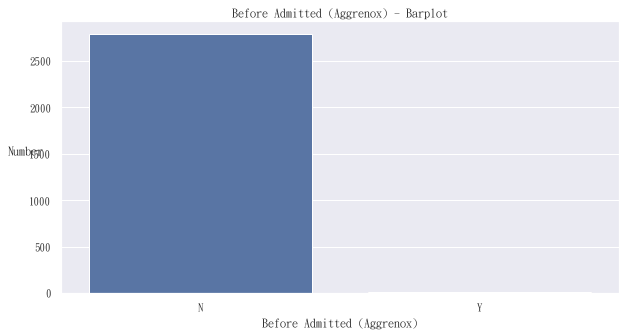

In [192]:
amag_fl = tsr_12.loc[:,"amag_fl"]
amag_fl[amag_fl == '0'] = "N"
amag_fl[am_fl == "Y"] = "N"
amag_fl = amag_fl.fillna(amag_fl.mode()[0])
#print(amag_fl)
print(amag_fl.value_counts() / len(amag_fl))
#print(amag_fl.describe())

sns.countplot(amag_fl)
plt.title("Before Admitted (Aggrenox) - Barplot")
plt.xlabel('Before Admitted (Aggrenox)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Ticlopidine)

N    0.996425
Y    0.003575
Name: amti_fl, dtype: float64


<ipython-input-193-dd123dde3bbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amti_fl[am_fl == "Y"] = "N"
<ipython-input-193-dd123dde3bbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amti_fl[(amti_fl != "Y") & (amti_fl != "N")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


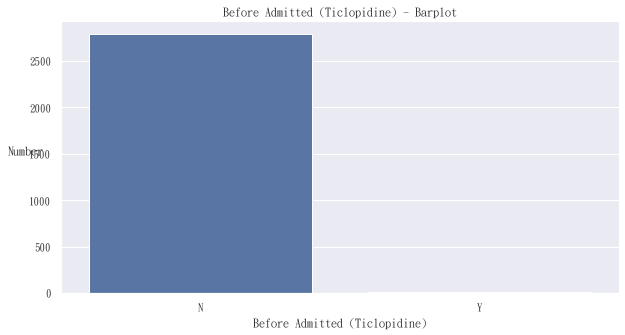

In [193]:
amti_fl = tsr_12.loc[:,"amti_fl"]
amti_fl[am_fl == "Y"] = "N"
amti_fl[(amti_fl != "Y") & (amti_fl != "N")] = np.nan
amti_fl = amti_fl.fillna(amti_fl.mode()[0])
#print(amti_fl)
print(amti_fl.value_counts() / len(amti_fl))
#print(amti_fl.describe())

sns.countplot(amti_fl)
plt.title("Before Admitted (Ticlopidine) - Barplot")
plt.xlabel('Before Admitted (Ticlopidine)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Clopidogrel)

N    0.964247
Y    0.035753
Name: amcl_fl, dtype: float64


<ipython-input-194-f8dc26642b60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amcl_fl[amcl_fl == "0"] = "N"
<ipython-input-194-f8dc26642b60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amcl_fl[am_fl == "Y"] = "N"
<ipython-input-194-f8dc26642b60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amcl_fl[(amcl_fl != "Y") & (amcl_fl != "N")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

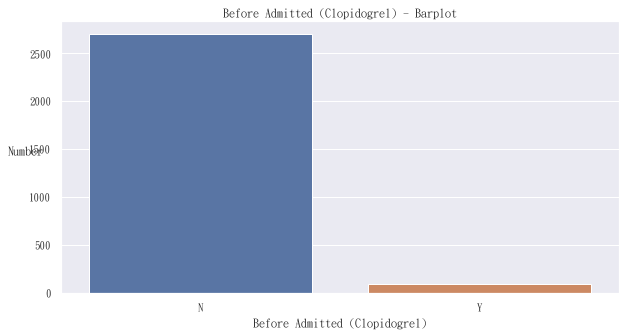

In [194]:
amcl_fl = tsr_12.loc[:,"amcl_fl"]
amcl_fl[amcl_fl == "0"] = "N"
amcl_fl[am_fl == "Y"] = "N"
amcl_fl[(amcl_fl != "Y") & (amcl_fl != "N")] = np.nan
amcl_fl = amcl_fl.fillna(amcl_fl.mode()[0])
#print(amcl_fl)
print(amcl_fl.value_counts() / len(amcl_fl))
#print(amcl_fl.describe())

sns.countplot(amcl_fl)
plt.title("Before Admitted (Clopidogrel) - Barplot")
plt.xlabel('Before Admitted (Clopidogrel)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Pletaal)

N    0.992134
Y    0.007866
Name: ampl_fl, dtype: float64


<ipython-input-195-0efb387f641b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ampl_fl[(ampl_fl != "Y") & (ampl_fl != "N")] = np.nan
<ipython-input-195-0efb387f641b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ampl_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


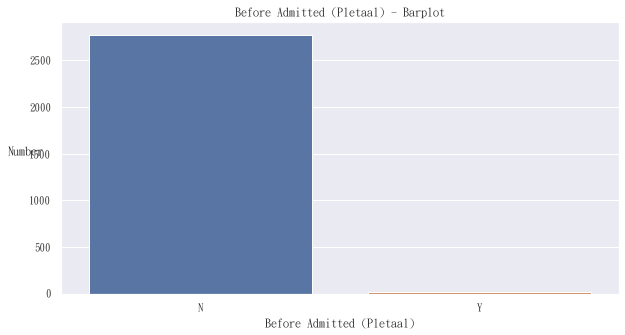

In [195]:
ampl_fl = tsr_12.loc[:,"ampl_fl"]
ampl_fl[(ampl_fl != "Y") & (ampl_fl != "N")] = np.nan
ampl_fl[am_fl == "Y"] = "N"
ampl_fl = ampl_fl.fillna(ampl_fl.mode()[0])
#print(ampl_fl)
print(ampl_fl.value_counts() / len(ampl_fl))
#print(ampl_fl.describe())

sns.countplot(ampl_fl)
plt.title("Before Admitted (Pletaal) - Barplot")
plt.xlabel('Before Admitted (Pletaal)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Anti H/T Drug)

N    0.516625
Y    0.483375
Name: amanh_fl, dtype: float64


<ipython-input-196-a5548b74adb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amanh_fl[(amanh_fl != "Y") & (amanh_fl != "N")] = np.nan
<ipython-input-196-a5548b74adb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amanh_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


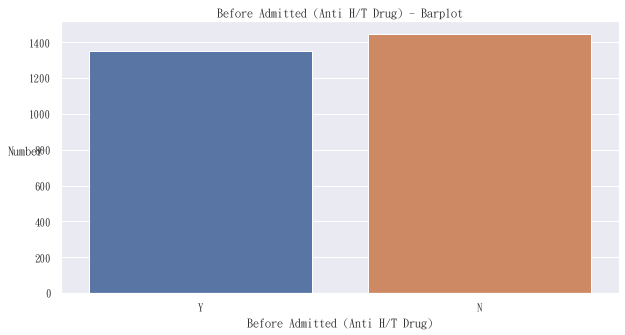

In [196]:
amanh_fl = tsr_12.loc[:,"amanh_fl"]
amanh_fl[(amanh_fl != "Y") & (amanh_fl != "N")] = np.nan
amanh_fl[am_fl == "Y"] = "N"
amanh_fl = amanh_fl.fillna(amanh_fl.mode()[0])
#print(amanh_fl)
print(amanh_fl.value_counts() / len(amanh_fl))
#print(amanh_fl.describe())

sns.countplot(amanh_fl)
plt.title("Before Admitted (Anti H/T Drug) - Barplot")
plt.xlabel('Before Admitted (Anti H/T Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Wafirin)

N    0.96818
Y    0.03182
Name: amwa_fl, dtype: float64


<ipython-input-197-a1c1a60dea8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amwa_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


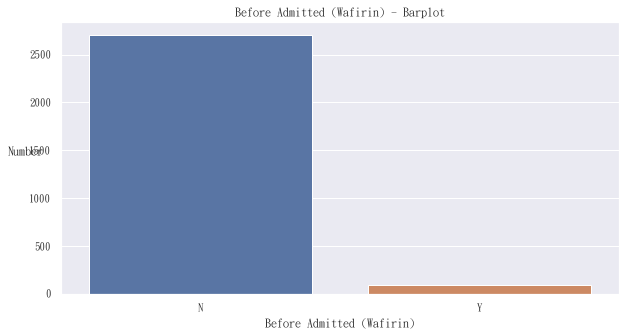

In [197]:
amwa_fl = tsr_12.loc[:,"amwa_fl"]
amwa_fl[am_fl == "Y"] = "N"
amwa_fl = amwa_fl.fillna(amwa_fl.mode()[0])
#print(amwa_fl)
print(amwa_fl.value_counts() / len(amwa_fl))
#print(amwa_fl.describe())

sns.countplot(amwa_fl)
plt.title("Before Admitted (Wafirin) - Barplot")
plt.xlabel('Before Admitted (Wafirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Anti DM Drug)

N    0.759743
Y    0.240257
Name: amand_fl, dtype: float64


<ipython-input-198-889df404f5a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amand_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


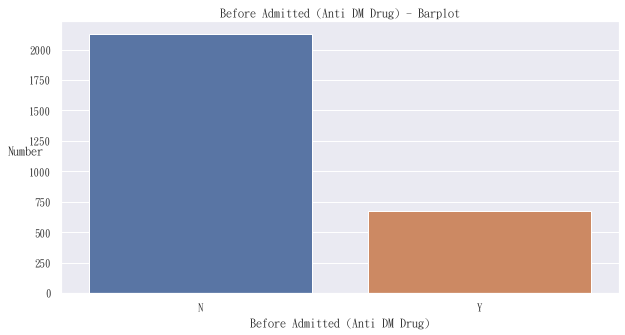

In [198]:
amand_fl = tsr_12.loc[:,"amand_fl"]
amand_fl[am_fl == "Y"] = "N"
amand_fl = amand_fl.fillna(amand_fl.mode()[0])
#print(amand_fl)
print(amand_fl.value_counts() / len(amand_fl))
#print(amand_fl.describe())

sns.countplot(amand_fl)
plt.title("Before Admitted (Anti DM Drug) - Barplot")
plt.xlabel('Before Admitted (Anti DM Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Lipid Lowering Drug)

N    0.918842
Y    0.081158
Name: amli_fl, dtype: float64


<ipython-input-199-bf2d95c5a4b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amli_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


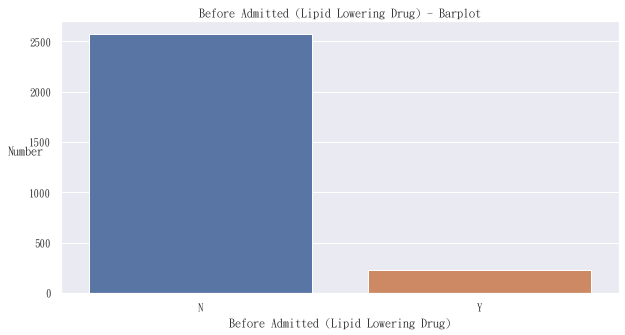

In [199]:
amli_fl = tsr_12.loc[:,"amli_fl"]
amli_fl[am_fl == "Y"] = "N"
amli_fl = amli_fl.fillna(amli_fl.mode()[0])
#print(amli_fl)
print(amli_fl.value_counts() / len(amli_fl))
#print(amli_fl.describe())

sns.countplot(amli_fl)
plt.title("Before Admitted (Lipid Lowering Drug) - Barplot")
plt.xlabel('Before Admitted (Lipid Lowering Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Others)

N    0.983196
Y    0.015731
0    0.001073
Name: amliot_fl, dtype: float64


<ipython-input-200-1908800a06d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amliot_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


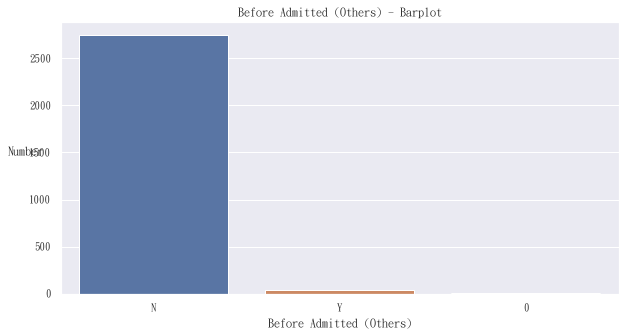

In [200]:
amliot_fl = tsr_12.loc[:,"amliot_fl"]
amliot_fl[am_fl == "Y"] = "N"
amliot_fl = amliot_fl.fillna(amliot_fl.mode()[0])
#print(amliot_fl)
print(amliot_fl.value_counts() / len(amliot_fl))
#print(amliot_fl.describe())

sns.countplot(amliot_fl)
plt.title("Before Admitted (Others) - Barplot")
plt.xlabel('Before Admitted (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Others2)

N    0.999642
Y    0.000358
Name: amliot2_fl, dtype: float64


<ipython-input-201-8db619f1857a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amliot2_fl[amliot2_fl == str(0)] = "N"
<ipython-input-201-8db619f1857a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amliot2_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


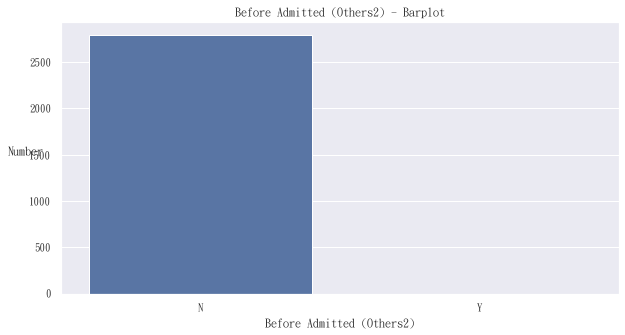

In [201]:
amliot2_fl = tsr_12.loc[:,"amliot2_fl"]
amliot2_fl[amliot2_fl == str(0)] = "N"
amliot2_fl[am_fl == "Y"] = "N"
amliot2_fl = amliot2_fl.fillna(amliot2_fl.mode()[0])
#print(amliot2_fl)
print(amliot2_fl.value_counts() / len(amliot2_fl))
#print(amliot2_fl.describe())

sns.countplot(amliot2_fl)
plt.title("Before Admitted (Others2) - Barplot")
plt.xlabel('Before Admitted (Others2)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (None)

N    0.999642
Y    0.000358
Name: com_id, dtype: float64


<ipython-input-202-cb3f77dc3884>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_id[com_id == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


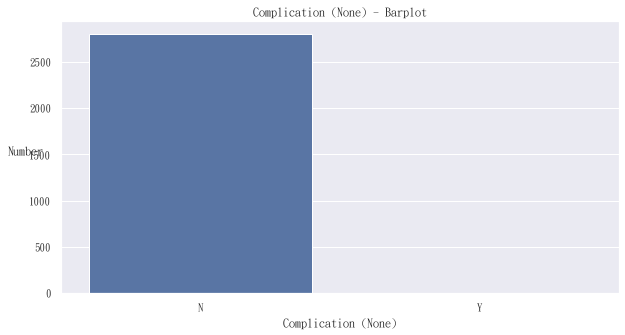

In [202]:
com_id = tsr_12.loc[:,"com_id"]
com_id[com_id == '0'] = "N"
com_id = com_id.fillna(com_id.mode()[0])
#print(com_id)
print(com_id.value_counts() / len(com_id))
#print(com_id.describe())

sns.countplot(com_id)
plt.title("Complication (None) - Barplot")
plt.xlabel('Complication (None)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Pneumonia)

N    0.984984
Y    0.015016
Name: compn_fl, dtype: float64


<ipython-input-203-72a85af6c928>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compn_fl[compn_fl == str(0)] = "N"
<ipython-input-203-72a85af6c928>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compn_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


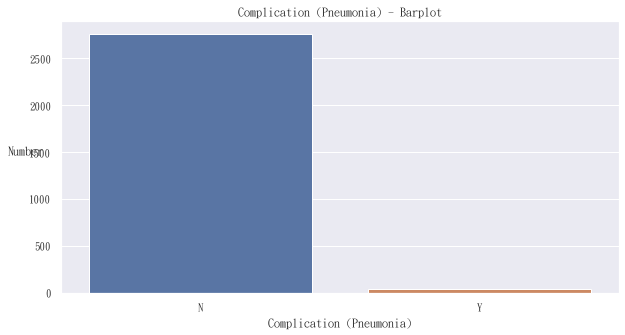

In [203]:
compn_fl = tsr_12.loc[:,"compn_fl"]
compn_fl[compn_fl == str(0)] = "N"
compn_fl[com_id == "Y"] = "N"
compn_fl = compn_fl.fillna(compn_fl.mode()[0])
#print(compn_fl)
print(compn_fl.value_counts() / len(compn_fl))
#print(compn_fl.describe())

sns.countplot(compn_fl)
plt.title("Complication (Pneumonia) - Barplot")
plt.xlabel('Complication (Pneumonia)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Urinary Tract Infection)

N    0.985699
Y    0.014301
Name: comut_fl, dtype: float64


<ipython-input-204-80afd6d181a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comut_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


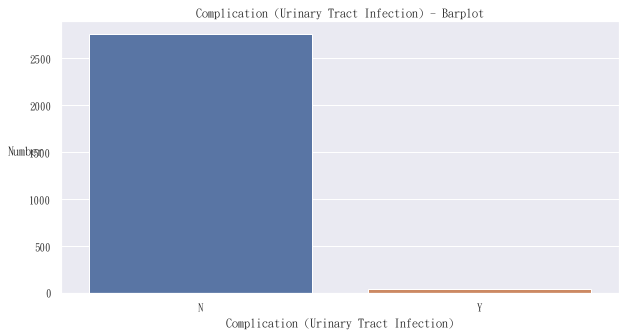

In [204]:
comut_fl = tsr_12.loc[:,"comut_fl"]
comut_fl[com_id == "Y"] = "N"
comut_fl = comut_fl.fillna(comut_fl.mode()[0])
#print(comut_fl)
print(comut_fl.value_counts() / len(comut_fl))
#print(comut_fl.describe())

sns.countplot(comut_fl)
plt.title("Complication (Urinary Tract Infection) - Barplot")
plt.xlabel('Complication (Urinary Tract Infection)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (UGI Bleeding)

N    0.990704
Y    0.009296
Name: comug_fl, dtype: float64


<ipython-input-205-8384c02aa107>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comug_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


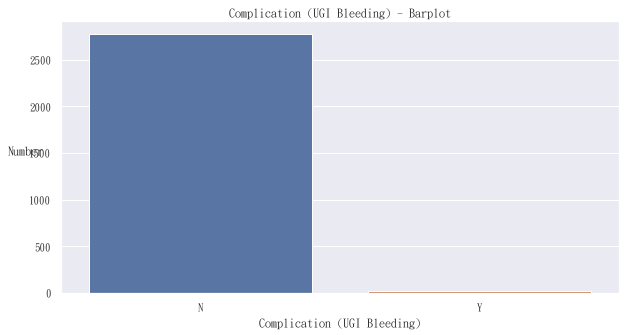

In [205]:
comug_fl = tsr_12.loc[:,"comug_fl"]
comug_fl[com_id == "Y"] = "N"
comug_fl = comug_fl.fillna(comug_fl.mode()[0])
#print(comug_fl)
print(comug_fl.value_counts() / len(comug_fl))
#print(comug_fl.describe())

sns.countplot(comug_fl)
plt.title("Complication (UGI Bleeding) - Barplot")
plt.xlabel('Complication (UGI Bleeding)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Pressure Sore)

N    0.99571
Y    0.00429
Name: compr_fl, dtype: float64


<ipython-input-206-9f7527827c20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compr_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


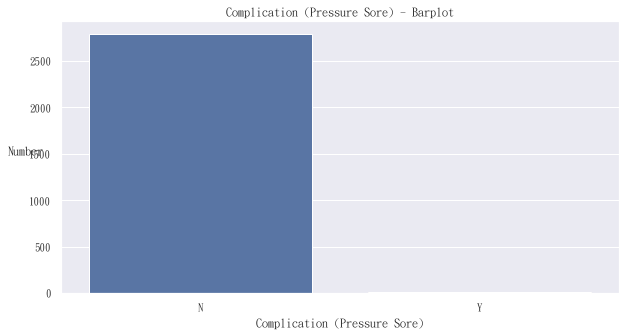

In [206]:
compr_fl = tsr_12.loc[:,"compr_fl"]
compr_fl[com_id == "Y"] = "N"
compr_fl = compr_fl.fillna(compr_fl.mode()[0])
#print(compr_fl)
print(compr_fl.value_counts() / len(compr_fl))
#print(compr_fl.describe())

sns.countplot(compr_fl)
plt.title("Complication (Pressure Sore) - Barplot")
plt.xlabel('Complication (Pressure Sore)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Pulmonary Edema)

N    0.999642
Y    0.000358
Name: compu_fl, dtype: float64


<ipython-input-207-3b4a680f0e93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compu_fl[compu_fl == str(0)] = "N"
<ipython-input-207-3b4a680f0e93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compu_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


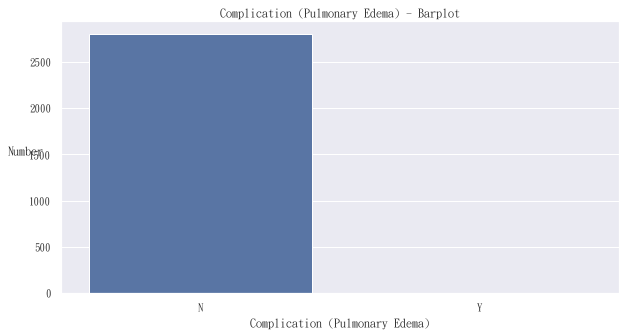

In [207]:
compu_fl = tsr_12.loc[:,"compu_fl"]
compu_fl[compu_fl == str(0)] = "N"
compu_fl[com_id == "Y"] = "N"
compu_fl = compu_fl.fillna(compu_fl.mode()[0])
#print(compu_fl)
print(compu_fl.value_counts() / len(compu_fl))
#print(compu_fl.describe())

sns.countplot(compu_fl)
plt.title("Complication (Pulmonary Edema) - Barplot")
plt.xlabel('Complication (Pulmonary Edema)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Acute Coronary Syndrome)

N    0.998927
Y    0.001073
Name: comac_fl, dtype: float64


<ipython-input-208-981c9dc5804f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comac_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


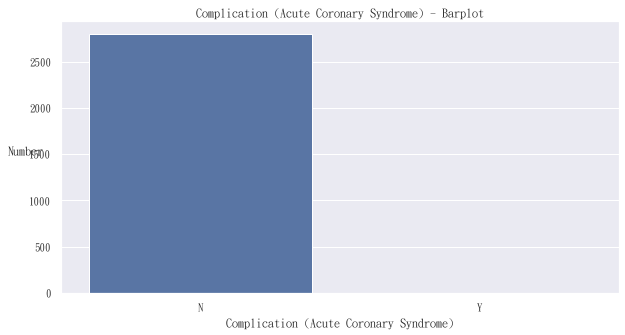

In [208]:
comac_fl = tsr_12.loc[:,"comac_fl"]
comac_fl[com_id == "Y"] = "N"
comac_fl = comac_fl.fillna(comac_fl.mode()[0])
#print(comac_fl)
print(comac_fl.value_counts() / len(comac_fl))
#print(comac_fl.describe())

sns.countplot(comac_fl)
plt.title("Complication (Acute Coronary Syndrome) - Barplot")
plt.xlabel('Complication (Acute Coronary Syndrome)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Seizure)

<ipython-input-209-2e33fd744c28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comse_fl[(comse_fl != "Y") & (comse_fl != "N")] = np.nan
<ipython-input-209-2e33fd744c28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comse_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.99714
Y    0.00286
Name: comse_fl, dtype: float64


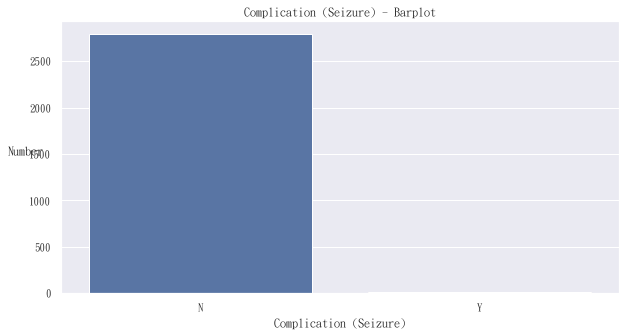

In [209]:
comse_fl = tsr_12.loc[:,"comse_fl"]
comse_fl[(comse_fl != "Y") & (comse_fl != "N")] = np.nan
comse_fl[com_id == "Y"] = "N"
comse_fl = comse_fl.fillna(comse_fl.mode()[0])
#print(comse_fl)
print(comse_fl.value_counts() / len(comse_fl))
#print(comse_fl.describe())

sns.countplot(comse_fl)
plt.title("Complication (Seizure) - Barplot")
plt.xlabel('Complication (Seizure)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Deep Vein Thrombosis)

N    0.998212
Y    0.001788
Name: comde_fl, dtype: float64


<ipython-input-210-6850184c3cfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comde_fl[(comde_fl != "N") & (comde_fl != "Y")] = np.nan
<ipython-input-210-6850184c3cfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comde_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


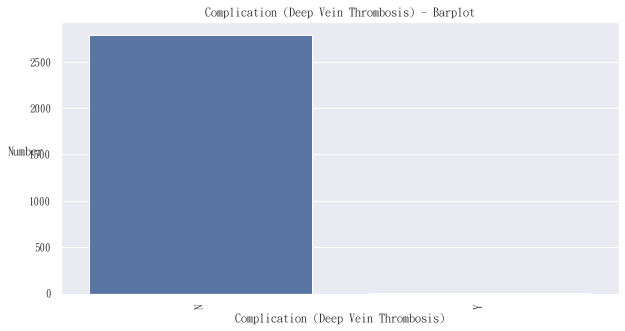

In [210]:
comde_fl = tsr_12.loc[:,"comde_fl"]
comde_fl[(comde_fl != "N") & (comde_fl != "Y")] = np.nan
comde_fl[com_id == "Y"] = "N"
comde_fl = comde_fl.fillna(comde_fl.mode()[0])
#print(comde_fl)
print(comde_fl.value_counts() / len(comde_fl))
#print(comde_fl.describe())

sns.countplot(comde_fl)
plt.title("Complication (Deep Vein Thrombosis) - Barplot")
plt.xlabel('Complication (Deep Vein Thrombosis)')
plt.ylabel('Number', rotation=0)
plt.xticks(rotation = 90)
plt.show()

# Complication (Others)

N    0.972471
Y    0.027529
Name: como_fl, dtype: float64


<ipython-input-211-85504a70d187>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  como_fl[(como_fl != "N") & (como_fl != "Y")] = np.nan
<ipython-input-211-85504a70d187>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  como_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


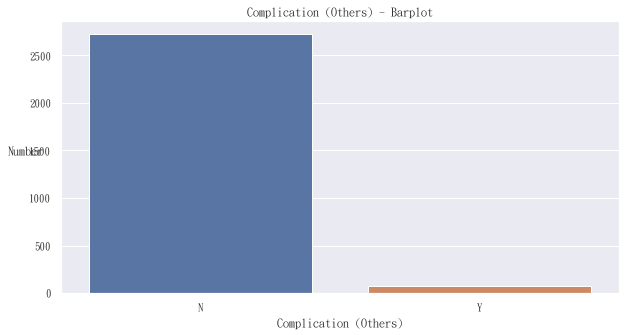

In [211]:
como_fl = tsr_12.loc[:,"como_fl"]
como_fl[(como_fl != "N") & (como_fl != "Y")] = np.nan
como_fl[com_id == "Y"] = "N"
como_fl = como_fl.fillna(como_fl.mode()[0])
#print(como_fl)
print(como_fl.value_counts() / len(como_fl))
#print(como_fl.describe())

sns.countplot(como_fl)
plt.title("Complication (Others) - Barplot")
plt.xlabel('Complication (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (None)

N    0.998212
Y    0.001788
Name: det_id, dtype: float64


<ipython-input-212-bc800e0523cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det_id[det_id == '0'] = "N"
<ipython-input-212-bc800e0523cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det_id[(det_id != "N") & (det_id != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


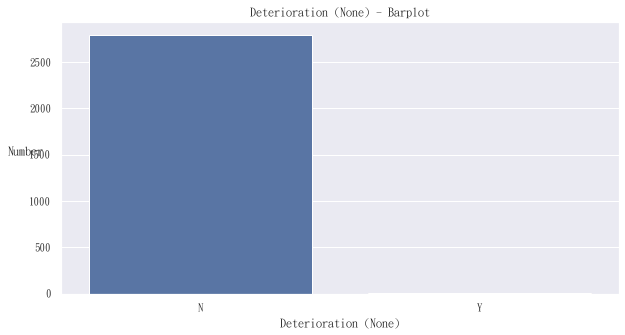

In [212]:
det_id = tsr_12.loc[:,"det_id"]
det_id[det_id == '0'] = "N"
det_id[(det_id != "N") & (det_id != "Y")] = np.nan
det_id = det_id.fillna(det_id.mode()[0])
#print(det_id)
print(det_id.value_counts() / len(det_id))
#print(det_id.describe())

sns.countplot(det_id)
plt.title("Deterioration (None) - Barplot")
plt.xlabel('Deterioration (None)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Stroke-in-evolution - NIHSS≧2)

N    0.954952
Y    0.045048
Name: detst_fl, dtype: float64


<ipython-input-213-e8f18ed7b030>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detst_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


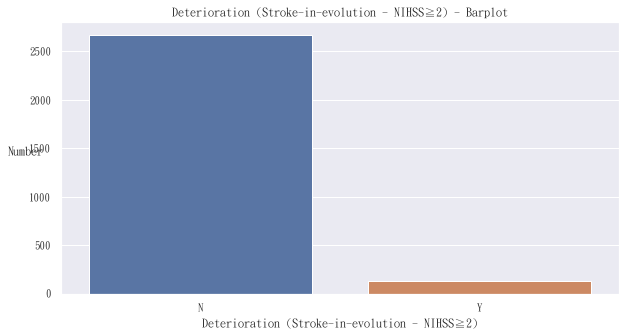

In [213]:
detst_fl = tsr_12.loc[:,"detst_fl"]
detst_fl[det_id == "Y"] = "N"
detst_fl = detst_fl.fillna(detst_fl.mode()[0])
#print(detst_fl)
print(detst_fl.value_counts() / len(detst_fl))
#print(detst_fl.describe())

sns.countplot(detst_fl)
plt.title("Deterioration (Stroke-in-evolution - NIHSS≧2) - Barplot")
plt.xlabel('Deterioration (Stroke-in-evolution - NIHSS≧2)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Herniation)

N    0.997497
Y    0.002503
Name: dethe_fl, dtype: float64


<ipython-input-214-cb582fa56d89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethe_fl[dethe_fl == str(0)] = "N"
<ipython-input-214-cb582fa56d89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethe_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


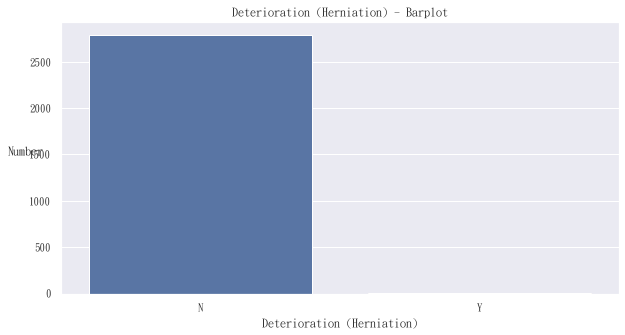

In [214]:
dethe_fl = tsr_12.loc[:,"dethe_fl"]
dethe_fl[dethe_fl == str(0)] = "N"
dethe_fl[det_id == "Y"] = "N"
dethe_fl = dethe_fl.fillna(dethe_fl.mode()[0])
#print(dethe_fl)
print(dethe_fl.value_counts() / len(dethe_fl))
#print(dethe_fl.describe())

sns.countplot(dethe_fl)
plt.title("Deterioration (Herniation) - Barplot")
plt.xlabel('Deterioration (Herniation)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Hemorrhagic Infarct)

<ipython-input-215-1d7204729af2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detho_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.992492
Y    0.007508
Name: detho_fl, dtype: float64


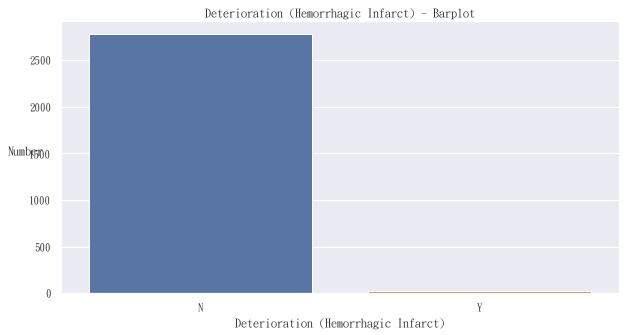

In [215]:
detho_fl = tsr_12.loc[:,"detho_fl"]
detho_fl[det_id == "Y"] = "N"
detho_fl = detho_fl.fillna(detho_fl.mode()[0])
#print(detho_fl)
print(detho_fl.value_counts() / len(detho_fl))
#print(detho_fl.describe())

sns.countplot(detho_fl)
plt.title("Deterioration (Hemorrhagic Infarct) - Barplot")
plt.xlabel('Deterioration (Hemorrhagic Infarct)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Hemorrhagic Infarct 36hrs)

N    1.0
Name: dethoh_fl, dtype: float64


<ipython-input-216-a0715dbbbfff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethoh_fl[(dethoh_fl != "N") & (dethoh_fl != "Y")] = np.nan
<ipython-input-216-a0715dbbbfff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethoh_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


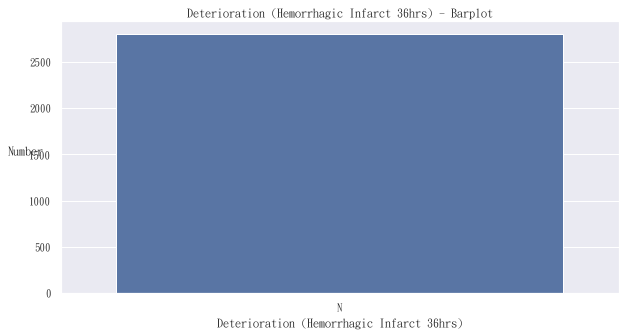

In [216]:
dethoh_fl = tsr_12.loc[:,"dethoh_fl"]
dethoh_fl[(dethoh_fl != "N") & (dethoh_fl != "Y")] = np.nan
dethoh_fl[det_id == "Y"] = "N"
dethoh_fl = dethoh_fl.fillna(dethoh_fl.mode()[0])
#print(dethoh_fl)
print(dethoh_fl.value_counts() / len(dethoh_fl))
#print(dethoh_fl.describe())

sns.countplot(dethoh_fl)
plt.title("Deterioration (Hemorrhagic Infarct 36hrs) - Barplot")
plt.xlabel('Deterioration (Hemorrhagic Infarct 36hrs)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Hematoma Enlargement - ICH)

N    0.989274
Y    0.010726
Name: detha_fl, dtype: float64


<ipython-input-217-fe1e126d5b13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detha_fl[(detha_fl != "N") & (detha_fl != "Y")] = np.nan
<ipython-input-217-fe1e126d5b13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detha_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


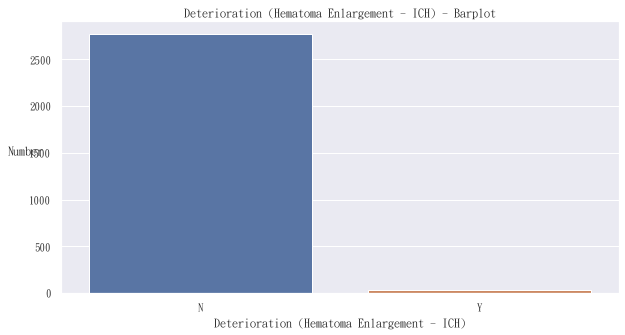

In [217]:
detha_fl = tsr_12.loc[:,"detha_fl"]
detha_fl[(detha_fl != "N") & (detha_fl != "Y")] = np.nan
detha_fl[det_id == "Y"] = "N"
detha_fl = detha_fl.fillna(detha_fl.mode()[0])
#print(detha_fl)
print(detha_fl.value_counts() / len(detha_fl))
#print(detha_fl.describe())

sns.countplot(detha_fl)
plt.title("Deterioration (Hematoma Enlargement - ICH) - Barplot")
plt.xlabel('Deterioration (Hematoma Enlargement - ICH)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Vasospasm - SAH)

N    0.996067
Y    0.003933
Name: detva_fl, dtype: float64


<ipython-input-218-4058a3b51806>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detva_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


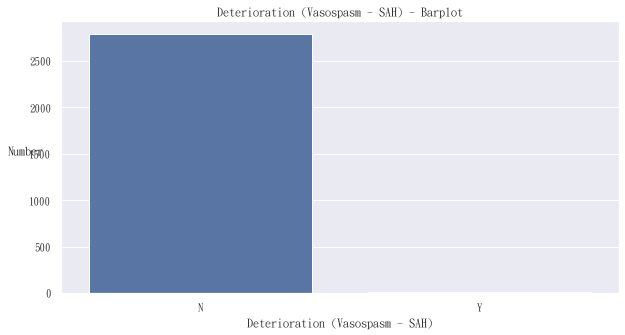

In [218]:
detva_fl = tsr_12.loc[:,"detva_fl"]
detva_fl[det_id == "Y"] = "N"
detva_fl = detva_fl.fillna(detva_fl.mode()[0])
#print(detva_fl)
print(detva_fl.value_counts() / len(detva_fl))
#print(detva_fl.describe())

sns.countplot(detva_fl)
plt.title("Deterioration (Vasospasm - SAH) - Barplot")
plt.xlabel('Deterioration (Vasospasm - SAH)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Re-bleeding - SAH)

N    0.999285
Y    0.000715
Name: detre_fl, dtype: float64


<ipython-input-219-81d4e91b3aa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detre_fl[(detre_fl != "N") & (detre_fl != "Y")] = np.nan
<ipython-input-219-81d4e91b3aa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detre_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


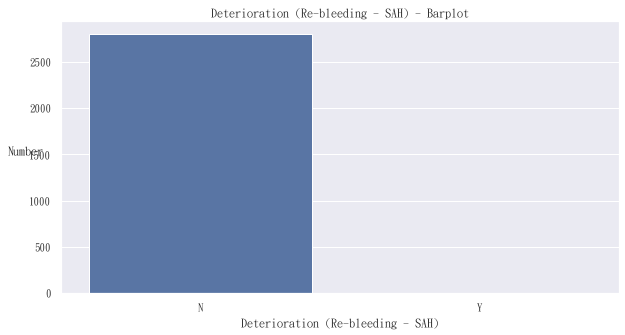

In [219]:
detre_fl = tsr_12.loc[:,"detre_fl"]
detre_fl[(detre_fl != "N") & (detre_fl != "Y")] = np.nan
detre_fl[det_id == "Y"] = "N"
detre_fl = detre_fl.fillna(detre_fl.mode()[0])
#print(detre_fl)
print(detre_fl.value_counts() / len(detre_fl))
#print(detre_fl.describe())

sns.countplot(detre_fl)
plt.title("Deterioration (Re-bleeding - SAH) - Barplot")
plt.xlabel('Deterioration (Re-bleeding - SAH)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Medical Problems)

N    0.996782
Y    0.003218
Name: detme_fl, dtype: float64


<ipython-input-220-7ad3405fbaa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detme_fl[(detme_fl != "N") & (detme_fl != "Y")] = np.nan
<ipython-input-220-7ad3405fbaa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detme_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


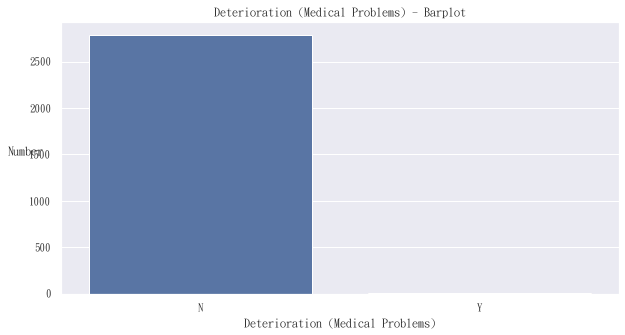

In [220]:
detme_fl = tsr_12.loc[:,"detme_fl"]
detme_fl[(detme_fl != "N") & (detme_fl != "Y")] = np.nan
detme_fl[det_id == "Y"] = "N"
detme_fl = detme_fl.fillna(detme_fl.mode()[0])
#print(detme_fl)
print(detme_fl.value_counts() / len(detme_fl))
#print(detme_fl.describe())

sns.countplot(detme_fl)
plt.title("Deterioration (Medical Problems) - Barplot")
plt.xlabel('Deterioration (Medical Problems)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Others)

N    0.996782
Y    0.003218
Name: deto_fl, dtype: float64


<ipython-input-221-e0ef247c3fab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deto_fl[deto_fl == str(0)] = "N"
<ipython-input-221-e0ef247c3fab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deto_fl[deto_fl == str(1)] = "Y"
<ipython-input-221-e0ef247c3fab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deto_fl[(deto_fl != "N") & (deto_fl != "Y")] = np.nan
<ipython-input-221-e0ef247c3fab>:5: SettingWithCopyWarning: 
A value is t

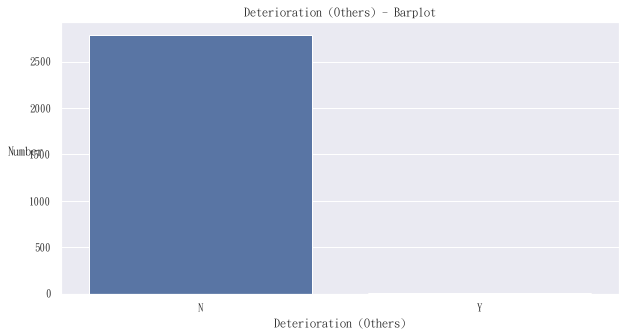

In [221]:
deto_fl = tsr_12.loc[:,"deto_fl"]
deto_fl[deto_fl == str(0)] = "N"
deto_fl[deto_fl == str(1)] = "Y"
deto_fl[(deto_fl != "N") & (deto_fl != "Y")] = np.nan
deto_fl[det_id == "Y"] = "N"
deto_fl = deto_fl.fillna(deto_fl.mode()[0])
#print(deto_fl)
print(deto_fl.value_counts() / len(deto_fl))
#print(deto_fl.describe())

sns.countplot(deto_fl)
plt.title("Deterioration (Others) - Barplot")
plt.xlabel('Deterioration (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# CT日期

<ipython-input-222-3361d787c7f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_time.ct_dt[(ct_time.ct_dt.dt.year < 2006) | (ct_time.ct_dt.dt.year > 2021)] = np.nan
<ipython-input-222-3361d787c7f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_time['cth_nm'][(ct_time['cth_nm'] < 0) | (ct_time['cth_nm'] > 24)] = np.nan
<ipython-input-222-3361d787c7f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_time['cth_nm'][ct_time[

count                    2797
unique                   2568
top       2008-04-26 13:30:00
freq                      189
first     2006-08-02 00:37:00
last      2019-07-16 09:27:00
dtype: object


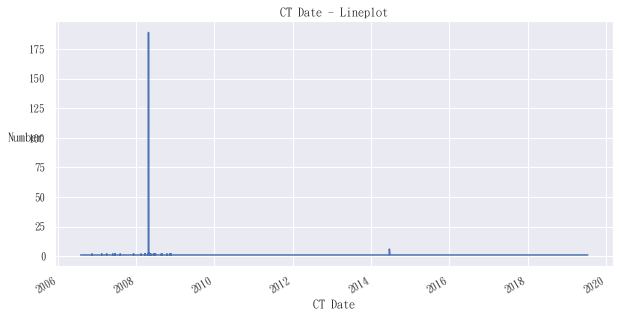

In [222]:
ct_time = tsr_12.loc[:,["ct_dt", "cth_nm", "ctm_nm"]]
ct_time.ct_dt = pd.to_datetime(ct_time.ct_dt, errors = "coerce", format = "%Y-%m-%d")
ct_time.ct_dt[(ct_time.ct_dt.dt.year < 2006) | (ct_time.ct_dt.dt.year > 2021)] = np.nan

ct_time['cth_nm'] = pd.to_numeric(ct_time['cth_nm'], errors='coerce')
ct_time['cth_nm'][(ct_time['cth_nm'] < 0) | (ct_time['cth_nm'] > 24)] = np.nan
ct_time['cth_nm'][ct_time['cth_nm'] == 24] = 0
ct_time['ctm_nm'] = pd.to_numeric(ct_time['ctm_nm'], errors='coerce')
ct_time['ctm_nm'][(ct_time['ctm_nm'] < 0) | (ct_time['ctm_nm'] > 60)] = np.nan
ct_time['ctm_nm'][ct_time['ctm_nm'] == 60] = 0

ct_time['ct_dt'] = ct_time['ct_dt'].fillna(ct_time['ct_dt'].mode()[0])
ct_time['cth_nm'] = ct_time['cth_nm'].fillna(ct_time['cth_nm'].mean())
ct_time['ctm_nm'] = ct_time['ctm_nm'].fillna(ct_time['ctm_nm'].mean())

ct = ct_time['ct_dt'].astype(str)+' '+ct_time['cth_nm'].astype(int).map(str)+':'+ct_time['ctm_nm'].astype(int).map(str)

ct_dt = pd.to_datetime(ct, format='%Y/%m/%d %H:%M', errors='coerce')
#print(ct_dt.value_counts() / len(ct_dt))
print(ct_dt.describe())

ct_dt.value_counts().plot()
plt.title("CT Date - Lineplot")
plt.xlabel('CT Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# CT時間 - 時

In [223]:
cth_nm = tsr_12.loc[:,"cth_nm"]
cth_nm = pd.to_numeric(cth_nm, errors = "coerce")
cth_nm[(cth_nm < 0) | (cth_nm > 24)] = np.nan
cth_nm[cth_nm == 24] = 0
cth_nm = cth_nm.fillna(cth_nm.mean())
#print(cth_nm)
#print(cth_nm.value_counts() / len(cth_nm))
print(cth_nm.describe())

count    2797.000000
mean       13.814830
std         5.390812
min         0.000000
25%        11.000000
50%        13.814830
75%        18.000000
max        23.000000
Name: cth_nm, dtype: float64


# CT時間 - 分

In [224]:
ctm_nm = tsr_12.loc[:,"ctm_nm"]
ctm_nm = pd.to_numeric(ctm_nm, errors = "coerce")
ctm_nm[(ctm_nm < 0) | (ctm_nm > 60)] = np.nan
ctm_nm[ctm_nm == 60] = 0
ctm_nm = ctm_nm.fillna(ctm_nm.mean())
#print(ctm_nm)
#print(ctm_nm.value_counts() / len(ctm_nm))
print(ctm_nm.describe())

count    2797.000000
mean       30.313319
std        15.873481
min         0.000000
25%        18.000000
50%        30.313319
75%        43.000000
max        59.000000
Name: ctm_nm, dtype: float64


# CT no Findings

N    0.790847
Y    0.209153
Name: ct_fl, dtype: float64


<ipython-input-225-183645480097>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_fl[(ct_fl != "N") & (ct_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


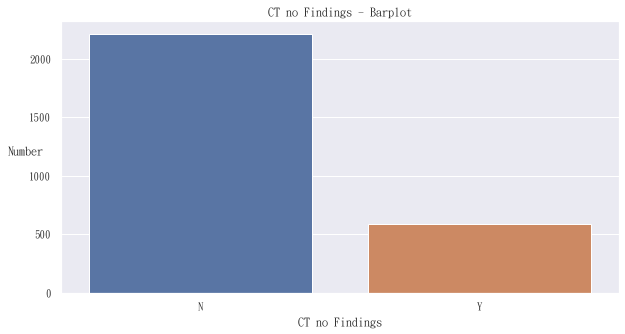

In [225]:
ct_fl = tsr_12.loc[:,"ct_fl"]
ct_fl[(ct_fl != "N") & (ct_fl != "Y")] = np.nan
ct_fl = ct_fl.fillna(ct_fl.mode()[0])
#print(ct_fl)
print(ct_fl.value_counts() / len(ct_fl))
#print(ct_fl.describe())

sns.countplot(ct_fl)
plt.title("CT no Findings - Barplot")
plt.xlabel('CT no Findings')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI日期

count                    2797
unique                   1376
top       2008-07-21 13:28:00
freq                     1400
first     2006-08-02 15:24:00
last      2019-05-24 20:07:00
dtype: object


<ipython-input-226-ff1f7f03ad0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_time.mri_dt[(mri_time.mri_dt.dt.year < 2006) | (mri_time.mri_dt.dt.year > 2021)] = np.nan
<ipython-input-226-ff1f7f03ad0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_time['mrih_nm'][(mri_time['mrih_nm'] < 0) | (mri_time['mrih_nm'] > 24)] = np.nan
<ipython-input-226-ff1f7f03ad0b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_time['mrih

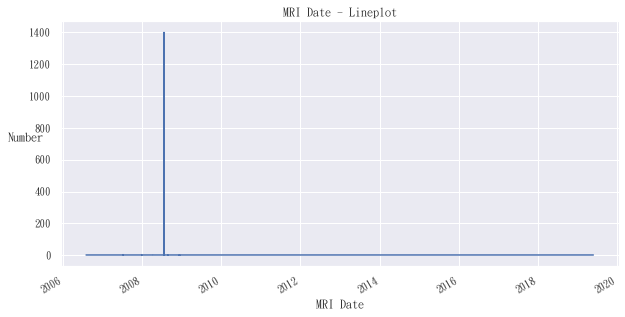

In [226]:
mri_time = tsr_12.loc[:,["mri_dt", "mrih_nm", "mrim_nm"]]
mri_time.mri_dt = pd.to_datetime(mri_time.mri_dt, errors = "coerce", format = "%Y-%m-%d")
mri_time.mri_dt[(mri_time.mri_dt.dt.year < 2006) | (mri_time.mri_dt.dt.year > 2021)] = np.nan

mri_time['mrih_nm'] = pd.to_numeric(mri_time['mrih_nm'], errors='coerce')
mri_time['mrih_nm'][(mri_time['mrih_nm'] < 0) | (mri_time['mrih_nm'] > 24)] = np.nan
mri_time['mrih_nm'][mri_time['mrih_nm'] == 24] = 0
mri_time['mrim_nm'] = pd.to_numeric(mri_time['mrim_nm'], errors='coerce')
mri_time['mrim_nm'][(mri_time['mrim_nm'] < 0) | (mri_time['mrim_nm'] > 60)] = np.nan
mri_time['mrim_nm'][mri_time['mrim_nm'] == 60] = 0

mri_time['mri_dt'] = mri_time['mri_dt'].fillna(mri_time['mri_dt'].mode()[0])
mri_time['mrih_nm'] = mri_time['mrih_nm'].fillna(mri_time['mrih_nm'].mean())
mri_time['mrim_nm'] = mri_time['mrim_nm'].fillna(mri_time['mrim_nm'].mean())

mri = mri_time['mri_dt'].astype(str)+' '+mri_time['mrih_nm'].astype(int).map(str)+':'+mri_time['mrim_nm'].astype(int).map(str)

mri_dt = pd.to_datetime(mri, format='%Y/%m/%d %H:%M', errors='coerce')
#print(mri_dt.value_counts() / len(mri_dt))
print(mri_dt.describe())

mri_dt.value_counts().plot()
plt.title("MRI Date - Lineplot")
plt.xlabel('MRI Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# MRI時間 - 時

In [227]:
mrih_nm = tsr_12.loc[:,"mrih_nm"]
mrih_nm = pd.to_numeric(mrih_nm, errors = "coerce")
mrih_nm[(mrih_nm < 0) | (mrih_nm > 24)] = np.nan
mrih_nm[mrih_nm == 24] = 0
mrih_nm = mrih_nm.fillna(mrih_nm.mean())
#print(mrih_nm)
#print(mrih_nm.value_counts() / len(mrih_nm))
print(mrih_nm.describe())

count    2797.000000
mean       13.064306
std         2.598371
min         0.000000
25%        13.000000
50%        13.064306
75%        13.064306
max        23.000000
Name: mrih_nm, dtype: float64


# MRI時間 - 分

In [228]:
mrim_nm = tsr_12.loc[:,"mrim_nm"]
mrim_nm = pd.to_numeric(mrim_nm, errors = "coerce")
mrim_nm[(mrim_nm < 0) | (mrim_nm > 60)] = np.nan
mrim_nm[mrim_nm == 60] = 0
mrim_nm = mrim_nm.fillna(mrim_nm.mean())
#print(mrim_nm)
#print(mrim_nm.value_counts() / len(mrim_nm))
print(mrim_nm.describe())

count    2797.000000
mean       28.222878
std        12.027250
min         0.000000
25%        28.000000
50%        28.222878
75%        28.222878
max        59.000000
Name: mrim_nm, dtype: float64


# MRI no Findings

N    0.99571
Y    0.00429
Name: mri_fl, dtype: float64


<ipython-input-229-48ffc274f564>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_fl[(mri_fl != "N") & (mri_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


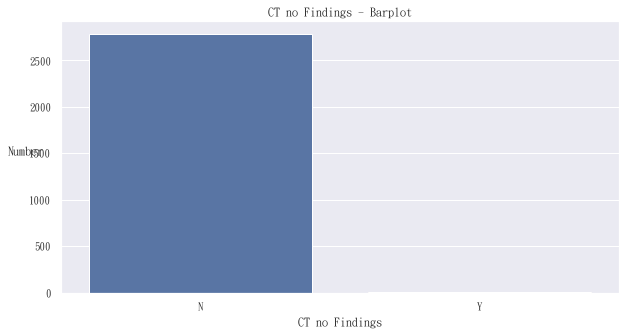

In [229]:
mri_fl = tsr_12.loc[:,"mri_fl"]
mri_fl[(mri_fl != "N") & (mri_fl != "Y")] = np.nan
mri_fl = mri_fl.fillna(mri_fl.mode()[0])
#print(mri_fl)
print(mri_fl.value_counts() / len(mri_fl))
#print(mri_fl.describe())

sns.countplot(mri_fl)
plt.title("CT no Findings - Barplot")
plt.xlabel('CT no Findings')
plt.ylabel('Number', rotation=0)
plt.show()

# Ultrasound/MRA Studies

# Carotid Duplex

0.0    0.870933
1.0    0.119414
2.0    0.009653
Name: cd_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


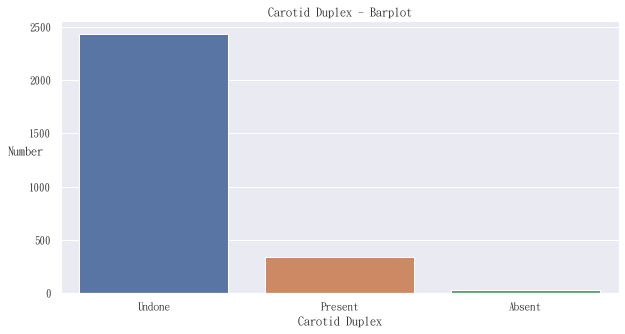

In [230]:
cd_id = tsr_12.loc[:,"cd_id"]
cd_id = pd.to_numeric(cd_id, errors = "coerce")
cd_id[(cd_id != 0) & (cd_id != 1) & (cd_id != 2)] = np.nan
cd_id = cd_id.fillna(cd_id.mode()[0])
#print(cd_id)
print(cd_id.value_counts() / len(cd_id))
#print(cd_id.describe())

cd_id_labels = ["Undone","Present","Absent"]
sns.countplot(cd_id).set_xticklabels(cd_id_labels)
plt.title("Carotid Duplex - Barplot")
plt.xlabel('Carotid Duplex')
plt.ylabel('Number', rotation=0)
plt.show()

# Carotid Atherosclerosis (R ICA)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.945299
2.0    0.029317
3.0    0.018591
4.0    0.006793
Name: cdr_id, dtype: float64


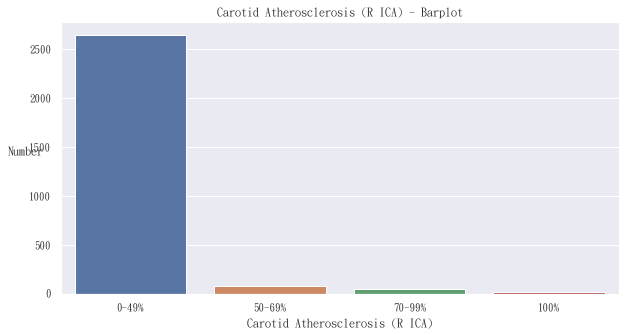

In [231]:
cdr_id = tsr_12.loc[:,"cdr_id"]
cdr_id = pd.to_numeric(cdr_id, errors = "coerce")
cdr_id[(cdr_id != 1) & (cdr_id != 2) & (cdr_id != 3) & (cdr_id != 4)] = np.nan
cdr_id = cdr_id.fillna(cdr_id.mode()[0])
#print(cdr_id)
print(cdr_id.value_counts() / len(cdr_id))
#print(cdr_id.describe())

cdr_id_labels = ["0-49%","50-69%","70-99%","100%"]
sns.countplot(cdr_id).set_xticklabels(cdr_id_labels)
plt.title("Carotid Atherosclerosis (R ICA) - Barplot")
plt.xlabel('Carotid Atherosclerosis (R ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

# Carotid Atherosclerosis (L ICA)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.948159
2.0    0.032177
3.0    0.015374
4.0    0.004290
Name: cdl_id, dtype: float64


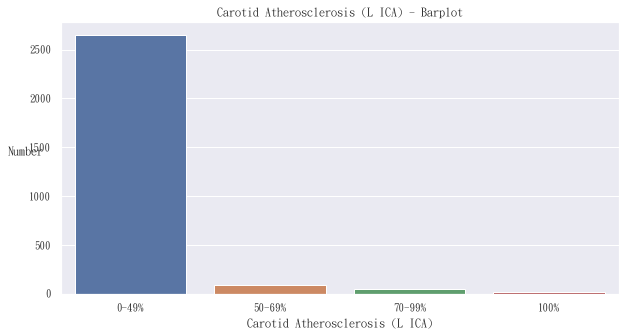

In [232]:
cdl_id = tsr_12.loc[:,"cdl_id"]
cdl_id = pd.to_numeric(cdl_id, errors = "coerce")
cdl_id[(cdl_id != 1) & (cdl_id != 2) & (cdl_id != 3) & (cdl_id != 4)] = np.nan
cdl_id = cdl_id.fillna(cdl_id.mode()[0])
#print(cdl_id)
print(cdl_id.value_counts() / len(cdl_id))
#print(cdl_id.describe())

cdl_id_labels = ["0-49%","50-69%","70-99%","100%"]
sns.countplot(cdl_id).set_xticklabels(cdl_id_labels)
plt.title("Carotid Atherosclerosis (L ICA) - Barplot")
plt.xlabel('Carotid Atherosclerosis (L ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

# TCCS

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.86128
1.0    0.13872
Name: tccs_id, dtype: float64


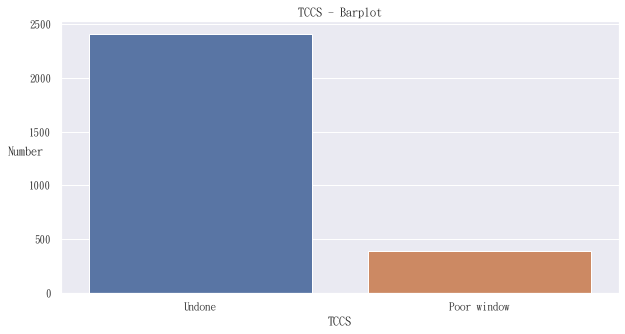

In [233]:
tccs_id = tsr_12.loc[:,"tccs_id"]
tccs_id = pd.to_numeric(tccs_id, errors = "coerce")
tccs_id[(tccs_id != 1) & (tccs_id != 0)] = np.nan
tccs_id = tccs_id.fillna(tccs_id.mode()[0])
#print(tccs_id)
print(tccs_id.value_counts() / len(tccs_id))
#print(tccs_id.describe())

tccs_id_labels = ["Undone","Poor window"]
sns.countplot(tccs_id).set_xticklabels(tccs_id_labels)
plt.title("TCCS - Barplot")
plt.xlabel('TCCS')
plt.ylabel('Number', rotation=0)
plt.show()

# TCCS (R MCA)

1.0    0.894172
2.0    0.105828
Name: tccsr_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


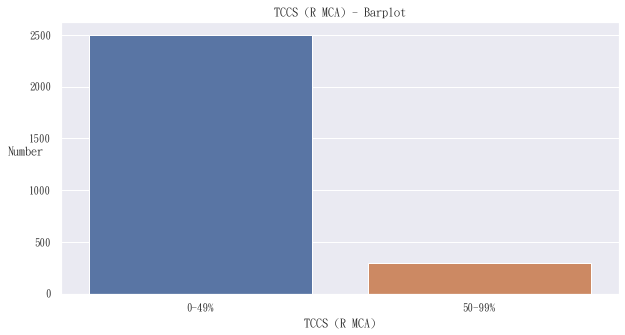

In [234]:
tccsr_id = tsr_12.loc[:,"tccsr_id"]
tccsr_id = pd.to_numeric(tccsr_id, errors = "coerce")
tccsr_id[(tccsr_id != 1) & (tccsr_id != 2) & (tccsr_id != 3)] = np.nan
tccsr_id = tccsr_id.fillna(tccsr_id.mode()[0])
#print(tccsr_id)
print(tccsr_id.value_counts() / len(tccsr_id))
#print(tccsr_id.describe())

#tccsr_id_labels = ["0-49%","50-99%","100%"]
tccsr_id_labels = ["0-49%","50-99%"]
sns.countplot(tccsr_id).set_xticklabels(tccsr_id_labels)
plt.title("TCCS (R MCA) - Barplot")
plt.xlabel('TCCS (R MCA)')
plt.ylabel('Number', rotation=0)
plt.show()

# TCCS (L MCA)

1.0    0.425813
2.0    0.108330
Name: tccsl_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


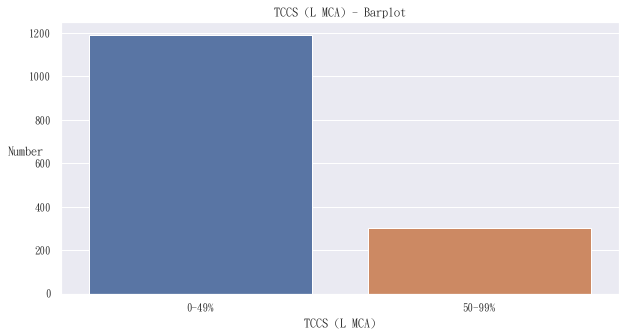

In [235]:
tccsl_id = tsr_12.loc[:,"tccsl_id"]
tccsl_id = pd.to_numeric(tccsl_id, errors = "coerce")
tccsl_id[(tccsl_id != 1) & (tccsl_id != 2) & (tccsl_id != 3)] = np.nan
#tccsl_id = tccsl_id.fillna(tccsl_id.mode()[0])
#print(tccsl_id)
print(tccsl_id.value_counts() / len(tccsl_id))
#print(tccsl_id.describe())

#tccsl_id_labels = ["0-49%","50-99%","100%"]
tccsl_id_labels = ["0-49%","50-99%"]
sns.countplot(tccsl_id).set_xticklabels(tccsl_id_labels)
plt.title("TCCS (L MCA) - Barplot")
plt.xlabel('TCCS (L MCA)')
plt.ylabel('Number', rotation=0)
plt.show()
tccsl_id = tccsl_id.fillna(999)

# TCCS (BA)

1.0    0.919557
2.0    0.080086
3.0    0.000358
Name: tccsba_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


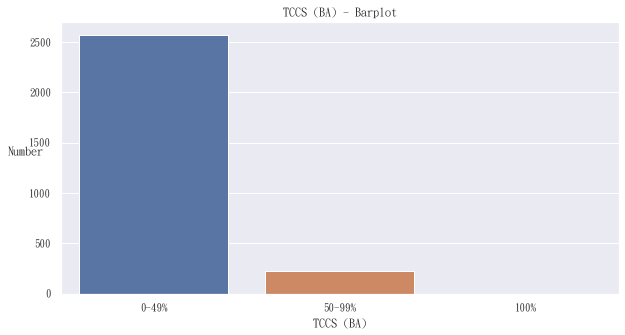

In [236]:
tccsba_id = tsr_12.loc[:,"tccsba_id"]
tccsba_id = pd.to_numeric(tccsba_id, errors = "coerce")
tccsba_id[(tccsba_id != 1) & (tccsba_id != 2) & (tccsba_id != 3)] = np.nan
tccsba_id = tccsba_id.fillna(tccsba_id.mode()[0])
#print(tccsba_id)
print(tccsba_id.value_counts() / len(tccsba_id))
#print(tccsba_id.describe())

tccsba_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(tccsba_id).set_xticklabels(tccsba_id_labels)
plt.title("TCCS (BA) - Barplot")
plt.xlabel('TCCS (BA)')
plt.ylabel('Number', rotation=0)
plt.show()

# MRA

N    0.526278
Y    0.473722
Name: mra_fl, dtype: float64


<ipython-input-237-10b50ee9fa86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mra_fl[mra_fl == str(0)] = "N"
<ipython-input-237-10b50ee9fa86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mra_fl[mra_fl == str(1)] = "Y"
<ipython-input-237-10b50ee9fa86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mra_fl[(mra_fl !="N") & (mra_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

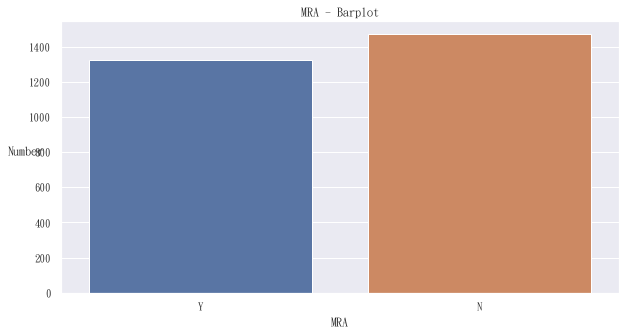

In [237]:
mra_fl = tsr_12.loc[:,"mra_fl"]
mra_fl[mra_fl == str(0)] = "N"
mra_fl[mra_fl == str(1)] = "Y"
mra_fl[(mra_fl !="N") & (mra_fl != "Y")] = np.nan
mra_fl = mra_fl.fillna(mra_fl.mode()[0])
#print(mra_fl)
print(mra_fl.value_counts() / len(mra_fl))
#print(mra_fl.describe())

sns.countplot(mra_fl)
plt.title("MRA - Barplot")
plt.xlabel('MRA')
plt.ylabel('Number', rotation=0)
plt.show()

# CTA

N    0.888809
Y    0.111191
Name: cta_fl, dtype: float64


<ipython-input-238-302c7b3eb794>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cta_fl[cta_fl == str(0)] = "N"
<ipython-input-238-302c7b3eb794>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cta_fl[cta_fl == str(1)] = "Y"
<ipython-input-238-302c7b3eb794>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cta_fl[(cta_fl !="N") & (cta_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

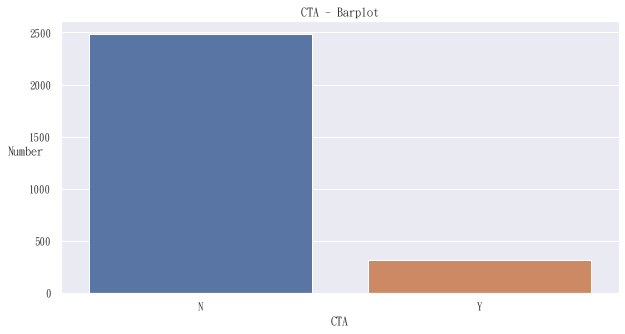

In [238]:
cta_fl = tsr_12.loc[:,"cta_fl"]
cta_fl[cta_fl == str(0)] = "N"
cta_fl[cta_fl == str(1)] = "Y"
cta_fl[(cta_fl !="N") & (cta_fl != "Y")] = np.nan
cta_fl = cta_fl.fillna(cta_fl.mode()[0])
#print(cta_fl)
print(cta_fl.value_counts() / len(cta_fl))
#print(cta_fl.describe())

sns.countplot(cta_fl)
plt.title("CTA - Barplot")
plt.xlabel('CTA')
plt.ylabel('Number', rotation=0)
plt.show()

In [239]:
# DSA

N    0.994995
Y    0.005005
Name: dsa_fl, dtype: float64


<ipython-input-240-be0096aabfbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsa_fl[dsa_fl == str(0)] = "N"
<ipython-input-240-be0096aabfbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsa_fl[dsa_fl == str(1)] = "Y"
<ipython-input-240-be0096aabfbd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsa_fl[(dsa_fl !="N") & (dsa_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

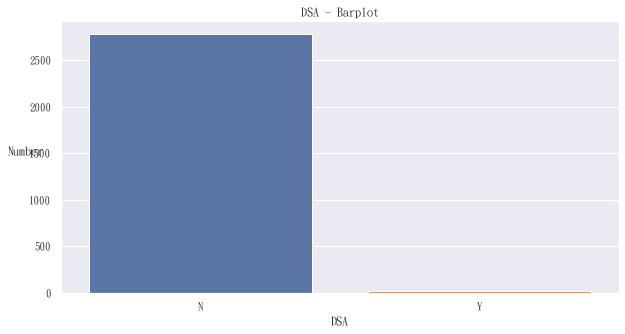

In [240]:
dsa_fl = tsr_12.loc[:,"dsa_fl"]
dsa_fl[dsa_fl == str(0)] = "N"
dsa_fl[dsa_fl == str(1)] = "Y"
dsa_fl[(dsa_fl !="N") & (dsa_fl != "Y")] = np.nan
dsa_fl = dsa_fl.fillna(dsa_fl.mode()[0])
#print(dsa_fl)
print(dsa_fl.value_counts() / len(dsa_fl))
#print(dsa_fl.describe())

sns.countplot(dsa_fl)
plt.title("DSA - Barplot")
plt.xlabel('DSA')
plt.ylabel('Number', rotation=0)
plt.show()

# Undone MRI, CTA and DSA

N    0.99857
Y    0.00143
Name: mcd_id, dtype: float64


<ipython-input-241-48f7feea4f19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_id[mcd_id == str(0)] = 0
<ipython-input-241-48f7feea4f19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_id[mcd_id == str(1)] = 1
<ipython-input-241-48f7feea4f19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_id[mcd_id == 0] = "N"
<ipython-input-241-48f7feea4f19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

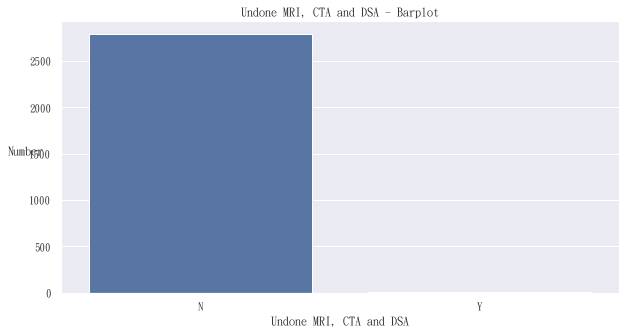

In [241]:
mcd_id = tsr_12.loc[:,"mcd_id"]
mcd_id[mcd_id == str(0)] = 0
mcd_id[mcd_id == str(1)] = 1
mcd_id[mcd_id == 0] = "N"
mcd_id[mcd_id == 1] = "Y"
mcd_id[(mcd_id !="N") & (mcd_id != "Y")] = np.nan
mcd_id = mcd_id.fillna(mcd_id.mode()[0])
#print(mcd_id)
print(mcd_id.value_counts() / len(mcd_id))
#print(mcd_id.describe())

sns.countplot(mcd_id)
plt.title("Undone MRI, CTA and DSA - Barplot")
plt.xlabel('Undone MRI, CTA and DSA')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI, CTA and DSA (R MCA)

1.0    0.991419
2.0    0.005363
3.0    0.003218
Name: mcdr_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


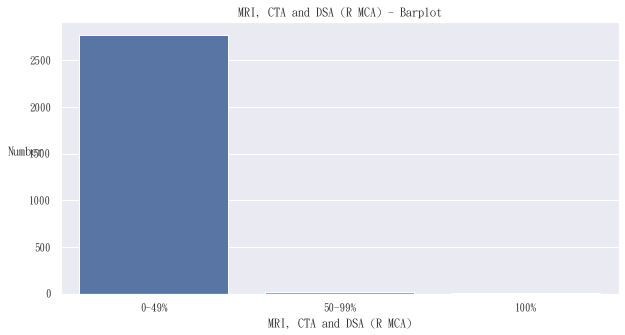

In [242]:
mcdr_id = tsr_12.loc[:,"mcdr_id"]
mcdr_id = pd.to_numeric(mcdr_id, errors = "coerce")
mcdr_id[(mcdr_id != 1) & (mcdr_id != 2) & (mcdr_id != 3)] = np.nan
mcdr_id = mcdr_id.fillna(mcdr_id.mode()[0])
#print(mcdr_id)
print(mcdr_id.value_counts() / len(mcdr_id))
#print(mcdr_id.describe())

mcdr_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdr_id).set_xticklabels(mcdr_id_labels)
plt.title("MRI, CTA and DSA (R MCA) - Barplot")
plt.xlabel('MRI, CTA and DSA (R MCA)')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI, CTA and DSA (L MCA)

1.0    0.993922
2.0    0.005363
3.0    0.000715
Name: mcdl_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


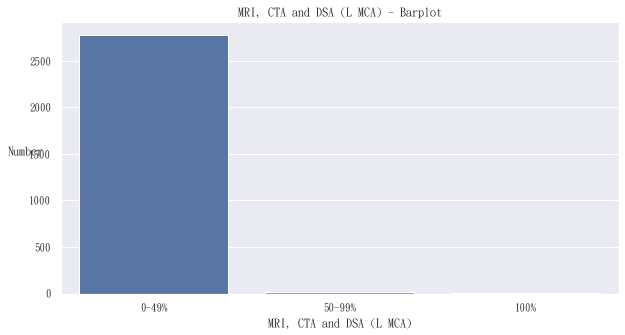

In [243]:
mcdl_id = tsr_12.loc[:,"mcdl_id"]
mcdl_id = pd.to_numeric(mcdl_id, errors = "coerce")
mcdl_id[(mcdl_id != 1) & (mcdl_id != 2) & (mcdl_id != 3)] = np.nan
mcdl_id = mcdl_id.fillna(mcdl_id.mode()[0])
#print(mcdl_id)
print(mcdl_id.value_counts() / len(mcdl_id))
#print(mcdl_id.describe())

mcdl_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdl_id).set_xticklabels(mcdl_id_labels)
plt.title("MRI, CTA and DSA (L MCA) - Barplot")
plt.xlabel('MRI, CTA and DSA (L MCA)')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI, CTA and DSA (VA or BA)

1.0    0.994995
2.0    0.004290
3.0    0.000715
Name: mcdba_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


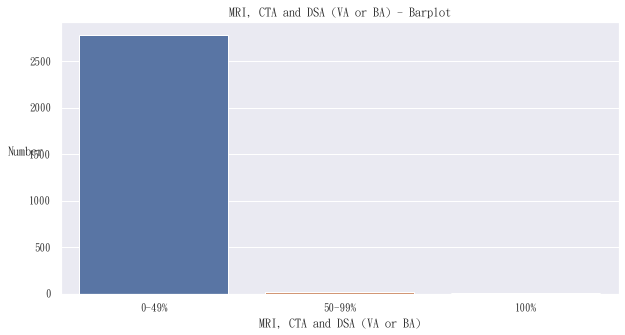

In [244]:
mcdba_id = tsr_12.loc[:,"mcdba_id"]
mcdba_id = pd.to_numeric(mcdba_id, errors = "coerce")
mcdba_id[(mcdba_id != 1) & (mcdba_id != 2) & (mcdba_id != 3)] = np.nan
mcdba_id = mcdba_id.fillna(mcdba_id.mode()[0])
#print(mcdba_id)
print(mcdba_id.value_counts() / len(mcdba_id))
#print(mcdba_id.describe())

mcdba_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdba_id).set_xticklabels(mcdba_id_labels)
plt.title("MRI, CTA and DSA (VA or BA) - Barplot")
plt.xlabel('MRI, CTA and DSA (VA or BA)')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI, CTA and DSA (R ICA)

1.0    0.998570
3.0    0.001073
2.0    0.000358
Name: mcdri_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


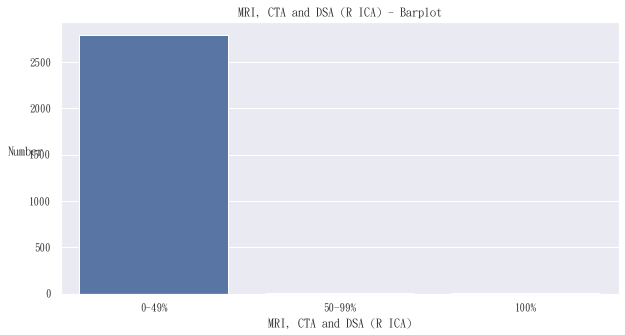

In [245]:
mcdri_id = tsr_12.loc[:,"mcdri_id"]
mcdri_id = pd.to_numeric(mcdri_id, errors = "coerce")
mcdri_id[(mcdri_id != 1) & (mcdri_id != 2) & (mcdri_id != 3)] = np.nan
mcdri_id = mcdri_id.fillna(mcdri_id.mode()[0])
#print(mcdri_id)
print(mcdri_id.value_counts() / len(mcdri_id))
#print(mcdri_id.describe())

mcdri_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdri_id).set_xticklabels(mcdri_id_labels)
plt.title("MRI, CTA and DSA (R ICA) - Barplot")
plt.xlabel('MRI, CTA and DSA (R ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI, CTA and DSA (L ICA)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.999285
2.0    0.000358
3.0    0.000358
Name: mcdli_id, dtype: float64


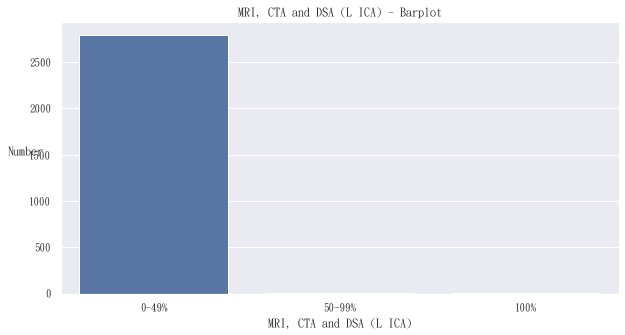

In [246]:
mcdli_id = tsr_12.loc[:,"mcdli_id"]
mcdli_id = pd.to_numeric(mcdli_id, errors = "coerce")
mcdli_id[(mcdli_id != 1) & (mcdli_id != 2) & (mcdli_id != 3)] = np.nan
mcdli_id = mcdli_id.fillna(mcdli_id.mode()[0])
#print(mcdli_id)
print(mcdli_id.value_counts() / len(mcdli_id))
#print(mcdli_id.describe())

mcdli_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdli_id).set_xticklabels(mcdli_id_labels)
plt.title("MRI, CTA and DSA (L ICA) - Barplot")
plt.xlabel('MRI, CTA and DSA (L ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

# NIHSS 最初進院日期

<ipython-input-247-e2d2013b73e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihsin_time.nihsin_dt[(nihsin_time.nihsin_dt.dt.year < 2006) | (nihsin_time.nihsin_dt.dt.year > 2021)] = np.nan
<ipython-input-247-e2d2013b73e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihsin_time['nihsinh_nm'][(nihsin_time['nihsinh_nm'] < 0) | (nihsin_time['nihsinh_nm'] > 24)] = np.nan
<ipython-input-247-e2d2013b73e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

count                    2797
unique                   2457
top       2008-04-26 00:00:00
freq                      199
first     2006-08-02 00:07:00
last      2019-05-29 14:07:00
dtype: object


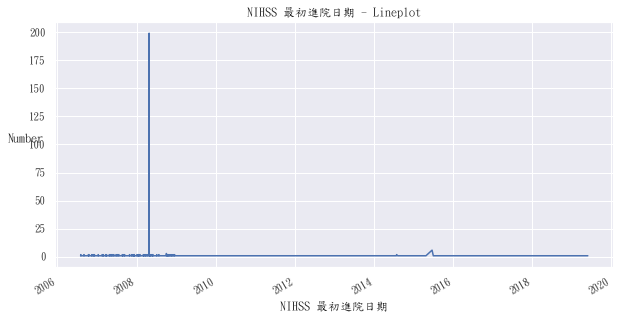

In [247]:
nihsin_time = tsr_12.loc[:,["nihsin_dt", "nihsinh_nm", "nihsinm_nm"]]
nihsin_time.nihsin_dt = pd.to_datetime(nihsin_time.nihsin_dt, errors = "coerce", format = "%Y-%m-%d")
nihsin_time.nihsin_dt[(nihsin_time.nihsin_dt.dt.year < 2006) | (nihsin_time.nihsin_dt.dt.year > 2021)] = np.nan

nihsin_time['nihsinh_nm'] = pd.to_numeric(nihsin_time['nihsinh_nm'], errors='coerce')
nihsin_time['nihsinh_nm'][(nihsin_time['nihsinh_nm'] < 0) | (nihsin_time['nihsinh_nm'] > 24)] = np.nan
nihsin_time['nihsinh_nm'][nihsin_time['nihsinh_nm'] == 24] = 0
nihsin_time['nihsinm_nm'] = pd.to_numeric(nihsin_time['nihsinm_nm'], errors='coerce')
nihsin_time['nihsinm_nm'][(nihsin_time['nihsinm_nm'] < 0) | (nihsin_time['nihsinm_nm'] > 24)] = np.nan
nihsin_time['nihsinm_nm'][nihsin_time['nihsinm_nm'] == 24] = 0

nihsin_time['nihsin_dt'] = nihsin_time['nihsin_dt'].fillna(nihsin_time['nihsin_dt'].mode()[0])
nihsin_time['nihsinh_nm'] = nihsin_time['nihsinh_nm'].fillna(nihsin_time['nihsinh_nm'].mean())
nihsin_time['nihsinm_nm'] = nihsin_time['nihsinm_nm'].fillna(nihsin_time['nihsinm_nm'].mean())

nihsin = nihsin_time['nihsin_dt'].astype(str)+' '+nihsin_time['nihsinh_nm'].astype(int).map(str)+':'+nihsin_time['nihsinm_nm'].astype(int).map(str)

nihsin_dt = pd.to_datetime(nihsin, format='%Y/%m/%d %H:%M', errors='coerce')
#print(nihsin_dt.value_counts() / len(nihsin_dt))
print(nihsin_dt.describe())

nihsin_dt.value_counts().plot()
plt.title("NIHSS 最初進院日期 - Lineplot")
plt.xlabel('NIHSS 最初進院日期')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# NIHSS 最初進院時間 - 時

In [248]:
nihsinh_nm = tsr_12.loc[:,"nihsinh_nm"]
nihsinh_nm = pd.to_numeric(nihsinh_nm, errors='coerce')
nihsinh_nm[(nihsinh_nm < 0) | (nihsinh_nm > 24)] = np.nan
nihsinh_nm[nihsinh_nm == 24] = 0
nihsinh_nm = nihsinh_nm.fillna(nihsinh_nm.mean())
#print(nihsinh_nm)
#print(nihsinh_nm.value_counts() / len(nihsinh_nm))
print(nihsinh_nm.describe())

count    2797.000000
mean       12.873311
std         6.833160
min         0.000000
25%         9.000000
50%        13.000000
75%        19.000000
max        23.000000
Name: nihsinh_nm, dtype: float64


# NIHSS 最初進院時間 - 分

In [249]:
nihsinm_nm = tsr_12.loc[:,"nihsinm_nm"]
nihsinm_nm = pd.to_numeric(nihsinm_nm, errors='coerce')
nihsinm_nm[(nihsinm_nm < 0) | (nihsinm_nm > 60)] = np.nan
nihsinm_nm[nihsinm_nm == 60] = 0
nihsinm_nm = nihsinm_nm.fillna(nihsinm_nm.mean())
#print(nihsinm_nm)
#print(nihsinm_nm.value_counts() / len(nihsinm_nm))
print(nihsinm_nm.describe())

count    2797.000000
mean       23.385155
std        18.446548
min         0.000000
25%         5.000000
50%        23.385155
75%        40.000000
max        59.000000
Name: nihsinm_nm, dtype: float64


# NIHSS 離院日期

count    2797.000000
mean        8.014136
std         6.536312
min         0.000000
25%         4.000000
50%         7.000000
75%         8.014136
max        35.000000
dtype: float64


<ipython-input-250-ab7a52d43509>:18: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  nihss_hospitalised_time[(nihss_hospitalised_time < inner_fence_low) | (nihss_hospitalised_time > inner_fence_upp)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._where(~key, value, inplace=True)
<ipython-input-250-ab7a52d43509>:19: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  nihss_hospitalised_time[nihss_hospitalised_time < 0] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: modifications to a property of a datetimelike object are not support

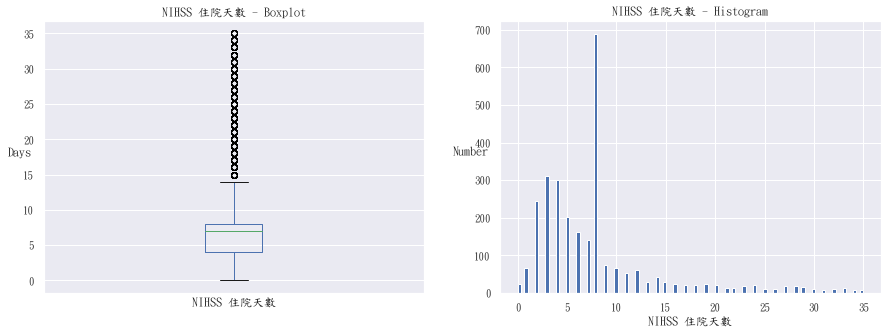

In [250]:
nihsot_dt = tsr_12.loc[:,"nihsot_dt"]
nihsot_dt = pd.to_datetime(nihsot_dt, errors='coerce')
nihsot_dt[(nihsot_dt.dt.year < 2005) | (nihsot_dt.dt.year > 2021) | (nihsot_dt < nihsin_time.nihsin_dt)] = np.nan
#print(nihsot_dt)
#print(nihsot_dt.value_counts() / len(nihsot_dt))
#print(nihsot_dt.describe())

nihss_hospitalised_time = nihsot_dt - nihsin_dt
nihss_hospitalised_time = nihss_hospitalised_time.dt.days

q1 = nihss_hospitalised_time.quantile(0.25)
q3 = nihss_hospitalised_time.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
nihss_hospitalised_time[(nihss_hospitalised_time < inner_fence_low) | (nihss_hospitalised_time > inner_fence_upp)] = np.nan
nihss_hospitalised_time[nihss_hospitalised_time < 0] = np.nan

nihss_hospitalised_time =nihss_hospitalised_time.fillna(nihss_hospitalised_time.mean())

#print(nihss_hospitalised_time.value_counts().sort_values(ascending= True))
print(nihss_hospitalised_time.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihss_hospitalised_time.plot.box(ax = ax1)
ax1.set_title("NIHSS 住院天數 - Boxplot")
ax1.set_xlabel('NIHSS 住院天數')
ax1.set_ylabel('Days', rotation=0)
ax1.set_xticks([])

#nihss_hospitalised_time.plot.hist(ax = ax2, bins=100)
#plt.show()
nihss_hospitalised_time.plot.hist(ax = ax2, bins=100)
ax2.set_title("NIHSS 住院天數 - Histogram")
ax2.set_xlabel('NIHSS 住院天數')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHSS 離院時間 - 時

In [251]:
nihsoth_nm = tsr_12.loc[:,"nihsoth_nm"]
nihsoth_nm = pd.to_numeric(nihsoth_nm, errors='coerce')
nihsoth_nm[(nihsoth_nm < 0) | (nihsoth_nm > 24)] = np.nan
nihsoth_nm[nihsoth_nm == 24] = 0
nihsoth_nm =nihsoth_nm.fillna(nihsoth_nm.mean())
#print(nihsoth_nm)
#print(nihsoth_nm.value_counts() / len(nihsoth_nm))
print(nihsoth_nm.describe())

count    2797.000000
mean       10.127760
std         2.691314
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        20.000000
Name: nihsoth_nm, dtype: float64


# NIHSS 離院時間 - 分

In [252]:
nihsotm_nm = tsr_12.loc[:,"nihsotm_nm"]
nihsotm_nm = pd.to_numeric(nihsotm_nm, errors='coerce')
nihsotm_nm[(nihsotm_nm < 0) | (nihsotm_nm > 60)] = np.nan
nihsotm_nm[nihsotm_nm == 60] = 0
nihsotm_nm =nihsotm_nm.fillna(nihsotm_nm.mean())
#print(nihsotm_nm)
#print(nihsotm_nm.value_counts() / len(nihsotm_nm))
print(nihsotm_nm.describe())

count    2797.000000
mean        2.496115
std         8.746095
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        59.000000
Name: nihsotm_nm, dtype: float64


# ECG

Y    0.917769
N    0.082231
Name: ecg_id, dtype: float64


<ipython-input-253-e541dcf44530>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg_id[ecg_id == str(1)] = 1
<ipython-input-253-e541dcf44530>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg_id[ecg_id == str(0)] = 0
<ipython-input-253-e541dcf44530>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg_id[ecg_id == 1] = "Y"
<ipython-input-253-e541dcf44530>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

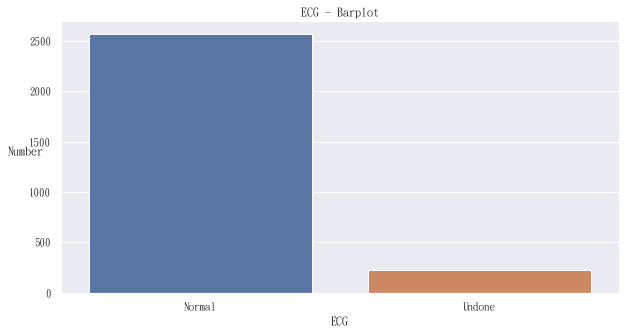

In [253]:
ecg_id = tsr_12.loc[:,"ecg_id"]
ecg_id[ecg_id == str(1)] = 1
ecg_id[ecg_id == str(0)] = 0
ecg_id[ecg_id == 1] = "Y"
ecg_id[ecg_id == 0] = "N"
ecg_id[(ecg_id !="N") & (ecg_id != "Y")] = np.nan
ecg_id =ecg_id.fillna(ecg_id.mode()[0])
#print(ecg_id)
print(ecg_id.value_counts() / len(ecg_id))
#print(ecg_id.describe())

ecg_id_labels = ["Normal", "Undone"]
sns.countplot(ecg_id).set_xticklabels(ecg_id_labels)
plt.title("ECG - Barplot")
plt.xlabel('ECG')
plt.ylabel('Number', rotation=0)

plt.show()

# ECG (LVH)

N    0.942438
Y    0.057562
Name: ecgl_fl, dtype: float64


<ipython-input-254-438311e5a357>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgl_fl[ecgl_fl == str(1)] = 1
<ipython-input-254-438311e5a357>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgl_fl[ecgl_fl == str(0)] = 0
<ipython-input-254-438311e5a357>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgl_fl[ecgl_fl == 1] = "Y"
<ipython-input-254-438311e5a357>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

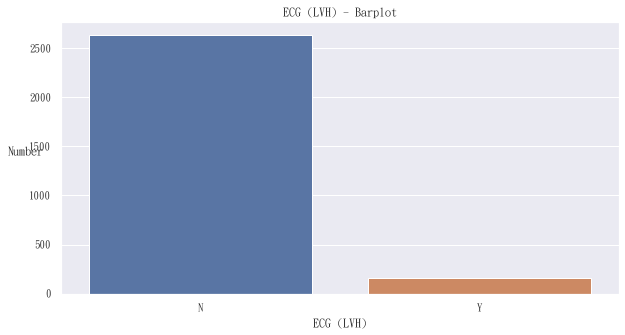

In [254]:
ecgl_fl = tsr_12.loc[:,"ecgl_fl"]
ecgl_fl[ecgl_fl == str(1)] = 1
ecgl_fl[ecgl_fl == str(0)] = 0
ecgl_fl[ecgl_fl == 1] = "Y"
ecgl_fl[ecgl_fl == 0] = "N"
ecgl_fl[(ecgl_fl !="N") & (ecgl_fl != "Y")] = np.nan
ecgl_fl[ecg_id == "N"] = "N"
ecgl_fl =ecgl_fl.fillna(ecgl_fl.mode()[0])
#print(ecgl_fl)
print(ecgl_fl.value_counts() / len(ecgl_fl))
#print(ecgl_fl.describe())

sns.countplot(ecgl_fl)
plt.title("ECG (LVH) - Barplot")
plt.xlabel('ECG (LVH)')
plt.ylabel('Number', rotation=0)
plt.show()

# ECG (AF)

N    0.928852
Y    0.071148
Name: ecga_fl, dtype: float64


<ipython-input-255-9807fec6aa7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecga_fl[ecga_fl == str(1)] = 1
<ipython-input-255-9807fec6aa7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecga_fl[ecga_fl == str(0)] = 0
<ipython-input-255-9807fec6aa7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecga_fl[ecga_fl == 1] = "Y"
<ipython-input-255-9807fec6aa7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

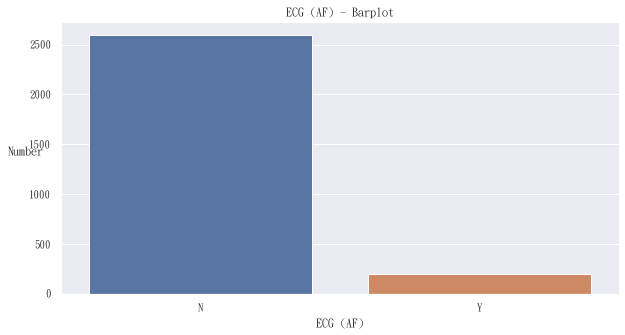

In [255]:
ecga_fl = tsr_12.loc[:,"ecga_fl"]
ecga_fl[ecga_fl == str(1)] = 1
ecga_fl[ecga_fl == str(0)] = 0
ecga_fl[ecga_fl == 1] = "Y"
ecga_fl[ecga_fl == 0] = "N"
ecga_fl[(ecga_fl !="N") & (ecga_fl != "Y")] = np.nan
ecga_fl[ecg_id == "N"] = "N"
ecga_fl =ecga_fl.fillna(ecga_fl.mode()[0])
#print(ecga_fl)
print(ecga_fl.value_counts() / len(ecga_fl))
#print(ecga_fl.describe())

sns.countplot(ecga_fl)
plt.title("ECG (AF) - Barplot")
plt.xlabel('ECG (AF)')
plt.ylabel('Number', rotation=0)
plt.show()

# ECG (Q wave)

<ipython-input-256-0f5cd750af82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[ecgq_fl == str(1)] = 1
<ipython-input-256-0f5cd750af82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[ecgq_fl == str(0)] = 0
<ipython-input-256-0f5cd750af82>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[ecgq_fl == 1] = "Y"


N    0.99714
Y    0.00286
Name: ecgq_fl, dtype: float64


<ipython-input-256-0f5cd750af82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[ecgq_fl == 0] = "N"
<ipython-input-256-0f5cd750af82>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[(ecgq_fl !="N") & (ecgq_fl != "Y")] = np.nan
<ipython-input-256-0f5cd750af82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[ecg_id == "N"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36:

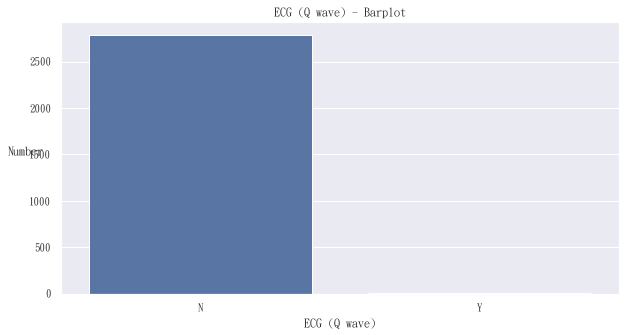

In [256]:
ecgq_fl = tsr_12.loc[:,"ecgq_fl"]
ecgq_fl[ecgq_fl == str(1)] = 1
ecgq_fl[ecgq_fl == str(0)] = 0
ecgq_fl[ecgq_fl == 1] = "Y"
ecgq_fl[ecgq_fl == 0] = "N"
ecgq_fl[(ecgq_fl !="N") & (ecgq_fl != "Y")] = np.nan
ecgq_fl[ecg_id == "N"] = "N"
ecgq_fl =ecgq_fl.fillna(ecgq_fl.mode()[0])
#print(ecgq_fl)
print(ecgq_fl.value_counts() / len(ecgq_fl))
#print(ecgq_fl.describe())

sns.countplot(ecgq_fl)
plt.title("ECG (Q wave) - Barplot")
plt.xlabel('ECG (Q wave)')
plt.ylabel('Number', rotation=0)
plt.show()

# ECG (Others)

<ipython-input-257-1fa79503aa41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgo_fl[ecgo_fl == str(1)] = 1
<ipython-input-257-1fa79503aa41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgo_fl[ecgo_fl == str(0)] = 0
<ipython-input-257-1fa79503aa41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgo_fl[ecgo_fl == 1] = "Y"
<ipython-input-257-1fa79503aa41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

N    0.688952
Y    0.311048
Name: ecgo_fl, dtype: float64


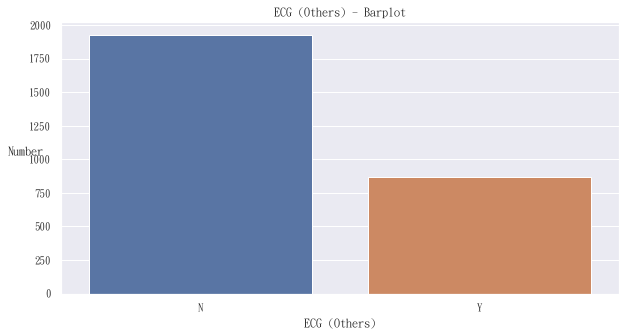

In [257]:
ecgo_fl = tsr_12.loc[:,"ecgo_fl"]
ecgo_fl[ecgo_fl == str(1)] = 1
ecgo_fl[ecgo_fl == str(0)] = 0
ecgo_fl[ecgo_fl == 1] = "Y"
ecgo_fl[ecgo_fl == 0] = "N"
ecgo_fl[(ecgo_fl !="N") & (ecgo_fl != "Y")] = np.nan
ecgo_fl[ecg_id == "N"] = "N"
ecgo_fl =ecgo_fl.fillna(ecgo_fl.mode()[0])
#print(ecgo_fl)
print(ecgo_fl.value_counts() / len(ecgo_fl))
#print(ecgo_fl.describe())

sns.countplot(ecgo_fl)
plt.title("ECG (Others) - Barplot")
plt.xlabel('ECG (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# 抽血結果 - 急診抽血或第一次抽血

# HB

<ipython-input-258-200e9e6e87ff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hb_nm[(hb_nm < inner_fence_low) | (hb_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean       14.026725
std         1.763066
min         9.100000
25%        12.900000
50%        14.027000
75%        15.200000
max        19.000000
Name: hb_nm, dtype: float64


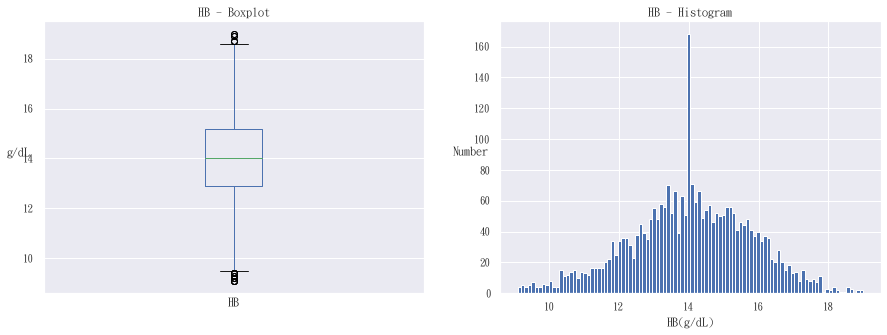

In [258]:
hb_nm = tsr_12.loc[:,"hb_nm"]

q1 = hb_nm.quantile(0.25)
q3 = hb_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hb_nm[(hb_nm < inner_fence_low) | (hb_nm > inner_fence_upp)] = np.nan

hb_nm =hb_nm.fillna(round(hb_nm.mean(),3))

#print(hb_nm)
#print(hb_nm.value_counts() / len(hb_nm))
print(hb_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hb_nm.plot.box(ax = ax1)
ax1.set_title("HB - Boxplot")
ax1.set_xlabel('HB')
ax1.set_ylabel('g/dL', rotation=0)
ax1.set_xticks([])

#hb_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hb_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HB - Histogram")
ax2.set_xlabel('HB(g/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# HCT

<ipython-input-259-0399b559f172>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hct_nm[(hct_nm < inner_fence_low) | (hct_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean       40.981274
std         4.575901
min        27.700000
25%        38.300000
50%        40.981000
75%        43.900000
max        54.700000
Name: hct_nm, dtype: float64


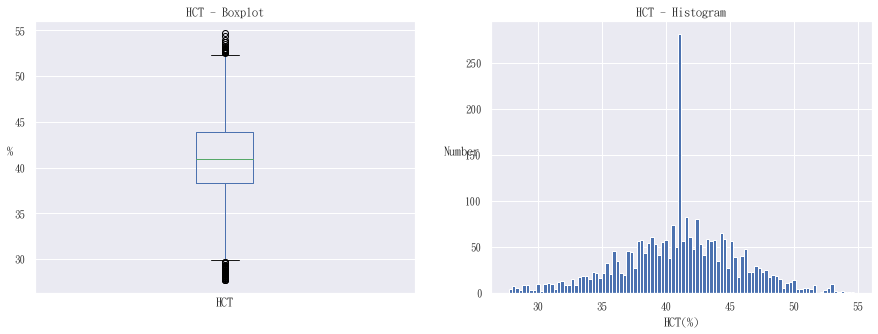

In [259]:
hct_nm = tsr_12.loc[:,"hct_nm"]

q1 = hct_nm.quantile(0.25)
q3 = hct_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hct_nm[(hct_nm < inner_fence_low) | (hct_nm > inner_fence_upp)] = np.nan

hct_nm =hct_nm.fillna(round(hct_nm.mean(),3))

#print(hct_nm)
#print(hct_nm.value_counts() / len(hct_nm))
print(hct_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hct_nm.plot.box(ax = ax1)
ax1.set_title("HCT - Boxplot")
ax1.set_xlabel('HCT')
ax1.set_ylabel('%', rotation=0)
ax1.set_xticks([])

#hct_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hct_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HCT - Histogram")
ax2.set_xlabel('HCT(%)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# PLATELET

<ipython-input-260-0037b99cc044>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platelet_nm[(platelet_nm < inner_fence_low) | (platelet_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean      207.229351
std        52.468258
min        57.000000
25%       171.000000
50%       207.229000
75%       238.000000
max       363.000000
Name: platelet_nm, dtype: float64


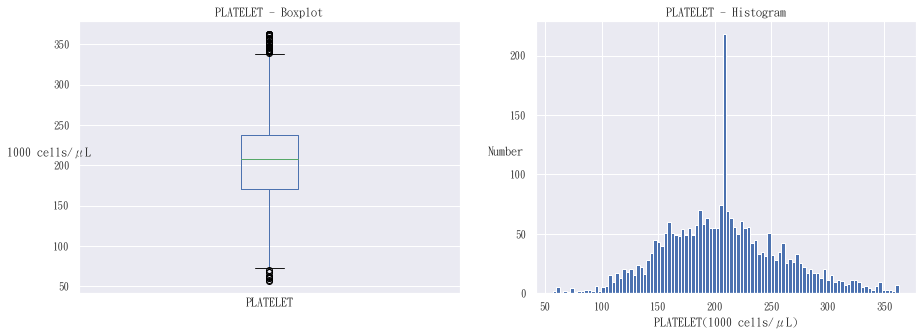

In [260]:
platelet_nm = tsr_12.loc[:,"platelet_nm"]

q1 = platelet_nm.quantile(0.25)
q3 = platelet_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
platelet_nm[(platelet_nm < inner_fence_low) | (platelet_nm > inner_fence_upp)] = np.nan

platelet_nm =platelet_nm.fillna(round(platelet_nm.mean(),3))

#print(platelet_nm)
#print(platelet_nm.value_counts() / len(platelet_nm))
print(platelet_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

platelet_nm.plot.box(ax = ax1)
ax1.set_title("PLATELET - Boxplot")
ax1.set_xlabel('PLATELET')
ax1.set_ylabel('1000 cells/μL', rotation=0)
ax1.set_xticks([])

#platelet_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
platelet_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PLATELET - Histogram")
ax2.set_xlabel('PLATELET(1000 cells/μL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# WBC

<ipython-input-261-0b2b7f245da0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wbc_nm[(wbc_nm < inner_fence_low) | (wbc_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean        7.823777
std         2.289822
min         0.970000
25%         6.210000
50%         7.690000
75%         9.010000
max        14.890000
Name: wbc_nm, dtype: float64


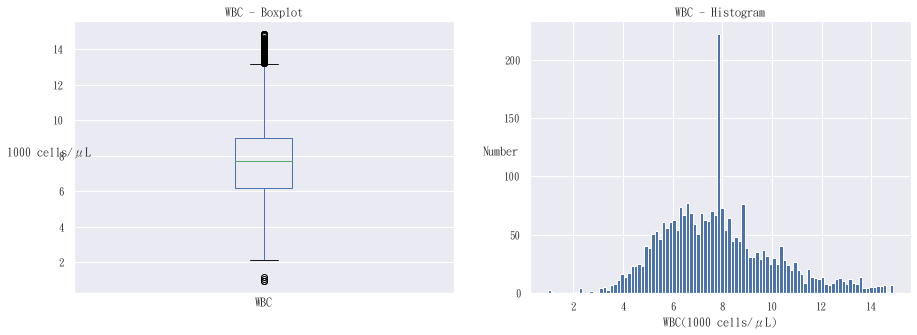

In [261]:
wbc_nm = tsr_12.loc[:,"wbc_nm"]

q1 = wbc_nm.quantile(0.25)
q3 = wbc_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
wbc_nm[(wbc_nm < inner_fence_low) | (wbc_nm > inner_fence_upp)] = np.nan

wbc_nm =wbc_nm.fillna(round(wbc_nm.mean(),3))

#print(wbc_nm)
#print(wbc_nm.value_counts() / len(wbc_nm))
print(wbc_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

wbc_nm.plot.box(ax = ax1)
ax1.set_title("WBC - Boxplot")
ax1.set_xlabel('WBC')
ax1.set_ylabel('1000 cells/μL', rotation=0)
ax1.set_xticks([])

#wbc_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
wbc_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("WBC - Histogram")
ax2.set_xlabel('WBC(1000 cells/μL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# PTT1

<ipython-input-262-4e06725652f0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptt1_nm[(ptt1_nm < inner_fence_low) | (ptt1_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean       29.317369
std         0.864743
min        26.300000
25%        28.900000
50%        29.317000
75%        29.600000
max        33.000000
Name: ptt1_nm, dtype: float64


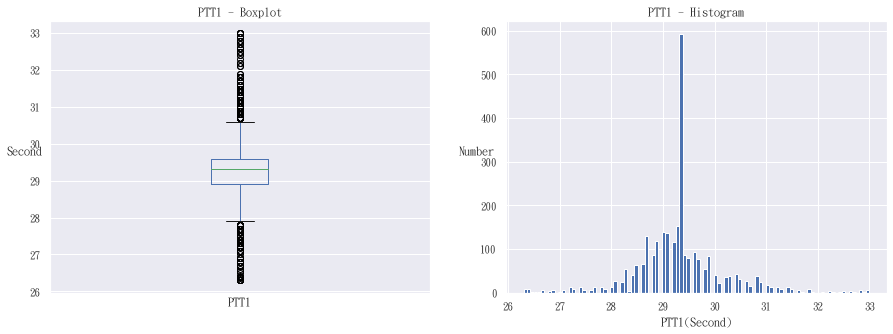

In [262]:
ptt1_nm = tsr_12.loc[:,"ptt1_nm"]

q1 = ptt1_nm.quantile(0.25)
q3 = ptt1_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ptt1_nm[(ptt1_nm < inner_fence_low) | (ptt1_nm > inner_fence_upp)] = np.nan

ptt1_nm =ptt1_nm.fillna(round(ptt1_nm.mean(),3))

#print(ptt1_nm)
#print(ptt1_nm.value_counts() / len(ptt1_nm))
print(ptt1_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ptt1_nm.plot.box(ax = ax1)
ax1.set_title("PTT1 - Boxplot")
ax1.set_xlabel('PTT1')
ax1.set_ylabel('Second', rotation=0)
ax1.set_xticks([])

#ptt1_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ptt1_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PTT1 - Histogram")
ax2.set_xlabel('PTT1(Second)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# PTT2

<ipython-input-263-4ccedfc6b981>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptt2_nm[(ptt2_nm < inner_fence_low) | (ptt2_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean       29.625014
std         3.484810
min        18.000000
25%        28.000000
50%        29.625000
75%        31.100000
max        44.700000
Name: ptt2_nm, dtype: float64


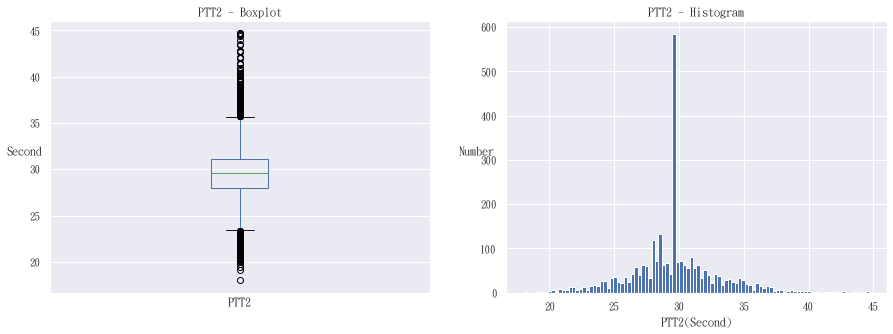

In [263]:
ptt2_nm = tsr_12.loc[:,"ptt2_nm"]

q1 = ptt2_nm.quantile(0.25)
q3 = ptt2_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ptt2_nm[(ptt2_nm < inner_fence_low) | (ptt2_nm > inner_fence_upp)] = np.nan

ptt2_nm =ptt2_nm.fillna(round(ptt2_nm.mean(),3))

#print(ptt2_nm)
#print(ptt2_nm.value_counts() / len(ptt2_nm))
print(ptt2_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ptt2_nm.plot.box(ax = ax1)
ax1.set_title("PTT2 - Boxplot")
ax1.set_xlabel('PTT2')
ax1.set_ylabel('Second', rotation=0)
ax1.set_xticks([])

#ptt2_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ptt2_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PTT2 - Histogram")
ax2.set_xlabel('PTT2(Second)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# PT (INR)

<ipython-input-264-d8dccaaf2e26>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptinr_nm[(ptinr_nm < inner_fence_low) | (ptinr_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean        1.031037
std         0.075276
min         0.820000
25%         0.980000
50%         1.031000
75%         1.060000
max         1.380000
Name: ptinr_nm, dtype: float64


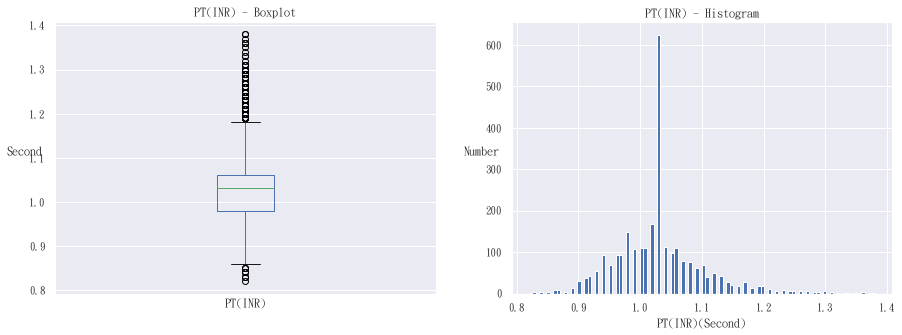

In [264]:
ptinr_nm = tsr_12.loc[:,"ptinr_nm"]

q1 = ptinr_nm.quantile(0.25)
q3 = ptinr_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ptinr_nm[(ptinr_nm < inner_fence_low) | (ptinr_nm > inner_fence_upp)] = np.nan

ptinr_nm =ptinr_nm.fillna(round(ptinr_nm.mean(),3))

#print(ptinr_nm)
#print(ptinr_nmptinr_nm.value_counts() / len(ptinr_nm))
print(ptinr_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ptinr_nm.plot.box(ax = ax1)
ax1.set_title("PT(INR) - Boxplot")
ax1.set_xlabel('PT(INR)')
ax1.set_ylabel('Second', rotation=0)
ax1.set_xticks([])

#ptinr_nmptinr_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ptinr_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PT(INR) - Histogram")
ax2.set_xlabel('PT(INR)(Second)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# GLUCOSE (ER)

<ipython-input-265-ca943ac72cde>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er_nm[(er_nm < inner_fence_low) | (er_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean      151.169099
std        57.186577
min         0.050000
25%       114.000000
50%       141.000000
75%       168.000000
max       354.000000
Name: er_nm, dtype: float64


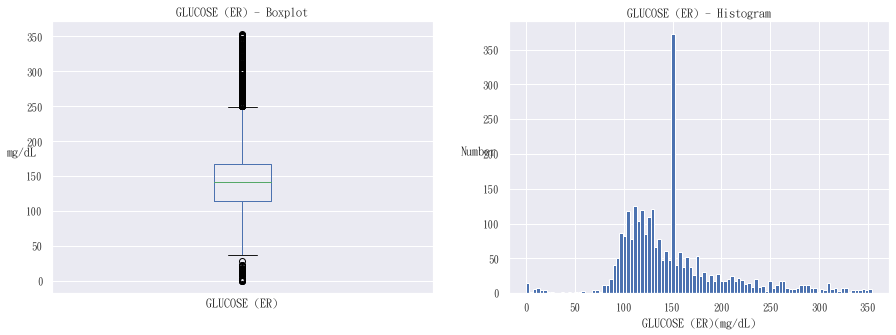

In [265]:
er_nm = tsr_12.loc[:,"er_nm"]

q1 = er_nm.quantile(0.25)
q3 = er_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
er_nm[(er_nm < inner_fence_low) | (er_nm > inner_fence_upp)] = np.nan

er_nm =er_nm.fillna(round(er_nm.mean(),3))

#print(er_nm)
#print(er_nm.value_counts() / len(er_nm))
print(er_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

er_nm.plot.box(ax = ax1)
ax1.set_title("GLUCOSE (ER) - Boxplot")
ax1.set_xlabel('GLUCOSE (ER)')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#er_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
er_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("GLUCOSE (ER) - Histogram")
ax2.set_xlabel('GLUCOSE (ER)(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# BUN

<ipython-input-266-52fd61e94827>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bun_nm[(bun_nm < inner_fence_low) | (bun_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean       15.337923
std         5.433291
min         0.140000
25%        12.000000
50%        15.000000
75%        18.000000
max        32.000000
Name: bun_nm, dtype: float64


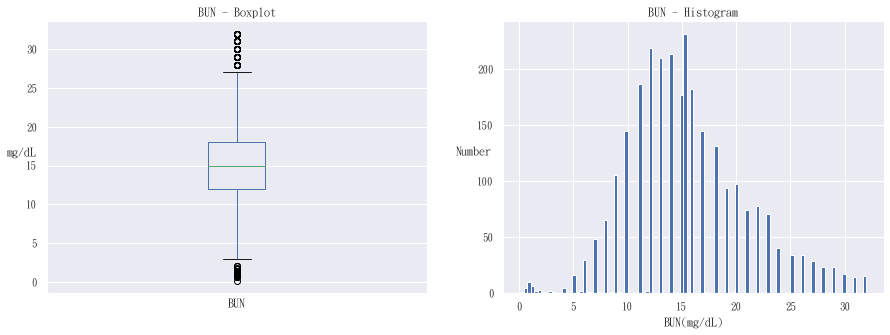

In [266]:
bun_nm = tsr_12.loc[:,"bun_nm"]

q1 = bun_nm.quantile(0.25)
q3 = bun_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
bun_nm[(bun_nm < inner_fence_low) | (bun_nm > inner_fence_upp)] = np.nan

bun_nm =bun_nm.fillna(round(bun_nm.mean(),3))

#print(bun_nm)
#print(bun_nm.value_counts() / len(bun_nm))
print(bun_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bun_nm.plot.box(ax = ax1)
ax1.set_title("BUN - Boxplot")
ax1.set_xlabel('BUN')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#bun_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
bun_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("BUN - Histogram")
ax2.set_xlabel('BUN(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Creatinine

<ipython-input-267-f55024dd7b61>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cre_nm[(cre_nm < inner_fence_low) | (cre_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean        0.963681
std         0.260859
min         0.270000
25%         0.800000
50%         0.964000
75%         1.100000
max         1.790000
Name: cre_nm, dtype: float64


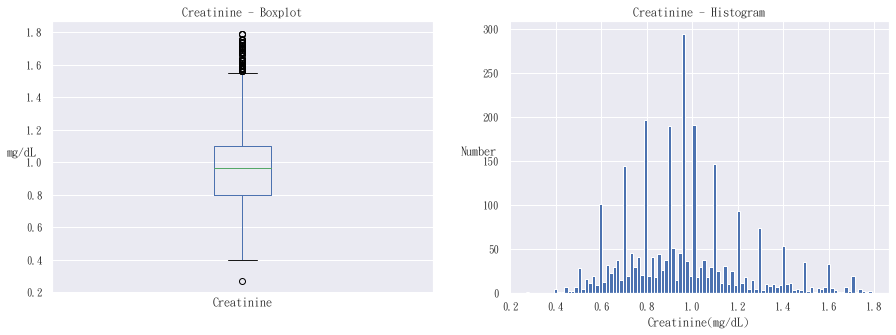

In [267]:
cre_nm = tsr_12.loc[:,"cre_nm"]

q1 = cre_nm.quantile(0.25)
q3 = cre_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
cre_nm[(cre_nm < inner_fence_low) | (cre_nm > inner_fence_upp)] = np.nan

cre_nm =cre_nm.fillna(round(cre_nm.mean(),3))

#print(cre_nm)
#print(cre_nm.value_counts() / len(cre_nm))
print(cre_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

cre_nm.plot.box(ax = ax1)
ax1.set_title("Creatinine - Boxplot")
ax1.set_xlabel('Creatinine')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#cre_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
cre_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Creatinine - Histogram")
ax2.set_xlabel('Creatinine(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Albumin ???

<ipython-input-268-42e7b13b31e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm[alb_nm == 999.9] = np.nan
<ipython-input-268-42e7b13b31e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm[alb_nm == 999] = np.nan
<ipython-input-268-42e7b13b31e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm[alb_nm == 99.9] = np.nan


count    2797.000000
mean        3.741120
std         4.242981
min         0.030000
25%         3.741000
50%         3.741000
75%         3.741000
max       176.000000
Name: alb_nm, dtype: float64


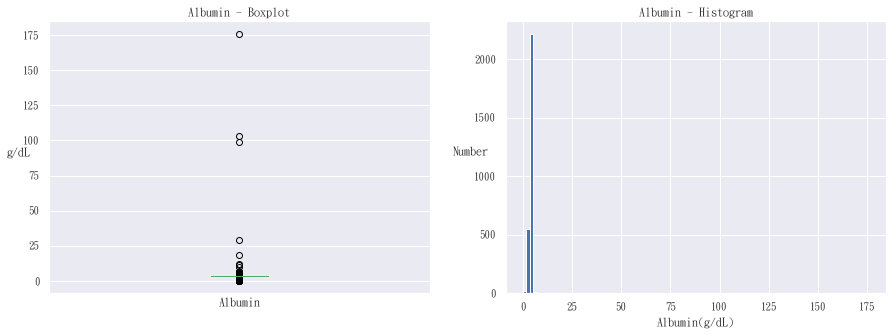

In [268]:
alb_nm = tsr_12.loc[:,"alb_nm"]
alb_nm[alb_nm == 999.9] = np.nan
alb_nm[alb_nm == 999] = np.nan
alb_nm[alb_nm == 99.9] = np.nan
alb_nm =alb_nm.fillna(round(alb_nm.mean(),3))
#print(alb_nm)
#print(alb_nm.value_counts() / len(alb_nm))
print(alb_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

alb_nm.plot.box(ax = ax1)
ax1.set_title("Albumin - Boxplot")
ax1.set_xlabel('Albumin')
ax1.set_ylabel('g/dL', rotation=0)
ax1.set_xticks([])

#alb_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
alb_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Albumin - Histogram")
ax2.set_xlabel('Albumin(g/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-269-127c0010e7dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm_1[alb_nm_1 == 999.9] = np.nan
<ipython-input-269-127c0010e7dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm_1[(alb_nm_1 < inner_fence_low) | (alb_nm_1 > inner_fence_upp)] = np.nan


count    2797.000000
mean        3.261059
std         0.356243
min         1.500000
25%         3.261000
50%         3.261000
75%         3.261000
max         5.000000
Name: alb_nm, dtype: float64


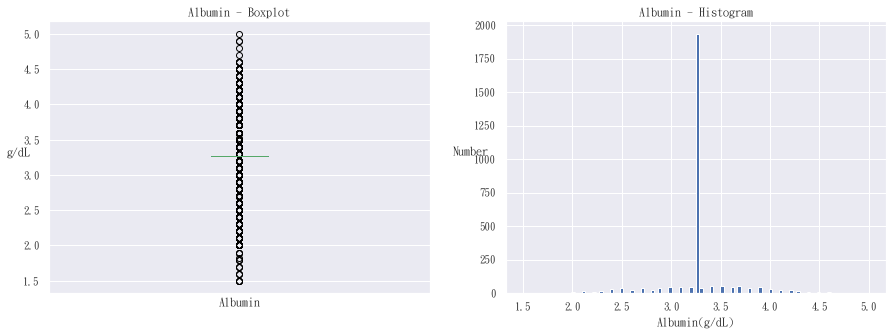

In [269]:
alb_nm_1 = tsr_12.loc[:,"alb_nm"]
alb_nm_1[alb_nm_1 == 999.9] = np.nan

q1 = alb_nm_1.quantile(0.25)
q3 = alb_nm_1.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
alb_nm_1[(alb_nm_1 < inner_fence_low) | (alb_nm_1 > inner_fence_upp)] = np.nan

alb_nm_1 =alb_nm_1.fillna(round(alb_nm_1.mean(),3))

#print(alb_nm_1)
#print(alb_nm_1.value_counts() / len(alb_nm_1))
print(alb_nm_1.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

alb_nm_1.plot.box(ax = ax1)
ax1.set_title("Albumin - Boxplot")
ax1.set_xlabel('Albumin')
ax1.set_ylabel('g/dL', rotation=0)
ax1.set_xticks([])

#alb_nm_1.plot.hist(ax = ax2, bins=100)
#plt.show()
alb_nm_1.plot.hist(ax = ax2, bins=100)
ax2.set_title("Albumin - Histogram")
ax2.set_xlabel('Albumin(g/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# CRP

<ipython-input-270-af5dfcf36b96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm[crp_nm == 999.9] = np.nan
<ipython-input-270-af5dfcf36b96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm[crp_nm == 999] = np.nan
<ipython-input-270-af5dfcf36b96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm[crp_nm == 99.9] = np.nan


count    2797.000000
mean        3.654075
std        10.302683
min         0.000000
25%         0.700000
50%         3.654000
75%         3.654000
max       277.000000
Name: crp_nm, dtype: float64


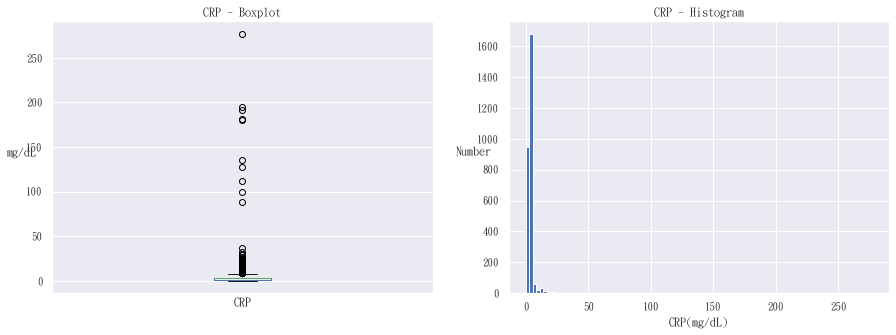

In [270]:
crp_nm = tsr_12.loc[:,"crp_nm"]
crp_nm[crp_nm == 999.9] = np.nan
crp_nm[crp_nm == 999] = np.nan
crp_nm[crp_nm == 99.9] = np.nan
crp_nm =crp_nm.fillna(round(crp_nm.mean(),3))
#print(crp_nm)
#print(crp_nm.value_counts() / len(crp_nm))
print(crp_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

crp_nm.plot.box(ax = ax1)
ax1.set_title("CRP - Boxplot")
ax1.set_xlabel('CRP')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#crp_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
crp_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("CRP - Histogram")
ax2.set_xlabel('CRP(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-271-8140b1a77de0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm_1[crp_nm_1 == 999.9] = np.nan
<ipython-input-271-8140b1a77de0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm_1[(crp_nm_1 < inner_fence_low) | (crp_nm_1 > inner_fence_upp)] = np.nan


count    2797.000000
mean        0.843030
std         0.688055
min         0.000000
25%         0.700000
50%         0.843000
75%         0.843000
max         5.130000
Name: crp_nm, dtype: float64


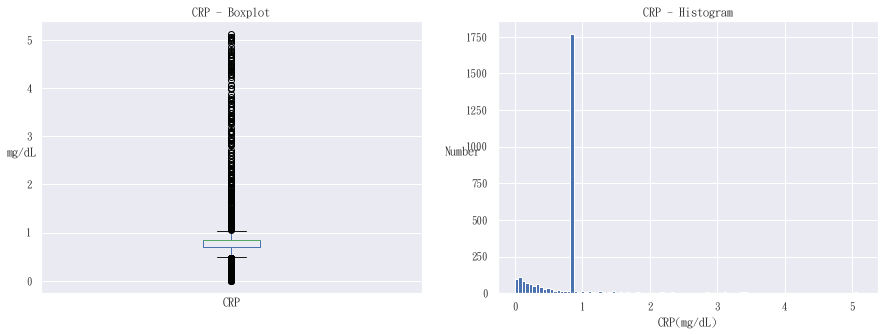

In [271]:
crp_nm_1 = tsr_12.loc[:,"crp_nm"]
crp_nm_1[crp_nm_1 == 999.9] = np.nan

q1 = crp_nm_1.quantile(0.25)
q3 = crp_nm_1.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
crp_nm_1[(crp_nm_1 < inner_fence_low) | (crp_nm_1 > inner_fence_upp)] = np.nan

crp_nm_1 =crp_nm_1.fillna(round(crp_nm_1.mean(),3))

#print(crp_nm_1)
#print(crp_nm_1.value_counts() / len(crp_nm_1))
print(crp_nm_1.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

crp_nm_1.plot.box(ax = ax1)
ax1.set_title("CRP - Boxplot")
ax1.set_xlabel('CRP')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#crp_nm_1.plot.hist(ax = ax2, bins=100)
#plt.show()
crp_nm_1.plot.hist(ax = ax2, bins=100)
ax2.set_title("CRP - Histogram")
ax2.set_xlabel('CRP(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# HbA1c

<ipython-input-272-a324b50836d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbac_nm[hbac_nm == 999.9] = np.nan


count    2797.000000
mean        9.080850
std        11.673192
min         0.700000
25%         6.300000
50%         9.081000
75%         9.081000
max       215.000000
Name: hbac_nm, dtype: float64


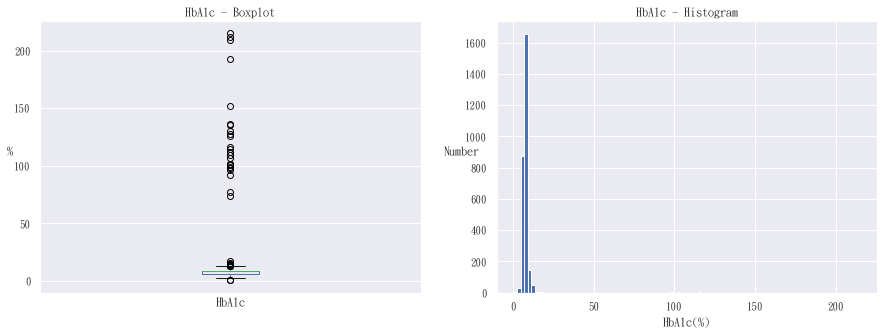

In [272]:
hbac_nm = tsr_12.loc[:,"hbac_nm"]
hbac_nm[hbac_nm == 999.9] = np.nan
hbac_nm =hbac_nm.fillna(round(hbac_nm.mean(),3))
#print(hbac_nm)
#print(hbac_nm.value_counts() / len(hbac_nm))
print(hbac_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hbac_nm.plot.box(ax = ax1)
ax1.set_title("HbA1c - Boxplot")
ax1.set_xlabel('HbA1c')
ax1.set_ylabel('%', rotation=0)
ax1.set_xticks([])

#hbac_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hbac_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HbA1c - Histogram")
ax2.set_xlabel('HbA1c(%)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-273-602eddcb2974>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbac_nm_1[hbac_nm_1 == 999.9] = np.nan
<ipython-input-273-602eddcb2974>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbac_nm_1[(hbac_nm_1 < inner_fence_low) | (hbac_nm_1 > inner_fence_upp)] = np.nan


count    2797.000000
mean        6.875046
std         1.136344
min         2.700000
25%         6.300000
50%         6.875000
75%         6.875000
max        11.700000
Name: hbac_nm, dtype: float64


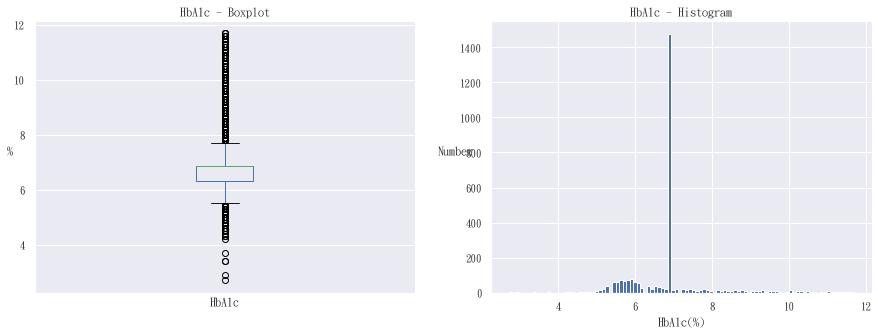

In [273]:
hbac_nm_1 = tsr_12.loc[:,"hbac_nm"]
hbac_nm_1[hbac_nm_1 == 999.9] = np.nan

q1 = hbac_nm_1.quantile(0.25)
q3 = hbac_nm_1.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hbac_nm_1[(hbac_nm_1 < inner_fence_low) | (hbac_nm_1 > inner_fence_upp)] = np.nan

hbac_nm_1 =hbac_nm_1.fillna(round(hbac_nm_1.mean(),3))

#print(hbac_nm_1)
#print(hbac_nm_1.value_counts() / len(hbac_nm_1))
print(hbac_nm_1.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hbac_nm_1.plot.box(ax = ax1)
ax1.set_title("HbA1c - Boxplot")
ax1.set_xlabel('HbA1c')
ax1.set_ylabel('%', rotation=0)
ax1.set_xticks([])

#hbac_nm_1.plot.hist(ax = ax2, bins=100)
#plt.show()
hbac_nm_1.plot.hist(ax = ax2, bins=100)
ax2.set_title("HbA1c - Histogram")
ax2.set_xlabel('HbA1c(%)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 抽血結果 - 第一次空腹抽血

# Glu (AC)

<ipython-input-274-d6cefe3d0762>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac_nm[(ac_nm < inner_fence_low) | (ac_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean      359.250634
std       388.206852
min         2.400000
25%       100.000000
50%       133.000000
75%       999.900000
max       999.900000
Name: ac_nm, dtype: float64


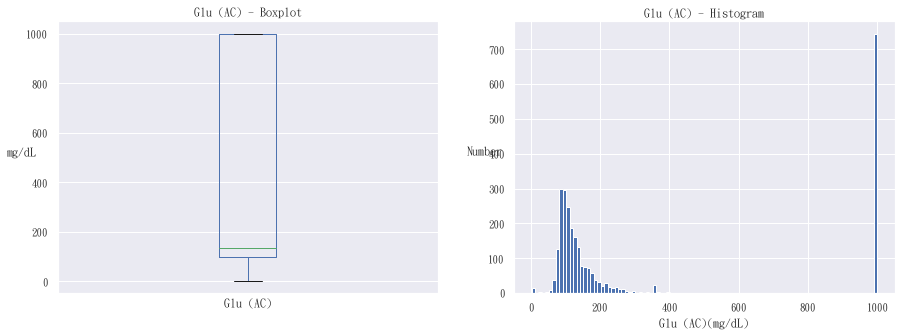

In [274]:
ac_nm = tsr_12.loc[:,"ac_nm"]

q1 = ac_nm.quantile(0.25)
q3 = ac_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ac_nm[(ac_nm < inner_fence_low) | (ac_nm > inner_fence_upp)] = np.nan

ac_nm =ac_nm.fillna(round(ac_nm.mean(),3))

#print(ac_nm)
#print(ac_nm.value_counts() / len(ac_nm))
print(ac_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ac_nm.plot.box(ax = ax1)
ax1.set_title("Glu (AC) - Boxplot")
ax1.set_xlabel('Glu (AC)')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#ac_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ac_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Glu (AC) - Histogram")
ax2.set_xlabel('Glu (AC)(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# UA

<ipython-input-275-08ccb9ba14d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ua_nm[ua_nm == 999.9] = np.nan
<ipython-input-275-08ccb9ba14d7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ua_nm[(ua_nm < inner_fence_low) | (ua_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean        5.590168
std         1.240613
min         1.500000
25%         5.000000
50%         5.590000
75%         5.900000
max        10.000000
Name: ua_nm, dtype: float64


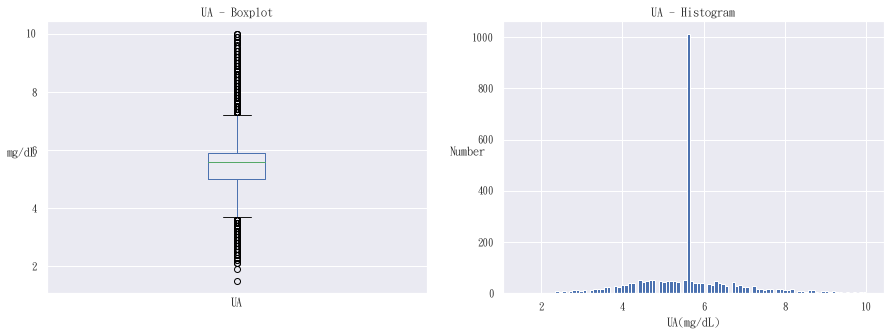

In [275]:
ua_nm = tsr_12.loc[:,"ua_nm"]
ua_nm[ua_nm == 999.9] = np.nan

q1 = ua_nm.quantile(0.25)
q3 = ua_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ua_nm[(ua_nm < inner_fence_low) | (ua_nm > inner_fence_upp)] = np.nan

ua_nm =ua_nm.fillna(round(ua_nm.mean(),3))

#print(ua_nm)
#print(ua_nm.value_counts() / len(ua_nm))
print(ua_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ua_nm.plot.box(ax = ax1)
ax1.set_title("UA - Boxplot")
ax1.set_xlabel('UA')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#ua_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ua_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("UA - Histogram")
ax2.set_xlabel('UA(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# T-CHO

<ipython-input-276-cef5c14c4ac5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcho_nm[tcho_nm == 999.9] = np.nan
<ipython-input-276-cef5c14c4ac5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcho_nm[(tcho_nm < inner_fence_low) | (tcho_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean      131.477064
std        51.946829
min        16.000000
25%        96.000000
50%       131.477000
75%       151.000000
max       318.000000
Name: tcho_nm, dtype: float64


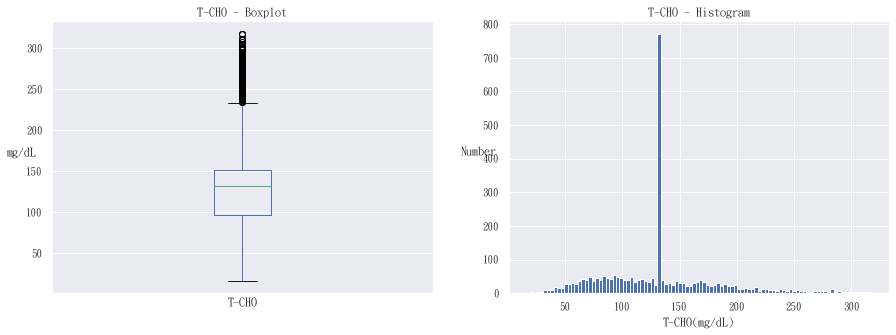

In [276]:
tcho_nm = tsr_12.loc[:,"tcho_nm"]
tcho_nm[tcho_nm == 999.9] = np.nan

q1 = tcho_nm.quantile(0.25)
q3 = tcho_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
tcho_nm[(tcho_nm < inner_fence_low) | (tcho_nm > inner_fence_upp)] = np.nan

tcho_nm =tcho_nm.fillna(round(tcho_nm.mean(),3))

#print(tcho_nm)
#print(tcho_nm.value_counts() / len(tcho_nm))
print(tcho_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

tcho_nm.plot.box(ax = ax1)
ax1.set_title("T-CHO - Boxplot")
ax1.set_xlabel('T-CHO')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#tcho_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
tcho_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("T-CHO - Histogram")
ax2.set_xlabel('T-CHO(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# TG

<ipython-input-277-fe822cfb140c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_nm[tg_nm == 999.9] = np.nan
<ipython-input-277-fe822cfb140c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_nm[tg_nm == 2000] = np.nan
<ipython-input-277-fe822cfb140c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_nm[(tg_nm < inner_fence_low) | (tg_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean      173.546945
std        38.494076
min        56.000000
25%       157.000000
50%       173.547000
75%       192.000000
max       291.000000
Name: tg_nm, dtype: float64


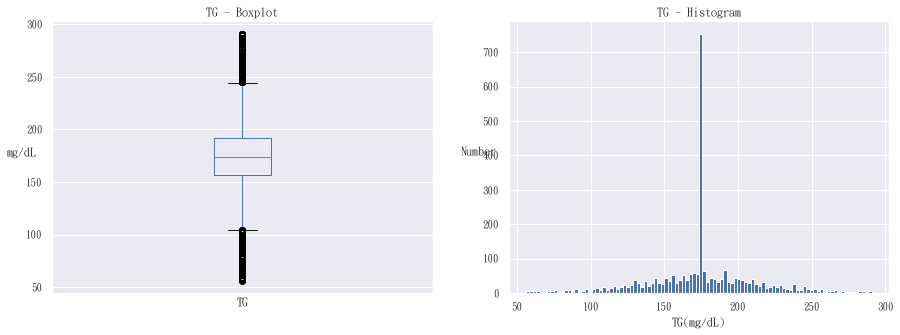

In [277]:
tg_nm = tsr_12.loc[:,"tg_nm"]
tg_nm[tg_nm == 999.9] = np.nan
tg_nm[tg_nm == 2000] = np.nan

q1 = tg_nm.quantile(0.25)
q3 = tg_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
tg_nm[(tg_nm < inner_fence_low) | (tg_nm > inner_fence_upp)] = np.nan

tg_nm =tg_nm.fillna(round(tg_nm.mean(),3))

#print(tg_nm)
#print(tg_nm.value_counts() / len(tg_nm))
print(tg_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

tg_nm.plot.box(ax = ax1)
ax1.set_title("TG - Boxplot")
ax1.set_xlabel('TG')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#tg_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
tg_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("TG - Histogram")
ax2.set_xlabel('TG(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# HDL

<ipython-input-278-9cadb1b88c28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdl_nm[hdl_nm == 999.9] = np.nan
<ipython-input-278-9cadb1b88c28>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdl_nm[(hdl_nm < inner_fence_low) | (hdl_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean      104.346134
std        35.007903
min        10.000000
25%        88.900000
50%       104.346000
75%       122.300000
max       215.300000
Name: hdl_nm, dtype: float64


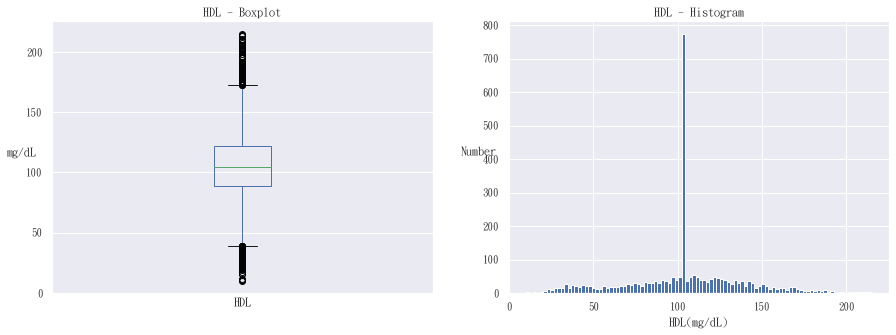

In [278]:
hdl_nm = tsr_12.loc[:,"hdl_nm"]
hdl_nm[hdl_nm == 999.9] = np.nan

q1 = hdl_nm.quantile(0.25)
q3 = hdl_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hdl_nm[(hdl_nm < inner_fence_low) | (hdl_nm > inner_fence_upp)] = np.nan

hdl_nm =hdl_nm.fillna(round(hdl_nm.mean(),3))

#print(hdl_nm)
#print(hdl_nm.value_counts() / len(hdl_nm))
print(hdl_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hdl_nm.plot.box(ax = ax1)
ax1.set_title("HDL - Boxplot")
ax1.set_xlabel('HDL')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#hdl_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hdl_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HDL - Histogram")
ax2.set_xlabel('HDL(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# LDL

count    2797.000000
mean       36.250007
std         8.680249
min         4.900000
25%        32.000000
50%        36.250000
75%        37.400000
max        72.300000
Name: ldl_nm, dtype: float64


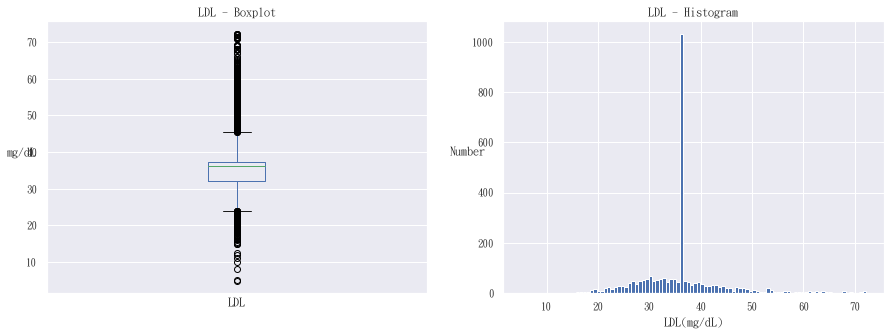

In [279]:
ldl_nm = tsr_12.loc[:,"ldl_nm"]
ldl_nm = pd.to_numeric(ldl_nm, errors = "coerce")
ldl_nm[ldl_nm == 999.9] = np.nan

q1 = ldl_nm.quantile(0.25)
q3 = ldl_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ldl_nm[(ldl_nm < inner_fence_low) | (ldl_nm > inner_fence_upp)] = np.nan

ldl_nm =ldl_nm.fillna(round(ldl_nm.mean(),3))

#print(ldl_nm)
#print(ldl_nm.value_counts() / len(ldl_nm))
print(ldl_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ldl_nm.plot.box(ax = ax1)
ax1.set_title("LDL - Boxplot")
ax1.set_xlabel('LDL')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#ldl_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ldl_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("LDL - Histogram")
ax2.set_xlabel('LDL(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# GOT

<ipython-input-280-95b381356aef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got_nm[got_nm == 999.9] = np.nan


count    2797.000000
mean       30.645966
std        12.335647
min         7.000000
25%        24.000000
50%        30.646000
75%        30.646000
max       114.000000
Name: got_nm, dtype: float64


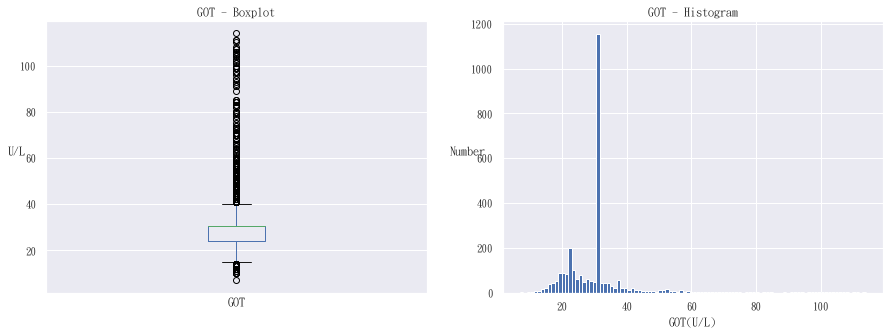

In [280]:
got_nm = tsr_12.loc[:,"got_nm"]
got_nm[got_nm == 999.9] = np.nan
got_nm = pd.to_numeric(got_nm, errors = "coerce")

q1 = got_nm.quantile(0.25)
q3 = got_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
got_nm[(got_nm < inner_fence_low) | (got_nm > inner_fence_upp)] = np.nan

got_nm =got_nm.fillna(round(got_nm.mean(),3))

got_nm = pd.to_numeric(got_nm, errors='coerce')
#print(got_nm)
#print(got_nm.value_counts() / len(got_nm))
print(got_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

got_nm.plot.box(ax = ax1)
ax1.set_title("GOT - Boxplot")
ax1.set_xlabel('GOT')
ax1.set_ylabel('U/L', rotation=0)
ax1.set_xticks([])

#got_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
got_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("GOT - Histogram")
ax2.set_xlabel('GOT(U/L)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# GPT

count    2797.000000
mean       23.129950
std         7.926591
min         2.000000
25%        19.000000
50%        23.130000
75%        23.130000
max        58.000000
Name: gpt_nm, dtype: float64


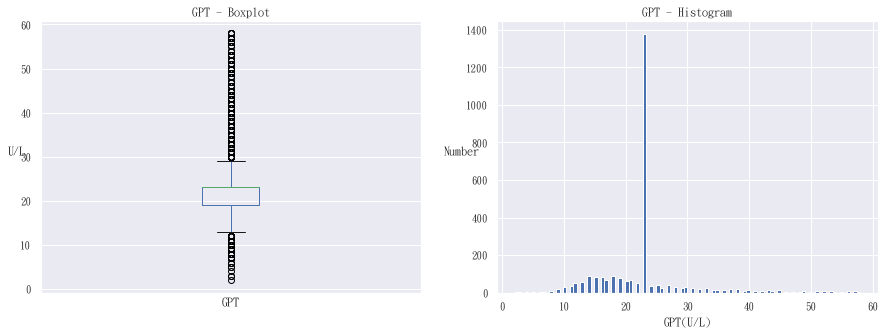

In [281]:
gpt_nm = tsr_12.loc[:,"gpt_nm"]
gpt_nm = pd.to_numeric(gpt_nm, errors = "coerce")
gpt_nm[gpt_nm == 999.9] = np.nan

q1 = gpt_nm.quantile(0.25)
q3 = gpt_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
gpt_nm[(gpt_nm < inner_fence_low) | (gpt_nm > inner_fence_upp)] = np.nan

gpt_nm =gpt_nm.fillna(round(gpt_nm.mean(),3))

#print(gpt_nm)
#print(gpt_nm.value_counts() / len(gpt_nm))
print(gpt_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

gpt_nm.plot.box(ax = ax1)
ax1.set_title("GPT - Boxplot")
ax1.set_xlabel('GPT')
ax1.set_ylabel('U/L', rotation=0)
ax1.set_xticks([])

#gpt_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
gpt_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("GPT - Histogram")
ax2.set_xlabel('GPT(U/L)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 離院情形

3.0    0.996782
1.0    0.002860
2.0    0.000358
Name: off_id, dtype: float64


<ipython-input-282-22c3364ef59b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_id[(off_id != 1) & (off_id != 2) & (off_id != 3)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


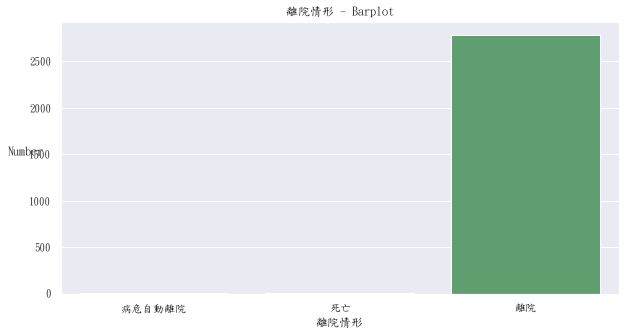

In [282]:
off_id = tsr_12.loc[:,"off_id"]
off_id[(off_id != 1) & (off_id != 2) & (off_id != 3)] = np.nan
off_id = pd.to_numeric(off_id, errors = 'coerce')
off_id =off_id.fillna(off_id.mode()[0])
#print(off_id)
print(off_id.value_counts() / len(off_id))
#print(off_id.describe())

off_id_labels = ["病危自動離院","死亡","離院"]
sns.countplot(off_id).set_xticklabels(off_id_labels)
plt.title("離院情形 - Barplot")
plt.xlabel('離院情形')
plt.ylabel('Number', rotation=0)
plt.show()

# 死亡日期

<ipython-input-283-685b9ca231b8>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(offd_dt.describe())


count                       1
unique                      1
top       2008-06-24 00:00:00
freq                        1
first     2008-06-24 00:00:00
last      2008-06-24 00:00:00
Name: offd_dt, dtype: object


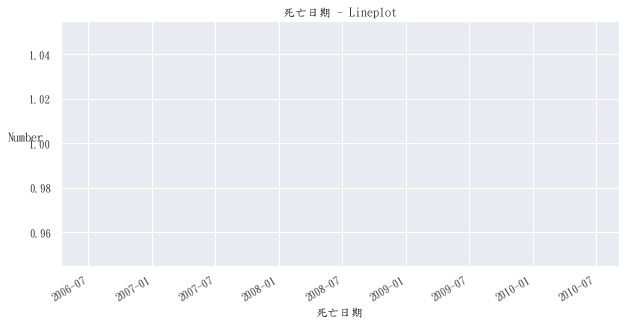

In [283]:
offd_dt = tsr_12.loc[:,"offd_dt"]
offd_dt = pd.to_datetime(offd_dt, errors='coerce')
offd_dt[(offd_dt.dt.year < 2006) | (offd_dt.dt.year > 2021)] = np.nan
offd_dt =offd_dt.fillna(offd_dt.mode()[0])
offd_dt[off_id != 2] = np.nan
#print(offd_dt)
#print(offd_dt.value_counts() / len(offd_dt))
print(offd_dt.describe())

offd_dt.value_counts().plot()
plt.title("死亡日期 - Lineplot")
plt.xlabel('死亡日期')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 死因

99.0    0.000358
Name: offd_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


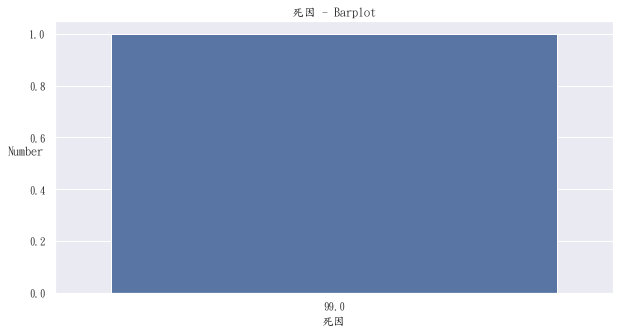

In [284]:
offd_id = tsr_12.loc[:,"offd_id"]
offd_id = pd.to_numeric(offd_id, errors = "coerce")
offd_id[(offd_id != 1) & (offd_id != 2) & (offd_id != 99)] = np.nan
offd_id =offd_id.fillna(offd_id.mode()[0])
offd_id[off_id != 2] = np.nan
#print(offd_id)
print(offd_id.value_counts() / len(offd_id))
#print(offd_id.describe())

#offd_id_labels = ["中風直接致死","併發症致死","其他"]
offd_id_labels = ["其他"]
sns.countplot(offd_id)#.set_xticklabels(offd_id_labels)
plt.title("死因 - Barplot")
plt.xlabel('死因')
plt.ylabel('Number', rotation=0)
plt.show()
offd_id = offd_id.fillna(999)

# 離院，目的地

1.0    0.868788
3.0    0.094029
2.0    0.023954
5.0    0.012513
4.0    0.000715
Name: offdt_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


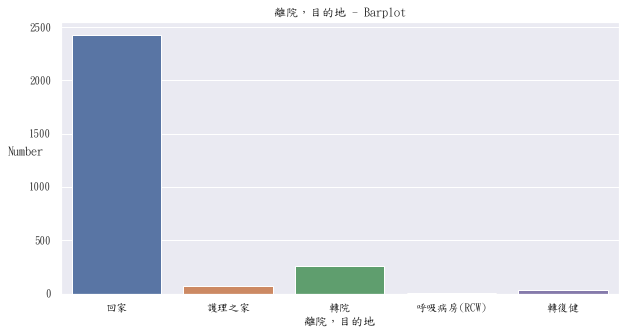

In [285]:
offdt_id = tsr_12.loc[:,"offdt_id"]
offdt_id = pd.to_numeric(offdt_id, errors = "coerce")
offdt_id[(offdt_id != 1) & (offdt_id != 2) & (offdt_id != 3) & (offdt_id != 4) & (offdt_id != 5)] = np.nan
offdt_id =offdt_id.fillna(offdt_id.mode()[0])
#print(offdt_id)
print(offdt_id.value_counts() / len(offdt_id))
#print(offdt_id.describe())

offdt_id_labels = ["回家","護理之家","轉院","呼吸病房(RCW)","轉復健"]
sns.countplot(offdt_id).set_xticklabels(offdt_id_labels)
plt.title("離院，目的地 - Barplot")
plt.xlabel('離院，目的地')
plt.ylabel('Number', rotation=0)
plt.show()

# 離院，轉院醫院

In [286]:
offdtorg_id = tsr_12.loc[:,"offdtorg_id"]
#print(offdtorg_id)
print(offdtorg_id.value_counts() / len(offdtorg_id))
#print(offdtorg_id.describe())

999          0.079728
99           0.075080
22           0.008938
中山           0.001788
21           0.001788
?�家          0.001430
26           0.001073
O            0.000715
24           0.000715
29           0.000358
?�德          0.000358
中�??�藥       0.000358
2013/6/2     0.000358
?�中署�?       0.000358
?�芳          0.000358
?�中          0.000358
2012/8/1     0.000358
44           0.000358
2012/8/17    0.000358
2008/11/6    0.000358
豐�?署�?       0.000358
Name: offdtorg_id, dtype: float64


# 轉復健日期

<ipython-input-287-7dc16a1d9281>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(offre_dt.describe())


count                    2788
unique                     89
top       2008-03-23 00:00:00
freq                     2697
first     2006-09-02 00:00:00
last      2018-05-09 00:00:00
Name: offre_dt, dtype: object


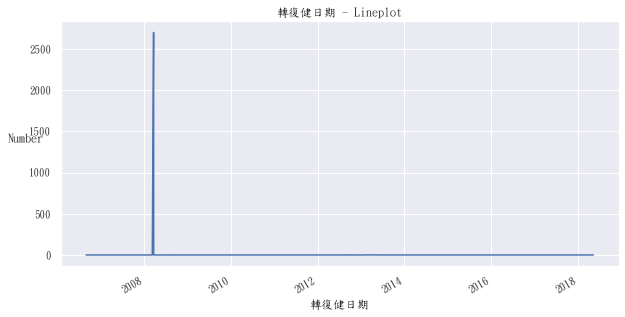

In [287]:
offre_dt = tsr_12.loc[:,"offre_dt"]
offre_dt = pd.to_datetime(offre_dt, errors='coerce')
offre_dt[(offre_dt.dt.year < 2006) | (offre_dt.dt.year > 2021)] = np.nan
offre_dt =offre_dt.fillna(offre_dt.mode()[0])
offre_dt[off_id != 3] = np.nan
#print(offre_dt)
#print(offre_dt.value_counts() / len(offre_dt))
print(offre_dt.describe())

offre_dt.value_counts().plot()
plt.title("轉復健日期 - Lineplot")
plt.xlabel('轉復健日期')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# Feeding

count    2797.000000
mean        7.141580
std         3.731029
min         0.000000
25%         5.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: feeding, dtype: float64


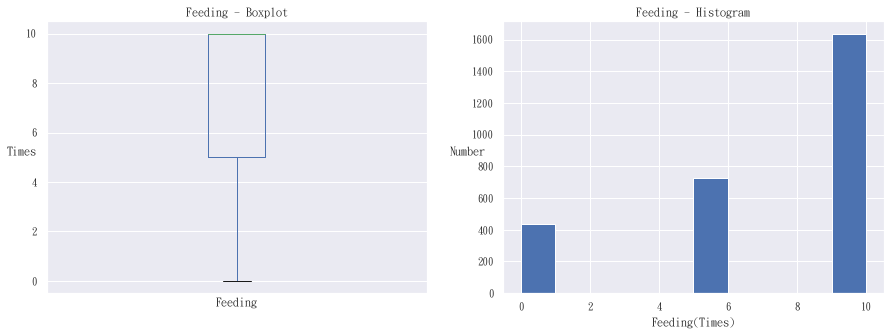

In [288]:
feeding = tsr_12.loc[:, "feeding"]
feeding = pd.to_numeric(feeding, errors = "coerce")
feeding[(feeding < 0 ) | (feeding > 10)] = np.nan
feeding =feeding.fillna(feeding.mode()[0])
#print(feeding)
#print(feeding.value_counts() / len(feeding))
print(feeding.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

feeding.plot.box(ax = ax1)
ax1.set_title("Feeding - Boxplot")
ax1.set_xlabel('Feeding')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

feeding.plot.hist(ax = ax2)
ax2.set_title("Feeding - Histogram")
ax2.set_xlabel('Feeding(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Transfers

count    2797.000000
mean       10.411155
std         5.262330
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        15.000000
Name: transfers, dtype: float64


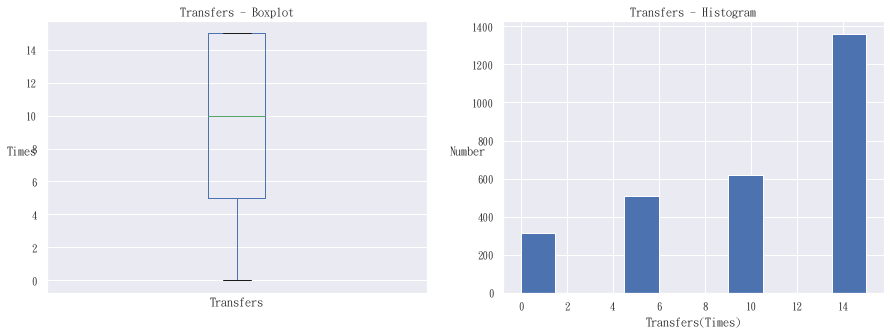

In [289]:
transfers = tsr_12.loc[:, "transfers"]
transfers = pd.to_numeric(transfers, errors = "coerce")
transfers[(transfers < 0 ) | (transfers > 15)] = np.nan
transfers =transfers.fillna(transfers.mode()[0])
#print(transfers)
#print(transfers.value_counts() / len(transfers))
print(transfers.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

transfers.plot.box(ax = ax1)
ax1.set_title("Transfers - Boxplot")
ax1.set_xlabel('Transfers')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

transfers.plot.hist(ax = ax2)
ax2.set_title("Transfers - Histogram")
ax2.set_xlabel('Transfers(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Bathing

count    2797.000000
mean        3.378620
std         2.340937
min         0.000000
25%         0.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: bathing, dtype: float64


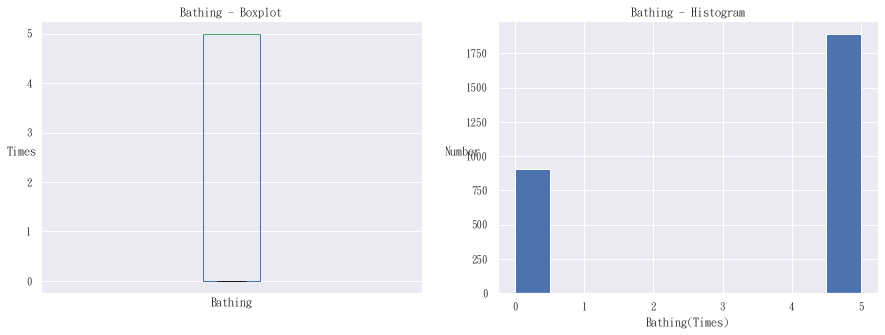

In [290]:
bathing = tsr_12.loc[:, "bathing"]
bathing = pd.to_numeric(bathing, errors = "coerce")
bathing[(bathing < 0 ) | (bathing > 5)] = np.nan
bathing =bathing.fillna(bathing.mode()[0])
#print(bathing)
#print(bathing.value_counts() / len(bathing))
print(bathing.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bathing.plot.box(ax = ax1)
ax1.set_title("Bathing - Boxplot")
ax1.set_xlabel('Bathing')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

bathing.plot.hist(ax = ax2)
ax2.set_title("Bathing - Histogram")
ax2.set_xlabel('Bathing(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Toilet

count    2797.000000
mean        6.589203
std         4.043354
min         0.000000
25%         5.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: toilet_use, dtype: float64


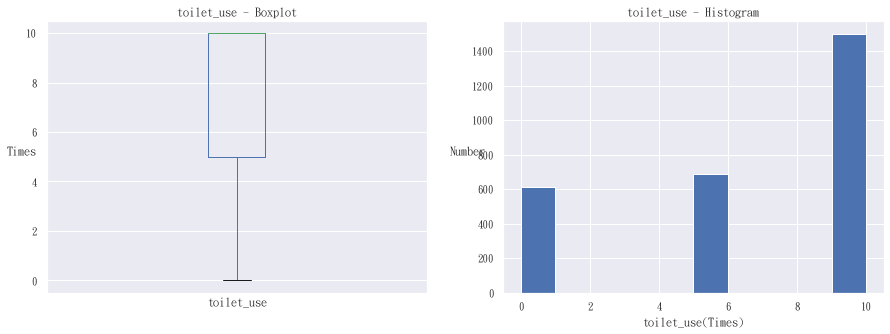

In [291]:
toilet_use = tsr_12.loc[:, "toilet_use"]
toilet_use = pd.to_numeric(toilet_use, errors = "coerce")
toilet_use[(toilet_use < 0 ) | (toilet_use > 10)] = np.nan
toilet_use =toilet_use.fillna(toilet_use.mode()[0])
#print(toilet_use)
#print(toilet_use.value_counts() / len(toilet_use))
print(toilet_use.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

toilet_use.plot.box(ax = ax1)
ax1.set_title("toilet_use - Boxplot")
ax1.set_xlabel('toilet_use')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

toilet_use.plot.hist(ax = ax2)
ax2.set_title("toilet_use - Histogram")
ax2.set_xlabel('toilet_use(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Grooming

count    2797.000000
mean        2.674294
std         2.494363
min         0.000000
25%         0.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: grooming, dtype: float64


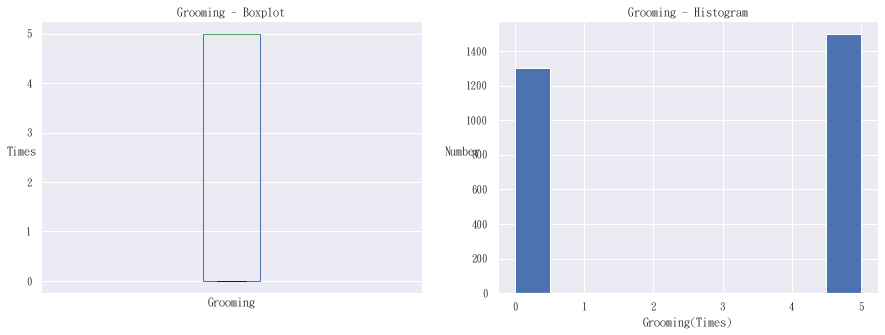

In [292]:
grooming = tsr_12.loc[:, "grooming"]
grooming = pd.to_numeric(grooming, errors = "coerce")
grooming[(grooming < 0 ) | (grooming > 5)] = np.nan
grooming =grooming.fillna(grooming.mode()[0])
#print(grooming)
#print(grooming.value_counts() / len(grooming))
print(grooming.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

grooming.plot.box(ax = ax1)
ax1.set_title("Grooming - Boxplot")
ax1.set_xlabel('Grooming')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

grooming.plot.hist(ax = ax2)
ax2.set_title("Grooming - Histogram")
ax2.set_xlabel('Grooming(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Mobility

count    2797.000000
mean        9.999642
std         5.826258
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        15.000000
Name: mobility, dtype: float64


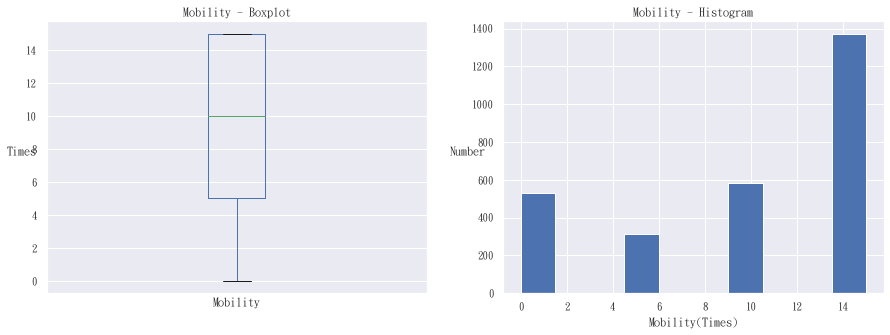

In [293]:
mobility = tsr_12.loc[:, "mobility"]
mobility = pd.to_numeric(mobility, errors = "coerce")
mobility[(mobility < 0 ) | (mobility > 15)] = np.nan
mobility =mobility.fillna(mobility.mode()[0])
#print(mobility)
#print(mobility.value_counts() / len(mobility))
print(mobility.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

mobility.plot.box(ax = ax1)
ax1.set_title("Mobility - Boxplot")
ax1.set_xlabel('Mobility')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

mobility.plot.hist(ax = ax2)
ax2.set_title("Mobility - Histogram")
ax2.set_xlabel('Mobility(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Stairs

count    2797.000000
mean        5.759743
std         4.308829
min         0.000000
25%         0.000000
50%         5.000000
75%        10.000000
max        10.000000
Name: stairs, dtype: float64


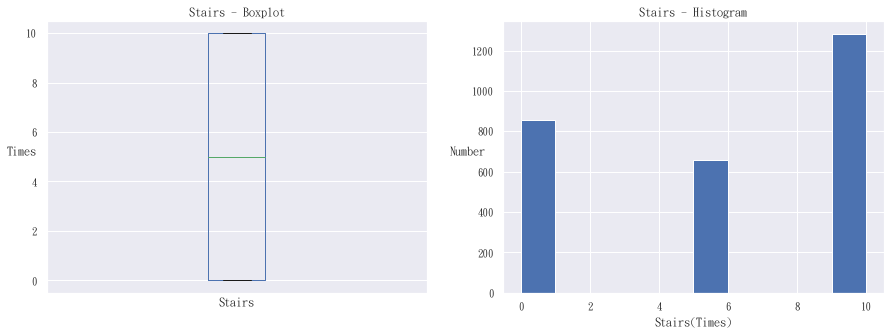

In [294]:
stairs = tsr_12.loc[:, "stairs"]
stairs = pd.to_numeric(stairs, errors = "coerce")
stairs[(stairs < 0 ) | (stairs > 10)] = np.nan
stairs =stairs.fillna(stairs.mode()[0])
#print(stairs)
#print(stairs.value_counts() / len(stairs))
print(stairs.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

stairs.plot.box(ax = ax1)
ax1.set_title("Stairs - Boxplot")
ax1.set_xlabel('Stairs')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

stairs.plot.hist(ax = ax2)
ax2.set_title("Stairs - Histogram")
ax2.set_xlabel('Stairs(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Dressing

count    2797.000000
mean        7.467286
std         3.464734
min         0.000000
25%         5.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: dressing, dtype: float64


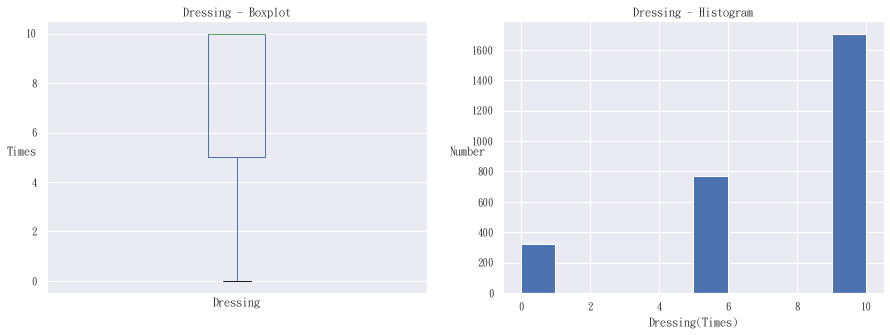

In [295]:
dressing = tsr_12.loc[:, "dressing"]
dressing = pd.to_numeric(dressing, errors = "coerce")
dressing[(dressing < 0 ) | (dressing > 10)] = np.nan
dressing =dressing.fillna(dressing.mode()[0])
#print(dressing)
#print(dressing.value_counts() / len(dressing))
print(dressing.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

dressing.plot.box(ax = ax1)
ax1.set_title("Dressing - Boxplot")
ax1.set_xlabel('Dressing')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

dressing.plot.hist(ax = ax2)
ax2.set_title("Dressing - Histogram")
ax2.set_xlabel('Dressing(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Bowel Control

count    2797.000000
mean        8.630318
std         2.959294
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: bowel_control, dtype: float64


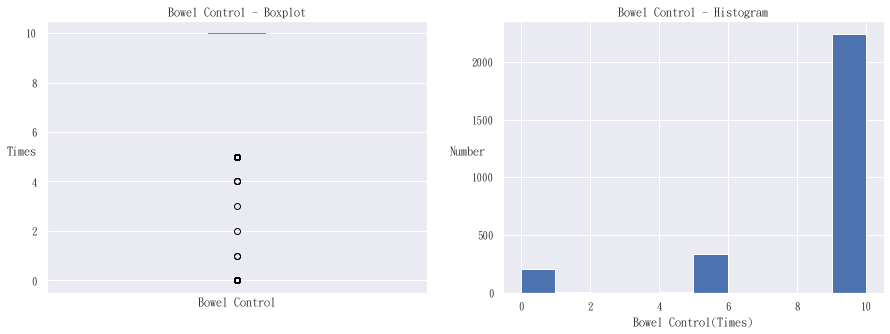

In [296]:
bowel_control = tsr_12.loc[:, "bowel_control"]
bowel_control = pd.to_numeric(bowel_control, errors = "coerce")
bowel_control[(bowel_control < 0 ) | (bowel_control > 10)] = np.nan
bowel_control =bowel_control.fillna(bowel_control.mode()[0])
#print(bowel_control)
#print(bowel_control.value_counts() / len(bowel_control))
print(bowel_control.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bowel_control.plot.box(ax = ax1)
ax1.set_title("Bowel Control - Boxplot")
ax1.set_xlabel('Bowel Control')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

bowel_control.plot.hist(ax = ax2)
ax2.set_title("Bowel Control - Histogram")
ax2.set_xlabel('Bowel Control(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Bladder Control

count    2797.000000
mean        8.258849
std         3.262074
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: bladder_control, dtype: float64


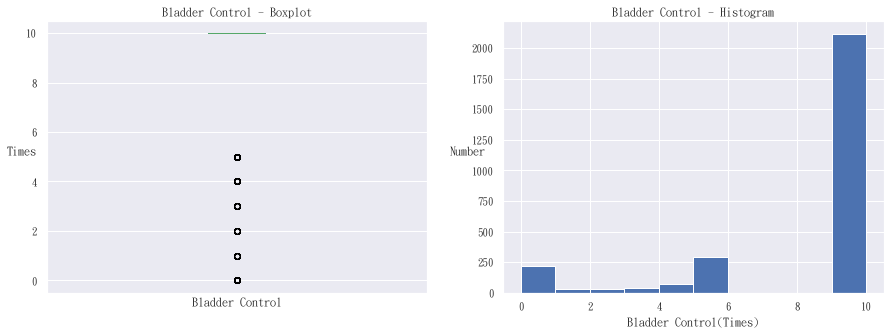

In [297]:
bladder_control = tsr_12.loc[:, "bladder_control"]
bladder_control = pd.to_numeric(bladder_control, errors = "coerce")
bladder_control[(bladder_control < 0 ) | (bladder_control > 10)] = np.nan
bladder_control =bladder_control.fillna(bladder_control.mode()[0])
#print(bladder_control)
#print(bladder_control.value_counts() / len(bladder_control))
print(bladder_control.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bladder_control.plot.box(ax = ax1)
ax1.set_title("Bladder Control - Boxplot")
ax1.set_xlabel('Bladder Control')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

bladder_control.plot.hist(ax = ax2)
ax2.set_title("Bladder Control - Histogram")
ax2.set_xlabel('Bladder Control(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Total

count    2797.000000
mean       70.310690
std        32.159557
min         0.000000
25%        50.000000
50%        80.000000
75%       100.000000
max       100.000000
dtype: float64


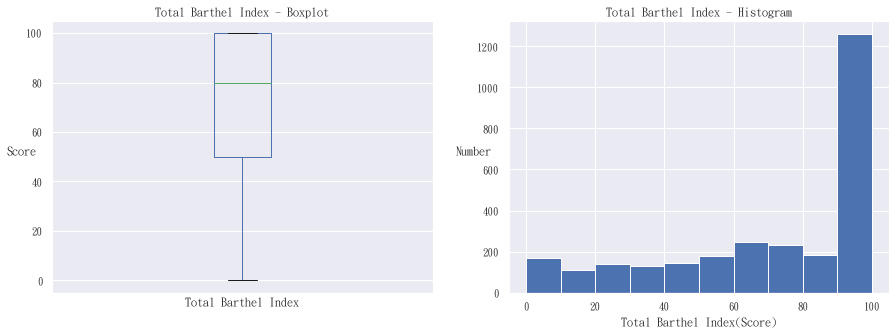

In [298]:
total = feeding + transfers + bathing + toilet_use + grooming + mobility + dressing + stairs + bowel_control + bladder_control
total =total.fillna(total.mean())
#print(total)
#print(total.value_counts() / len(total))
print(total.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

total.plot.box(ax = ax1)
ax1.set_title("Total Barthel Index - Boxplot")
ax1.set_xlabel('Total Barthel Index')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

total.plot.hist(ax = ax2)
ax2.set_title("Total Barthel Index - Histogram")
ax2.set_xlabel('Total Barthel Index(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Discharged mRS

1.0    0.384340
2.0    0.172327
4.0    0.149446
3.0    0.144440
0.0    0.095102
5.0    0.054344
Name: discharged_mrs, dtype: float64
count    2797.000000
mean        2.031820
std         1.412717
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: discharged_mrs, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


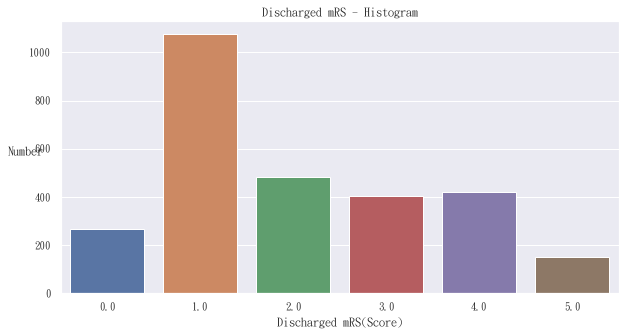

In [299]:
discharged_mrs = tsr_12.loc[:, "discharged_mrs"]
discharged_mrs = pd.to_numeric(discharged_mrs, errors = "coerce")
discharged_mrs[(discharged_mrs != 0) & (discharged_mrs != 1) & (discharged_mrs != 2) & (discharged_mrs != 3) & (discharged_mrs != 4) & (discharged_mrs != 5) & (discharged_mrs != 6)] = np.nan
discharged_mrs = discharged_mrs.fillna(discharged_mrs.mode()[0])
#print(discharged_mrs)
print(discharged_mrs.value_counts() / len(discharged_mrs))
print(discharged_mrs.describe())

sns.countplot(discharged_mrs)
plt.title("Discharged mRS - Histogram")
plt.xlabel('Discharged mRS(Score)')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical ACA_CT_Right

N    0.992849
Y    0.007151
Name: cortical_aca_ctr, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


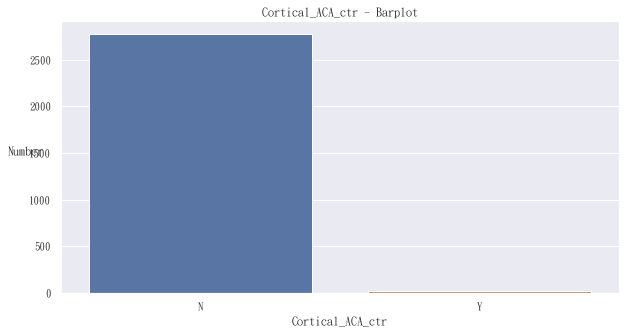

In [300]:
cortical_aca_ctr = tsr_12.loc[:,"cortical_aca_ctr"]
cortical_aca_ctr = cortical_aca_ctr.fillna(cortical_aca_ctr.mode()[0])
#print(cortical_aca_ctr)
print(cortical_aca_ctr.value_counts() / len(cortical_aca_ctr))
#print(cortical_aca_ctr.describe())

sns.countplot(cortical_aca_ctr)
plt.title("Cortical_ACA_ctr - Barplot")
plt.xlabel('Cortical_ACA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical MCA_CT_Right

N    0.966035
Y    0.033965
Name: cortical_mca_ctr, dtype: float64


<ipython-input-301-4c4d34696856>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_mca_ctr[cortical_mca_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


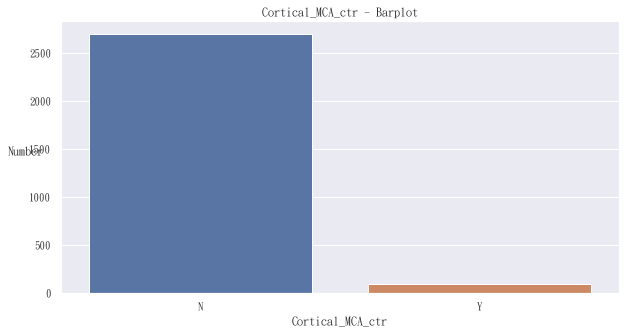

In [301]:
cortical_mca_ctr = tsr_12.loc[:,"cortical_mca_ctr"]
cortical_mca_ctr[cortical_mca_ctr == '0'] = "N"
cortical_mca_ctr = cortical_mca_ctr.fillna(cortical_mca_ctr.mode()[0])
#print(cortical_mca_ctr)
print(cortical_mca_ctr.value_counts() / len(cortical_mca_ctr))
#print(cortical_mca_ctr.describe())

sns.countplot(cortical_mca_ctr)
plt.title("Cortical_MCA_ctr - Barplot")
plt.xlabel('Cortical_MCA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical ACA_CT_Right

N    0.991419
Y    0.008581
Name: subcortical_aca_ctr, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


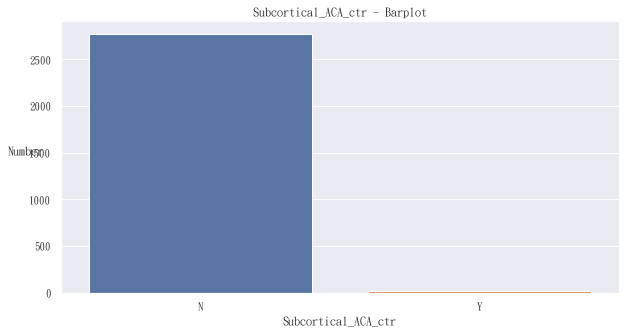

In [302]:
subcortical_aca_ctr = tsr_12.loc[:,"subcortical_aca_ctr"]
subcortical_aca_ctr = subcortical_aca_ctr.fillna(subcortical_aca_ctr.mode()[0])
#print(subcortical_aca_ctr)
print(subcortical_aca_ctr.value_counts() / len(subcortical_aca_ctr))
#print(subcortical_aca_ctr.describe())

sns.countplot(subcortical_aca_ctr)
plt.title("Subcortical_ACA_ctr - Barplot")
plt.xlabel('Subcortical_ACA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical MCA_CT_Right

N    0.934573
Y    0.065427
Name: subcortical_mca_ctr, dtype: float64


<ipython-input-303-3072f77230d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subcortical_mca_ctr[subcortical_mca_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


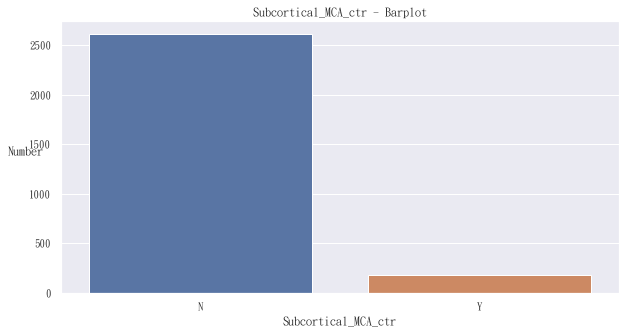

In [303]:
subcortical_mca_ctr = tsr_12.loc[:,"subcortical_mca_ctr"]
subcortical_mca_ctr[subcortical_mca_ctr == '0'] = "N"
subcortical_mca_ctr = subcortical_mca_ctr.fillna(subcortical_mca_ctr.mode()[0])
#print(subcortical_mca_ctr)
print(subcortical_mca_ctr.value_counts() / len(subcortical_mca_ctr))
#print(subcortical_mca_ctr.describe())

sns.countplot(subcortical_mca_ctr)
plt.title("Subcortical_MCA_ctr - Barplot")
plt.xlabel('Subcortical_MCA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation PCA_cortex_CT_Right

N    0.989632
Y    0.010368
Name: pca_cortex_ctr, dtype: float64


<ipython-input-304-961d1880a24a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_cortex_ctr[pca_cortex_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


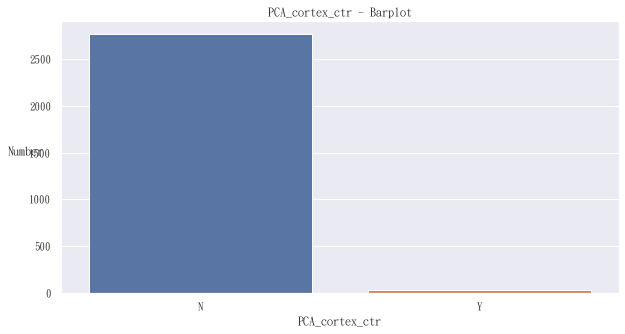

In [304]:
pca_cortex_ctr = tsr_12.loc[:,"pca_cortex_ctr"]
pca_cortex_ctr[pca_cortex_ctr == '0'] = "N"
pca_cortex_ctr = pca_cortex_ctr.fillna(pca_cortex_ctr.mode()[0])
#print(pca_cortex_ctr)
print(pca_cortex_ctr.value_counts() / len(pca_cortex_ctr))
#print(pca_cortex_ctr.describe())

sns.countplot(pca_cortex_ctr)
plt.title("PCA_cortex_ctr - Barplot")
plt.xlabel('PCA_cortex_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Thalamus_CT_Right

N    0.988202
Y    0.011798
Name: thalamus_ctr, dtype: float64


<ipython-input-305-e4510c6bc145>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thalamus_ctr[thalamus_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


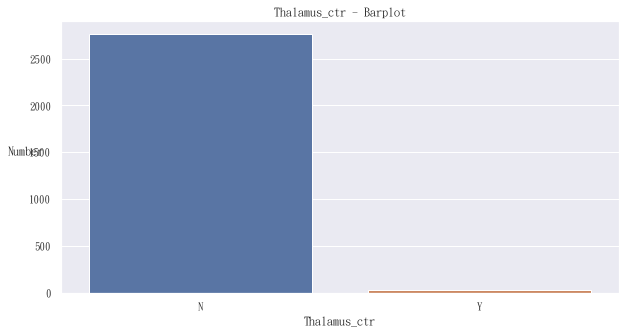

In [305]:
thalamus_ctr = tsr_12.loc[:,"thalamus_ctr"]
thalamus_ctr[thalamus_ctr == '0'] = "N"
thalamus_ctr = thalamus_ctr.fillna(thalamus_ctr.mode()[0])
#print(thalamus_ctr)
print(thalamus_ctr.value_counts() / len(thalamus_ctr))
#print(thalamus_ctr.describe())

sns.countplot(thalamus_ctr)
plt.title("Thalamus_ctr - Barplot")
plt.xlabel('Thalamus_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_CT_Right

N    0.987487
Y    0.012513
Name: brainstem_ctr, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


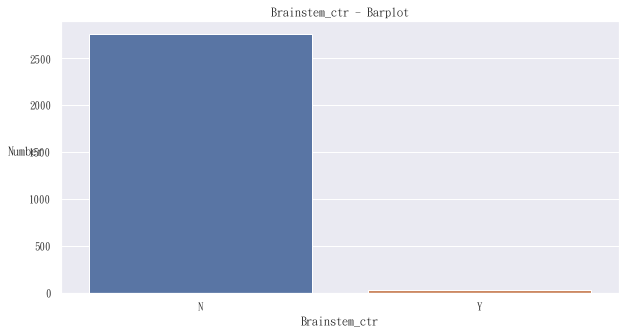

In [306]:
brainstem_ctr = tsr_12.loc[:,"brainstem_ctr"]
brainstem_ctr = brainstem_ctr.fillna(brainstem_ctr.mode()[0])
#print(brainstem_ctr)
print(brainstem_ctr.value_counts() / len(brainstem_ctr))
#print(brainstem_ctr.describe())

sns.countplot(brainstem_ctr)
plt.title("Brainstem_ctr - Barplot")
plt.xlabel('Brainstem_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Cerebellum_CT_Right

N    0.987129
Y    0.012871
Name: cerebellum_ctr, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


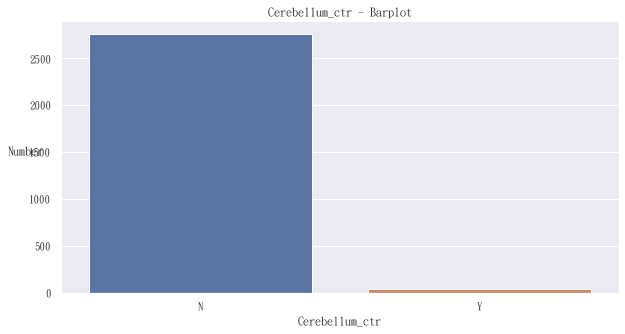

In [307]:
cerebellum_ctr = tsr_12.loc[:,"cerebellum_ctr"]
cerebellum_ctr = cerebellum_ctr.fillna(cerebellum_ctr.mode()[0])
#print(cerebellum_ctr)
print(cerebellum_ctr.value_counts() / len(cerebellum_ctr))
#print(cerebellum_ctr.describe())

sns.countplot(cerebellum_ctr)
plt.title("Cerebellum_ctr - Barplot")
plt.xlabel('Cerebellum_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_CT_Right

<ipython-input-308-786c516b0fb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watershed_ctr[watershed_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.981766
Y    0.018234
Name: watershed_ctr, dtype: float64


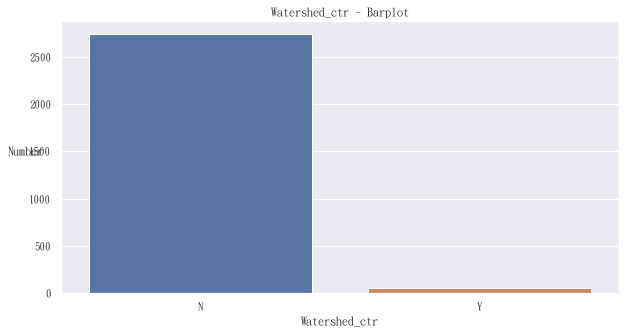

In [308]:
watershed_ctr = tsr_12.loc[:,"watershed_ctr"]
watershed_ctr[watershed_ctr == '0'] = "N"
watershed_ctr = watershed_ctr.fillna(watershed_ctr.mode()[0])
#print(watershed_ctr)
print(watershed_ctr.value_counts() / len(watershed_ctr))
#print(watershed_ctr.describe())

sns.countplot(watershed_ctr)
plt.title("Watershed_ctr - Barplot")
plt.xlabel('Watershed_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Hemorrhagic_infarct_CT_Right

N    0.995352
Y    0.004648
Name: hemorrhagic_infarct_ctr, dtype: float64


<ipython-input-309-64d46c9b1355>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_ctr[hemorrhagic_infarct_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


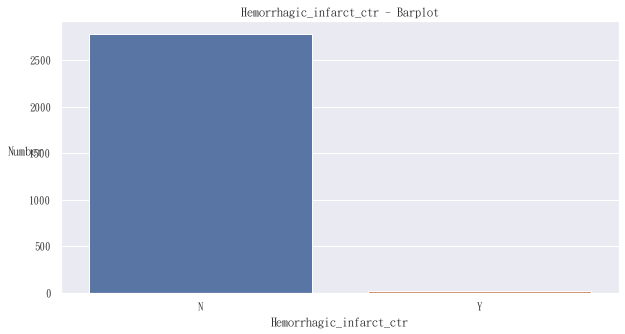

In [309]:
hemorrhagic_infarct_ctr = tsr_12.loc[:,"hemorrhagic_infarct_ctr"]
hemorrhagic_infarct_ctr[hemorrhagic_infarct_ctr == '0'] = "N"
hemorrhagic_infarct_ctr = hemorrhagic_infarct_ctr.fillna(hemorrhagic_infarct_ctr.mode()[0])
#print(hemorrhagic_infarct_ctr)
print(hemorrhagic_infarct_ctr.value_counts() / len(hemorrhagic_infarct_ctr))
#print(hemorrhagic_infarct_ctr.describe())

sns.countplot(hemorrhagic_infarct_ctr)
plt.title("Hemorrhagic_infarct_ctr - Barplot")
plt.xlabel('Hemorrhagic_infarct_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_CTci

N    0.960672
Y    0.039328
Name: old_stroke_ctci, dtype: float64


<ipython-input-310-321e57cc6c9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_stroke_ctci[old_stroke_ctci =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


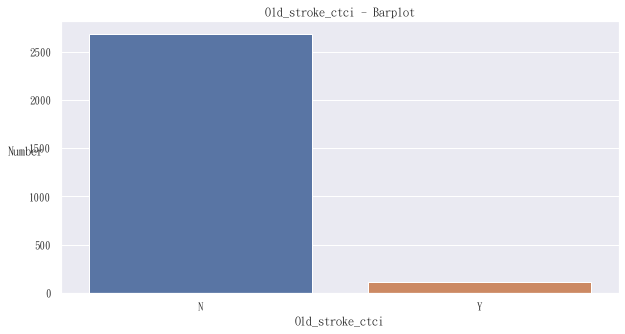

In [310]:
old_stroke_ctci = tsr_12.loc[:,"old_stroke_ctci"]
old_stroke_ctci[old_stroke_ctci =='0'] = 'N'
old_stroke_ctci = old_stroke_ctci.fillna(old_stroke_ctci.mode()[0])
#print(old_stroke_ctci)
print(old_stroke_ctci.value_counts() / len(old_stroke_ctci))
#print(old_stroke_ctci.describe())

sns.countplot(old_stroke_ctci)
plt.title("Old_stroke_ctci - Barplot")
plt.xlabel('Old_stroke_ctci')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical ACA_CT_Left

N    0.995352
Y    0.004648
Name: cortical_aca_ctl, dtype: float64


<ipython-input-311-cfab172667bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_aca_ctl[cortical_aca_ctl == '0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


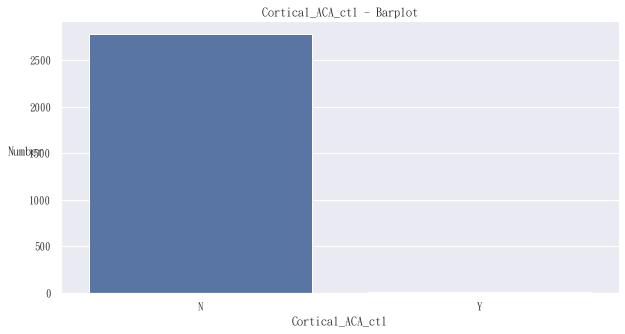

In [311]:
cortical_aca_ctl = tsr_12.loc[:,"cortical_aca_ctl"]
cortical_aca_ctl[cortical_aca_ctl == '0'] = 'N'
cortical_aca_ctl = cortical_aca_ctl.fillna(cortical_aca_ctl.mode()[0])
#print(cortical_aca_ctl)
print(cortical_aca_ctl.value_counts() / len(cortical_aca_ctl))
#print(cortical_aca_ctl.describe())

sns.countplot(cortical_aca_ctl)
plt.title("Cortical_ACA_ctl - Barplot")
plt.xlabel('Cortical_ACA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical MCA_CT_Left

N    0.966393
Y    0.033607
Name: cortical_mca_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


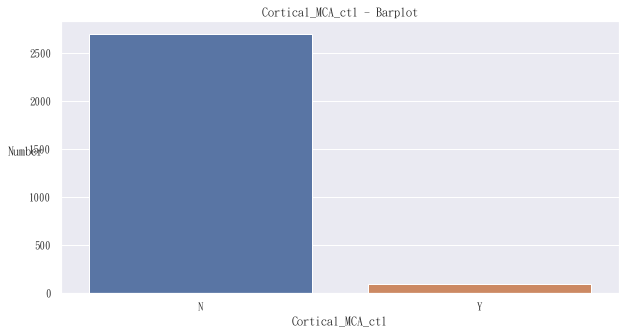

In [312]:
cortical_mca_ctl = tsr_12.loc[:,"cortical_mca_ctl"]
cortical_mca_ctl = cortical_mca_ctl.fillna(cortical_mca_ctl.mode()[0])
#print(cortical_mca_ctl)
print(cortical_mca_ctl.value_counts() / len(cortical_mca_ctl))
#print(cortical_mca_ctl.describe())

sns.countplot(cortical_mca_ctl)
plt.title("Cortical_MCA_ctl - Barplot")
plt.xlabel('Cortical_MCA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical ACA_CT_Left

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.989989
Y    0.010011
Name: subcortical_aca_ctl, dtype: float64


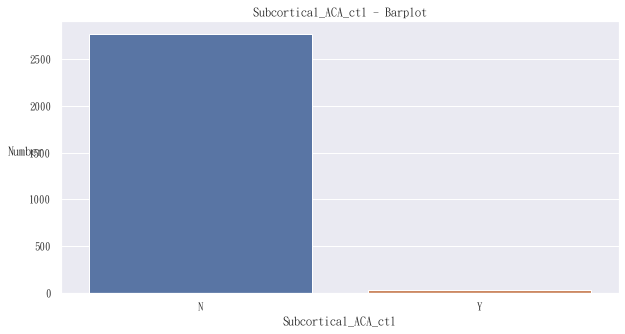

In [313]:
subcortical_aca_ctl = tsr_12.loc[:,"subcortical_aca_ctl"]
subcortical_aca_ctl = subcortical_aca_ctl.fillna(subcortical_aca_ctl.mode()[0])
#print(subcortical_aca_ctl)
print(subcortical_aca_ctl.value_counts() / len(subcortical_aca_ctl))
#print(subcortical_aca_ctl.describe())

sns.countplot(subcortical_aca_ctl)
plt.title("Subcortical_ACA_ctl - Barplot")
plt.xlabel('Subcortical_ACA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical MCA_CT_Left

N    0.932785
Y    0.067215
Name: subcortical_mca_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


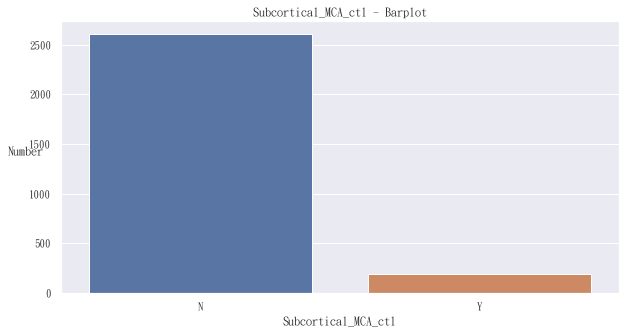

In [314]:
subcortical_mca_ctl = tsr_12.loc[:,"subcortical_mca_ctl"]
subcortical_mca_ctl = subcortical_mca_ctl.fillna(subcortical_mca_ctl.mode()[0])
#print(subcortical_mca_ctl)
print(subcortical_mca_ctl.value_counts() / len(subcortical_mca_ctl))
#print(subcortical_mca_ctl.describe())

sns.countplot(subcortical_mca_ctl)
plt.title("Subcortical_MCA_ctl - Barplot")
plt.xlabel('Subcortical_MCA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation PCA_cortex_CT_Left

N    0.987129
Y    0.012871
Name: pca_cortex_ctl, dtype: float64


<ipython-input-315-e411bd7f37d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_cortex_ctl[pca_cortex_ctl == '0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


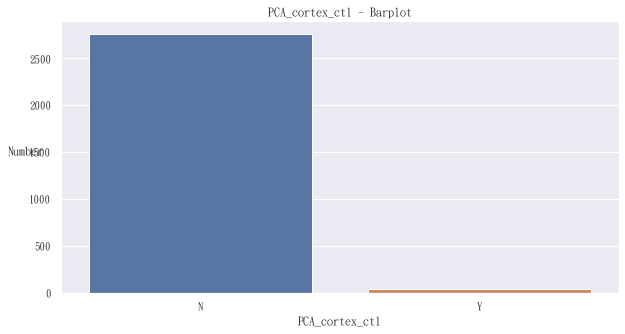

In [315]:
pca_cortex_ctl = tsr_12.loc[:,"pca_cortex_ctl"]
pca_cortex_ctl[pca_cortex_ctl == '0'] = 'N'
pca_cortex_ctl = pca_cortex_ctl.fillna(pca_cortex_ctl.mode()[0])
#print(pca_cortex_ctl)
print(pca_cortex_ctl.value_counts() / len(pca_cortex_ctl))
#print(pca_cortex_ctl.describe())

sns.countplot(pca_cortex_ctl)
plt.title("PCA_cortex_ctl - Barplot")
plt.xlabel('PCA_cortex_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Thalamus_CT_Left

N    0.989632
Y    0.010368
Name: thalamus_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


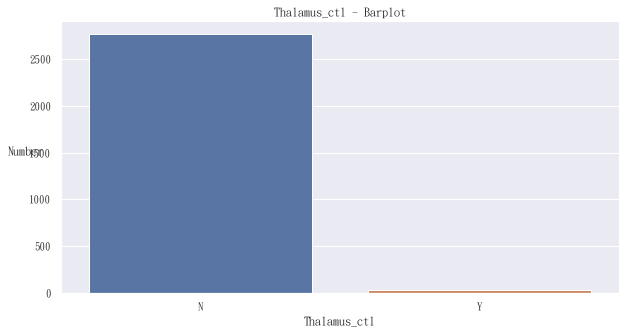

In [316]:
thalamus_ctl = tsr_12.loc[:,"thalamus_ctl"]
thalamus_ctl = thalamus_ctl.fillna(thalamus_ctl.mode()[0])
#print(thalamus_ctl)
print(thalamus_ctl.value_counts() / len(thalamus_ctl))
#print(thalamus_ctl.describe())

sns.countplot(thalamus_ctl)
plt.title("Thalamus_ctl - Barplot")
plt.xlabel('Thalamus_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_CT_Left

N    0.988559
Y    0.011441
Name: brainstem_ctl, dtype: float64


<ipython-input-317-70885d16c293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brainstem_ctl[brainstem_ctl =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


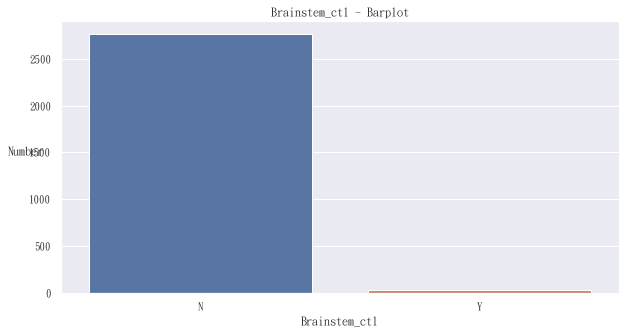

In [317]:
brainstem_ctl = tsr_12.loc[:,"brainstem_ctl"]
brainstem_ctl[brainstem_ctl =='0'] = 'N'
brainstem_ctl = brainstem_ctl.fillna(brainstem_ctl.mode()[0])
#print(brainstem_ctl)
print(brainstem_ctl.value_counts() / len(brainstem_ctl))
#print(brainstem_ctl.describe())

sns.countplot(brainstem_ctl)
plt.title("Brainstem_ctl - Barplot")
plt.xlabel('Brainstem_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Cerebellum_CT_Left

N    0.990347
Y    0.009653
Name: cerebellum_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


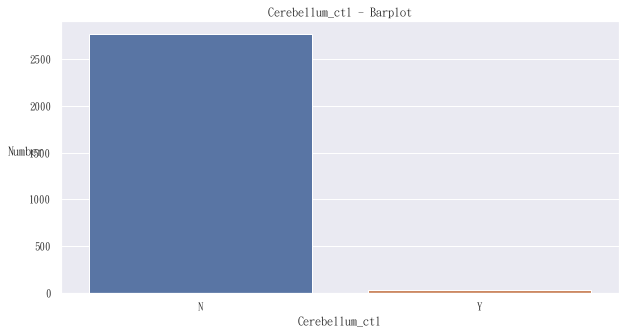

In [318]:
cerebellum_ctl = tsr_12.loc[:,"cerebellum_ctl"]
cerebellum_ctl = cerebellum_ctl.fillna(cerebellum_ctl.mode()[0])
#print(cerebellum_ctl)
print(cerebellum_ctl.value_counts() / len(cerebellum_ctl))
#print(cerebellum_ctl.describe())

sns.countplot(cerebellum_ctl)
plt.title("Cerebellum_ctl - Barplot")
plt.xlabel('Cerebellum_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_CT_Left

N    0.998212
Y    0.001788
Name: watershed_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


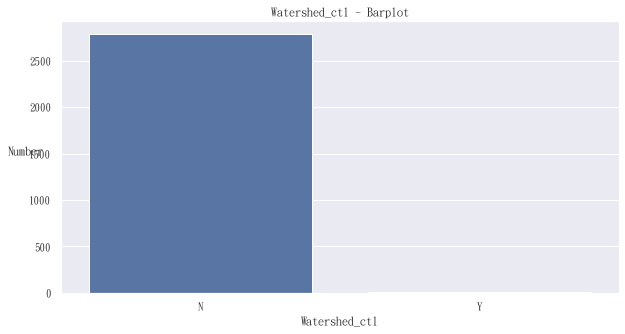

In [319]:
watershed_ctl = tsr_12.loc[:,"watershed_ctl"]
watershed_ctl = watershed_ctl.fillna(watershed_ctl.mode()[0])
#print(watershed_ctl)
print(watershed_ctl.value_counts() / len(watershed_ctl))
#print(watershed_ctl.describe())

sns.countplot(watershed_ctl)
plt.title("Watershed_ctl - Barplot")
plt.xlabel('Watershed_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Hemorrhagic_infarct_CT_Left

N    0.99714
Y    0.00286
Name: hemorrhagic_infarct_ctl, dtype: float64


<ipython-input-320-d99d457b6629>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_ctl[hemorrhagic_infarct_ctl =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


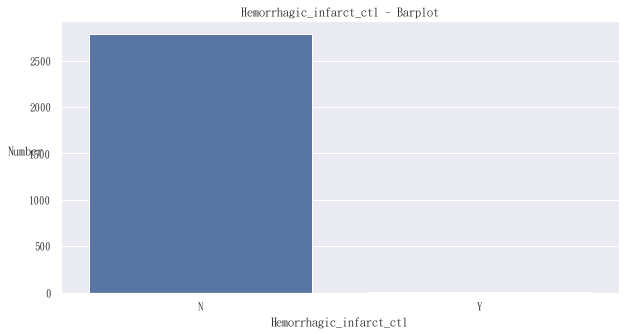

In [320]:
hemorrhagic_infarct_ctl = tsr_12.loc[:,"hemorrhagic_infarct_ctl"]
hemorrhagic_infarct_ctl[hemorrhagic_infarct_ctl =='0'] = 'N'
hemorrhagic_infarct_ctl = hemorrhagic_infarct_ctl.fillna(hemorrhagic_infarct_ctl.mode()[0])
#print(hemorrhagic_infarct_ctl)
print(hemorrhagic_infarct_ctl.value_counts() / len(hemorrhagic_infarct_ctl))
#print(hemorrhagic_infarct_ctl.describe())

sns.countplot(hemorrhagic_infarct_ctl)
plt.title("Hemorrhagic_infarct_ctl - Barplot")
plt.xlabel('Hemorrhagic_infarct_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_CTch

N    0.982481
Y    0.017519
Name: old_stroke_ctch, dtype: float64


<ipython-input-321-f0e52efa721f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_stroke_ctch[old_stroke_ctch =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


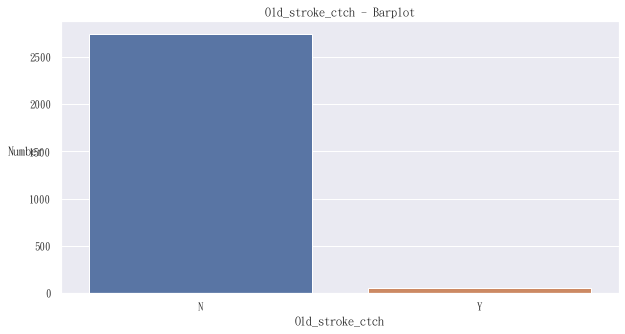

In [321]:
old_stroke_ctch = tsr_12.loc[:,"old_stroke_ctch"]
old_stroke_ctch[old_stroke_ctch =='0'] = 'N'
old_stroke_ctch = old_stroke_ctch.fillna(old_stroke_ctch.mode()[0])
#print(old_stroke_ctch)
print(old_stroke_ctch.value_counts() / len(old_stroke_ctch))
#print(old_stroke_ctch.describe())

sns.countplot(old_stroke_ctch)
plt.title("Old_stroke_ctch - Barplot")
plt.xlabel('Old_stroke_ctch')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical ACA_MRI_Right

N    0.991419
Y    0.008581
Name: cortical_aca_mrir, dtype: float64


<ipython-input-322-a188196b9257>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_aca_mrir[cortical_aca_mrir =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


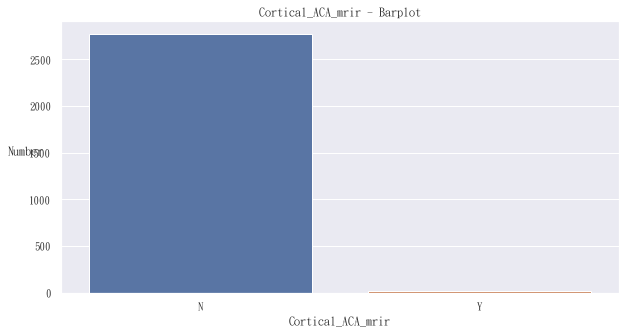

In [322]:
cortical_aca_mrir = tsr_12.loc[:,"cortical_aca_mrir"]
cortical_aca_mrir[cortical_aca_mrir =='0'] = 'N'
cortical_aca_mrir = cortical_aca_mrir.fillna(cortical_aca_mrir.mode()[0])
#print(cortical_aca_mrir)
print(cortical_aca_mrir.value_counts() / len(cortical_aca_mrir))
#print(cortical_aca_mrir.describe())

sns.countplot(cortical_aca_mrir)
plt.title("Cortical_ACA_mrir - Barplot")
plt.xlabel('Cortical_ACA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical MCA_MRI_Right

N    0.956382
Y    0.043618
Name: cortical_mca_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


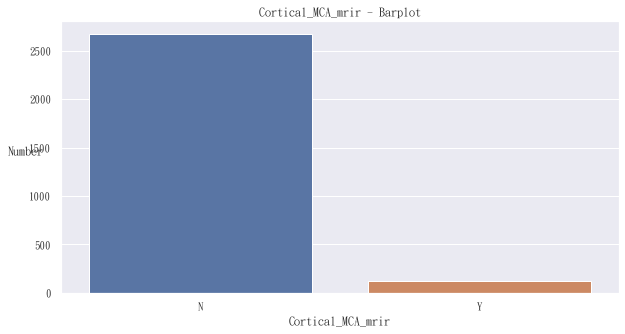

In [323]:
cortical_mca_mrir = tsr_12.loc[:,"cortical_mca_mrir"]
cortical_mca_mrir = cortical_mca_mrir.fillna(cortical_mca_mrir.mode()[0])
#print(cortical_mca_mrir)
print(cortical_mca_mrir.value_counts() / len(cortical_mca_mrir))
#print(cortical_mca_mrir.describe())

sns.countplot(cortical_mca_mrir)
plt.title("Cortical_MCA_mrir - Barplot")
plt.xlabel('Cortical_MCA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical ACA_MRI_Right

N    0.984984
Y    0.015016
Name: subcortical_aca_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


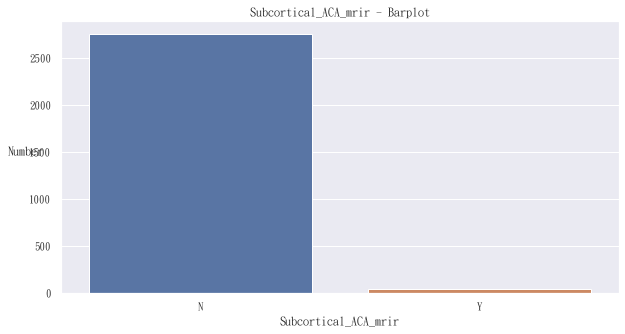

In [324]:
subcortical_aca_mrir = tsr_12.loc[:,"subcortical_aca_mrir"]
subcortical_aca_mrir = subcortical_aca_mrir.fillna(subcortical_aca_mrir.mode()[0])
#print(subcortical_aca_mrir)
print(subcortical_aca_mrir.value_counts() / len(subcortical_aca_mrir))
#print(subcortical_aca_mrir.describe())

sns.countplot(subcortical_aca_mrir)
plt.title("Subcortical_ACA_mrir - Barplot")
plt.xlabel('Subcortical_ACA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical MCA_MRI_Right

<ipython-input-325-c146f5c815e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subcortical_mca_mrir[subcortical_mca_mrir =='1'] = "Y"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.913121
Y    0.086879
Name: subcortical_mca_mrir, dtype: float64


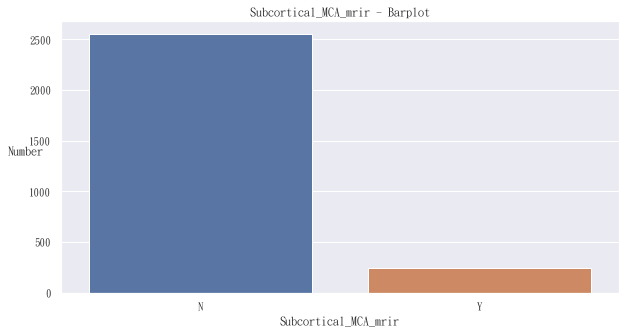

In [325]:
subcortical_mca_mrir = tsr_12.loc[:,"subcortical_mca_mrir"]
subcortical_mca_mrir[subcortical_mca_mrir =='1'] = "Y"
subcortical_mca_mrir = subcortical_mca_mrir.fillna(subcortical_mca_mrir.mode()[0])
#print(subcortical_mca_mrir)
print(subcortical_mca_mrir.value_counts() / len(subcortical_mca_mrir))
#print(subcortical_mca_mrir.describe())

sns.countplot(subcortical_mca_mrir)
plt.title("Subcortical_MCA_mrir - Barplot")
plt.xlabel('Subcortical_MCA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation PCA_cortex_MRI_Right

N    0.975688
Y    0.024312
Name: pca_cortex_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


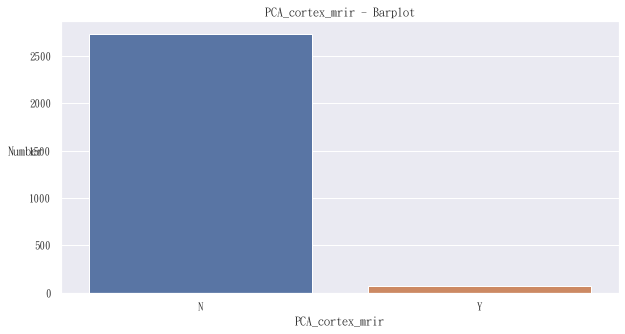

In [326]:
pca_cortex_mrir = tsr_12.loc[:,"pca_cortex_mrir"]
pca_cortex_mrir = pca_cortex_mrir.fillna(pca_cortex_mrir.mode()[0])
#print(pca_cortex_mrir)
print(pca_cortex_mrir.value_counts() / len(pca_cortex_mrir))
#print(pca_cortex_mrir.describe())

sns.countplot(pca_cortex_mrir)
plt.title("PCA_cortex_mrir - Barplot")
plt.xlabel('PCA_cortex_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Thalamus_MRI_Right

N    0.976403
Y    0.023597
Name: thalamus_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


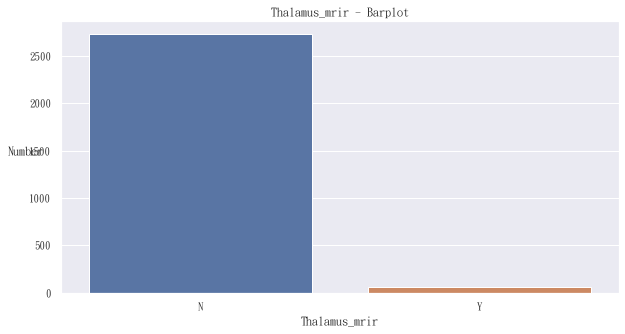

In [327]:
thalamus_mrir = tsr_12.loc[:,"thalamus_mrir"]
thalamus_mrir = thalamus_mrir.fillna(thalamus_mrir.mode()[0])
#print(thalamus_mrir)
print(thalamus_mrir.value_counts() / len(thalamus_mrir))
#print(thalamus_mrir.describe())

sns.countplot(thalamus_mrir)
plt.title("Thalamus_mrir - Barplot")
plt.xlabel('Thalamus_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_MRI_Right

<ipython-input-328-2f3f1a53a1b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brainstem_mrir[brainstem_mrir == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.953522
Y    0.046478
Name: brainstem_mrir, dtype: float64


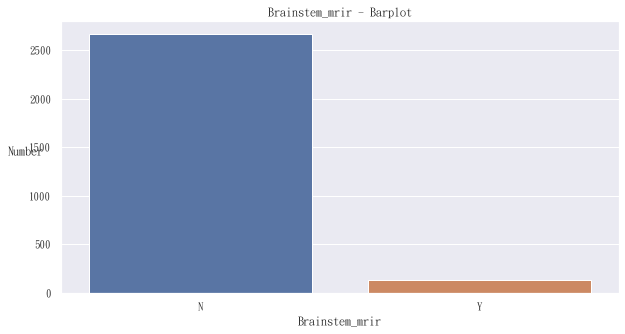

In [328]:
brainstem_mrir = tsr_12.loc[:,"brainstem_mrir"]
brainstem_mrir[brainstem_mrir == '0'] = "N"
brainstem_mrir = brainstem_mrir.fillna(brainstem_mrir.mode()[0])
#print(brainstem_mrir)
print(brainstem_mrir.value_counts() / len(brainstem_mrir))
#print(brainstem_mrir.describe())

sns.countplot(brainstem_mrir)
plt.title("Brainstem_mrir - Barplot")
plt.xlabel('Brainstem_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Cerebellum_MRI_Right

N    0.971398
Y    0.028602
Name: cerebellum_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


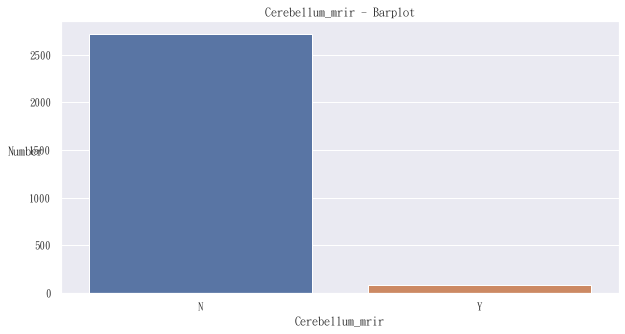

In [329]:
cerebellum_mrir = tsr_12.loc[:,"cerebellum_mrir"]
cerebellum_mrir = cerebellum_mrir.fillna(cerebellum_mrir.mode()[0])
#print(cerebellum_mrir)
print(cerebellum_mrir.value_counts() / len(cerebellum_mrir))
#print(cerebellum_mrir.describe())

sns.countplot(cerebellum_mrir)
plt.title("Cerebellum_mrir - Barplot")
plt.xlabel('Cerebellum_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_MRI_Right

<ipython-input-330-44f63a65acbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watershed_mrir[watershed_mrir =='0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.985341
Y    0.014659
Name: watershed_mrir, dtype: float64


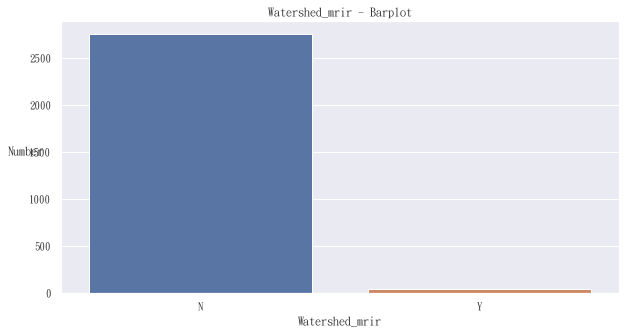

In [330]:
watershed_mrir = tsr_12.loc[:,"watershed_mrir"]
watershed_mrir[watershed_mrir =='0'] = "N"
watershed_mrir = watershed_mrir.fillna(watershed_mrir.mode()[0])
#print(watershed_mrir)
print(watershed_mrir.value_counts() / len(watershed_mrir))
#print(watershed_mrir.describe())

sns.countplot(watershed_mrir)
plt.title("Watershed_mrir - Barplot")
plt.xlabel('Watershed_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Hemorrhagic_infarct_MRI_Right

N    0.992492
Y    0.007508
Name: hemorrhagic_infarct_mrir, dtype: float64


<ipython-input-331-48034e572f62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_mrir[hemorrhagic_infarct_mrir =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


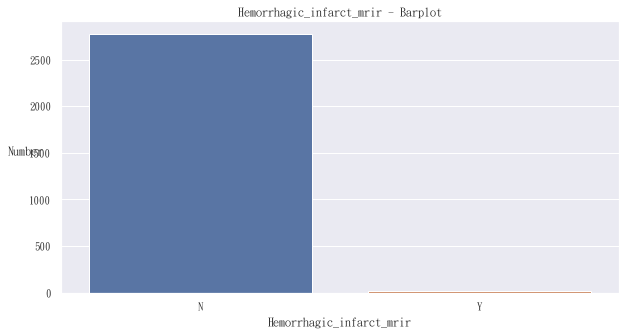

In [331]:
hemorrhagic_infarct_mrir = tsr_12.loc[:,"hemorrhagic_infarct_mrir"]
hemorrhagic_infarct_mrir[hemorrhagic_infarct_mrir =='0'] = 'N'
hemorrhagic_infarct_mrir = hemorrhagic_infarct_mrir.fillna(hemorrhagic_infarct_mrir.mode()[0])
#print(hemorrhagic_infarct_mrir)
print(hemorrhagic_infarct_mrir.value_counts() / len(hemorrhagic_infarct_mrir))
#print(hemorrhagic_infarct_mrir.describe())

sns.countplot(hemorrhagic_infarct_mrir)
plt.title("Hemorrhagic_infarct_mrir - Barplot")
plt.xlabel('Hemorrhagic_infarct_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_MRIci

N    0.966393
Y    0.033607
Name: old_stroke_mrici, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


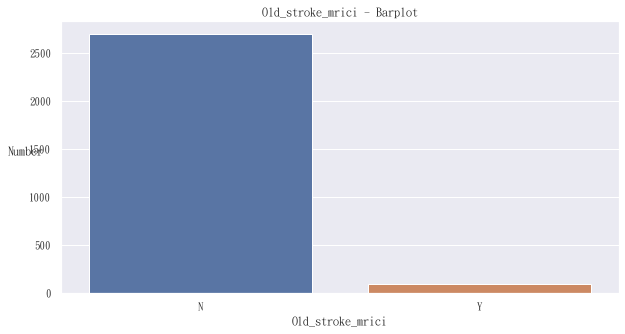

In [332]:
old_stroke_mrici = tsr_12.loc[:,"old_stroke_mrici"]
old_stroke_mrici = old_stroke_mrici.fillna(old_stroke_mrici.mode()[0])
#print(old_stroke_mrici)
print(old_stroke_mrici.value_counts() / len(old_stroke_mrici))
#print(old_stroke_mrici.describe())

sns.countplot(old_stroke_mrici)
plt.title("Old_stroke_mrici - Barplot")
plt.xlabel('Old_stroke_mrici')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical ACA_MRI_Left

N    0.986772
Y    0.013228
Name: cortical_aca_mril, dtype: float64


<ipython-input-333-b4cb620feff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_aca_mril[cortical_aca_mril =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


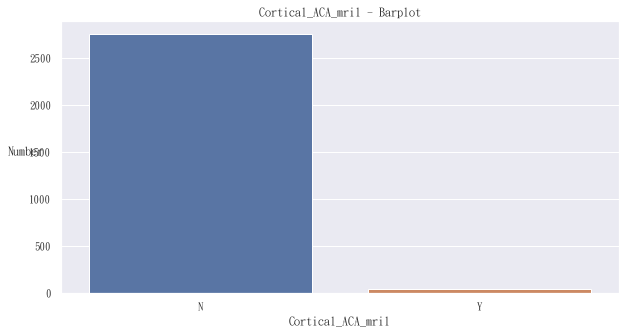

In [333]:
cortical_aca_mril = tsr_12.loc[:,"cortical_aca_mril"]
cortical_aca_mril[cortical_aca_mril =='0'] = 'N'
cortical_aca_mril = cortical_aca_mril.fillna(cortical_aca_mril.mode()[0])
#print(cortical_aca_mril)
print(cortical_aca_mril.value_counts() / len(cortical_aca_mril))
#print(cortical_aca_mril.describe()))

sns.countplot(cortical_aca_mril)
plt.title("Cortical_ACA_mril - Barplot")
plt.xlabel('Cortical_ACA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical MCA_MRI_Left

N    0.951376
Y    0.048624
Name: cortical_mca_mril, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


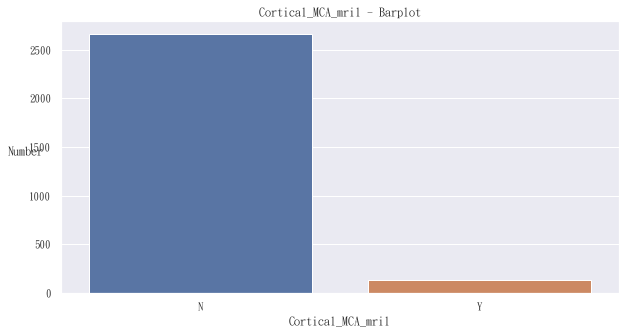

In [334]:
cortical_mca_mril = tsr_12.loc[:,"cortical_mca_mril"]
cortical_mca_mril = cortical_mca_mril.fillna(cortical_mca_mril.mode()[0])
#print(cortical_mca_mril)
print(cortical_mca_mril.value_counts() / len(cortical_mca_mril))
#print(cortical_mca_mril.describe())

sns.countplot(cortical_mca_mril)
plt.title("Cortical_MCA_mril - Barplot")
plt.xlabel('Cortical_MCA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical ACA_MRI_Left

N    0.984984
Y    0.015016
Name: subcortical_aca_mril, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


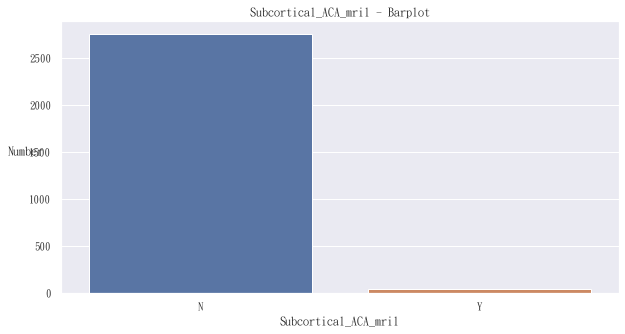

In [335]:
subcortical_aca_mril = tsr_12.loc[:,"subcortical_aca_mril"]
subcortical_aca_mril = subcortical_aca_mril.fillna(subcortical_aca_mril.mode()[0])
#print(subcortical_aca_mril)
print(subcortical_aca_mril.value_counts() / len(subcortical_aca_mril))
#print(subcortical_aca_mril.describe())

sns.countplot(subcortical_aca_mril)
plt.title("Subcortical_ACA_mril - Barplot")
plt.xlabel('Subcortical_ACA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical MCA_MRI_Left

N    0.906686
Y    0.093314
Name: subcortical_mca_mril, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


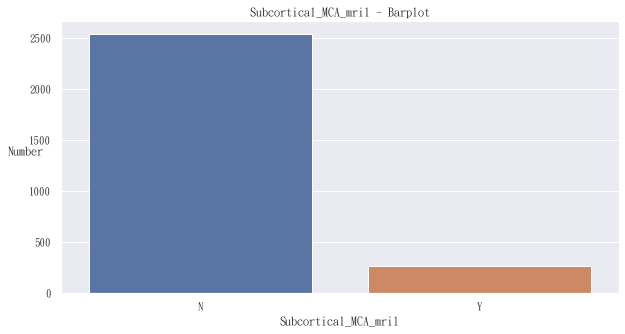

In [336]:
subcortical_mca_mril = tsr_12.loc[:,"subcortical_mca_mril"]
subcortical_mca_mril = subcortical_mca_mril.fillna(subcortical_mca_mril.mode()[0])
#print(subcortical_mca_mril)
print(subcortical_mca_mril.value_counts() / len(subcortical_mca_mril))
#print(subcortical_mca_mril.describe())

sns.countplot(subcortical_mca_mril)
plt.title("Subcortical_MCA_mril - Barplot")
plt.xlabel('Subcortical_MCA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation PCA_cortex_MRI_Left

N    0.977833
Y    0.022167
Name: pca_cortex_mril, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


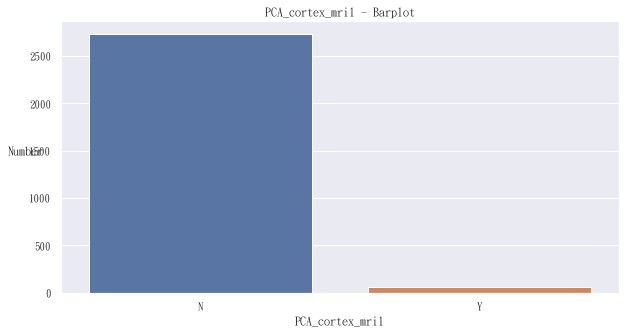

In [337]:
pca_cortex_mril = tsr_12.loc[:,"pca_cortex_mril"]
pca_cortex_mril = pca_cortex_mril.fillna(pca_cortex_mril.mode()[0])
#print(pca_cortex_mril)
print(pca_cortex_mril.value_counts() / len(pca_cortex_mril))
#print(pca_cortex_mril.describe())

sns.countplot(pca_cortex_mril)
plt.title("PCA_cortex_mril - Barplot")
plt.xlabel('PCA_cortex_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Thalamus_MRI_Left

<ipython-input-338-4a551ebc93c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thalamus_mril[(thalamus_mril != "N") & (thalamus_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.975688
Y    0.024312
Name: thalamus_mril, dtype: float64


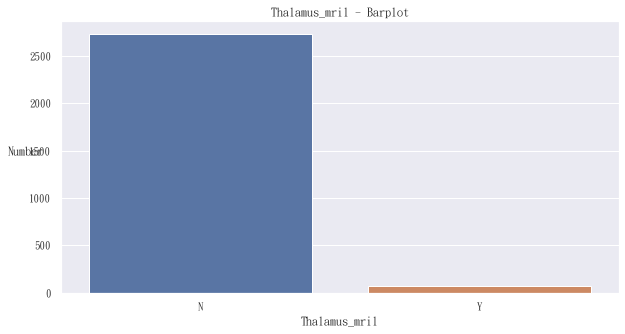

In [338]:
thalamus_mril = tsr_12.loc[:,"thalamus_mril"]
thalamus_mril[(thalamus_mril != "N") & (thalamus_mril != "Y")] = np.nan
thalamus_mril = thalamus_mril.fillna(thalamus_mril.mode()[0])
#print(thalamus_mril)
print(thalamus_mril.value_counts() / len(thalamus_mril))
#print(thalamus_mril.describe())

sns.countplot(thalamus_mril)
plt.title("Thalamus_mril - Barplot")
plt.xlabel('Thalamus_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_MRI_Left

N    0.954952
Y    0.045048
Name: brainstem_mril, dtype: float64


<ipython-input-339-6d3eeda9b5d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brainstem_mril[(brainstem_mril != "N") & (brainstem_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


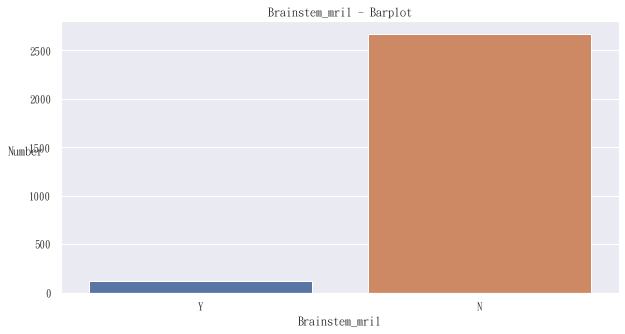

In [339]:
brainstem_mril = tsr_12.loc[:,"brainstem_mril"]
brainstem_mril[(brainstem_mril != "N") & (brainstem_mril != "Y")] = np.nan
brainstem_mril = brainstem_mril.fillna(brainstem_mril.mode()[0])
#print(brainstem_mril)
print(brainstem_mril.value_counts() / len(brainstem_mril))
#print(brainstem_mril.describe())

sns.countplot(brainstem_mril)
plt.title("Brainstem_mril - Barplot")
plt.xlabel('Brainstem_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Cerebellum_MRI_Left

N    0.975688
Y    0.024312
Name: cerebellum_mril, dtype: float64


<ipython-input-340-58abb7541f5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cerebellum_mril[(cerebellum_mril != "N") & (cerebellum_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


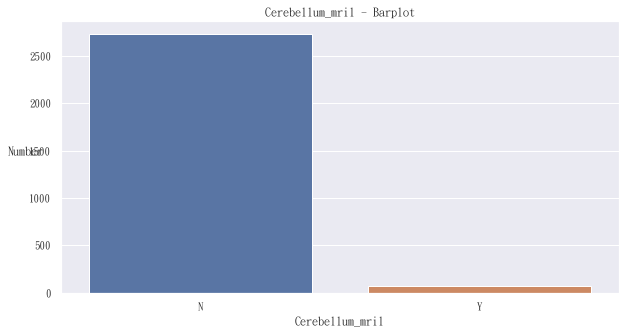

In [340]:
cerebellum_mril = tsr_12.loc[:,"cerebellum_mril"]
cerebellum_mril[(cerebellum_mril != "N") & (cerebellum_mril != "Y")] = np.nan
cerebellum_mril = cerebellum_mril.fillna(cerebellum_mril.mode()[0])
#print(cerebellum_mril)
print(cerebellum_mril.value_counts() / len(cerebellum_mril))
#print(cerebellum_mril.describe())

sns.countplot(cerebellum_mril)
plt.title("Cerebellum_mril - Barplot")
plt.xlabel('Cerebellum_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_MRI_Left

N    0.991777
Y    0.008223
Name: watershed_mril, dtype: float64


<ipython-input-341-90b767ef8a37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watershed_mril[(watershed_mril != "N") & (watershed_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


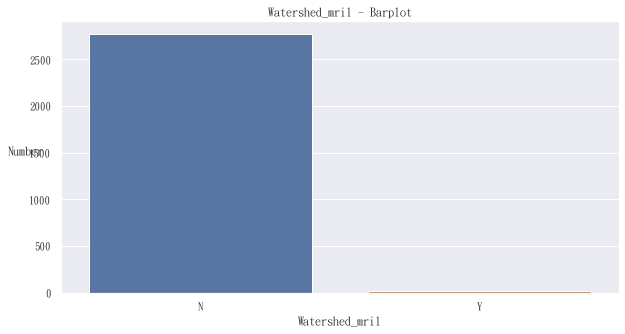

In [341]:
watershed_mril = tsr_12.loc[:,"watershed_mril"]
watershed_mril[(watershed_mril != "N") & (watershed_mril != "Y")] = np.nan
watershed_mril = watershed_mril.fillna(watershed_mril.mode()[0])
#print(watershed_mril)
print(watershed_mril.value_counts() / len(watershed_mril))
#print(watershed_mril.describe())

sns.countplot(watershed_mril)
plt.title("Watershed_mril - Barplot")
plt.xlabel('Watershed_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Hemorrhagic_infarct_MRI_Left

N    0.997497
Y    0.002503
Name: hemorrhagic_infarct_mril, dtype: float64


<ipython-input-342-5af4bda122c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_mril[(hemorrhagic_infarct_mril != "N") & (hemorrhagic_infarct_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


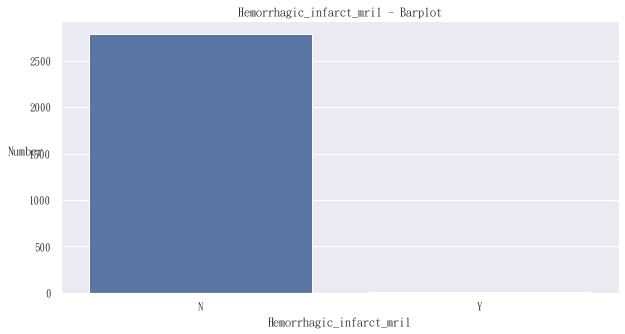

In [342]:
hemorrhagic_infarct_mril = tsr_12.loc[:,"hemorrhagic_infarct_mril"]
hemorrhagic_infarct_mril[(hemorrhagic_infarct_mril != "N") & (hemorrhagic_infarct_mril != "Y")] = np.nan
hemorrhagic_infarct_mril = hemorrhagic_infarct_mril.fillna(hemorrhagic_infarct_mril.mode()[0])
#print(hemorrhagic_infarct_mril)
print(hemorrhagic_infarct_mril.value_counts() / len(hemorrhagic_infarct_mril))
#print(hemorrhagic_infarct_mril.describe())

sns.countplot(hemorrhagic_infarct_mril)
plt.title("Hemorrhagic_infarct_mril - Barplot")
plt.xlabel('Hemorrhagic_infarct_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_MRIch

N    1.0
Name: old_stroke_mrich, dtype: float64


<ipython-input-343-50d8abb5cf36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_stroke_mrich[(old_stroke_mrich != "N") & (old_stroke_mrich != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


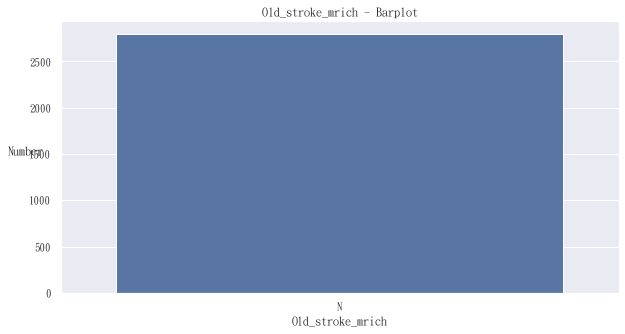

In [343]:
old_stroke_mrich = tsr_12.loc[:,"old_stroke_mrich"]
old_stroke_mrich[(old_stroke_mrich != "N") & (old_stroke_mrich != "Y")] = np.nan
old_stroke_mrich= old_stroke_mrich.fillna(old_stroke_mrich.mode()[0])
#print(old_stroke_mrich)
print(old_stroke_mrich.value_counts() / len(old_stroke_mrich))
#print(old_stroke_mrich.describe())

sns.countplot(old_stroke_mrich)
plt.title("Old_stroke_mrich - Barplot")
plt.xlabel('Old_stroke_mrich')
plt.ylabel('Number', rotation=0)
plt.show()

# Risk Factors

# Heart Disease

0.0    0.735431
1.0    0.261709
2.0    0.002860
Name: hd_id, dtype: float64


<ipython-input-344-3d3f37086772>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_id[(hd_id != 0) & (hd_id != 1) & (hd_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


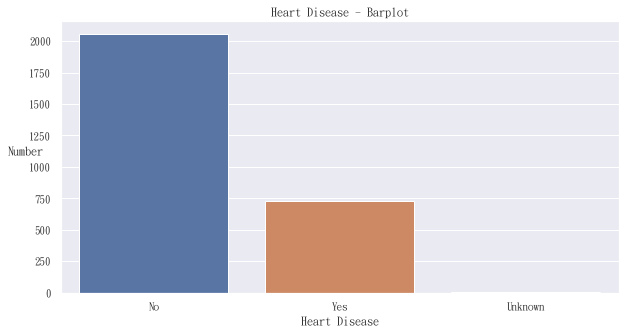

In [344]:
hd_id = tsr_12.loc[:,"hd_id"]
hd_id[(hd_id != 0) & (hd_id != 1) & (hd_id != 2)] = np.nan
hd_id = hd_id.fillna(hd_id.mode()[0])
#print(hd_id)
print(hd_id.value_counts() / len(hd_id))
#print(hd_id.describe())

hd_id_labels = ["No","Yes","Unknown"]
sns.countplot(hd_id).set_xticklabels(hd_id_labels)
plt.title("Heart Disease - Barplot")
plt.xlabel('Heart Disease')
plt.ylabel('Number', rotation=0)
plt.show()

# Previous CVA

0.0    0.792277
1.0    0.207723
Name: pcva_id, dtype: float64


<ipython-input-345-78342cb600d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcva_id[(pcva_id != 0) & (pcva_id != 1) & (pcva_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


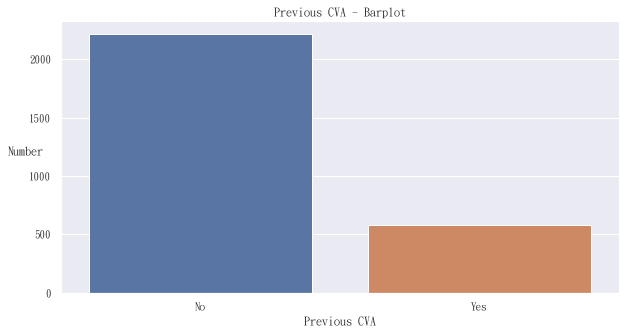

In [345]:
pcva_id = tsr_12.loc[:,"pcva_id"]
pcva_id[(pcva_id != 0) & (pcva_id != 1) & (pcva_id != 2)] = np.nan
pcva_id = pcva_id.fillna(pcva_id.mode()[0])
#print(pcva_id)
print(pcva_id.value_counts() / len(pcva_id))
#print(pcva_id.describe())

#pcva_id_labels = ["No","Yes","Unknown"]
pcva_id_labels = ["No","Yes"]
sns.countplot(pcva_id).set_xticklabels(pcva_id_labels)
plt.title("Previous CVA - Barplot")
plt.xlabel('Previous CVA')
plt.ylabel('Number', rotation=0)
plt.show()

# Previous CVA (Cerebral Infraction)

0.0    0.770826
1.0    0.228817
2.0    0.000358
Name: pcvaci_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


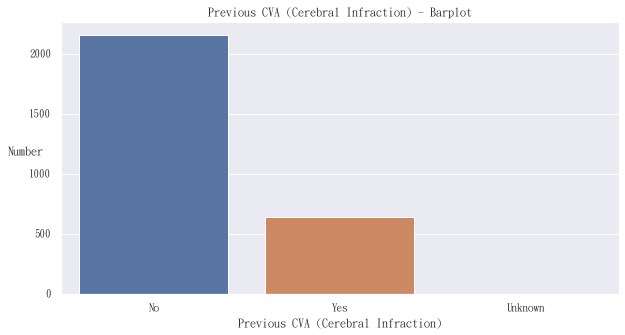

In [346]:
pcvaci_id = tsr_12.loc[:,"pcvaci_id"]
pcvaci_id = pcvaci_id.fillna(pcvaci_id.mode()[0])
#print(pcvaci_id)
print(pcvaci_id.value_counts() / len(pcvaci_id))
#print(pcvaci_id.describe())

pcvaci_id_labels = ["No","Yes","Unknown"]
sns.countplot(pcvaci_id).set_xticklabels(pcvaci_id_labels)
plt.title("Previous CVA (Cerebral Infraction) - Barplot")
plt.xlabel('Previous CVA (Cerebral Infraction)')
plt.ylabel('Number', rotation=0)
plt.show()

# Previous CVA (Cerebral Hemorrhage)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.959242
1.0    0.040400
2.0    0.000358
Name: pcvach_id, dtype: float64


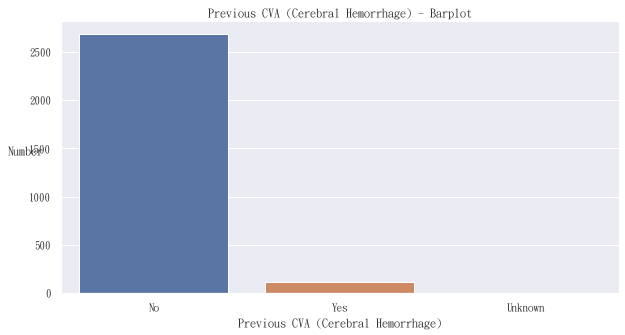

In [347]:
pcvach_id = tsr_12.loc[:,"pcvach_id"]
pcvach_id = pcvach_id.fillna(pcvach_id.mode()[0])
#print(pcvach_id)
print(pcvach_id.value_counts() / len(pcvach_id))
#print(pcvach_id.describe())

pcvach_id_labels = ["No","Yes","Unknown"]
sns.countplot(pcvach_id).set_xticklabels(pcvach_id_labels)
plt.title("Previous CVA (Cerebral Hemorrhage) - Barplot")
plt.xlabel('Previous CVA (Cerebral Hemorrhage)')
plt.ylabel('Number', rotation=0)
plt.show()

# Polycythemia

0.0    0.992134
1.0    0.007508
2.0    0.000358
Name: po_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


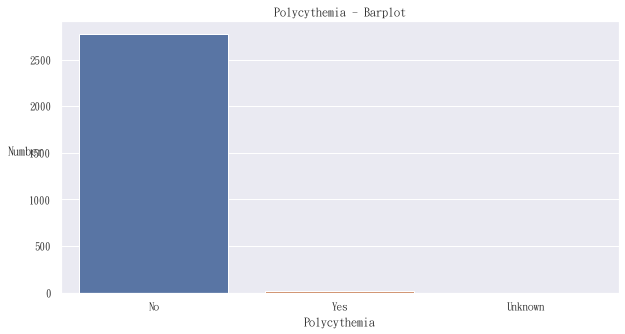

In [348]:
po_id = tsr_12.loc[:,"po_id"]
po_id = po_id.fillna(po_id.mode()[0])
#print(po_id)
print(po_id.value_counts() / len(po_id))
#print(po_id.describe())

po_id_labels = ["No","Yes","Unknown"]
sns.countplot(po_id).set_xticklabels(po_id_labels)
plt.title("Polycythemia - Barplot")
plt.xlabel('Polycythemia')
plt.ylabel('Number', rotation=0)
plt.show()

# Uremia

0.0    0.953164
1.0    0.046478
2.0    0.000358
Name: ur_id, dtype: float64


<ipython-input-349-c7a9665c188c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ur_id[(ur_id != 0) & (ur_id != 1) & (ur_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


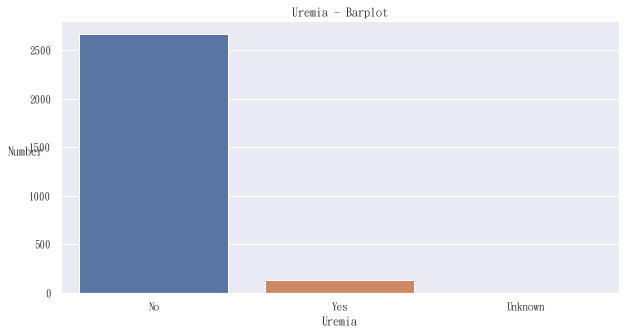

In [349]:
ur_id = tsr_12.loc[:,"ur_id"]
ur_id[(ur_id != 0) & (ur_id != 1) & (ur_id != 2)] = np.nan
ur_id = ur_id.fillna(ur_id.mode()[0])
#print(ur_id)
print(ur_id.value_counts() / len(ur_id))
#print(ur_id.describe())

ur_id_labels = ["No","Yes","Unknown"]
sns.countplot(ur_id).set_xticklabels(ur_id_labels)
plt.title("Uremia - Barplot")
plt.xlabel('Uremia')
plt.ylabel('Number', rotation=0)
plt.show()

# Smoking

0.0    0.620665
1.0    0.377190
2.0    0.002145
Name: sm_id, dtype: float64


<ipython-input-350-2221fa35eabb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_id[(sm_id != 0) & (sm_id != 1) & (sm_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


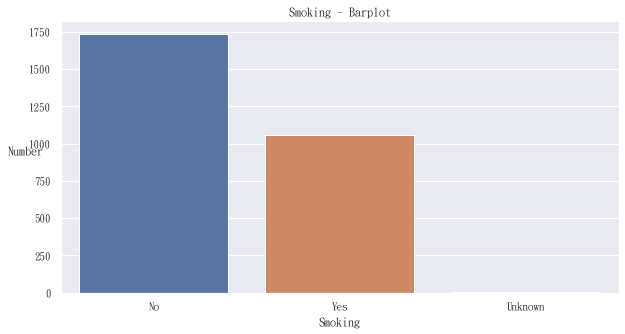

In [350]:
sm_id = tsr_12.loc[:,"sm_id"]
sm_id[(sm_id != 0) & (sm_id != 1) & (sm_id != 2)] = np.nan
sm_id = sm_id.fillna(sm_id.mode()[0])
#print(sm_id)
print(sm_id.value_counts() / len(sm_id))
#print(sm_id.describe())

sm_id_labels = ["No","Yes","Unknown"]
sns.countplot(sm_id).set_xticklabels(sm_id_labels)
plt.title("Smoking - Barplot")
plt.xlabel('Smoking')
plt.ylabel('Number', rotation=0)
plt.show()

# Smoking (支/天)

count    2797.000000
mean       15.348222
std         8.870024
min         0.000000
25%        15.348000
50%        15.348000
75%        20.000000
max        45.000000
Name: smc_nm, dtype: float64


<ipython-input-351-f328c4fc47ed>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smc_nm[(smc_nm < inner_fence_low) | (smc_nm > inner_fence_upp)] = np.nan


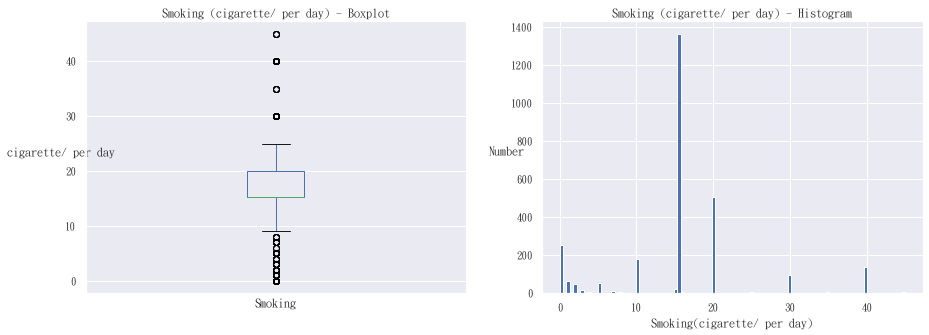

In [351]:
smc_nm = tsr_12.loc[:, "smc_nm"]

q1 = smc_nm.quantile(0.25)
q3 = smc_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
smc_nm[(smc_nm < inner_fence_low) | (smc_nm > inner_fence_upp)] = np.nan

smc_nm =smc_nm.fillna(round(smc_nm.mean(),3))

#print(smc_nm)
#print(smc_nm.value_counts() / len(smc_nm))
print(smc_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

smc_nm.plot.box(ax = ax1)
ax1.set_title("Smoking (cigarette/ per day) - Boxplot")
ax1.set_xlabel('Smoking')
ax1.set_ylabel('cigarette/ per day', rotation=0)
ax1.set_xticks([])

#smc_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
smc_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Smoking (cigarette/ per day) - Histogram")
ax2.set_xlabel('Smoking(cigarette/ per day)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Smoking (年)

<ipython-input-352-6bc23e9aef51>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smy_nm[(smy_nm < inner_fence_low) | (smy_nm > inner_fence_upp)] = np.nan


count    2797.000000
mean       22.365104
std        13.262955
min         0.000000
25%        20.000000
50%        22.365000
75%        22.365000
max        80.000000
Name: smy_nm, dtype: float64


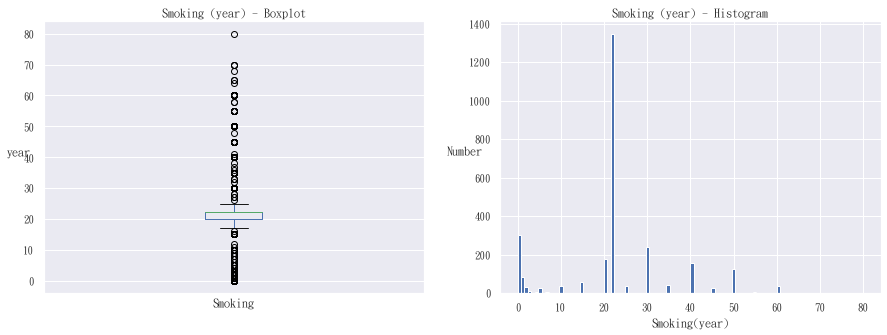

In [352]:
smy_nm = tsr_12.loc[:, "smy_nm"]

q1 = smy_nm.quantile(0.25)
q3 = smy_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
smy_nm[(smy_nm < inner_fence_low) | (smy_nm > inner_fence_upp)] = np.nan

smy_nm = smy_nm.fillna(round(smy_nm.mean(),3))

#print(smy_nm)
#print(smy_nm.value_counts() / len(smy_nm))
print(smy_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

smy_nm.plot.box(ax = ax1)
ax1.set_title("Smoking (year) - Boxplot")
ax1.set_xlabel('Smoking')
ax1.set_ylabel('year', rotation=0)
ax1.set_xticks([])

#smy_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
smy_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Smoking (year) - Histogram")
ax2.set_xlabel('Smoking(year)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Smoking Status

1.0    0.894172
2.0    0.105828
Name: smcp_id, dtype: float64


<ipython-input-353-cf2dca1ed36f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smcp_id[(smcp_id != 1) & (smcp_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


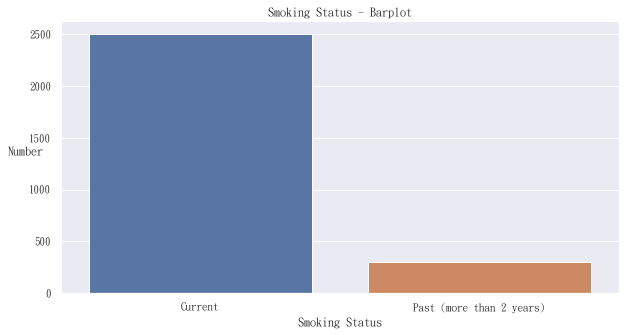

In [353]:
smcp_id = tsr_12.loc[:,"smcp_id"]
smcp_id[(smcp_id != 1) & (smcp_id != 2)] = np.nan
smcp_id = smcp_id.fillna(smcp_id.mode()[0])
#print(smcp_id)
print(smcp_id.value_counts() / len(smcp_id))
#print(smcp_id.describe())

smcp_id_labels = ["Current","Past (more than 2 years)"]
sns.countplot(smcp_id).set_xticklabels(smcp_id_labels)
plt.title("Smoking Status - Barplot")
plt.xlabel('Smoking Status')
plt.ylabel('Number', rotation=0)
plt.show()

# Previous TIA

0.0    0.942081
1.0    0.049696
2.0    0.008223
Name: ptia_id, dtype: float64


<ipython-input-354-59edec39c486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptia_id[(ptia_id != 0) & (ptia_id != 1) & (ptia_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


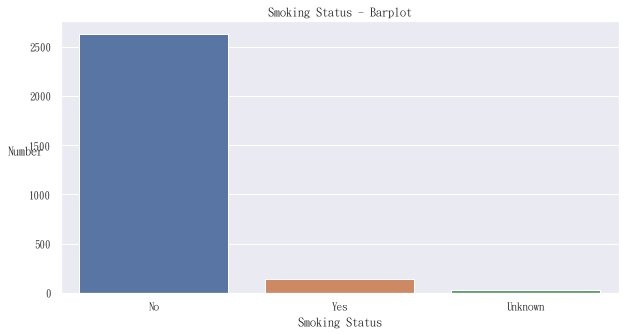

In [354]:
ptia_id = tsr_12.loc[:,"ptia_id"]
ptia_id[(ptia_id != 0) & (ptia_id != 1) & (ptia_id != 2)] = np.nan
ptia_id = ptia_id.fillna(ptia_id.mode()[0])
#print(ptia_id)
print(ptia_id.value_counts() / len(ptia_id))
#print(ptia_id.describe())

ptia_id_labels = ["No","Yes","Unknown"]
sns.countplot(ptia_id).set_xticklabels(ptia_id_labels)
plt.title("Smoking Status - Barplot")
plt.xlabel('Smoking Status')
plt.ylabel('Number', rotation=0)
plt.show()

# Dyslipidemia

1.0    0.540579
0.0    0.365391
2.0    0.094029
Name: hc_id, dtype: float64


<ipython-input-355-1e5a6cfa0823>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hc_id[(hc_id != 0) & (hc_id != 1) & (hc_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


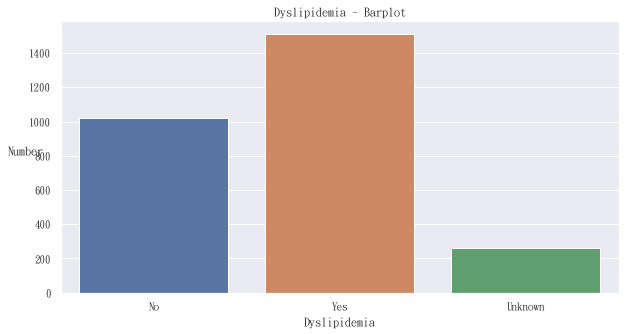

In [355]:
hc_id = tsr_12.loc[:,"hc_id"]
hc_id[(hc_id != 0) & (hc_id != 1) & (hc_id != 2)] = np.nan
hc_id = hc_id.fillna(hc_id.mode()[0])
#print(hc_id)
print(hc_id.value_counts() / len(hc_id))
#print(hc_id.describe())

hc_id_labels = ["No","Yes","Unknown"]
sns.countplot(hc_id).set_xticklabels(hc_id_labels)
plt.title("Dyslipidemia - Barplot")
plt.xlabel('Dyslipidemia')
plt.ylabel('Number', rotation=0)
plt.show()

# Dyslipidemia (Hypertriglyceridemia)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.614587
1.0    0.263497
2.0    0.121916
Name: hcht_id, dtype: float64


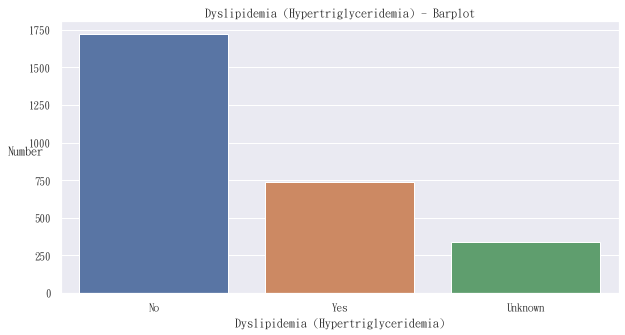

In [356]:
hcht_id = tsr_12.loc[:,"hcht_id"]
hcht_id = hcht_id.fillna(hcht_id.mode()[0])
#print(hcht_id)
print(hcht_id.value_counts() / len(hcht_id))
#print(hcht_id.describe())

hcht_id_labels = ["No","Yes","Unknown"]
sns.countplot(hcht_id).set_xticklabels(hcht_id_labels)
plt.title("Dyslipidemia (Hypertriglyceridemia) - Barplot")
plt.xlabel('Dyslipidemia (Hypertriglyceridemia)')
plt.ylabel('Number', rotation=0)
plt.show()

# Dyslipidemia (Hypercholesterolemia)

0.0    0.517340
1.0    0.383268
2.0    0.099392
Name: hchc_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


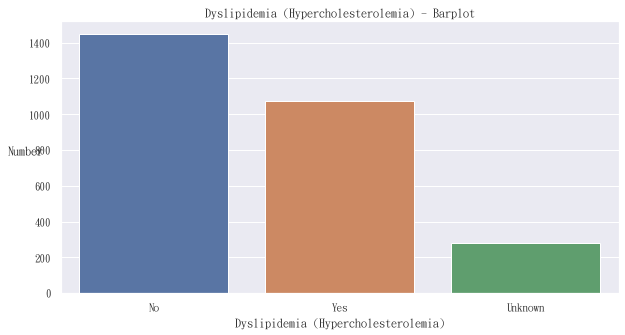

In [357]:
hchc_id = tsr_12.loc[:,"hchc_id"]
hchc_id = hchc_id.fillna(hchc_id.mode()[0])
#print(hchc_id)
print(hchc_id.value_counts() / len(hchc_id))
#print(hchc_id.describe())

hchc_id_labels = ["No","Yes","Unknown"]
sns.countplot(hchc_id).set_xticklabels(hchc_id_labels)
plt.title("Dyslipidemia (Hypercholesterolemia) - Barplot")
plt.xlabel('Dyslipidemia (Hypercholesterolemia)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hypertension

1.0    0.869861
0.0    0.124419
2.0    0.005720
Name: ht_id, dtype: float64


<ipython-input-358-fe8e7c2b6dd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ht_id[(ht_id != 0) & (ht_id != 1) & (ht_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


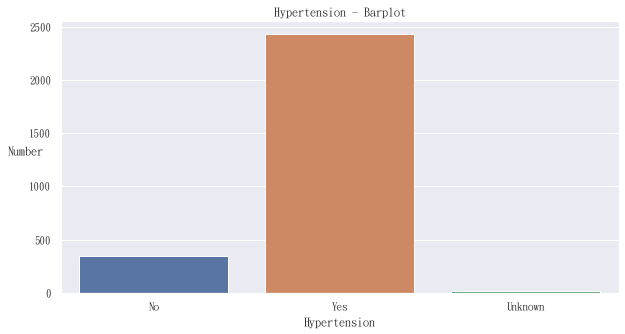

In [358]:
ht_id = tsr_12.loc[:,"ht_id"]
ht_id[(ht_id != 0) & (ht_id != 1) & (ht_id != 2)] = np.nan
ht_id = ht_id.fillna(ht_id.mode()[0])
#print(ht_id)
print(ht_id.value_counts() / len(ht_id))
#print(ht_id.describe())

ht_id_labels = ["No","Yes","Unknown"]
sns.countplot(ht_id).set_xticklabels(ht_id_labels)
plt.title("Hypertension - Barplot")
plt.xlabel('Hypertension')
plt.ylabel('Number', rotation=0)
plt.show()

# DM

0.0    0.687522
1.0    0.308187
2.0    0.004290
Name: dm_id, dtype: float64


<ipython-input-359-839643db144f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm_id[(dm_id != 0) & (dm_id != 1) & (dm_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


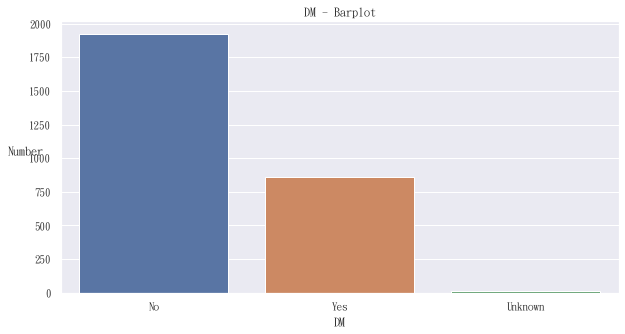

In [359]:
dm_id = tsr_12.loc[:,"dm_id"]
dm_id[(dm_id != 0) & (dm_id != 1) & (dm_id != 2)] = np.nan
dm_id = dm_id.fillna(dm_id.mode()[0])
#print(dm_id)
print(dm_id.value_counts() / len(dm_id))
#print(dm_id.describe())

dm_id_labels = ["No","Yes","Unknown"]
sns.countplot(dm_id).set_xticklabels(dm_id_labels)
plt.title("DM - Barplot")
plt.xlabel('DM')
plt.ylabel('Number', rotation=0)
plt.show()

# PAD

0.0    0.985341
1.0    0.012156
2.0    0.002503
Name: pad_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


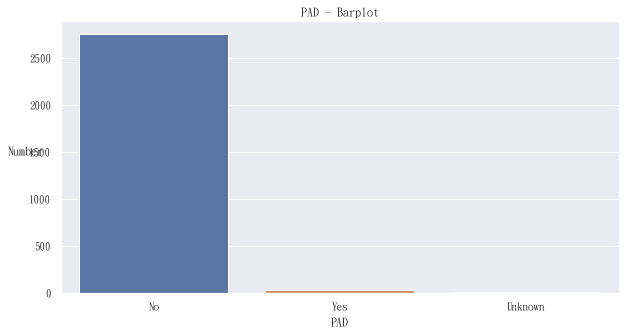

In [360]:
pad_id = tsr_12.loc[:,"pad_id"]
pad_id = pad_id.fillna(pad_id.mode()[0])
#print(pad_id)
print(pad_id.value_counts() / len(pad_id))
#print(pad_id.describe())

pad_id_labels = ["No","Yes","Unknown"]
sns.countplot(pad_id).set_xticklabels(pad_id_labels)
plt.title("PAD - Barplot")
plt.xlabel('PAD')
plt.ylabel('Number', rotation=0)
plt.show()

# Alcohol

0.0    0.818019
1.0    0.101180
2.0    0.000715
Name: al_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


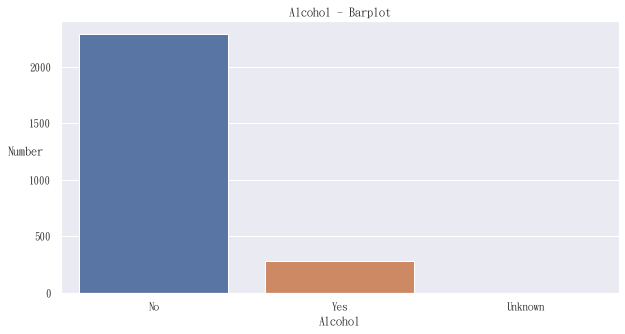

In [361]:
al_id = tsr_12.loc[:,"al_id"]
al_id = pd.to_numeric(al_id, errors = 'coerce')
al_id[(al_id != 0) & (al_id != 1) & (al_id != 2)] = np.nan
#al_id = al_id.fillna(al_id.mode()[0])
#print(al_id)
print(al_id.value_counts() / len(al_id))
#print(al_id.describe())

al_id_labels = ["No","Yes","Unknown"]
sns.countplot(al_id).set_xticklabels(al_id_labels)
plt.title("Alcohol - Barplot")
plt.xlabel('Alcohol')
plt.ylabel('Number', rotation=0)
plt.show()
al_id = al_id.fillna(999)

# Cancer

0.0    0.896317
1.0    0.015016
Name: ca_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


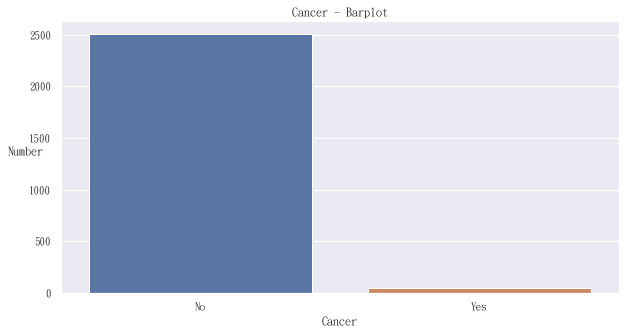

In [362]:
ca_id = tsr_12.loc[:,"ca_id"]
ca_id = pd.to_numeric(ca_id, errors = 'coerce')
ca_id[(ca_id != 0) & (ca_id != 1) & (ca_id != 2)] = np.nan
#ca_id = ca_id.fillna(ca_id.mode()[0])
#print(ca_id)
print(ca_id.value_counts() / len(ca_id))
#print(ca_id.describe())

#ca_id_labels = ["No","Yes", "Unknown"]
ca_id_labels = ["No","Yes"]
sns.countplot(ca_id).set_xticklabels(ca_id_labels)
plt.title("Cancer - Barplot")
plt.xlabel('Cancer')
plt.ylabel('Number', rotation=0)
plt.show()
ca_id = ca_id.fillna(999)

# Others

0.0    0.890955
1.0    0.109045
Name: ot_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


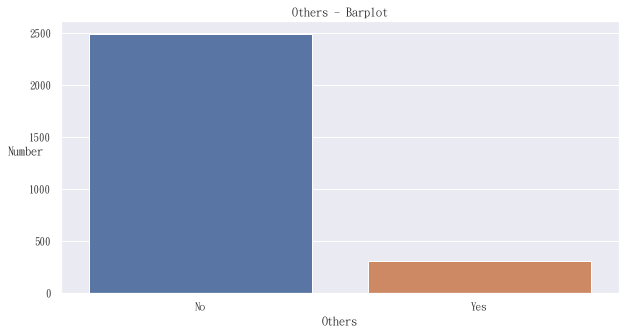

In [363]:
ot_id = tsr_12.loc[:,"ot_id"]
ot_id = pd.to_numeric(ot_id, errors = 'coerce')
ot_id[(ot_id != 0) & (ot_id != 1) & (ot_id != 2)] = np.nan
ot_id = ot_id.fillna(ot_id.mode()[0])
#print(ot_id)
print(ot_id.value_counts() / len(ot_id))
#print(ot_id.describe())

ot_id_labels = ["No","Yes"]
sns.countplot(ot_id).set_xticklabels(ot_id_labels)
plt.title("Others - Barplot")
plt.xlabel('Others')
plt.ylabel('Number', rotation=0)
plt.show()

# Hypertension Was Diagnosed at This Visit

N    0.996782
Y    0.003218
Name: thishy_id, dtype: float64


<ipython-input-364-fc461fba0ba9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thishy_id[thishy_id == "1"] = "Y"
<ipython-input-364-fc461fba0ba9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thishy_id[(thishy_id != "N") & (thishy_id != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


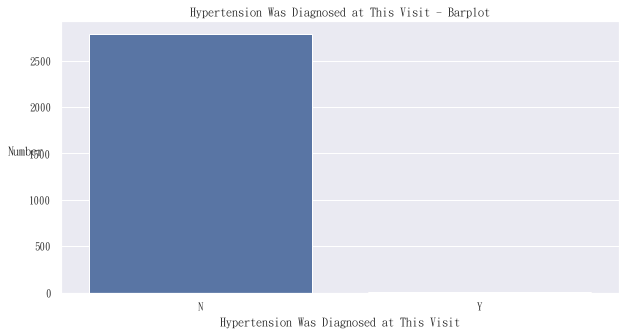

In [364]:
thishy_id = tsr_12.loc[:,"thishy_id"]
thishy_id[thishy_id == "1"] = "Y"
thishy_id[(thishy_id != "N") & (thishy_id != "Y")] = np.nan
thishy_id = thishy_id.fillna(thishy_id.mode()[0])
#print(thishy_id)
print(thishy_id.value_counts() / len(thishy_id))
#print(thishy_id.describe())

sns.countplot(thishy_id)
plt.title("Hypertension Was Diagnosed at This Visit - Barplot")
plt.xlabel('Hypertension Was Diagnosed at This Visit')
plt.ylabel('Number', rotation=0)
plt.show()

# DM Was Diagnosed at This Visit

N    0.996067
Y    0.003933
Name: thisdi_id, dtype: float64


<ipython-input-365-b387efcf26ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdi_id[thisdi_id == "1"] = 1
<ipython-input-365-b387efcf26ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdi_id[thisdi_id == "0"] = 0
<ipython-input-365-b387efcf26ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdi_id[thisdi_id == 1] = "Y"
<ipython-input-365-b387efcf26ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

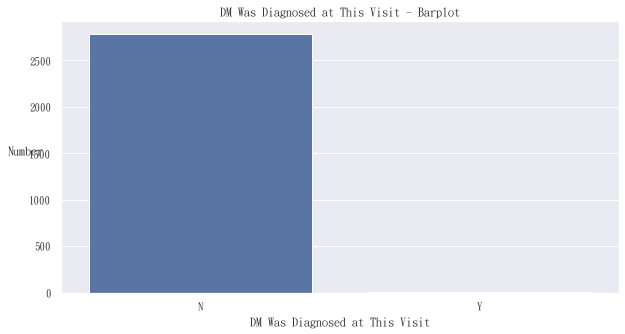

In [365]:
thisdi_id = tsr_12.loc[:,"thisdi_id"]
thisdi_id[thisdi_id == "1"] = 1
thisdi_id[thisdi_id == "0"] = 0
thisdi_id[thisdi_id == 1] = "Y"
thisdi_id[thisdi_id == 0] = "N"
thisdi_id[(thisdi_id != "N") & (thisdi_id != "Y")] = np.nan
thisdi_id = thisdi_id.fillna(thisdi_id.mode()[0])
#print(thisdi_id)
print(thisdi_id.value_counts() / len(thisdi_id))
#print(thisdi_id.describe())

sns.countplot(thisdi_id)
plt.title("DM Was Diagnosed at This Visit - Barplot")
plt.xlabel('DM Was Diagnosed at This Visit')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_1

2.0    0.902038
0.0    0.075080
1.0    0.022882
Name: fahiid_parents_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


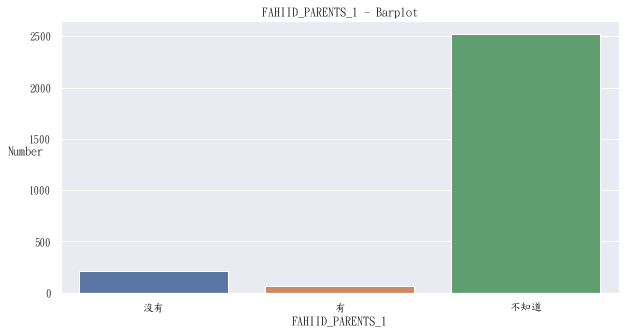

In [366]:
fahiid_parents_1 = tsr_12.loc[:,"fahiid_parents_1"]
fahiid_parents_1 = fahiid_parents_1.fillna(fahiid_parents_1.mode()[0])
#print(fahiid_parents_1)
print(fahiid_parents_1.value_counts() / len(fahiid_parents_1))
#print(fahiid_parents_1.describe())

fahiid_parents_1_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_1).set_xticklabels(fahiid_parents_1_labels)
plt.title("FAHIID_PARENTS_1 - Barplot")
plt.xlabel('FAHIID_PARENTS_1')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_2

<ipython-input-367-c9a855c0b62a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_parents_2[(fahiid_parents_2 != 0) & (fahiid_parents_2 != 1) & (fahiid_parents_2 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.0    0.899535
0.0    0.081516
1.0    0.018949
Name: fahiid_parents_2, dtype: float64


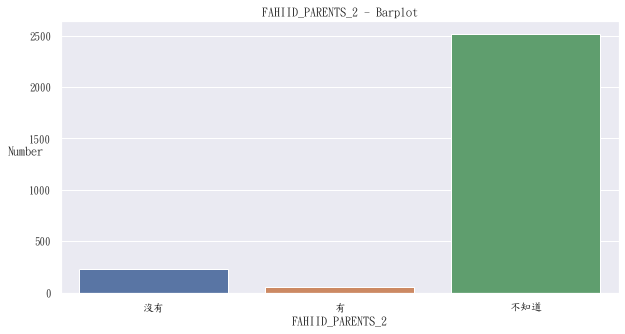

In [367]:
fahiid_parents_2 = tsr_12.loc[:,"fahiid_parents_2"]
fahiid_parents_2[(fahiid_parents_2 != 0) & (fahiid_parents_2 != 1) & (fahiid_parents_2 != 2)] = np.nan
fahiid_parents_2 = fahiid_parents_2.fillna(fahiid_parents_2.mode()[0])
#print(fahiid_parents_2)
print(fahiid_parents_2.value_counts() / len(fahiid_parents_2))
#print(fahiid_parents_2.describe())

fahiid_parents_2_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_2).set_xticklabels(fahiid_parents_2_labels)
plt.title("FAHIID_PARENTS_2 - Barplot")
plt.xlabel('FAHIID_PARENTS_2')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_3

2.0    0.895960
0.0    0.082946
1.0    0.021094
Name: fahiid_parents_3, dtype: float64


<ipython-input-368-def322ba7478>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_parents_3[(fahiid_parents_3 != 0) & (fahiid_parents_3 != 1) & (fahiid_parents_3 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


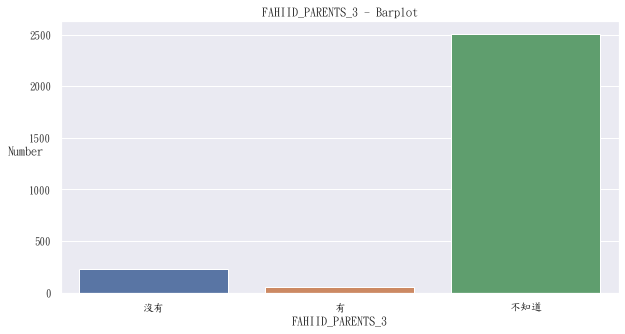

In [368]:
fahiid_parents_3 = tsr_12.loc[:,"fahiid_parents_3"]
fahiid_parents_3[(fahiid_parents_3 != 0) & (fahiid_parents_3 != 1) & (fahiid_parents_3 != 2)] = np.nan
fahiid_parents_3 = fahiid_parents_3.fillna(fahiid_parents_3.mode()[0])
#print(fahiid_parents_3)
print(fahiid_parents_3.value_counts() / len(fahiid_parents_3))
#print(fahiid_parents_3.describe())

fahiid_parents_3_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_3).set_xticklabels(fahiid_parents_3_labels)
plt.title("FAHIID_PARENTS_3 - Barplot")
plt.xlabel('FAHIID_PARENTS_3')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_4

2    0.909188
0    0.072935
1    0.017876
Name: fahiid_parents_4, dtype: float64


<ipython-input-369-ea8faec3a703>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_parents_4[(fahiid_parents_4 != 0) & (fahiid_parents_4 != 1) & (fahiid_parents_4 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


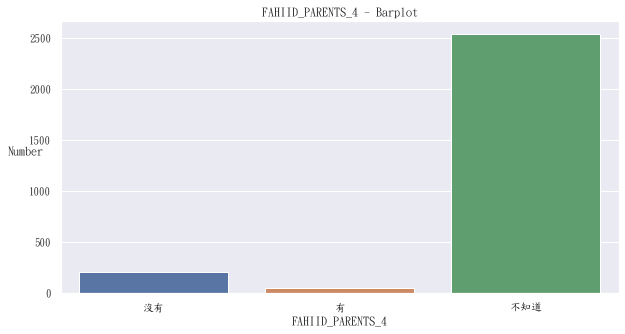

In [369]:
fahiid_parents_4 = tsr_12.loc[:,"fahiid_parents_4"]
fahiid_parents_4[(fahiid_parents_4 != 0) & (fahiid_parents_4 != 1) & (fahiid_parents_4 != 2)] = np.nan
fahiid_parents_4 = fahiid_parents_4.fillna(fahiid_parents_4.mode()[0])
#print(fahiid_parents_4)
print(fahiid_parents_4.value_counts() / len(fahiid_parents_4))
#print(fahiid_parents_4.describe())

fahiid_parents_4_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_4).set_xticklabels(fahiid_parents_4_labels)
plt.title("FAHIID_PARENTS_4 - Barplot")
plt.xlabel('FAHIID_PARENTS_4')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_1

<ipython-input-370-1e66c1f0193a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_1[(fahiid_brsi_1 != 0) & (fahiid_brsi_1 != 1) & (fahiid_brsi_1 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    0.666428
2    0.204505
1    0.129067
Name: fahiid_brsi_1, dtype: float64


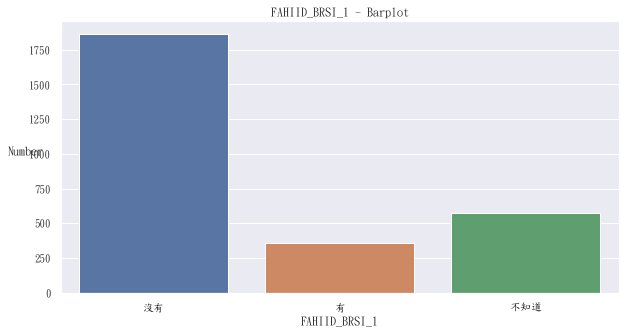

In [370]:
fahiid_brsi_1 = tsr_12.loc[:,"fahiid_brsi_1"]
fahiid_brsi_1[(fahiid_brsi_1 != 0) & (fahiid_brsi_1 != 1) & (fahiid_brsi_1 != 2)] = np.nan
fahiid_brsi_1 = fahiid_brsi_1.fillna(fahiid_brsi_1.mode()[0])
#print(fahiid_brsi_1)
print(fahiid_brsi_1.value_counts() / len(fahiid_brsi_1))
#print(fahiid_brsi_1.describe())

fahiid_brsi_1_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_1).set_xticklabels(fahiid_brsi_1_labels)
plt.title("FAHIID_BRSI_1 - Barplot")
plt.xlabel('FAHIID_BRSI_1')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_2

<ipython-input-371-c18656499083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_2[(fahiid_brsi_2 != 0) & (fahiid_brsi_2 != 1) & (fahiid_brsi_2 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    0.867358
2    0.092242
1    0.040400
Name: fahiid_brsi_2, dtype: float64


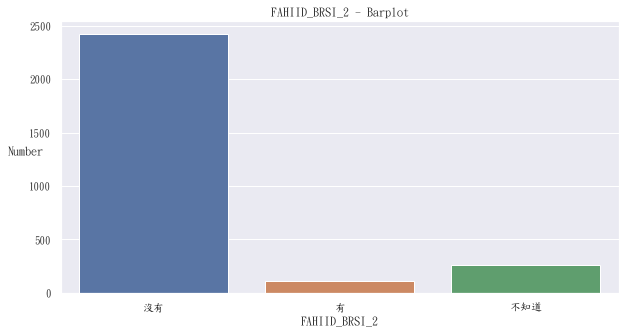

In [371]:
fahiid_brsi_2 = tsr_12.loc[:,"fahiid_brsi_2"]
fahiid_brsi_2[(fahiid_brsi_2 != 0) & (fahiid_brsi_2 != 1) & (fahiid_brsi_2 != 2)] = np.nan
fahiid_brsi_2 = fahiid_brsi_2.fillna(fahiid_brsi_2.mode()[0])
#print(fahiid_brsi_2)
print(fahiid_brsi_2.value_counts() / len(fahiid_brsi_2))
#print(fahiid_brsi_2.describe())

fahiid_brsi_2_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_2).set_xticklabels(fahiid_brsi_2_labels)
plt.title("FAHIID_BRSI_2 - Barplot")
plt.xlabel('FAHIID_BRSI_2')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_3

0    0.861637
2    0.130854
1    0.007508
Name: fahiid_brsi_3, dtype: float64


<ipython-input-372-3e452c74eda1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_3[(fahiid_brsi_3 != '0') & (fahiid_brsi_3 != '1') & (fahiid_brsi_3 != '2')] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


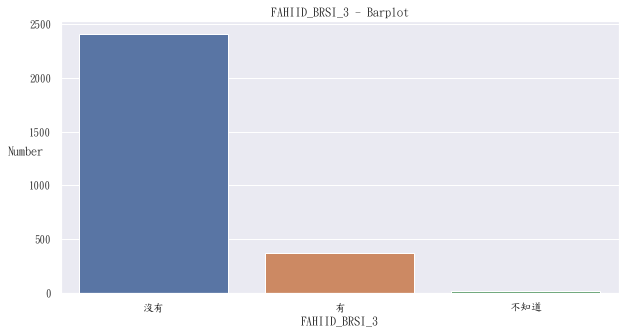

In [372]:
fahiid_brsi_3 = tsr_12.loc[:,"fahiid_brsi_3"]
fahiid_brsi_3[(fahiid_brsi_3 != '0') & (fahiid_brsi_3 != '1') & (fahiid_brsi_3 != '2')] = np.nan
fahiid_brsi_3 = fahiid_brsi_3.fillna(fahiid_brsi_3.mode()[0])
#print(fahiid_brsi_3)
print(fahiid_brsi_3.value_counts() / len(fahiid_brsi_3))
#print(fahiid_brsi_3.describe())

fahiid_brsi_3_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_3).set_xticklabels(fahiid_brsi_3_labels)
plt.title("FAHIID_BRSI_3 - Barplot")
plt.xlabel('FAHIID_BRSI_3')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_4

0    0.813371
2    0.137290
1    0.049339
Name: fahiid_brsi_4, dtype: float64


<ipython-input-373-743b333ef248>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_4[(fahiid_brsi_4 != '0') & (fahiid_brsi_4 != '1') & (fahiid_brsi_4 != '2')] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


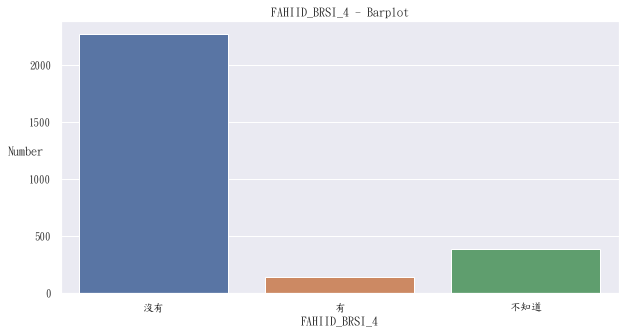

In [373]:
fahiid_brsi_4 = tsr_12.loc[:,"fahiid_brsi_4"]
fahiid_brsi_4[(fahiid_brsi_4 != '0') & (fahiid_brsi_4 != '1') & (fahiid_brsi_4 != '2')] = np.nan
fahiid_brsi_4 = fahiid_brsi_4.fillna(fahiid_brsi_4.mode()[0])
#print(fahiid_brsi_4)
print(fahiid_brsi_4.value_counts() / len(fahiid_brsi_4))
#print(fahiid_brsi_4.describe())

fahiid_brsi_4_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_4).set_xticklabels(fahiid_brsi_4_labels)
plt.title("FAHIID_BRSI_4 - Barplot")
plt.xlabel('FAHIID_BRSI_4')
plt.ylabel('Number', rotation=0)
plt.show()

# NIHS_1a_in

<ipython-input-374-66aea69bed03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1a_in[(nihs_1a_in < 0) | (nihs_1a_in > 3)] = np.nan


0.0    0.819092
1.0    0.107973
2.0    0.052914
3.0    0.020021
Name: nihs_1a_in, dtype: float64


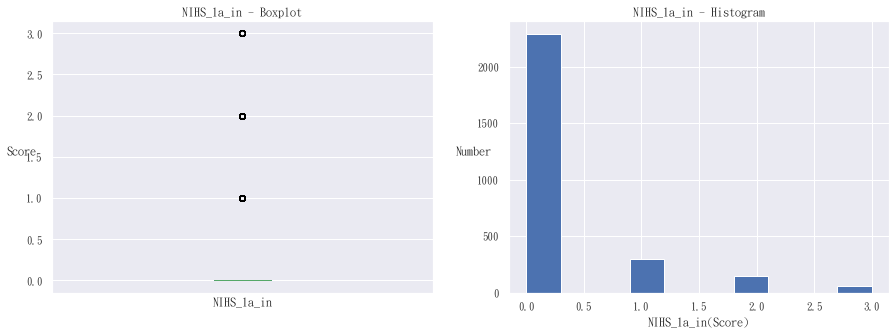

In [374]:
nihs_1a_in = tsr_12.loc[:,"nihs_1a_in"]
nihs_1a_in[(nihs_1a_in < 0) | (nihs_1a_in > 3)] = np.nan
nihs_1a_in = nihs_1a_in.fillna(nihs_1a_in.mode()[0])
#print(nihs_1a_in)
print(nihs_1a_in.value_counts() / len(nihs_1a_in))
#print(nihs_1a_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1a_in.plot.box(ax = ax1)
ax1.set_title("NIHS_1a_in - Boxplot")
ax1.set_xlabel('NIHS_1a_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1a_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_1a_in - Histogram")
ax2.set_xlabel('NIHS_1a_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1b_in

<ipython-input-375-3b2bc42df7f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1b_in[(nihs_1b_in < 0) | (nihs_1b_in > 2)] = np.nan


0.0    0.803003
2.0    0.139435
1.0    0.057562
Name: nihs_1b_in, dtype: float64


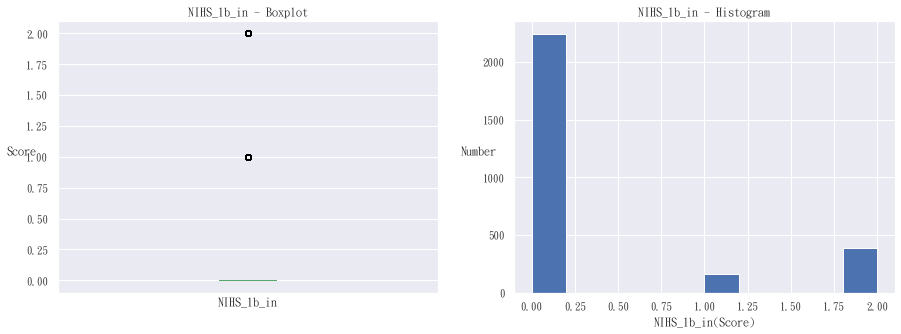

In [375]:
nihs_1b_in = tsr_12.loc[:,"nihs_1b_in"]
nihs_1b_in[(nihs_1b_in < 0) | (nihs_1b_in > 2)] = np.nan
nihs_1b_in = nihs_1b_in.fillna(nihs_1b_in.mode()[0])
#print(nihs_1b_in)
print(nihs_1b_in.value_counts() / len(nihs_1b_in))
#print(nihs_1b_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1b_in.plot.box(ax = ax1)
ax1.set_title("NIHS_1b_in - Boxplot")
ax1.set_xlabel('NIHS_1b_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1b_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_1b_in - Histogram")
ax2.set_xlabel('NIHS_1b_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1c_in

<ipython-input-376-5fb921dd7b30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1c_in[(nihs_1c_in < 0) | (nihs_1c_in > 2)] = np.nan


0.0    0.850912
2.0    0.099392
1.0    0.049696
Name: nihs_1c_in, dtype: float64


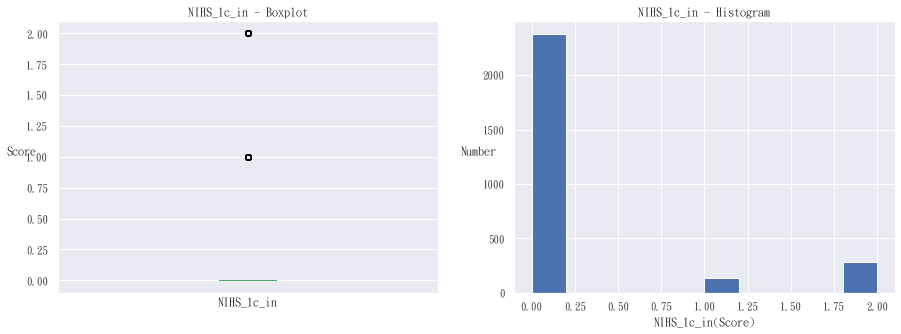

In [376]:
nihs_1c_in = tsr_12.loc[:,"nihs_1c_in"]
nihs_1c_in[(nihs_1c_in < 0) | (nihs_1c_in > 2)] = np.nan
nihs_1c_in = nihs_1c_in.fillna(nihs_1c_in.mode()[0])
#print(nihs_1c_in)
print(nihs_1c_in.value_counts() / len(nihs_1c_in))
#print(nihs_1c_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1c_in.plot.box(ax = ax1)
ax1.set_title("NIHS_1c_in - Boxplot")
ax1.set_xlabel('NIHS_1c_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1c_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_1c_in - Histogram")
ax2.set_xlabel('NIHS_1c_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_2_in

<ipython-input-377-1f0de0b27565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_2_in[(nihs_2_in < 0) | (nihs_2_in > 2)] = np.nan


0.0    0.807651
1.0    0.120486
2.0    0.071863
Name: nihs_2_in, dtype: float64


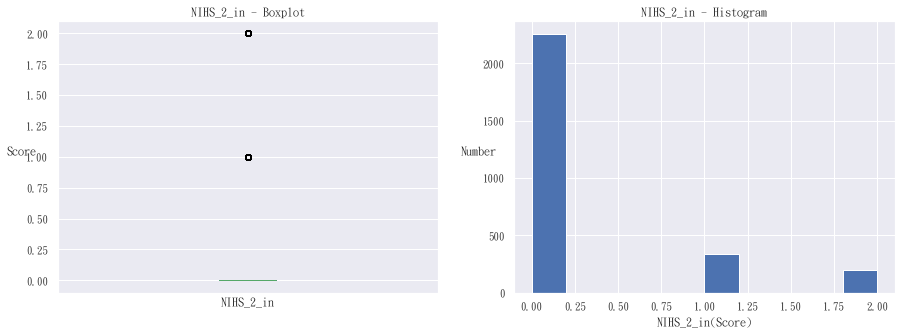

In [377]:
nihs_2_in = tsr_12.loc[:,"nihs_2_in"]
nihs_2_in[(nihs_2_in < 0) | (nihs_2_in > 2)] = np.nan
nihs_2_in = nihs_2_in.fillna(nihs_2_in.mode()[0])
#print(nihs_2_in)
print(nihs_2_in.value_counts() / len(nihs_2_in))
#print(nihs_2_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_2_in.plot.box(ax = ax1)
ax1.set_title("NIHS_2_in - Boxplot")
ax1.set_xlabel('NIHS_2_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_2_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_2_in - Histogram")
ax2.set_xlabel('NIHS_2_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_3_in

<ipython-input-378-7b2eedf3dd43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_3_in[(nihs_3_in < 0) | (nihs_3_in > 3)] = np.nan


0.0    0.817662
2.0    0.096890
1.0    0.066500
3.0    0.018949
Name: nihs_3_in, dtype: float64


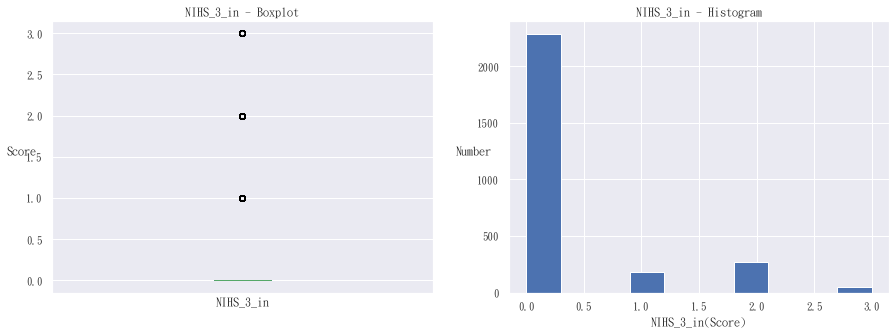

In [378]:
nihs_3_in = tsr_12.loc[:,"nihs_3_in"]
nihs_3_in[(nihs_3_in < 0) | (nihs_3_in > 3)] = np.nan
nihs_3_in = nihs_3_in.fillna(nihs_3_in.mode()[0])
#print(nihs_3_in)
print(nihs_3_in.value_counts() / len(nihs_3_in))
#print(nihs_3_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_3_in.plot.box(ax = ax1)
ax1.set_title("NIHS_3_in - Boxplot")
ax1.set_xlabel('NIHS_3_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_3_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_3_in - Histogram")
ax2.set_xlabel('NIHS_3_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_4_in

<ipython-input-379-7944c2b365d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_4_in[(nihs_4_in < 0) | (nihs_4_in > 3)] = np.nan


0.0    0.444405
1.0    0.285663
2.0    0.247050
3.0    0.022882
Name: nihs_4_in, dtype: float64


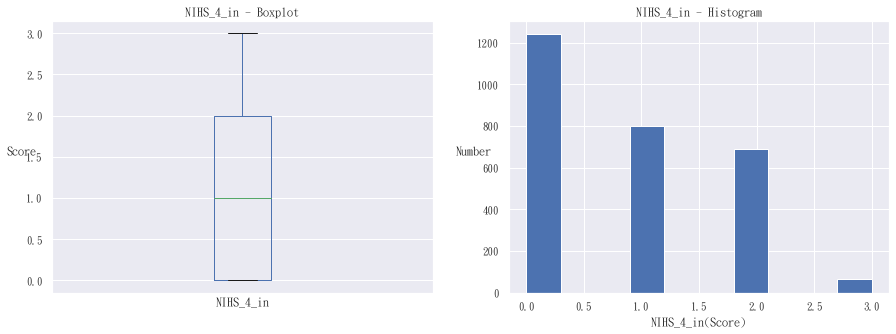

In [379]:
nihs_4_in = tsr_12.loc[:,"nihs_4_in"]
nihs_4_in[(nihs_4_in < 0) | (nihs_4_in > 3)] = np.nan
nihs_4_in = nihs_4_in.fillna(nihs_4_in.mode()[0])
#print(nihs_4_in)
print(nihs_4_in.value_counts() / len(nihs_4_in))
#print(nihs_4_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_4_in.plot.box(ax = ax1)
ax1.set_title("NIHS_4_in - Boxplot")
ax1.set_xlabel('NIHS_4_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_4_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_4_in - Histogram")
ax2.set_xlabel('NIHS_4_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_5aL_in

<ipython-input-380-25af3baafc2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5al_in[(nihs_5al_in < 0) | (nihs_5al_in > 4)] = np.nan


0.0    0.603146
1.0    0.215588
4.0    0.079013
2.0    0.051841
3.0    0.050411
Name: nihs_5al_in, dtype: float64


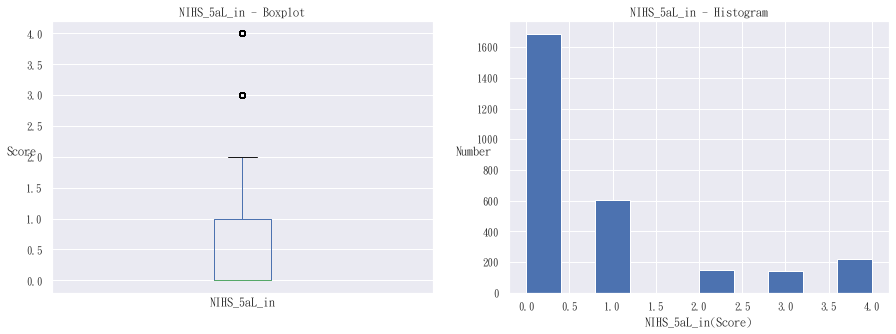

In [380]:
nihs_5al_in = tsr_12.loc[:,"nihs_5al_in"]
nihs_5al_in[(nihs_5al_in < 0) | (nihs_5al_in > 4)] = np.nan
nihs_5al_in = nihs_5al_in.fillna(nihs_5al_in.mode()[0])
#print(nihs_5al_in)
print(nihs_5al_in.value_counts() / len(nihs_5al_in))
#print(nihs_5al_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5al_in.plot.box(ax = ax1)
ax1.set_title("NIHS_5aL_in - Boxplot")
ax1.set_xlabel('NIHS_5aL_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5al_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_5aL_in - Histogram")
ax2.set_xlabel('NIHS_5aL_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_5bR_in

<ipython-input-381-632d34a8397e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5br_in[(nihs_5br_in < 0) | (nihs_5br_in > 4)] = np.nan


0.0    0.574902
1.0    0.254558
4.0    0.068645
2.0    0.055774
3.0    0.046121
Name: nihs_5br_in, dtype: float64


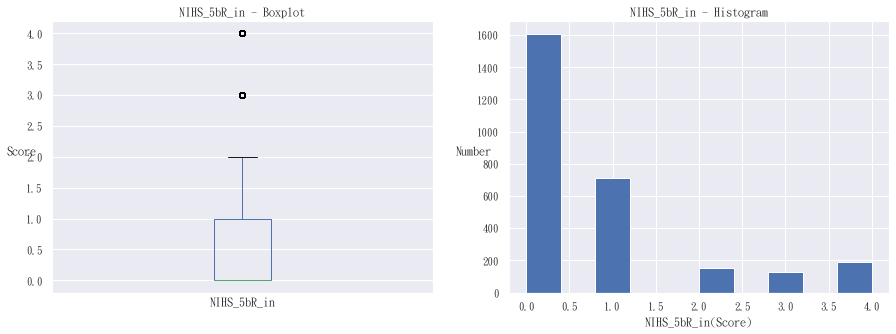

In [381]:
nihs_5br_in = tsr_12.loc[:,"nihs_5br_in"]
nihs_5br_in[(nihs_5br_in < 0) | (nihs_5br_in > 4)] = np.nan
nihs_5br_in = nihs_5br_in.fillna(nihs_5br_in.mode()[0])
#print(nihs_5br_in)
print(nihs_5br_in.value_counts() / len(nihs_5br_in))
#print(nihs_5br_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5br_in.plot.box(ax = ax1)
ax1.set_title("NIHS_5bR_in - Boxplot")
ax1.set_xlabel('NIHS_5bR_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5br_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_5bR_in - Histogram")
ax2.set_xlabel('NIHS_5bR_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_6aL_in

<ipython-input-382-0e923c4e3cda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6al_in[(nihs_6al_in < 0) | (nihs_6al_in > 4)] = np.nan


0.0    0.625670
1.0    0.220593
2.0    0.056489
4.0    0.055417
3.0    0.041831
Name: nihs_6al_in, dtype: float64


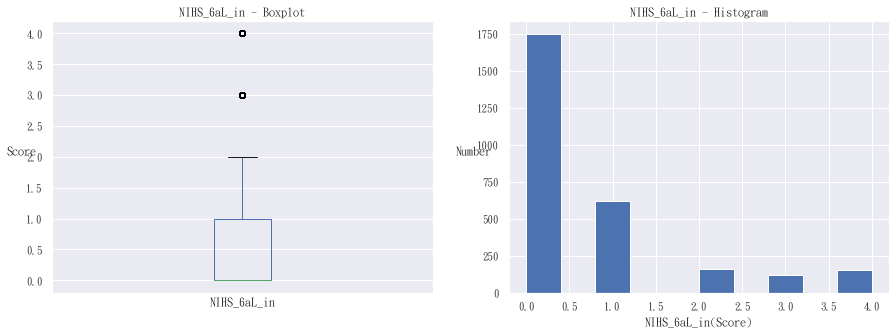

In [382]:
nihs_6al_in = tsr_12.loc[:,"nihs_6al_in"]
nihs_6al_in[(nihs_6al_in < 0) | (nihs_6al_in > 4)] = np.nan
nihs_6al_in = nihs_6al_in.fillna(nihs_6al_in.mode()[0])
#print(nihs_6al_in)
print(nihs_6al_in.value_counts() / len(nihs_6al_in))
#print(nihs_6al_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6al_in.plot.box(ax = ax1)
ax1.set_title("NIHS_6aL_in - Boxplot")
ax1.set_xlabel('NIHS_6aL_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6al_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_6aL_in - Histogram")
ax2.set_xlabel('NIHS_6aL_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_6bR_in

<ipython-input-383-a91770ad4293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6br_in[(nihs_6br_in < 0) | (nihs_6br_in > 4)] = np.nan


0.0    0.616732
1.0    0.243118
2.0    0.059349
4.0    0.040758
3.0    0.040043
Name: nihs_6br_in, dtype: float64


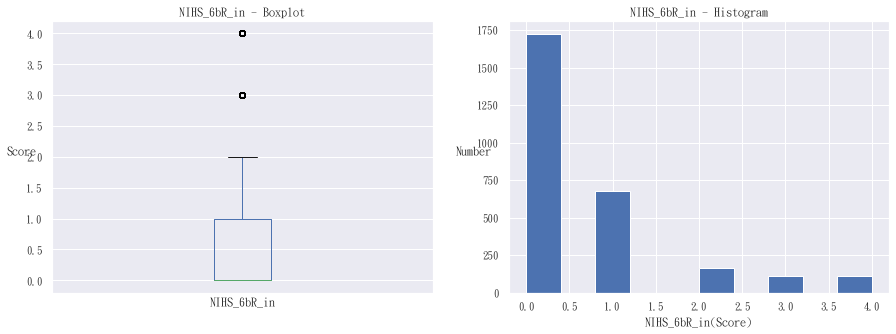

In [383]:
nihs_6br_in = tsr_12.loc[:,"nihs_6br_in"]
nihs_6br_in[(nihs_6br_in < 0) | (nihs_6br_in > 4)] = np.nan
nihs_6br_in = nihs_6br_in.fillna(nihs_6br_in.mode()[0])
#print(nihs_6br_in)
print(nihs_6br_in.value_counts() / len(nihs_6br_in))
#print(nihs_6br_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6br_in.plot.box(ax = ax1)
ax1.set_title("NIHS_6bR_in - Boxplot")
ax1.set_xlabel('NIHS_6bR_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6br_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_6bR_in - Histogram")
ax2.set_xlabel('NIHS_6bR_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_7_in

<ipython-input-384-371bb66a8806>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_7_in[(nihs_7_in < 0) | (nihs_7_in > 2)] = np.nan


0.0    0.822310
1.0    0.107258
2.0    0.070433
Name: nihs_7_in, dtype: float64


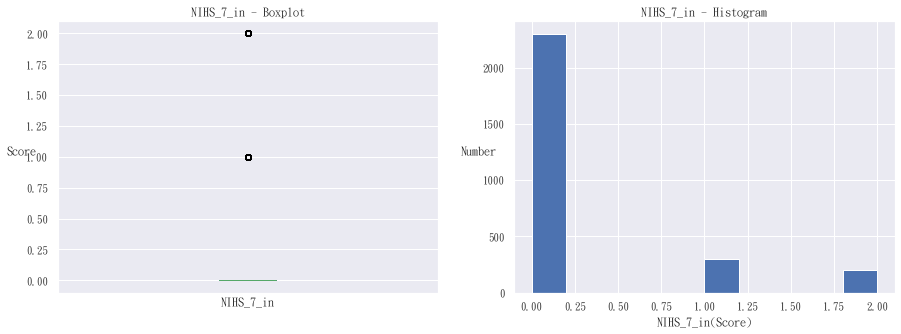

In [384]:
nihs_7_in = tsr_12.loc[:,"nihs_7_in"]
nihs_7_in[(nihs_7_in < 0) | (nihs_7_in > 2)] = np.nan
nihs_7_in = nihs_7_in.fillna(nihs_7_in.mode()[0])
#print(nihs_7_in)
print(nihs_7_in.value_counts() / len(nihs_7_in))
#print(nihs_7_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_7_in.plot.box(ax = ax1)
ax1.set_title("NIHS_7_in - Boxplot")
ax1.set_xlabel('NIHS_7_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_7_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_7_in - Histogram")
ax2.set_xlabel('NIHS_7_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_8_in

<ipython-input-385-b7636896234d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_8_in[(nihs_8_in < 0) | (nihs_8_in > 2)] = np.nan


0.0    0.587058
1.0    0.346800
2.0    0.066142
Name: nihs_8_in, dtype: float64


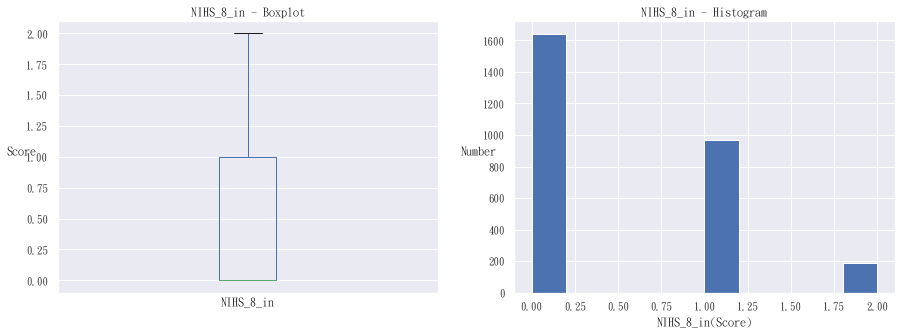

In [385]:
nihs_8_in = tsr_12.loc[:,"nihs_8_in"]
nihs_8_in[(nihs_8_in < 0) | (nihs_8_in > 2)] = np.nan
nihs_8_in = nihs_8_in.fillna(nihs_8_in.mode()[0])
#print(nihs_8_in)
print(nihs_8_in.value_counts() / len(nihs_8_in))
#print(nihs_8_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_8_in.plot.box(ax = ax1)
ax1.set_title("NIHS_8_in - Boxplot")
ax1.set_xlabel('NIHS_8_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_8_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_8_in - Histogram")
ax2.set_xlabel('NIHS_8_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_9_in

<ipython-input-386-80a64727a6a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_9_in[(nihs_9_in < 0) | (nihs_9_in > 3)] = np.nan


0.0    0.791562
1.0    0.090097
2.0    0.066142
3.0    0.052199
Name: nihs_9_in, dtype: float64


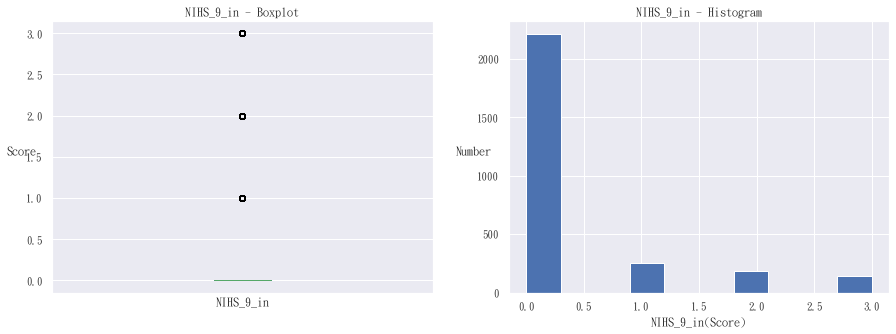

In [386]:
nihs_9_in = tsr_12.loc[:,"nihs_9_in"]
nihs_9_in[(nihs_9_in < 0) | (nihs_9_in > 3)] = np.nan
nihs_9_in = nihs_9_in.fillna(nihs_9_in.mode()[0])
#print(nihs_9_in)
print(nihs_9_in.value_counts() / len(nihs_9_in))
#print(nihs_9_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_9_in.plot.box(ax = ax1)
ax1.set_title("NIHS_9_in - Boxplot")
ax1.set_xlabel('NIHS_9_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_9_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_9_in - Histogram")
ax2.set_xlabel('NIHS_9_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_10_in

<ipython-input-387-90ab622ad952>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_10_in[(nihs_10_in < 0) | (nihs_10_in > 2)] = np.nan


0.0    0.540937
1.0    0.367894
2.0    0.091169
Name: nihs_10_in, dtype: float64


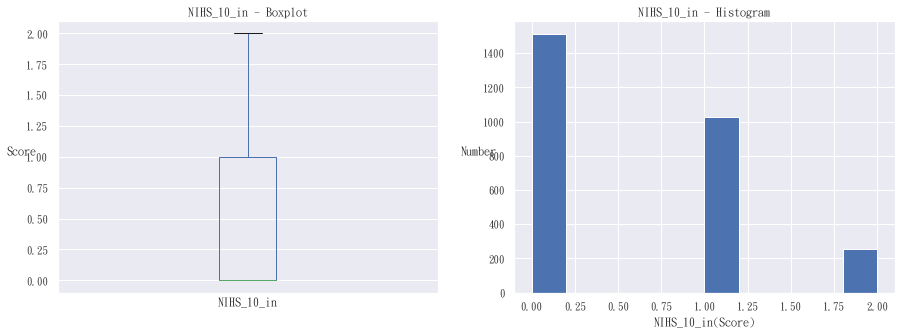

In [387]:
nihs_10_in = tsr_12.loc[:,"nihs_10_in"]
nihs_10_in[(nihs_10_in < 0) | (nihs_10_in > 2)] = np.nan
nihs_10_in = nihs_10_in.fillna(nihs_10_in.mode()[0])
#print(nihs_10_in)
print(nihs_10_in.value_counts() / len(nihs_10_in))
#print(nihs_10_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_10_in.plot.box(ax = ax1)
ax1.set_title("NIHS_10_in - Boxplot")
ax1.set_xlabel('NIHS_10_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_10_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_10_in - Histogram")
ax2.set_xlabel('NIHS_10_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_11_in

<ipython-input-388-888602b99eb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_11_in[(nihs_11_in < 0) | (nihs_11_in > 2)] = np.nan


0.0    0.922059
1.0    0.044333
2.0    0.033607
Name: nihs_11_in, dtype: float64


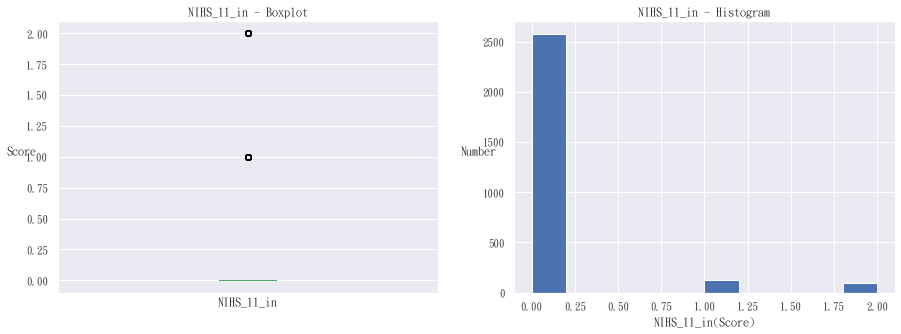

In [388]:
nihs_11_in = tsr_12.loc[:,"nihs_11_in"]
nihs_11_in[(nihs_11_in < 0) | (nihs_11_in > 2)] = np.nan
nihs_11_in = nihs_11_in.fillna(nihs_11_in.mode()[0])
#print(nihs_11_in)
print(nihs_11_in.value_counts() / len(nihs_11_in))
#print(nihs_11_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_11_in.plot.box(ax = ax1)
ax1.set_title("NIHS_11_in - Boxplot")
ax1.set_xlabel('NIHS_11_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_11_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_11_in - Histogram")
ax2.set_xlabel('NIHS_11_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Total_in

count    2797.000000
mean        6.947801
std         6.940385
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        40.000000
dtype: float64


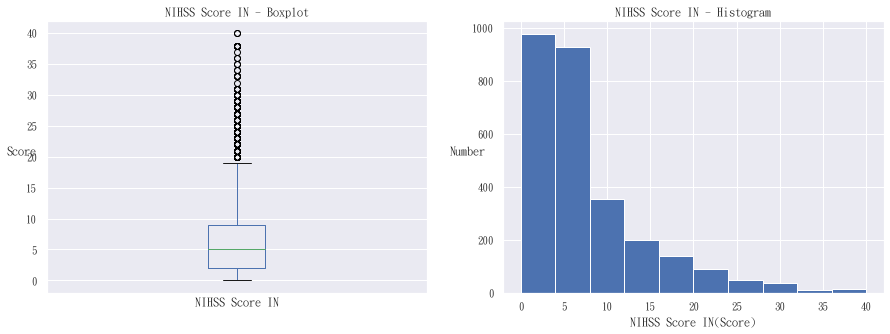

In [389]:
total_in = nihs_1a_in + nihs_1b_in + nihs_1c_in + nihs_2_in + nihs_3_in + nihs_4_in + nihs_5al_in + nihs_5br_in + nihs_6al_in + nihs_6br_in + nihs_7_in + nihs_8_in + nihs_9_in + nihs_10_in + nihs_11_in
#print(total_in)
#print(total_in.value_counts() / len(total_in))
print(total_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

total_in.plot.box(ax = ax1)
ax1.set_title("NIHSS Score IN - Boxplot")
ax1.set_xlabel('NIHSS Score IN')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

total_in.plot.hist(ax = ax2)
ax2.set_title("NIHSS Score IN - Histogram")
ax2.set_xlabel('NIHSS Score IN(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1a_out

<ipython-input-390-bd3c6478cd24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1a_out[(nihs_1a_out < 0) | (nihs_1a_out > 3)] = np.nan


0.0    0.932070
1.0    0.032535
2.0    0.031105
3.0    0.004290
Name: nihs_1a_out, dtype: float64


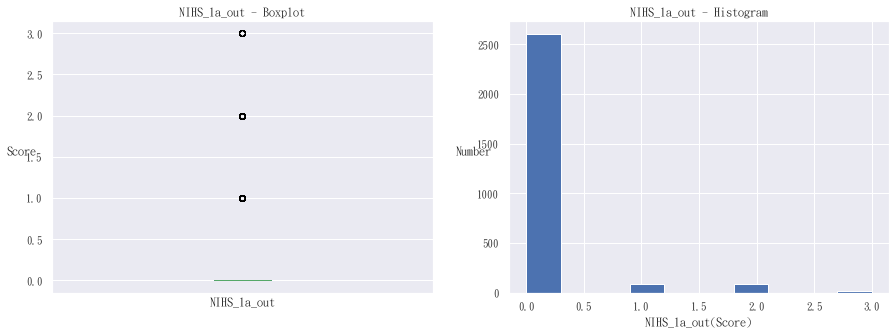

In [390]:
nihs_1a_out = tsr_12.loc[:,"nihs_1a_out"]
nihs_1a_out[(nihs_1a_out < 0) | (nihs_1a_out > 3)] = np.nan
nihs_1a_out = nihs_1a_out.fillna(nihs_1a_out.mode()[0])
#print(nihs_1a_out)
print(nihs_1a_out.value_counts() / len(nihs_1a_out))
#print(nihs_1a_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1a_out.plot.box(ax = ax1)
ax1.set_title("NIHS_1a_out - Boxplot")
ax1.set_xlabel('NIHS_1a_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1a_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_1a_out - Histogram")
ax2.set_xlabel('NIHS_1a_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1b_out

<ipython-input-391-c677d47acc9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1b_out[(nihs_1b_out < 0) | (nihs_1b_out > 2)] = np.nan


0.0    0.866285
2.0    0.086164
1.0    0.047551
Name: nihs_1b_out, dtype: float64


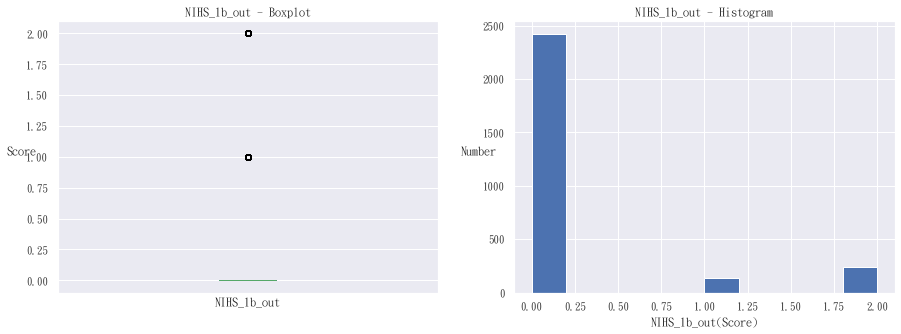

In [391]:
nihs_1b_out = tsr_12.loc[:,"nihs_1b_out"]
nihs_1b_out[(nihs_1b_out < 0) | (nihs_1b_out > 2)] = np.nan
nihs_1b_out = nihs_1b_out.fillna(nihs_1b_out.mode()[0])
#print(nihs_1b_out)
print(nihs_1b_out.value_counts() / len(nihs_1b_out))
#print(nihs_1b_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1b_out.plot.box(ax = ax1)
ax1.set_title("NIHS_1b_out - Boxplot")
ax1.set_xlabel('NIHS_1b_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1b_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_1b_out - Histogram")
ax2.set_xlabel('NIHS_1b_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1c_out

<ipython-input-392-a76338eecb0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1c_out[(nihs_1c_out < 0) | (nihs_1c_out > 2)] = np.nan


0.0    0.916696
2.0    0.051126
1.0    0.032177
Name: nihs_1c_out, dtype: float64


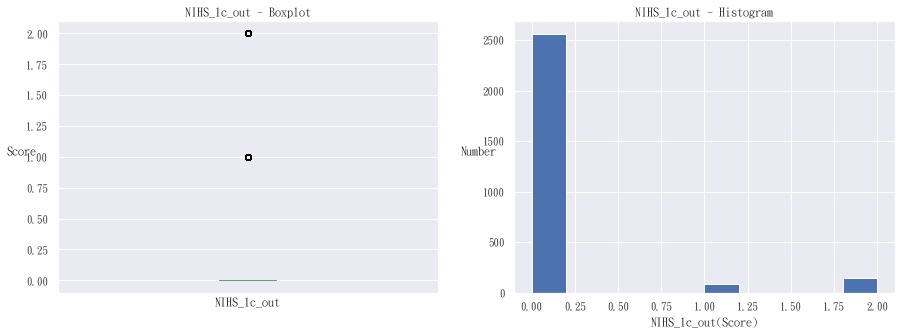

In [392]:
nihs_1c_out = tsr_12.loc[:,"nihs_1c_out"]
nihs_1c_out[(nihs_1c_out < 0) | (nihs_1c_out > 2)] = np.nan
nihs_1c_out = nihs_1c_out.fillna(nihs_1c_out.mode()[0])
#print(nihs_1c_out)
print(nihs_1c_out.value_counts() / len(nihs_1c_out))
#print(nihs_1c_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1c_out.plot.box(ax = ax1)
ax1.set_title("NIHS_1c_out - Boxplot")
ax1.set_xlabel('NIHS_1c_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1c_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_1c_out - Histogram")
ax2.set_xlabel('NIHS_1c_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_2_out

<ipython-input-393-2df7924c48d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_2_out[(nihs_2_out < 0) | (nihs_2_out > 2)] = np.nan


0.0    0.877369
1.0    0.084019
2.0    0.038613
Name: nihs_2_out, dtype: float64


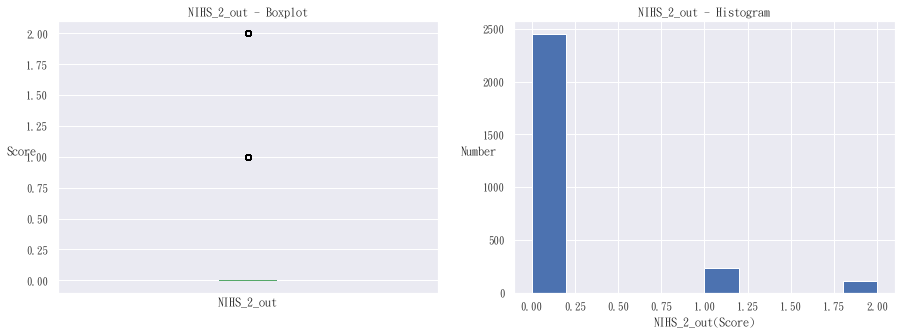

In [393]:
nihs_2_out = tsr_12.loc[:,"nihs_2_out"]
nihs_2_out[(nihs_2_out < 0) | (nihs_2_out > 2)] = np.nan
nihs_2_out = nihs_2_out.fillna(nihs_2_out.mode()[0])
#print(nihs_2_out)
print(nihs_2_out.value_counts() / len(nihs_2_out))
#print(nihs_2_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_2_out.plot.box(ax = ax1)
ax1.set_title("NIHS_2_out - Boxplot")
ax1.set_xlabel('NIHS_2_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_2_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_2_out - Histogram")
ax2.set_xlabel('NIHS_2_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_3_out

0.0    0.839113
2.0    0.074723
1.0    0.074365
3.0    0.011798
Name: nihs_3_out, dtype: float64


<ipython-input-394-9be170f38b7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_3_out[(nihs_3_out < 0) | (nihs_3_out > 3)] = np.nan


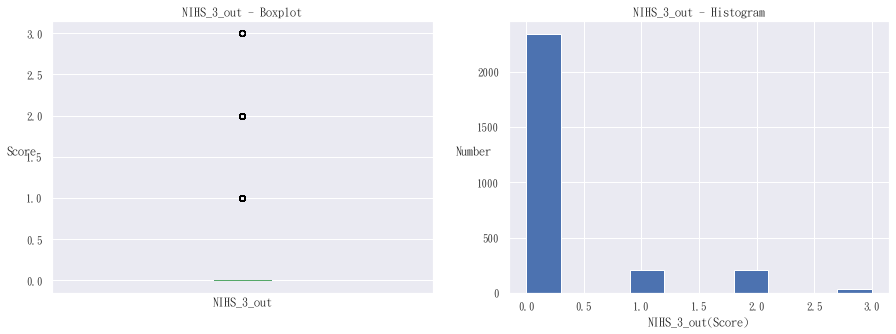

In [394]:
nihs_3_out = tsr_12.loc[:,"nihs_3_out"]
nihs_3_out[(nihs_3_out < 0) | (nihs_3_out > 3)] = np.nan
nihs_3_out = nihs_3_out.fillna(nihs_3_out.mode()[0])
#print(nihs_3_out)
print(nihs_3_out.value_counts() / len(nihs_3_out))
#print(nihs_3_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_3_out.plot.box(ax = ax1)
ax1.set_title("NIHS_3_out - Boxplot")
ax1.set_xlabel('NIHS_3_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_3_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_3_out - Histogram")
ax2.set_xlabel('NIHS_3_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_4_out

<ipython-input-395-624c95269a77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_4_out[(nihs_4_out < 0) | (nihs_4_out > 3)] = np.nan


0.0    0.444762
1.0    0.314265
2.0    0.213085
3.0    0.027887
Name: nihs_4_out, dtype: float64


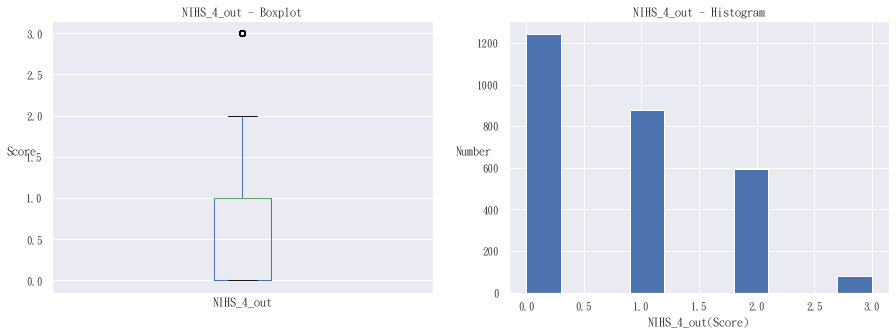

In [395]:
nihs_4_out = tsr_12.loc[:,"nihs_4_out"]
nihs_4_out[(nihs_4_out < 0) | (nihs_4_out > 3)] = np.nan
nihs_4_out = nihs_4_out.fillna(nihs_4_out.mode()[0])
#print(nihs_4_out)
print(nihs_4_out.value_counts() / len(nihs_4_out))
#print(nihs_4_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_4_out.plot.box(ax = ax1)
ax1.set_title("NIHS_4_out - Boxplot")
ax1.set_xlabel('NIHS_4_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_4_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_4_out - Histogram")
ax2.set_xlabel('NIHS_4_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_5aL_out

<ipython-input-396-7a8c1ee07c17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5al_out[(nihs_5al_out < 0) | (nihs_5al_out > 4)] = np.nan


0.0    0.655345
1.0    0.196282
2.0    0.052556
3.0    0.051841
4.0    0.043976
Name: nihs_5al_out, dtype: float64


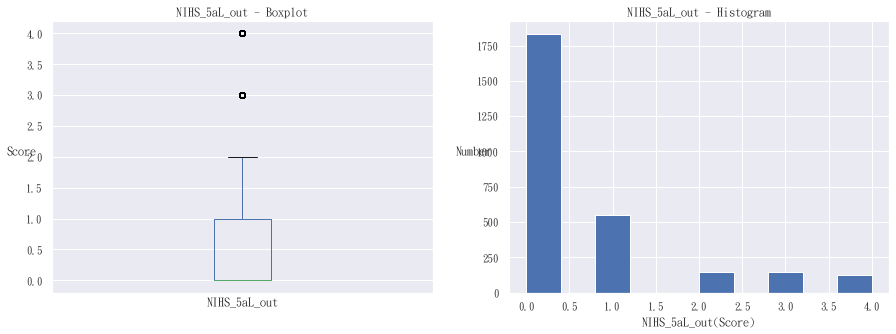

In [396]:
nihs_5al_out = tsr_12.loc[:,"nihs_5al_out"]
nihs_5al_out[(nihs_5al_out < 0) | (nihs_5al_out > 4)] = np.nan
nihs_5al_out = nihs_5al_out.fillna(nihs_5al_out.mode()[0])
#print(nihs_5al_out)
print(nihs_5al_out.value_counts() / len(nihs_5al_out))
#print(nihs_5al_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5al_out.plot.box(ax = ax1)
ax1.set_title("NIHS_5aL_out - Boxplot")
ax1.set_xlabel('NIHS_5aL_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5al_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_5aL_out - Histogram")
ax2.set_xlabel('NIHS_5aL_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_5bR_out

<ipython-input-397-bead149058f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5br_out[(nihs_5br_out < 0) | (nihs_5br_out > 4)] = np.nan


0.0    0.647837
1.0    0.217018
3.0    0.053629
2.0    0.044691
4.0    0.036825
Name: nihs_5br_out, dtype: float64


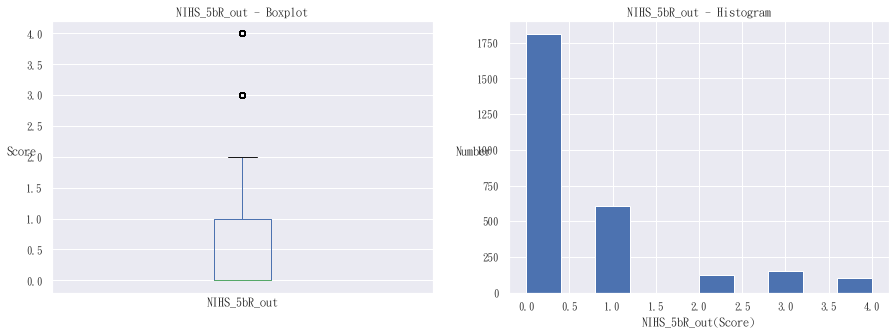

In [397]:
nihs_5br_out = tsr_12.loc[:,"nihs_5br_out"]
nihs_5br_out[(nihs_5br_out < 0) | (nihs_5br_out > 4)] = np.nan
nihs_5br_out = nihs_5br_out.fillna(nihs_5br_out.mode()[0])
#print(nihs_5br_out)
print(nihs_5br_out.value_counts() / len(nihs_5br_out))
#print(nihs_5br_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5br_out.plot.box(ax = ax1)
ax1.set_title("NIHS_5bR_out - Boxplot")
ax1.set_xlabel('NIHS_5bR_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5br_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_5bR_out - Histogram")
ax2.set_xlabel('NIHS_5bR_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_6aL_out

<ipython-input-398-e46c83cd98f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6al_out[(nihs_6al_out < 0) | (nihs_6al_out > 4)] = np.nan


0.0    0.671791
1.0    0.203075
2.0    0.050054
3.0    0.048981
4.0    0.026099
Name: nihs_6al_out, dtype: float64


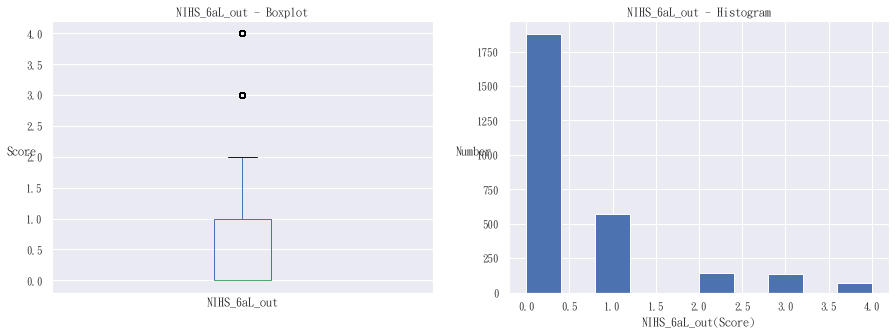

In [398]:
nihs_6al_out = tsr_12.loc[:,"nihs_6al_out"]
nihs_6al_out[(nihs_6al_out < 0) | (nihs_6al_out > 4)] = np.nan
nihs_6al_out = nihs_6al_out.fillna(nihs_6al_out.mode()[0])
#print(nihs_6al_out)
print(nihs_6al_out.value_counts() / len(nihs_6al_out))
#print(nihs_6al_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6al_out.plot.box(ax = ax1)
ax1.set_title("NIHS_6aL_out - Boxplot")
ax1.set_xlabel('NIHS_6aL_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6al_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_6aL_out - Histogram")
ax2.set_xlabel('NIHS_6aL_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_6bR_out

<ipython-input-399-a1035e927cc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6br_out[(nihs_6br_out < 0) | (nihs_6br_out > 4)] = np.nan


0.0    0.683232
1.0    0.203790
2.0    0.051126
3.0    0.040043
4.0    0.021809
Name: nihs_6br_out, dtype: float64


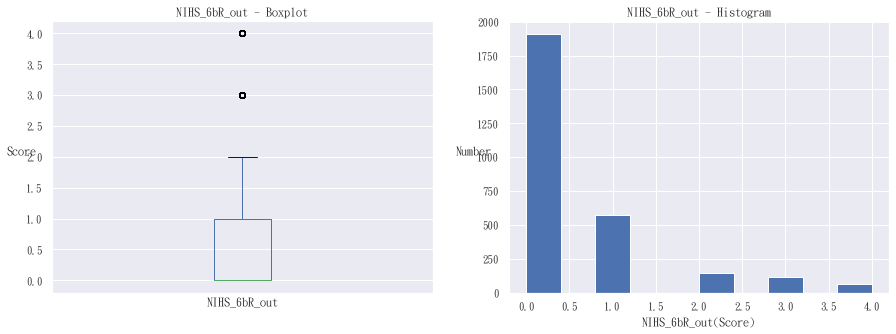

In [399]:
nihs_6br_out = tsr_12.loc[:,"nihs_6br_out"]
nihs_6br_out[(nihs_6br_out < 0) | (nihs_6br_out > 4)] = np.nan
nihs_6br_out = nihs_6br_out.fillna(nihs_6br_out.mode()[0])
#print(nihs_6br_out)
print(nihs_6br_out.value_counts() / len(nihs_6br_out))
#print(nihs_6br_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6br_out.plot.box(ax = ax1)
ax1.set_title("NIHS_6bR_out - Boxplot")
ax1.set_xlabel('NIHS_6bR_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6br_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_6bR_out - Histogram")
ax2.set_xlabel('NIHS_6bR_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_7_out

<ipython-input-400-9bab9ede97c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_7_out[(nihs_7_out < 0) | (nihs_7_out > 2)] = np.nan


0.0    0.875581
1.0    0.085449
2.0    0.038970
Name: nihs_7_out, dtype: float64


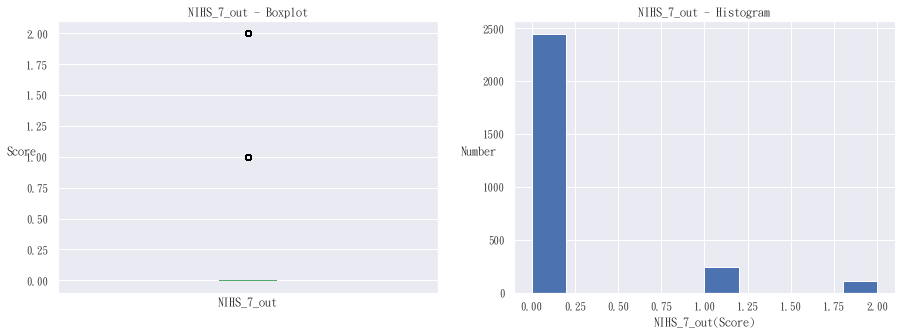

In [400]:
nihs_7_out = tsr_12.loc[:,"nihs_7_out"]
nihs_7_out[(nihs_7_out < 0) | (nihs_7_out > 2)] = np.nan
nihs_7_out = nihs_7_out.fillna(nihs_7_out.mode()[0])
#print(nihs_7_out)
print(nihs_7_out.value_counts() / len(nihs_7_out))
#print(nihs_7_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_7_out.plot.box(ax = ax1)
ax1.set_title("NIHS_7_out - Boxplot")
ax1.set_xlabel('NIHS_7_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_7_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_7_out - Histogram")
ax2.set_xlabel('NIHS_7_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_8_out

<ipython-input-401-651326c8ce47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_8_out[(nihs_8_out < 0) | (nihs_8_out > 2)] = np.nan


0.0    0.694315
1.0    0.272435
2.0    0.033250
Name: nihs_8_out, dtype: float64


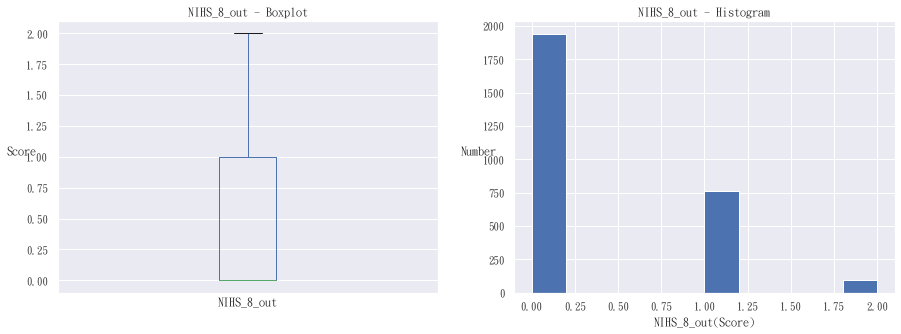

In [401]:
nihs_8_out = tsr_12.loc[:,"nihs_8_out"]
nihs_8_out[(nihs_8_out < 0) | (nihs_8_out > 2)] = np.nan
nihs_8_out = nihs_8_out.fillna(nihs_8_out.mode()[0])
#print(nihs_8_out)
print(nihs_8_out.value_counts() / len(nihs_8_out))
#print(nihs_8_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_8_out.plot.box(ax = ax1)
ax1.set_title("NIHS_8_out - Boxplot")
ax1.set_xlabel('NIHS_8_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_8_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_8_out - Histogram")
ax2.set_xlabel('NIHS_8_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_9_out

0.0    0.821237
1.0    0.087236
2.0    0.048981
3.0    0.042546
Name: nihs_9_out, dtype: float64


<ipython-input-402-c73f5e1fc3f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_9_out[(nihs_9_out < 0) | (nihs_9_out > 3)] = np.nan


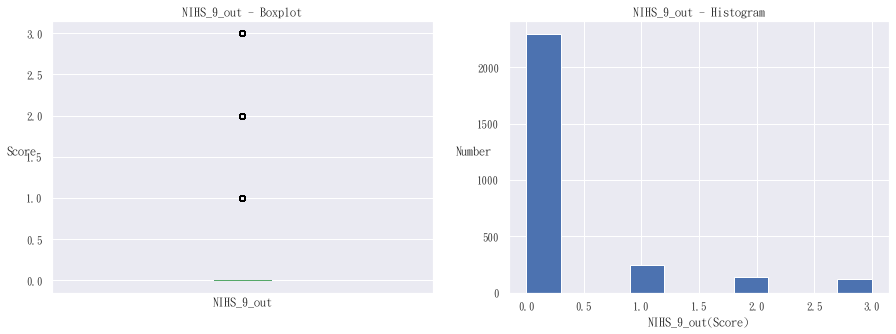

In [402]:
nihs_9_out = tsr_12.loc[:,"nihs_9_out"]
nihs_9_out[(nihs_9_out < 0) | (nihs_9_out > 3)] = np.nan
nihs_9_out = nihs_9_out.fillna(nihs_9_out.mode()[0])
#print(nihs_9_out)
print(nihs_9_out.value_counts() / len(nihs_9_out))
#print(nihs_9_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_9_out.plot.box(ax = ax1)
ax1.set_title("NIHS_9_out - Boxplot")
ax1.set_xlabel('NIHS_9_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_9_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_9_out - Histogram")
ax2.set_xlabel('NIHS_9_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_10_out

<ipython-input-403-bbbfa5fb24fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_10_out[(nihs_10_out < 0) | (nihs_10_out > 2)] = np.nan


0.0    0.589918
1.0    0.344655
2.0    0.065427
Name: nihs_10_out, dtype: float64


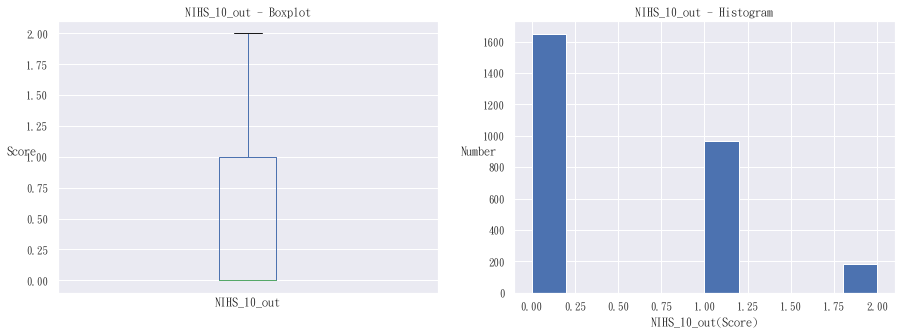

In [403]:
nihs_10_out = tsr_12.loc[:,"nihs_10_out"]
nihs_10_out[(nihs_10_out < 0) | (nihs_10_out > 2)] = np.nan
nihs_10_out = nihs_10_out.fillna(nihs_10_out.mode()[0])
#print(nihs_10_out)
print(nihs_10_out.value_counts() / len(nihs_10_out))
#print(nihs_10_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_10_out.plot.box(ax = ax1)
ax1.set_title("NIHS_10_out - Boxplot")
ax1.set_xlabel('NIHS_10_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_10_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_10_out - Histogram")
ax2.set_xlabel('NIHS_10_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_11_out

<ipython-input-404-552534a7473b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_11_out[(nihs_11_out < 0) | (nihs_11_out > 2)] = np.nan


0.0    0.952092
1.0    0.033250
2.0    0.014659
Name: nihs_11_out, dtype: float64


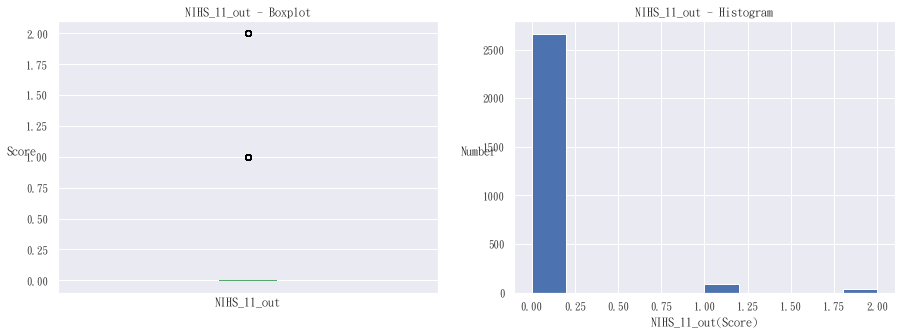

In [404]:
nihs_11_out = tsr_12.loc[:,"nihs_11_out"]
nihs_11_out[(nihs_11_out < 0) | (nihs_11_out > 2)] = np.nan
nihs_11_out = nihs_11_out.fillna(nihs_11_out.mode()[0])
#print(nihs_11_out)
print(nihs_11_out.value_counts() / len(nihs_11_out))
#print(nihs_11_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_11_out.plot.box(ax = ax1)
ax1.set_title("NIHS_11_out - Boxplot")
ax1.set_xlabel('NIHS_11_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_11_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_11_out - Histogram")
ax2.set_xlabel('NIHS_11_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Total_out

count    2797.000000
mean        5.375045
std         5.801669
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        38.000000
dtype: float64


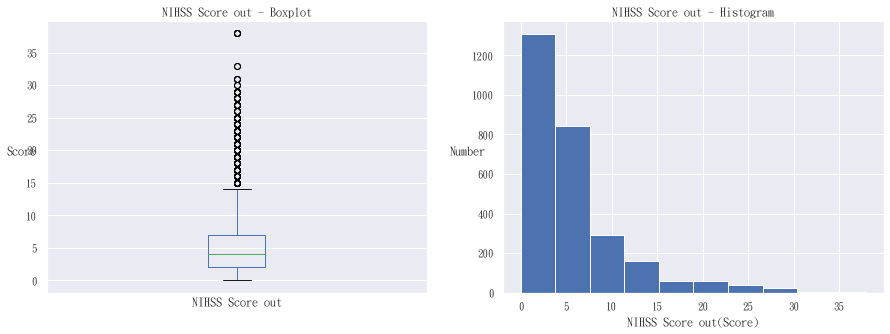

In [405]:
total_out = nihs_1a_out + nihs_1b_out + nihs_1c_out + nihs_2_out + nihs_3_out + nihs_4_out + nihs_5al_out + nihs_5br_out + nihs_6al_out + nihs_6br_out + nihs_7_out + nihs_8_out + nihs_9_out + nihs_10_out + nihs_11_out
#print(total_out)
#print(total_out.value_counts() / len(total_out))
print(total_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

total_out.plot.box(ax = ax1)
ax1.set_title("NIHSS Score out - Boxplot")
ax1.set_xlabel('NIHSS Score out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

total_out.plot.hist(ax = ax2)
ax2.set_title("NIHSS Score out - Histogram")
ax2.set_xlabel('NIHSS Score out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# SEX

1    0.607079
0    0.392921
Name: SexName, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


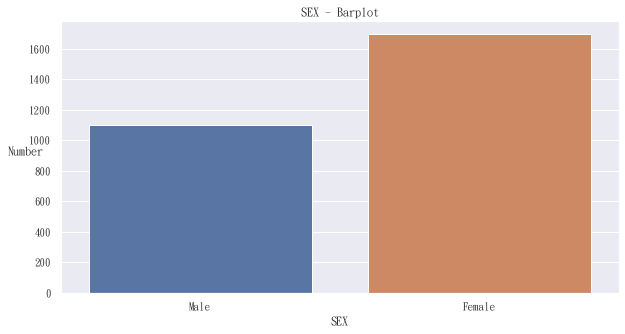

In [406]:
SexName = tsr_12.loc[:, "SexName"]
#print(SexName)
print(SexName.value_counts() / len(SexName))
#print(SexName.describe())

SexName_labels = ["Male","Female"]
sns.countplot(SexName).set_xticklabels(SexName_labels)
plt.title("SEX - Barplot")
plt.xlabel('SEX')
plt.ylabel('Number', rotation=0)
plt.show()

# AGE

count    2797.000000
mean       64.315660
std        12.654465
min        27.000000
25%        55.000000
50%        65.000000
75%        74.000000
max        96.000000
Name: Age, dtype: float64


<ipython-input-407-8fa6e35cb371>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age[(Age < inner_fence_low) | (Age > inner_fence_upp)] = np.nan


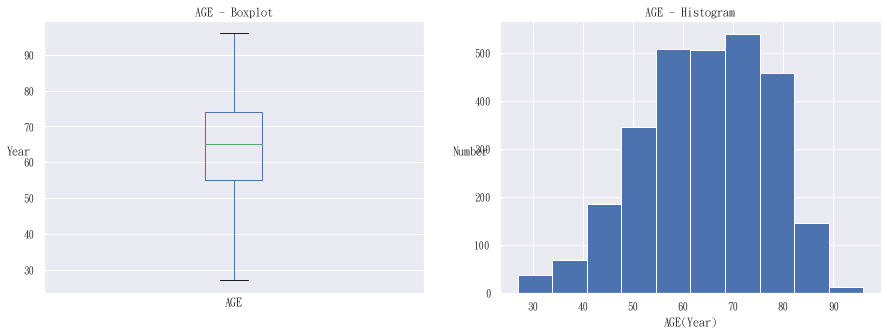

In [407]:
Age = tsr_12.loc[:, "Age"]

q1 = Age.quantile(0.25)
q3 = Age.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
Age[(Age < inner_fence_low) | (Age > inner_fence_upp)] = np.nan

Age = Age.fillna(round(Age.mean(),3))

#print(Age)
#print(Age.value_counts() / len(Age))
print(Age.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

Age.plot.box(ax = ax1)
ax1.set_title("AGE - Boxplot")
ax1.set_xlabel('AGE')
ax1.set_ylabel('Year', rotation=0)
ax1.set_xticks([])

Age.plot.hist(ax = ax2)
ax2.set_title("AGE - Histogram")
ax2.set_xlabel('AGE(Year)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# mRS VERSUS suspected features

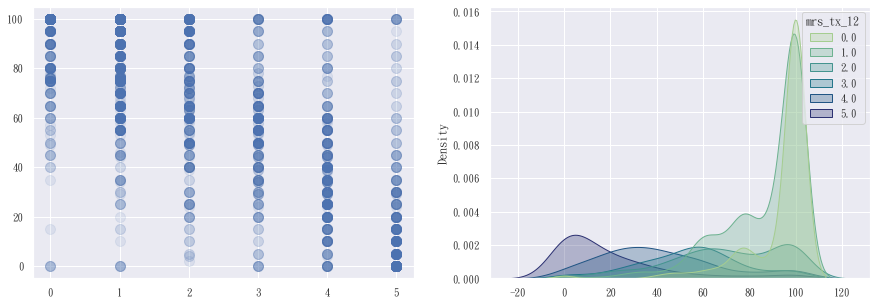

In [408]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_12, total, s = 100,  alpha=0.1)
sns.kdeplot(total,hue = mrs_tx_12,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

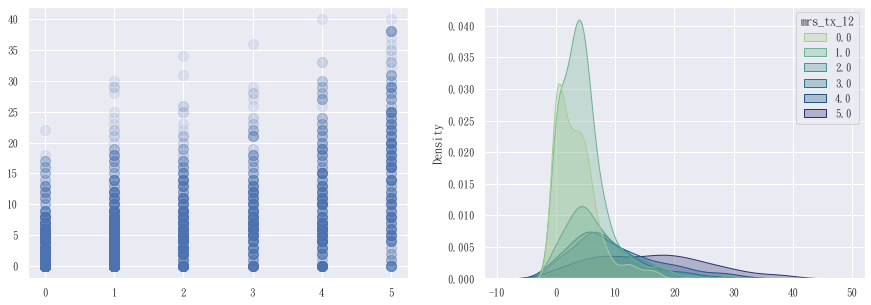

In [409]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_12, total_in, s = 100,  alpha=0.1)
sns.kdeplot(total_in,hue = mrs_tx_12,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

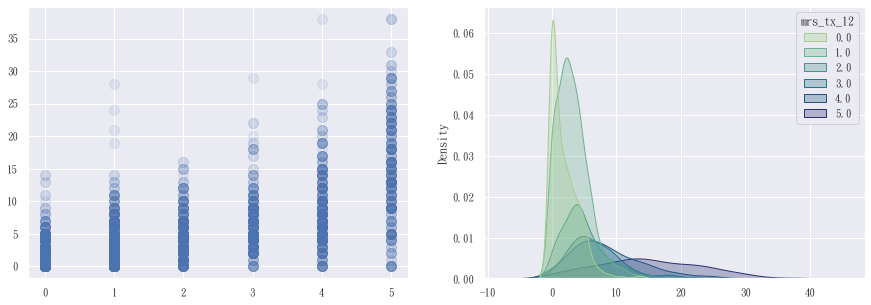

In [410]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_12, total_out, s = 100,  alpha=0.1)
sns.kdeplot(total_out,hue = mrs_tx_12,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

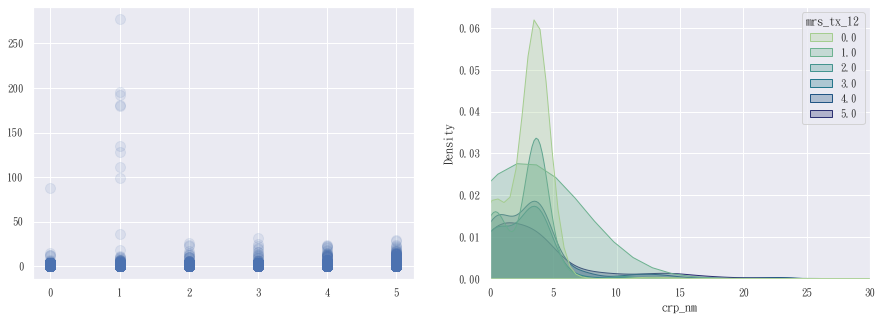

In [411]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_12, crp_nm, s = 100,  alpha=0.1)
sns.kdeplot(crp_nm,hue = mrs_tx_12,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.xlim(0, 30)
plt.show()

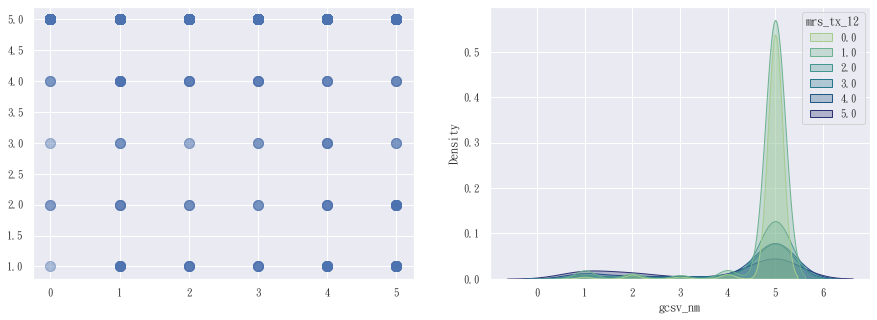

In [412]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_12, gcsv_nm, s = 100,  alpha=0.1)
sns.kdeplot(gcsv_nm,hue = mrs_tx_12,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

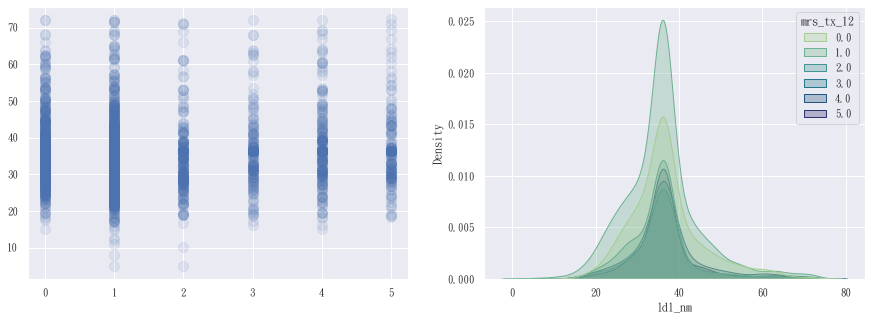

In [413]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_12, ldl_nm, s = 100,  alpha=0.1)
sns.kdeplot(ldl_nm,hue = mrs_tx_12,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

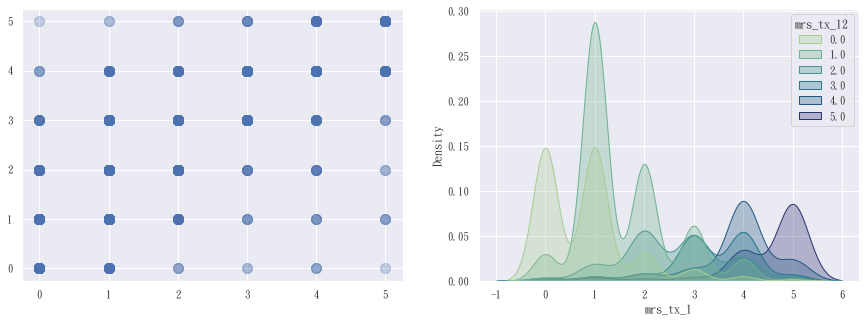

In [414]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_12, mrs_tx_1, s = 100,  alpha=0.1)
sns.kdeplot(mrs_tx_1,hue = mrs_tx_12,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

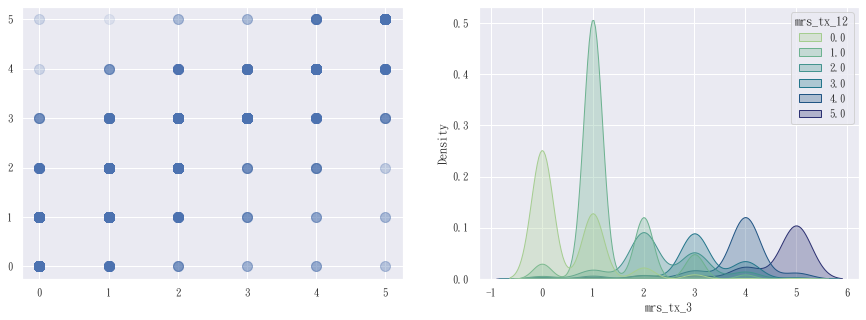

In [415]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_12, mrs_tx_3, s = 100,  alpha=0.1)
sns.kdeplot(mrs_tx_3,hue = mrs_tx_12,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

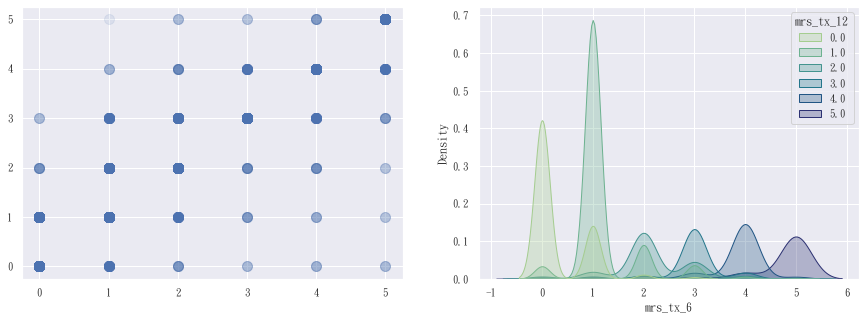

In [416]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_12, mrs_tx_6, s = 100,  alpha=0.1)
sns.kdeplot(mrs_tx_6,hue = mrs_tx_12,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

# Machine Learning

In [417]:
tsr_12_input = pd.DataFrame([height_nm ,  weight_nm ,  edu_id ,  pro_id ,  opc_id ,  ih_fl ,  ivtpamg_nm , hospitalised_time, 
                            nivtpa_id, nivtpa1_fl ,  nivtpa2_fl , nivtpa3_fl ,  nivtpa4_fl ,  nivtpa5_fl ,  nivtpa6_fl , 
                            nivtpa7_fl , nivtpa8_fl ,  nivtpa9_fl ,  nivtpa10_fl , nivtpa11_fl ,  nivtpa99_fl ,  gcse_nm , 
                            gcsv_nm ,  gcsm_nm ,  sbp_nm  , dbp_nm ,  bt_nm ,  hr_nm ,  rr_nm ,  icd_id ,  icdtia_id ,  
                            toast_id , toastle_fl ,  toastli_fl ,  toastsce_fl ,  toastsmo_fl ,  toastsra_fl ,  toastsdi_fl , 
                            toastsmi_fl ,  toastsantip_fl ,  toastsau_fl ,  toastshy_fl ,  toastspr_fl , toastsantit_fl , 
                            toastsho_fl ,  toastshys_fl ,  toastsca_fl ,  toastso_fl ,  toastu_id ,  cich_id ,  csah_id ,
                            thd_id ,  thda_fl ,  thdh_fl ,  thdi_fl ,  thdam_fl ,  thdv_fl ,  thde_fl , thdm_fl ,
                            thdr_fl ,  thdp_fl ,  thdoo_fl ,  hb_nm ,  hct_nm ,  platelet_nm ,  wbc_nm ,  ptt1_nm , ptt2_nm ,
                            ptinr_nm ,  er_nm ,  bun_nm ,  cre_nm ,  alb_nm ,  crp_nm ,  hbac_nm , ac_nm ,  ua_nm ,
                            tcho_nm ,  tg_nm ,  hdl_nm ,  ldl_nm ,  got_nm ,  gpt_nm ,  trm_id ,  trman_fl , trmas_fl , 
                            trmti_fl ,  trmhe_fl ,  trmwa_fl , trmia_fl ,  trmfo_fl ,  trmta_fl ,  trmsd_fl ,  trmre_fl , 
                            trmen_fl , trmen_id,  trmag_fl ,  trmcl_fl ,  trmpl_fl ,  trmlm_fl ,  trmiv_fl ,  trmve_fl , 
                            trmng_fl ,  trmdy_fl ,  trmicu_fl ,  trmsm_fl ,  trmed_fl ,  trmop_fl ,  trmop_id ,  trmot_fl ,
                            om_fl ,  omas_fl ,  omag_fl ,  omti_fl ,  omcl_fl ,  omwa_fl ,  ompl_fl ,  omanh_fl ,
                            omand_fl ,  omora_fl ,  omins_fl ,  omli_fl ,  omst_fl ,  omns_fl , 
                            omliot_fl ,  omliot2_fl ,  am_fl ,  amas_fl ,  amag_fl ,  amti_fl ,  amcl_fl ,  amwa_fl , 
                            ampl_fl ,  amanh_fl ,  amand_fl ,  amli_fl ,  amliot_fl ,  amliot2_fl ,  com_id ,  compn_fl , 
                            comut_fl ,  comug_fl ,  compr_fl ,  compu_fl ,  comac_fl ,  comse_fl , comde_fl ,  como_fl ,
                            det_id ,  detst_fl ,  dethe_fl ,  detho_fl ,  detha_fl ,  detva_fl , detre_fl ,  detme_fl ,
                            deto_fl ,  off_id ,  offd_id ,  offdt_id ,  ct_fl , mri_fl ,  ecg_id , 
                            ecgl_fl ,  ecga_fl ,  ecgq_fl ,  ecgo_fl ,  cd_id ,  cdr_id , cdl_id ,  tccs_id ,  tccsr_id , 
                            tccsl_id ,  tccsba_id ,  mra_fl ,  cta_fl ,  dsa_fl , mcd_id ,  mcdr_id ,  mcdl_id , 
                            mcdba_id ,  mcdri_id ,  mcdli_id ,  omad_fl ,  omad_id , dethoh_fl ,  feeding ,  transfers , 
                            bathing ,  toilet_use ,  grooming ,  mobility ,  stairs , dressing ,  bowel_control , 
                            bladder_control ,  total ,  discharged_mrs ,  cortical_aca_ctr ,  cortical_mca_ctr , 
                            subcortical_aca_ctr ,  subcortical_mca_ctr ,  pca_cortex_ctr ,  thalamus_ctr ,  brainstem_ctr ,
                            cerebellum_ctr ,  watershed_ctr ,  hemorrhagic_infarct_ctr ,  old_stroke_ctci ,
                            cortical_aca_ctl ,  cortical_mca_ctl ,  subcortical_aca_ctl ,  subcortical_mca_ctl ,
                            pca_cortex_ctl ,  thalamus_ctl ,  brainstem_ctl ,  cerebellum_ctl , watershed_ctl , 
                            hemorrhagic_infarct_ctl ,  old_stroke_ctch ,  cortical_aca_mrir , cortical_mca_mrir ,
                            subcortical_aca_mrir ,  subcortical_mca_mrir ,  pca_cortex_mrir , thalamus_mrir , 
                            brainstem_mrir ,  cerebellum_mrir ,  watershed_mrir , hemorrhagic_infarct_mrir , old_stroke_mrici ,  
                            cortical_aca_mril ,  cortical_mca_mril , subcortical_aca_mril , subcortical_mca_mril ,  
                            pca_cortex_mril ,  thalamus_mril , brainstem_mril ,  cerebellum_mril , watershed_mril ,  
                            hemorrhagic_infarct_mril , old_stroke_mrich ,  hd_id ,  pcva_id , pcvaci_id , pcvach_id ,  po_id , 
                            ur_id , sm_id ,  smc_nm ,  smy_nm ,  smcp_id ,  ptia_id , hc_id ,  hcht_id ,  hchc_id , ht_id , 
                            dm_id , pad_id , al_id ,  ca_id ,  ot_id ,  thishy_id ,  thisdi_id , fahiid_parents_1 ,  
                            fahiid_parents_2 ,  fahiid_parents_3 ,  fahiid_parents_4 ,  fahiid_brsi_1 , fahiid_brsi_2 , 
                            fahiid_brsi_3 ,  fahiid_brsi_4 ,  nihs_1a_in ,  nihs_1b_in ,  nihs_1c_in , nihs_2_in ,  
                            nihs_3_in ,  nihs_4_in , nihs_5al_in ,  nihs_5br_in ,  nihs_6al_in , nihs_6br_in ,  nihs_7_in ,
                            nihs_8_in ,  nihs_9_in ,  nihs_10_in , nihs_11_in ,  total_in , nihs_1a_out ,  nihs_1b_out ,
                            nihs_1c_out ,  nihs_2_out ,  nihs_3_out ,  nihs_4_out , nihs_5al_out ,  nihs_5br_out ,  
                            nihs_6al_out ,  nihs_6br_out ,  nihs_7_out ,  nihs_8_out , nihs_9_out ,  nihs_10_out ,  
                            nihs_11_out ,  total_out ,  SexName ,  Age, mrs_tx_1, mrs_tx_3, mrs_tx_6]).T
tsr_12_input[tsr_12_input == "N"] = 0
tsr_12_input[tsr_12_input == "Y"] = 1
tsr_12_input = tsr_12_input.astype("float64")

tsr_12_input_nomrs = pd.DataFrame([height_nm ,  weight_nm ,  edu_id ,  pro_id ,  opc_id ,  ih_fl ,  ivtpamg_nm , hospitalised_time, 
                            nivtpa_id, nivtpa1_fl ,  nivtpa2_fl , nivtpa3_fl ,  nivtpa4_fl ,  nivtpa5_fl ,  nivtpa6_fl , 
                            nivtpa7_fl , nivtpa8_fl ,  nivtpa9_fl ,  nivtpa10_fl , nivtpa11_fl ,  nivtpa99_fl ,  gcse_nm , 
                            gcsv_nm ,  gcsm_nm ,  sbp_nm  , dbp_nm ,  bt_nm ,  hr_nm ,  rr_nm ,  icd_id ,  icdtia_id ,  
                            toast_id , toastle_fl ,  toastli_fl ,  toastsce_fl ,  toastsmo_fl ,  toastsra_fl ,  toastsdi_fl , 
                            toastsmi_fl ,  toastsantip_fl ,  toastsau_fl ,  toastshy_fl ,  toastspr_fl , toastsantit_fl , 
                            toastsho_fl ,  toastshys_fl ,  toastsca_fl ,  toastso_fl ,  toastu_id ,  cich_id ,  csah_id ,
                            thd_id ,  thda_fl ,  thdh_fl ,  thdi_fl ,  thdam_fl ,  thdv_fl ,  thde_fl , thdm_fl ,
                            thdr_fl ,  thdp_fl ,  thdoo_fl ,  hb_nm ,  hct_nm ,  platelet_nm ,  wbc_nm ,  ptt1_nm , ptt2_nm ,
                            ptinr_nm ,  er_nm ,  bun_nm ,  cre_nm ,  alb_nm ,  crp_nm ,  hbac_nm , ac_nm ,  ua_nm ,
                            tcho_nm ,  tg_nm ,  hdl_nm ,  ldl_nm ,  got_nm ,  gpt_nm ,  trm_id ,  trman_fl , trmas_fl , 
                            trmti_fl ,  trmhe_fl ,  trmwa_fl , trmia_fl ,  trmfo_fl ,  trmta_fl ,  trmsd_fl ,  trmre_fl , 
                            trmen_fl , trmen_id,  trmag_fl ,  trmcl_fl ,  trmpl_fl ,  trmlm_fl ,  trmiv_fl ,  trmve_fl , 
                            trmng_fl ,  trmdy_fl ,  trmicu_fl ,  trmsm_fl ,  trmed_fl ,  trmop_fl ,  trmop_id ,  trmot_fl ,
                            om_fl ,  omas_fl ,  omag_fl ,  omti_fl ,  omcl_fl ,  omwa_fl ,  ompl_fl ,  omanh_fl ,
                            omand_fl ,  omora_fl ,  omins_fl ,  omli_fl ,  omst_fl ,  omns_fl , 
                            omliot_fl ,  omliot2_fl ,  am_fl ,  amas_fl ,  amag_fl ,  amti_fl ,  amcl_fl ,  amwa_fl , 
                            ampl_fl ,  amanh_fl ,  amand_fl ,  amli_fl ,  amliot_fl ,  amliot2_fl ,  com_id ,  compn_fl , 
                            comut_fl ,  comug_fl ,  compr_fl ,  compu_fl ,  comac_fl ,  comse_fl , comde_fl ,  como_fl ,
                            det_id ,  detst_fl ,  dethe_fl ,  detho_fl ,  detha_fl ,  detva_fl , detre_fl ,  detme_fl ,
                            deto_fl ,  off_id ,  offd_id ,  offdt_id ,  ct_fl , mri_fl ,  ecg_id , 
                            ecgl_fl ,  ecga_fl ,  ecgq_fl ,  ecgo_fl ,  cd_id ,  cdr_id , cdl_id ,  tccs_id ,  tccsr_id , 
                            tccsl_id ,  tccsba_id ,  mra_fl ,  cta_fl ,  dsa_fl , mcd_id ,  mcdr_id ,  mcdl_id , 
                            mcdba_id ,  mcdri_id ,  mcdli_id ,  omad_fl ,  omad_id , dethoh_fl ,  feeding ,  transfers , 
                            bathing ,  toilet_use ,  grooming ,  mobility ,  stairs , dressing ,  bowel_control , 
                            bladder_control ,  total ,  discharged_mrs ,  cortical_aca_ctr ,  cortical_mca_ctr , 
                            subcortical_aca_ctr ,  subcortical_mca_ctr ,  pca_cortex_ctr ,  thalamus_ctr ,  brainstem_ctr ,
                            cerebellum_ctr ,  watershed_ctr ,  hemorrhagic_infarct_ctr ,  old_stroke_ctci ,
                            cortical_aca_ctl ,  cortical_mca_ctl ,  subcortical_aca_ctl ,  subcortical_mca_ctl ,
                            pca_cortex_ctl ,  thalamus_ctl ,  brainstem_ctl ,  cerebellum_ctl , watershed_ctl , 
                            hemorrhagic_infarct_ctl ,  old_stroke_ctch ,  cortical_aca_mrir , cortical_mca_mrir ,
                            subcortical_aca_mrir ,  subcortical_mca_mrir ,  pca_cortex_mrir , thalamus_mrir , 
                            brainstem_mrir ,  cerebellum_mrir ,  watershed_mrir , hemorrhagic_infarct_mrir ,
                            old_stroke_mrici ,  cortical_aca_mril ,  cortical_mca_mril , subcortical_aca_mril ,
                            subcortical_mca_mril ,  pca_cortex_mril ,  thalamus_mril , brainstem_mril ,  cerebellum_mril , 
                            watershed_mril ,  hemorrhagic_infarct_mril , old_stroke_mrich ,  hd_id ,  pcva_id , 
                            pcvaci_id ,  pcvach_id ,  po_id , ur_id , sm_id ,  smc_nm ,  smy_nm ,  smcp_id ,  ptia_id ,
                            hc_id ,  hcht_id ,  hchc_id , ht_id ,  dm_id ,
                            pad_id , al_id ,  ca_id ,  ot_id ,  thishy_id ,  thisdi_id , 
                            fahiid_parents_1 ,  fahiid_parents_2 ,  fahiid_parents_3 ,  fahiid_parents_4 ,  fahiid_brsi_1 ,
                            fahiid_brsi_2 , fahiid_brsi_3 ,  fahiid_brsi_4 ,  nihs_1a_in ,  nihs_1b_in ,  nihs_1c_in , 
                            nihs_2_in ,  nihs_3_in ,  nihs_4_in , nihs_5al_in ,  nihs_5br_in ,  nihs_6al_in , 
                            nihs_6br_in ,  nihs_7_in ,  nihs_8_in ,  nihs_9_in ,  nihs_10_in , nihs_11_in ,  total_in , 
                            nihs_1a_out ,  nihs_1b_out ,  nihs_1c_out ,  nihs_2_out ,  nihs_3_out ,  nihs_4_out ,
                            nihs_5al_out ,  nihs_5br_out ,  nihs_6al_out ,  nihs_6br_out ,  nihs_7_out ,  nihs_8_out ,
                            nihs_9_out ,  nihs_10_out ,  nihs_11_out ,  total_out ,  SexName ,  Age]).T
tsr_12_input_nomrs[tsr_12_input_nomrs == "N"] = 0
tsr_12_input_nomrs[tsr_12_input_nomrs == "Y"] = 1
tsr_12_input_nomrs = tsr_12_input_nomrs.astype("float64")

In [418]:
tsr_12_input = np.array(tsr_12_input.values)
tsr_12_input_nomrs = np.array(tsr_12_input_nomrs.values)

## 6 classes

In [419]:
tsr_12_output = pd.DataFrame(mrs_tx_12)
tsr_12_output = tsr_12_output.astype("float64")
tsr_12_output = np.array(tsr_12_output.values)

### SVM

In [420]:
svc = CalibratedClassifierCV(LinearSVC(penalty = "l2", dual=False, loss = "squared_hinge", C = 1, multi_class = "ovr", 
                                       random_state = 19)) 
svc_scores = cross_val_score(svc,tsr_12_input,tsr_12_output,cv = 10,scoring='accuracy')
print(svc_scores)

svc.fit(tsr_12_input,tsr_12_output)
svc_predict =svc.predict_proba(tsr_12_input)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.49642857 0.45357143 0.52142857 0.425      0.575      0.52857143
 0.51071429 0.61648746 0.62007168 0.57706093]


In [421]:
print(svc_scores.mean(), svc_scores.std())
print(svc_predict)

0.5324334357398873 0.06181773193328457
[[0.28587059 0.41475031 0.12081267 0.05992504 0.08887255 0.02976884]
 [0.52807852 0.28912173 0.07130976 0.04538489 0.06023021 0.0058749 ]
 [0.52284724 0.2744477  0.06398618 0.03355287 0.10046728 0.00469874]
 ...
 [0.51295381 0.28468113 0.11869979 0.06130381 0.01564145 0.00672001]
 [0.00077765 0.1152702  0.14320607 0.07797422 0.11725798 0.54551388]
 [0.30710128 0.43920984 0.09339495 0.10152365 0.04574026 0.01303003]]


In [422]:
svc_pred = cross_val_predict(svc,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, svc_pred)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[451, 161,   0,   0,   4,   0],
       [189, 704,   9,   6,   7,   4],
       [ 20, 280,  10,  19,  20,  12],
       [  6, 184,  13,  14,  46,  13],
       [  8, 101,  12,  15, 101,  93],
       [  7,  23,   3,   5,  48, 209]], dtype=int64)

In [423]:
svc1 = CalibratedClassifierCV(LinearSVC(penalty = "l2", dual=False, loss = "squared_hinge", C = 1, multi_class = "ovr", 
                                       random_state = 19)) 
svc_scores1 = cross_val_score(svc1,tsr_12_input_nomrs,tsr_12_output,cv = 10,scoring='accuracy')
print(svc_scores1)

svc1.fit(tsr_12_input_nomrs,tsr_12_output)
svc_predict1 =svc1.predict_proba(tsr_12_input_nomrs)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.39285714 0.36785714 0.46071429 0.34285714 0.43214286 0.44642857
 0.41428571 0.46953405 0.47311828 0.4265233 ]


In [424]:
print(svc_scores1.mean(), svc_scores1.std())
print(svc_predict1)

0.42263184843830004 0.041462414356394896
[[0.27471655 0.39666625 0.12282727 0.06617737 0.09289853 0.04671403]
 [0.33747034 0.34876175 0.10603566 0.06971957 0.10888769 0.02912498]
 [0.28721178 0.33355611 0.10433549 0.06091601 0.18644012 0.02754048]
 ...
 [0.34384695 0.33333505 0.15618356 0.09358642 0.03143696 0.04161106]
 [0.02555782 0.11706642 0.1430028  0.08567521 0.10918751 0.51951023]
 [0.36045833 0.39655184 0.09503161 0.09123412 0.03541949 0.02130461]]


In [425]:
svc_pred1 = cross_val_predict(svc1,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, svc_pred1)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[451, 161,   0,   0,   4,   0],
       [189, 704,   9,   6,   7,   4],
       [ 20, 280,  10,  19,  20,  12],
       [  6, 184,  13,  14,  46,  13],
       [  8, 101,  12,  15, 101,  93],
       [  7,  23,   3,   5,  48, 209]], dtype=int64)

### RF

In [426]:
rf = CalibratedClassifierCV(RandomForestClassifier(criterion = "gini", n_estimators = 15, bootstrap=True, random_state = 19,
                                                  max_features = 0.8)) 
rf_scores = cross_val_score(rf,tsr_12_input,tsr_12_output,cv = 10,scoring='accuracy')
print(rf_scores)

rf.fit(tsr_12_input,tsr_12_output)
rf_predict =rf.predict_proba(tsr_12_input)

[0.77857143 0.68214286 0.68928571 0.61428571 0.67857143 0.69642857
 0.80714286 0.83870968 0.86738351 0.88530466]


In [427]:
print(rf_scores.mean(), rf_scores.std())
print(rf_predict)

0.7537826420890936 0.08864271998163575
[[0.04451294 0.83035478 0.04189188 0.02719211 0.03822475 0.01782353]
 [0.83934342 0.05477056 0.03930475 0.02558129 0.02420182 0.01679814]
 [0.83934342 0.05477056 0.03930475 0.02558129 0.02420182 0.01679814]
 ...
 [0.6435008  0.23406972 0.04784862 0.02940251 0.02757206 0.01760629]
 [0.04167262 0.06399937 0.04865412 0.04758831 0.33120506 0.46688051]
 [0.12793156 0.72503665 0.06280927 0.03816673 0.02706921 0.01898659]]


In [428]:
rf_pred = cross_val_predict(rf,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, rf_pred)

array([[454, 148,   9,   5,   0,   0],
       [ 46, 757,  73,  36,   6,   1],
       [ 13,  61, 194,  75,  13,   5],
       [  5,  18,  20, 201,  28,   4],
       [  6,  14,   8,  27, 264,  11],
       [  6,   3,   4,  10,  34, 238]], dtype=int64)

In [429]:
rf1 = CalibratedClassifierCV(RandomForestClassifier(criterion = "gini", n_estimators = 15, bootstrap=True, random_state = 19,
                                                  max_features = 0.8)) 
rf_scores1 = cross_val_score(rf1,tsr_12_input_nomrs,tsr_12_output,cv = 10,scoring='accuracy')
print(rf_scores1)

rf1.fit(tsr_12_input_nomrs,tsr_12_output)
rf_predict1 =rf1.predict_proba(tsr_12_input_nomrs)

[0.53214286 0.41428571 0.52142857 0.4        0.46785714 0.45714286
 0.45357143 0.51612903 0.5483871  0.4874552 ]


In [430]:
print(rf_scores1.mean(), rf_scores1.std())
print(rf_predict1)

0.47983998975934467 0.04749669955284514
[[0.12192507 0.67740552 0.07280087 0.05194262 0.04537346 0.03055246]
 [0.55513931 0.25205077 0.07013156 0.04609869 0.04747382 0.02910585]
 [0.66645195 0.14748161 0.07392039 0.044555   0.04233753 0.02525352]
 ...
 [0.48058224 0.25930617 0.12235044 0.06174415 0.04622552 0.02979147]
 [0.06165286 0.09872087 0.08168129 0.0447667  0.10628602 0.60689226]
 [0.18480723 0.58426077 0.08978501 0.05655822 0.05028257 0.0343062 ]]


In [431]:
rf_pred1 = cross_val_predict(rf1,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, rf_pred1)

array([[454, 148,   9,   5,   0,   0],
       [ 46, 757,  73,  36,   6,   1],
       [ 13,  61, 194,  75,  13,   5],
       [  5,  18,  20, 201,  28,   4],
       [  6,  14,   8,  27, 264,  11],
       [  6,   3,   4,  10,  34, 238]], dtype=int64)

### XGBoost

In [432]:
xgb = CalibratedClassifierCV(XGBClassifier(booster = "gbtree", objective="multi:softprob", eval_metric = "auc", 
                                            use_label_encoder = False, random_state = 19)) 
xgb_scores = cross_val_score(xgb,tsr_12_input,tsr_12_output,cv = 10)
print(xgb_scores)

xgb.fit(tsr_12_input,tsr_12_output)
xgb_predict =xgb.predict_proba(tsr_12_input)

[0.76428571 0.67857143 0.68571429 0.61428571 0.70357143 0.68214286
 0.78571429 0.80645161 0.85304659 0.89247312]


In [433]:
print(xgb_scores.mean(), xgb_scores.std())
print(xgb_predict)

0.7466257040450589 0.08359603649696697
[[0.06104443 0.7912772  0.05779479 0.03922388 0.02951836 0.02114135]
 [0.79703259 0.06653174 0.05337546 0.03616639 0.02734917 0.01954464]
 [0.79683512 0.06665926 0.05339001 0.03617116 0.02739869 0.01954575]
 ...
 [0.7951103  0.06763072 0.05410933 0.0362105  0.02734433 0.01959482]
 [0.04994012 0.06221332 0.04977617 0.03394583 0.20165226 0.60247229]
 [0.06439998 0.78722819 0.05820385 0.03953531 0.02941563 0.02121704]]


In [434]:
xgb_pred = cross_val_predict(xgb,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, xgb_pred)

array([[460, 144,   8,   4,   0,   0],
       [ 52, 756,  74,  30,   6,   1],
       [ 14,  73, 191,  62,  16,   5],
       [  7,  25,  32, 177,  31,   4],
       [  6,  12,  12,  24, 266,  10],
       [  5,   4,   4,  10,  34, 238]], dtype=int64)

In [435]:
xgb1 = CalibratedClassifierCV(XGBClassifier(booster = "gbtree", objective="multi:softprob", eval_metric = "auc", 
                                            use_label_encoder = False, random_state = 19)) 
xgb_scores1 = cross_val_score(xgb1,tsr_12_input_nomrs,tsr_12_output,cv = 10)
print(xgb_scores1)

xgb1.fit(tsr_12_input_nomrs,tsr_12_output)
xgb_predict1 =xgb1.predict_proba(tsr_12_input_nomrs)

[0.48928571 0.39642857 0.47142857 0.39285714 0.47142857 0.42857143
 0.44285714 0.51971326 0.56272401 0.53405018]


In [436]:
print(xgb_scores1.mean(), xgb_scores1.std())
print(xgb_predict1)

0.47093445980542753 0.05418090223234424
[[0.17007527 0.54420729 0.10230105 0.07114532 0.072724   0.03954707]
 [0.60874238 0.14293271 0.08912465 0.0617626  0.06296108 0.03447658]
 [0.60474826 0.1450857  0.08956146 0.06229688 0.06366212 0.03464559]
 ...
 [0.53277582 0.1442011  0.15214307 0.06623367 0.06780706 0.03683927]
 [0.08478807 0.11744688 0.08029583 0.05550404 0.05956742 0.60239776]
 [0.19942066 0.51026355 0.10567376 0.07211117 0.07280302 0.03972784]]


In [437]:
xgb_pred1 = cross_val_predict(xgb1,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, xgb_pred1)

array([[460, 144,   8,   4,   0,   0],
       [ 52, 756,  74,  30,   6,   1],
       [ 14,  73, 191,  62,  16,   5],
       [  7,  25,  32, 177,  31,   4],
       [  6,  12,  12,  24, 266,  10],
       [  5,   4,   4,  10,  34, 238]], dtype=int64)

## 2 classes

In [438]:
tsr_12_output[(tsr_12_output == 0)|(tsr_12_output == 1)|(tsr_12_output == 2)] = 0
tsr_12_output[(tsr_12_output == 3)|(tsr_12_output == 4)|(tsr_12_output == 5)] = 1

### SVM

In [439]:
svc2 = CalibratedClassifierCV(LinearSVC(penalty = "l2", dual=False, loss = "squared_hinge", C = 1, multi_class = "ovr", 
                                       random_state = 19)) 
svc_scores2 = cross_val_score(svc2,tsr_12_input,tsr_12_output,cv = 10,scoring='accuracy')
print(svc_scores2)

svc2.fit(tsr_12_input,tsr_12_output)
svc_predict2 =svc2.predict_proba(tsr_12_input)

[0.83928571 0.88571429 0.90357143 0.92142857 0.87142857 0.88571429
 0.90714286 0.96057348 0.93548387 0.89964158]


In [440]:
print(svc_scores2.mean(), svc_scores2.std())
print(svc_predict2)

0.9009984639016896 0.032174654331392556
[[0.93464262 0.06535738]
 [0.95885666 0.04114334]
 [0.96061083 0.03938917]
 ...
 [0.98260988 0.01739012]
 [0.15079519 0.84920481]
 [0.87255072 0.12744928]]


In [441]:
svc_pred2 = cross_val_predict(svc2,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, svc_pred2)

array([[1785,  111],
       [ 166,  735]], dtype=int64)

In [442]:
svc3 = CalibratedClassifierCV(LinearSVC(penalty = "l2", dual=False, loss = "squared_hinge", C = 1, multi_class = "ovr", 
                                       random_state = 19)) 
svc_scores3 = cross_val_score(svc3,tsr_12_input_nomrs,tsr_12_output,cv = 10,scoring='accuracy')
print(svc_scores3)

svc3.fit(tsr_12_input_nomrs,tsr_12_output)
svc_predict3 =svc3.predict_proba(tsr_12_input_nomrs)

[0.77142857 0.80357143 0.84642857 0.85357143 0.84642857 0.80357143
 0.83928571 0.86021505 0.85304659 0.81003584]


In [443]:
print(svc_scores3.mean(), svc_scores3.std())
print(svc_predict3)

0.8287583205325142 0.02799362177636002
[[0.86640343 0.13359657]
 [0.83479453 0.16520547]
 [0.78918439 0.21081561]
 ...
 [0.91286001 0.08713999]
 [0.19665409 0.80334591]
 [0.87847171 0.12152829]]


In [444]:
svc_pred3 = cross_val_predict(svc3,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, svc_pred3)

array([[1785,  111],
       [ 166,  735]], dtype=int64)

### RF

In [445]:
rf2 = CalibratedClassifierCV(RandomForestClassifier(criterion = "gini", n_estimators = 15, bootstrap=True, random_state = 19,
                                                  max_features = 0.8)) 
rf_scores2 = cross_val_score(rf2,tsr_12_input,tsr_12_output,cv = 10,scoring='accuracy')
print(rf_scores2)

rf2.fit(tsr_12_input,tsr_12_output)
rf_predict2 =rf2.predict_proba(tsr_12_input)

[0.9        0.88571429 0.9        0.91785714 0.85714286 0.9
 0.925      0.94623656 0.9390681  0.94982079]


In [446]:
print(rf_scores2.mean(), rf_scores2.std())
print(rf_predict2)

0.912083973374296 0.027696058544392443
[[0.9518558  0.0481442 ]
 [0.96490661 0.03509339]
 [0.96490661 0.03509339]
 ...
 [0.96098612 0.03901388]
 [0.05088391 0.94911609]
 [0.96283653 0.03716347]]


In [447]:
rf_pred2 = cross_val_predict(rf2,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, rf_pred2)

array([[1758,  138],
       [ 108,  793]], dtype=int64)

In [448]:
rf3 = CalibratedClassifierCV(RandomForestClassifier(criterion = "gini", n_estimators = 15, bootstrap=True, random_state = 19,
                                                  max_features = 0.8)) 
rf_scores3 = cross_val_score(rf3,tsr_12_input_nomrs,tsr_12_output,cv = 10,scoring='accuracy')
print(rf_scores3)

rf3.fit(tsr_12_input_nomrs,tsr_12_output)
rf_predict3 =rf3.predict_proba(tsr_12_input_nomrs)

[0.83928571 0.83214286 0.85357143 0.86428571 0.80714286 0.81785714
 0.85357143 0.84229391 0.85663082 0.84946237]


In [449]:
print(rf_scores3.mean(), rf_scores3.std())
print(rf_predict3)

0.8416244239631336 0.01713272097678863
[[0.93631485 0.06368515]
 [0.94005695 0.05994305]
 [0.94500804 0.05499196]
 ...
 [0.92938516 0.07061484]
 [0.12278026 0.87721974]
 [0.90547117 0.09452883]]


In [450]:
rf_pred3 = cross_val_predict(rf3,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, rf_pred3)

array([[1758,  138],
       [ 108,  793]], dtype=int64)

### XGBoost

In [451]:
xgb2 = CalibratedClassifierCV(XGBClassifier(booster = "gbtree", objective="binary:logistic", eval_metric = "auc", 
                                            use_label_encoder = False, random_state = 19)) 
xgb_scores2 = cross_val_score(xgb2,tsr_12_input,tsr_12_output,cv = 10)
print(xgb_scores2)

xgb2.fit(tsr_12_input,tsr_12_output)
xgb_predict2 =xgb2.predict_proba(tsr_12_input)

[0.91071429 0.89285714 0.90357143 0.91785714 0.85357143 0.89642857
 0.92142857 0.94623656 0.94265233 0.95340502]


In [452]:
print(xgb_scores2.mean(), xgb_scores2.std())
print(xgb_predict2)

0.9138722478238608 0.02830149108510905
[[0.94429101 0.05570899]
 [0.94400696 0.05599304]
 [0.94431225 0.05568775]
 ...
 [0.94457341 0.05542659]
 [0.10128657 0.89871343]
 [0.94443364 0.05556636]]


In [453]:
xgb_pred2 = cross_val_predict(xgb2,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, xgb_pred2)

array([[1774,  122],
       [ 119,  782]], dtype=int64)

In [454]:
xgb3 = CalibratedClassifierCV(XGBClassifier(booster = "gbtree", objective="binary:logistic", eval_metric = "auc", 
                                            use_label_encoder = False, random_state = 19))
xgb_scores3 = cross_val_score(xgb3,tsr_12_input_nomrs,tsr_12_output,cv = 10)
print(xgb_scores3)

xgb3.fit(tsr_12_input_nomrs,tsr_12_output)
xgb_predict3 =xgb3.predict_proba(tsr_12_input_nomrs)

[0.78928571 0.82857143 0.86428571 0.88928571 0.82142857 0.825
 0.85357143 0.84587814 0.83870968 0.85304659]


In [455]:
print(xgb_scores3.mean(), xgb_scores3.std())
print(xgb_predict3)

0.8409062980030722 0.025833558604188876
[[0.89842526 0.10157474]
 [0.8984483  0.1015517 ]
 [0.89571276 0.10428724]
 ...
 [0.89894659 0.10105341]
 [0.14101733 0.85898267]
 [0.89694274 0.10305726]]


In [456]:
xgb_pred3 = cross_val_predict(xgb3,tsr_12_input,tsr_12_output,cv = 10)
confusion_matrix(tsr_12_output, xgb_pred3)

array([[1774,  122],
       [ 119,  782]], dtype=int64)

# Summary

## Mean & Std

In [457]:
svc_mean = np.array([svc_scores.mean(), svc_scores.std(), svc_scores[0], svc_scores[1], svc_scores[2], svc_scores[3],
                     svc_scores[4], svc_scores[5], svc_scores[6], svc_scores[7], svc_scores[8], svc_scores[9]])
rf_mean = np.array([rf_scores.mean(), rf_scores.std(), rf_scores[0], rf_scores[1], rf_scores[2], rf_scores[3],rf_scores[4], 
                    rf_scores[5], rf_scores[6], rf_scores[7], rf_scores[8], rf_scores[9]])
xgb_mean = np.array([xgb_scores.mean(), xgb_scores.std(), xgb_scores[0], xgb_scores[1], xgb_scores[2], xgb_scores[3],
                     xgb_scores[4], xgb_scores[5], xgb_scores[6], xgb_scores[7], xgb_scores[8], xgb_scores[9]])

svc_mean1 = np.array([svc_scores1.mean(), svc_scores1.std(), svc_scores1[0], svc_scores1[1], svc_scores1[2], svc_scores1[3],
                     svc_scores1[4], svc_scores1[5], svc_scores1[6], svc_scores1[7], svc_scores1[8], svc_scores1[9]])
rf_mean1 = np.array([rf_scores1.mean(), rf_scores1.std(), rf_scores1[0], rf_scores1[1], rf_scores1[2], rf_scores1[3],rf_scores1[4], 
                    rf_scores1[5], rf_scores1[6], rf_scores1[7], rf_scores1[8], rf_scores1[9]])
xgb_mean1 = np.array([xgb_scores1.mean(), xgb_scores1.std(), xgb_scores1[0], xgb_scores1[1], xgb_scores1[2], xgb_scores1[3],
                     xgb_scores1[4], xgb_scores1[5], xgb_scores1[6], xgb_scores1[7], xgb_scores1[8], xgb_scores1[9]])

svc_mean2 = np.array([svc_scores2.mean(), svc_scores2.std(), svc_scores2[0], svc_scores2[1], svc_scores2[2], svc_scores2[3],
                     svc_scores2[4], svc_scores2[5], svc_scores2[6], svc_scores2[7], svc_scores2[8], svc_scores2[9]])
rf_mean2 = np.array([rf_scores2.mean(), rf_scores2.std(), rf_scores2[0], rf_scores2[1], rf_scores2[2], rf_scores2[3],rf_scores2[4], 
                    rf_scores2[5], rf_scores2[6], rf_scores2[7], rf_scores2[8], rf_scores2[9]])
xgb_mean2 = np.array([xgb_scores2.mean(), xgb_scores2.std(), xgb_scores2[0], xgb_scores2[1], xgb_scores2[2], xgb_scores2[3],
                     xgb_scores2[4], xgb_scores2[5], xgb_scores2[6], xgb_scores2[7], xgb_scores2[8], xgb_scores2[9]])

svc_mean3 = np.array([svc_scores3.mean(), svc_scores3.std(), svc_scores3[0], svc_scores3[1], svc_scores3[2], svc_scores3[3],
                     svc_scores3[4], svc_scores3[5], svc_scores3[6], svc_scores3[7], svc_scores3[8], svc_scores3[9]])
rf_mean3 = np.array([rf_scores3.mean(), rf_scores3.std(), rf_scores3[0], rf_scores3[1], rf_scores3[2], rf_scores3[3],rf_scores3[4], 
                    rf_scores3[5], rf_scores3[6], rf_scores3[7], rf_scores3[8], rf_scores3[9]])
xgb_mean3 = np.array([xgb_scores3.mean(), xgb_scores3.std(), xgb_scores3[0], xgb_scores3[1], xgb_scores3[2], xgb_scores3[3],
                     xgb_scores3[4], xgb_scores3[5], xgb_scores3[6], xgb_scores3[7], xgb_scores3[8], xgb_scores3[9]])

In [458]:
tsr_12_mean = pd.DataFrame([svc_mean, rf_mean, xgb_mean,svc_mean1, rf_mean1, xgb_mean1, svc_mean2, rf_mean2, xgb_mean2,
                          svc_mean3, rf_mean3, xgb_mean3]).T
tsr_12_mean.index = ["Mean", "Std", "mean_1", "mean_2", "mean_3", "mean_4", "mean_5", "mean_6", "mean_7", "mean_8", "mean_9", "mean_10"]
tsr_12_mean.columns = ["svc", 'rf', 'xgb', "svc1", 'rf1', 'xgb1', 'svc2', 'rf2', 'xgb2', "svc3", 'rf3', 'xgb3']

In [459]:
csv_save = os.path.join("..", "result", "TSR_EHR", "tsr_12_mean.csv")
tsr_12_mean.to_csv(csv_save, index = True)

## Predicted Probability

In [460]:
svc_predict_0 = svc_predict[:, 0]
svc_predict_1 = svc_predict[:, 1]
svc_predict_2 = svc_predict[:, 2]
svc_predict_3 = svc_predict[:, 3]
svc_predict_4 = svc_predict[:, 4]
svc_predict_5 = svc_predict[:, 5]

rf_predict_0 = rf_predict[:, 0]
rf_predict_1 = rf_predict[:, 1]
rf_predict_2 = rf_predict[:, 2]
rf_predict_3 = rf_predict[:, 3]
rf_predict_4 = rf_predict[:, 4]
rf_predict_5 = rf_predict[:, 5]

xgb_predict_0 = xgb_predict[:, 0]
xgb_predict_1 = xgb_predict[:, 1]
xgb_predict_2 = xgb_predict[:, 2]
xgb_predict_3 = xgb_predict[:, 3]
xgb_predict_4 = xgb_predict[:, 4]
xgb_predict_5 = xgb_predict[:, 5]

svc_predict1_0 = svc_predict1[:, 0]
svc_predict1_1 = svc_predict1[:, 1]
svc_predict1_2 = svc_predict1[:, 2]
svc_predict1_3 = svc_predict1[:, 3]
svc_predict1_4 = svc_predict1[:, 4]
svc_predict1_5 = svc_predict1[:, 5]

rf_predict1_0 = rf_predict1[:, 0]
rf_predict1_1 = rf_predict1[:, 1]
rf_predict1_2 = rf_predict1[:, 2]
rf_predict1_3 = rf_predict1[:, 3]
rf_predict1_4 = rf_predict1[:, 4]
rf_predict1_5 = rf_predict1[:, 5]

xgb_predict1_0 = xgb_predict1[:, 0]
xgb_predict1_1 = xgb_predict1[:, 1]
xgb_predict1_2 = xgb_predict1[:, 2]
xgb_predict1_3 = xgb_predict1[:, 3]
xgb_predict1_4 = xgb_predict1[:, 4]
xgb_predict1_5 = xgb_predict1[:, 5]

svc_predict2_0 = svc_predict2[:, 0]
svc_predict2_1 = svc_predict2[:, 1]

rf_predict2_0 = rf_predict2[:, 0]
rf_predict2_1 = rf_predict2[:, 1]

xgb_predict2_0 = xgb_predict2[:, 0]
xgb_predict2_1 = xgb_predict2[:, 1]

svc_predict3_0 = svc_predict3[:, 0]
svc_predict3_1 = svc_predict3[:, 1]

rf_predict3_0 = rf_predict3[:, 0]
rf_predict3_1 = rf_predict3[:, 1]

xgb_predict3_0 = xgb_predict3[:, 0]
xgb_predict3_1 = xgb_predict3[:, 1]

In [461]:
tsr_12_pred_prob = pd.DataFrame([svc_predict_0, svc_predict_1, svc_predict_2, svc_predict_3, svc_predict_4, svc_predict_5, 
                               rf_predict_0, rf_predict_1, rf_predict_2, rf_predict_3, rf_predict_4, rf_predict_5,
                               xgb_predict_0, xgb_predict_1, xgb_predict_2, xgb_predict_3, xgb_predict_4, xgb_predict_5,
                                svc_predict1_0, svc_predict1_1, svc_predict1_2, svc_predict1_3, svc_predict1_4, svc_predict1_5, 
                               rf_predict1_0, rf_predict1_1, rf_predict1_2, rf_predict1_3, rf_predict1_4, rf_predict1_5,
                               xgb_predict1_0, xgb_predict1_1, xgb_predict1_2, xgb_predict1_3, xgb_predict1_4, xgb_predict1_5,
                               svc_predict2_0, svc_predict2_1, rf_predict2_0, rf_predict2_1, xgb_predict2_0, xgb_predict2_1,
                               svc_predict3_0, svc_predict3_1, rf_predict3_0, rf_predict3_1, xgb_predict3_0, xgb_predict3_1]).T
tsr_12_pred_prob.columns = ["svc_predict_0", "svc_predict_1", "svc_predict_2", "svc_predict_3", "svc_predict_4", "svc_predict_5", 
                           "rf_predict_0", "rf_predict_1", "rf_predict_2", "rf_predict_3", "rf_predict_4", "rf_predict_5",
                           "xgb_predict_0", "xgb_predict_1", "xgb_predict_2", 'xgb_predict_3', "xgb_predict_4", "xgb_predict_5",
                           "svc_predict1_0", "svc_predict1_1", "svc_predict1_2", "svc_predict1_3", "svc_predict1_4", "svc_predict1_5", 
                           "rf_predict1_0", "rf_predict1_1", "rf_predict1_2", "rf_predict1_3", "rf_predict1_4", "rf_predict1_5",
                           "xgb_predict1_0", "xgb_predict1_1", "xgb_predict1_2", 'xgb_predict1_3', "xgb_predict1_4", "xgb_predict1_5",
                           "svc_predict2_0", "svc_predict2_1", "rf_predict2_0", "rf_predict2_1", "xgb_predict2_0", "xgb_predict2_1",
                           "svc_predict3_0", "svc_predict3_1", "rf_predict3_0", "rf_predict3_1", "xgb_predict3_0", "xgb_predict3_1"]

In [462]:
csv_save2 = os.path.join("..", "result", "TSR_EHR", "tsr_12_pred_prob.csv")
tsr_12_pred_prob.to_csv(csv_save2, index = False)